In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from jplot import *
from jfit import *
plt.rcParams['figure.dpi'] = 200

In [2]:
def jerrbar(ax, xdat, ydat, xerr=[], yerr=[], color='auto', label='', marker='o', ls='none', **kwargs):
        if len(xerr) == 0:
                xerr = np.zeros(len(xdat))
        if len(yerr) == 0:
                yerr = np.zeros(len(ydat))
        if type(color) == str:
                if color == 'auto':
                        color = jcc[jcc_keys[6*len(ax.get_lines())%17]]
        if type(color) == int:
                color = jcc[jcc_keys[ii]]

        ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, lw=.8, color=color[-2],
                                marker=marker, ms=5, mew=.9, elinewidth=.9, mfc=color[-4], mec=color[-1], ecolor=color[-1], capsize=None, **kwargs)

In [3]:
data_dir = 'PlotData_2022-06-20'

import json
with open(os.path.join(data_dir, 'data_info.json'), 'r') as fp:
    data_sets = json.load(fp)

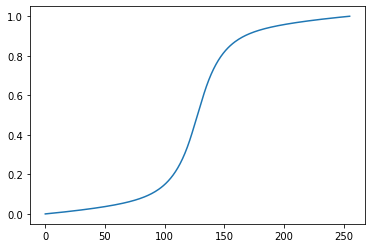

In [4]:
# Tom extra functions
import matplotlib as mpl
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

def terrbar(ax, xdat, ydat, xerr=[], yerr=[], label='', marker='o', ls='none',  colorfrac=0, cmap='bwr', hollow=False, **kwargs):
        if len(xerr) == 0:
                xerr = np.zeros(len(xdat))
        if len(yerr) == 0:
                yerr = np.zeros(len(ydat))

        cmapFunc = mpl.cm.get_cmap(cmap)
        if hollow == False :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc=cmapFunc(colorfrac), 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],0.5), ecolor=cmapFunc(colorfrac), capsize=None, **kwargs)
        else :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc='none', 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],0.5), ecolor=cmapFunc(colorfrac), capsize=None, **kwargs)
            
def scalelocofax(_ax, scaleWidth,scaleHeight,shiftRight,shiftUp):
    _axs1pos_bbox = _ax.get_position()
    _ax.set_position([_axs1pos_bbox.x0 + (shiftRight)*_axs1pos_bbox.width,_axs1pos_bbox.y0+ _axs1pos_bbox.height*(shiftUp),_axs1pos_bbox.width*scaleWidth, _axs1pos_bbox.height*(scaleHeight)])
    
# Make a non-linear colormap for showing correlators 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Want to take colormap at values from 0 to 1 and make values farther from 0.5 equal to values of color closer to 0.5 
colorIndPow = 0.3;
colorIndValsLin = np.array([ii/255.0 for ii in range(256)])
colorIndVals = [(np.sign((ii/255.0 - 0.5))*(np.abs((ii/255.0 - 0.5)*2.0))**colorIndPow + 1)/2.0 for ii in range(256)]

colorIndPow1 = 0.15
expDec = 10

colorIndVals = [(np.sign((ii/255.0 - 0.5))*(np.abs((ii/255.0 - 0.5)*2.0))**colorIndPow1*(1-np.exp(-expDec*np.abs((ii/255.0 - 0.5)*2.0)))/(1-np.exp(-expDec)) + 
                 1 )/2.0 for ii in range(256)]
plt.plot(colorIndVals)

bwrArray = np.array([mpl.cm.get_cmap('bwr')(ii) for ii in colorIndVals])
# numToSetAtEnd = 4
# bwrArray[0:numToSetAtEnd] = mpl.cm.get_cmap('jet')(0) # make it slightly darker
# bwrArray[-1-numToSetAtEnd:-1] = mpl.cm.get_cmap('jet')(0.99999)
bwr_nonlinear_cmap = ListedColormap(bwrArray, name = 'bwr_nonlinear')

In [5]:
def SetRCParms_Martin(): # Set global plotting properties for Nature figures
    mpl.rcParams['text.usetex']                  = False # need to make sure you have dvipng installed in the latex distro 
    mpl.rcParams['axes.formatter.use_mathtext']  = True # When True, use mathtext for scientific
    
    # Saving Settings
    mpl.rcParams['savefig.pad_inches']           = 0.01 # dont want any. 
    mpl.rcParams['savefig.bbox']                 = 'standard' # if you do tight it ends up cutting the data. tight
    mpl.rcParams['savefig.format']               = 'pdf'
    mpl.rcParams['savefig.dpi']                  = 400
    mpl.rcParams['figure.dpi']                   = 400  # needs to be the same as the default saving setting or the saved figures will look different from the generated figures. 
    mpl.rcParams['savefig.transparent']          = False # can be true.
    # The figure subplot parameters.  All dimensions are a fraction of the
    # figure width or height
    mpl.rcParams['figure.subplot.left']          = 0.13  # the left side of the subplots of the figure
    mpl.rcParams['figure.subplot.right']         = 0.975    # the right side of the subplots of the figure
    mpl.rcParams['figure.subplot.bottom']        = 0.12    # the bottom of the subplots of the figure
    mpl.rcParams['figure.subplot.top']           = 0.955    # the top of the subplots of the figure
    mpl.rcParams['figure.subplot.wspace']        = 0.35    # the amount of width reserved for blank space between subplots
    mpl.rcParams['figure.subplot.hspace']        = 0.375    # the amount of height reserved for white space between subplots
    ### LINES
    mpl.rcParams['lines.linewidth']              = 0.75     # line width in points
    mpl.rcParams['lines.marker']                 = '' # 'o'       # the default marker
    mpl.rcParams['lines.markersize']             = 3 
    mpl.rcParams['lines.markeredgewidth']        = 0.5 
    ### Axes settings
    mpl.rcParams['axes.linewidth']               = 0.75    # edge linewidth
    mpl.rcParams['axes.grid']                    = False   # display grid or not
    mpl.rcParams['axes.titlesize']               = 'medium'   # fontsize of the axes title
    mpl.rcParams['axes.labelsize']               = 7.5; # 'medium'  # fontsize of the x any y labels
    mpl.rcParams['axes.labelweight']             = 'normal'  # weight of the x and y labels
    mpl.rcParams['axes.labelcolor']              = 'black'
    mpl.rcParams['axes.labelpad']                = 0.85 # distance from tick labels to axis label
    mpl.rcParams['axes.axisbelow']               = False   # whether axis gridlines and ticks are below the axes elements (lines, text, etc)
    mpl.rcParams['axes.spines.left']             = True
    mpl.rcParams['axes.spines.right']            = True
    mpl.rcParams['axes.spines.bottom']           = True
    mpl.rcParams['axes.spines.top']              = True    
    mpl.rcParams['axes.xmargin']                 = 0.05  # x margin.  See `axes.Axes.margins`
    mpl.rcParams['axes.ymargin']                 = 0.05  # y margin See `axes.Axes.margins`
    mpl.rcParams['axes.formatter.limits']        = -7, 7 # use scientific notation if log10
                                   # of the axis range is smaller than the
                                   # first or larger than the second
    mpl.rcParams['axes.formatter.useoffset']     = True    # If True, the tick label formatter
                                             # will default to labeling ticks relative
                                             # to an offset when the data range is
                                             # small compared to the minimum absolute
                                             # value of the data.
    ### TICKS
    mpl.rcParams['xtick.top']                    = False   # draw ticks on the top side
    mpl.rcParams['xtick.bottom']                 = True   # draw ticks on the bottom side
    mpl.rcParams['xtick.major.size']             = 2.4      # major tick size in points
    mpl.rcParams['xtick.minor.size']             = 1.2      # minor tick size in points
    mpl.rcParams['xtick.major.width']            = 0.5    # major tick width in points
    mpl.rcParams['xtick.minor.width']            = 0.5    # minor tick width in points
    mpl.rcParams['xtick.major.pad']              = 1      # distance to major tick label in points
    mpl.rcParams['xtick.minor.pad']              = 1      # distance to the minor tick label in points
    mpl.rcParams['xtick.labelsize']              = 7.0 # 'small' # fontsize of the tick labels
    mpl.rcParams['xtick.direction']              = 'out'     # direction: in, out, or inout
    mpl.rcParams['ytick.left']                   = True   # draw ticks on the left side
    mpl.rcParams['ytick.right']                  = False  # draw ticks on the right side
    mpl.rcParams['ytick.major.size']             = 2.4      # major tick size in points
    mpl.rcParams['ytick.minor.size']             = 1.2      # minor tick size in points
    mpl.rcParams['ytick.major.width']            = 0.5    # major tick width in points
    mpl.rcParams['ytick.minor.width']            = 0.5    # minor tick width in points
    mpl.rcParams['ytick.major.pad']              = 1      # distance to major tick label in points
    mpl.rcParams['ytick.minor.pad']              = 1      # distance to the minor tick label in points
    mpl.rcParams['ytick.labelsize']              = 7.0 # 'small' # fontsize of the tick labels
    mpl.rcParams['ytick.direction']              = 'out'     # direction: in, out, or inout
    
    ### Legends
    mpl.rcParams['legend.fontsize']              = 6.0 # 'small' # fontsize of legends

    return None

SetRCParms_Martin()
SetRCParms_Martin() # have to run twice?

# Read in data

In [6]:
# Basic params 
d_max_glob = 6
d_max_plt_glob = 3
d_max = d_max_glob
c_size = 2*d_max+1
totalSumRad_spin = 4.0
totalSumRad_density = 5
totalSumRad_forfit = 8
deltaRadForSum_density = 1.01
deltaRadForSum_spin = 0.51
# Tunneling in Hz
tunHz_val = 340
tunHz_err = 20

# Set up radii for reading in 
xx, yy = np.meshgrid(np.linspace(-d_max, d_max, c_size), np.linspace(-d_max, d_max, c_size))
rr = np.sqrt(xx**2+yy**2)
rr_val, _arg, _cnt = np.unique(rr, return_index=True, return_counts=True)
xx_val = np.array(xx.ravel()[_arg]) # For getting finite momentum structure factors and things
yy_val = np.array(yy.ravel()[_arg])
rr_rectifier = (-1)**(xx_val + yy_val)

def convert_rad_to_ind(_rr_val, _rval):
    return np.argmin(np.abs(_rval - _rr_val)).astype(int)

totalSumInd_spin =  convert_rad_to_ind(rr_val, totalSumRad_spin)
totalSumInd_density = convert_rad_to_ind(rr_val, totalSumRad_density)
totalSumInd_forfit = convert_rad_to_ind(rr_val, totalSumRad_forfit)

print( totalSumInd_spin, totalSumInd_density, totalSumInd_forfit)

# Read in basic values 
U_val = []; U_err = []
for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    U = dset['U']; B = dset['B'];
    U_val.append(U[0])
    U_err.append(U[1])

9 13 25


In [37]:
# Densities vs radius 
nr_r_vals=[]; nr_r_errs=[];
nr_n_vals=[]; nr_n_errs=[];
nr_d_vals=[]; nr_d_errs=[];
# Densities vs U/t 
nup_vals = []; ndn_vals = []; ndoublon_vals = []; imbal_vals = [];
nup_errs = []; ndn_errs = []; ndoublon_errs = []; imbal_errs = [];
n_local_fractional_variance_vals = [];
n_local_fractional_variance_errs = [];
n_global_fractional_variance_vals = [];
n_global_fractional_variance_errs = [];

for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    
    fname_nr_n = 'nr_{}_U={}({}).npy'.format('n', dset['U'][0], dset['U'][1])
    fname_nr_d = 'nr_{}_U={}({}).npy'.format('d', dset['U'][0], dset['U'][1])
    nr_n_val, nr_n_err = np.load(os.path.join(data_dir, fname_nr_n))
    nr_d_val, nr_d_err = np.load(os.path.join(data_dir, fname_nr_d))
    nr_r_vals.append(nr_n_val[0]); nr_r_errs.append(nr_n_err[0])
    nr_n_vals.append(nr_n_val[1]); nr_n_errs.append(nr_n_err[1])
    nr_d_vals.append(nr_d_val[1]); nr_d_errs.append(nr_d_err[1])

for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]

    fname_nup = 'n_{}_U={}({}).npy'.format('up', dset['U'][0], dset['U'][1])
    fname_ndn = 'n_{}_U={}({}).npy'.format('dn', dset['U'][0], dset['U'][1])
    fname_ndoublon = 'n_{}_U={}({}).npy'.format('doublon', dset['U'][0], dset['U'][1])
    nup_val, nup_err = np.load(os.path.join(data_dir, fname_nup))
    ndn_val, ndn_err = np.load(os.path.join(data_dir, fname_ndn))
    ndoublon_val, ndoublon_err = np.load(os.path.join(data_dir, fname_ndoublon))
    nup_vals.append(nup_val)
    ndn_vals.append(ndn_val)
    ndoublon_vals.append(ndoublon_val)
    nup_errs.append(nup_err)
    ndn_errs.append(ndn_err)
    ndoublon_errs.append(ndoublon_err)
    
    fname_imbal = '{}_U={}({}).npy'.format('imbal', dset['U'][0], dset['U'][1])
    imbal_val, imbal_err = np.load(os.path.join(data_dir, fname_imbal))
    imbal_vals.append(imbal_val)
    imbal_errs.append(imbal_err)

oneminusndn = np.array(np.ones(len(ndn_vals))-ndn_vals)
ntot_vals = np.array(nup_vals) + np.array(ndn_vals)
ntot_errs = np.sqrt(np.array(nup_errs)**2 + np.array(ndn_errs)**2)
nsinglon_vals = np.array(nup_vals) + np.array(ndn_vals) - 2*np.array(ndoublon_vals)
nsinglon_errs = np.sqrt(np.array(nup_errs)**2 + np.array(ndn_errs)**2 + (2*np.array(ndoublon_errs))**2)

# Non-local fraction from singlon density
nsOvern_vals =1 - 2*np.array(ndoublon_vals)/np.array(ntot_vals)
nsOvern_errs =np.abs(2*np.array(ndoublon_vals)/np.array(ntot_vals))*np.sqrt((np.array(ndoublon_errs)/np.array(ndoublon_vals))**2 + (np.array(ntot_errs)/np.array(ntot_vals))**2)

nr_s_dn_vals = np.array(nr_n_vals)/2.0 - np.array(nr_d_vals)
nr_s_dn_errs = np.sqrt((np.array(nr_n_errs)/2.0)**2 + np.array(nr_d_errs)**2)
nr_s_up_vals = np.array(nr_n_vals)/2.0 - np.array(nr_d_vals)
nr_s_up_errs = np.sqrt((np.array(nr_n_errs)/2.0)**2 + np.array(nr_d_errs)**2)

nr_up_vals = np.array(nr_n_vals)/2.0
nr_up_errs = np.sqrt((np.array(nr_n_errs)/2.0)**2)
nr_dn_vals = np.array(nr_n_vals)/2.0
nr_dn_errs = np.sqrt((np.array(nr_n_errs)/2.0)**2)

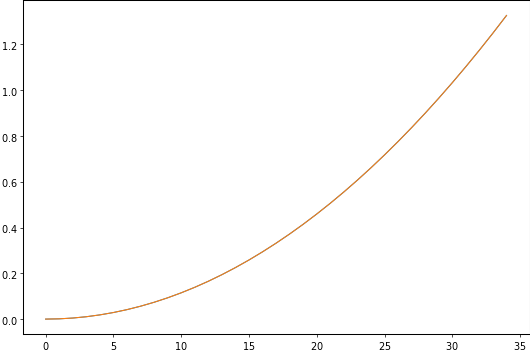

In [21]:
# Make radial potential data
r_vals = np.linspace(0, len(nr_r_vals[0])-1, len(nr_r_vals[0]))
# Calculate compressibility
dv    = 0.78 # Hz
dndr  = np.gradient(nr_r_vals[0][0])
nr_v_vals_single = 0.5*(dv*r_vals**2)/tunHz_val

nr_v_vals = np.copy(nr_r_vals)
for ii, key in enumerate(data_sets.keys()):
    nr_v_vals[ii]=nr_v_vals_single

plt.plot(r_vals,nr_v_vals_single)
plt.plot(r_vals,nr_v_vals[0])

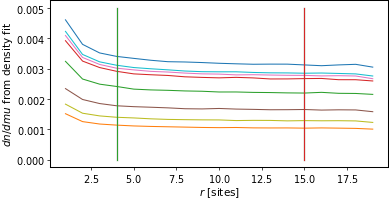

In [8]:
# Fluctuation dissipation data
kappa_vals=[]; kappa_errs=[];
kappa_vsrad_vals = []
kappa_vsrad_errs = []
kappa_vsrad_n_vals = []
kappa_vsrad_n_errs = []


plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1, figsize=(4, 2))

for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    
    fname_kappa = 'kappa_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
    kappa_val, kappa_err = np.load(os.path.join(data_dir, fname_kappa))
    # Kappa values 
    rMinForKappa = 4
    rMaxForKappa = 15
    ax.plot(kappa_val)
    ax.plot([rMinForKappa,rMinForKappa], [0 , 0.005])
    ax.plot([rMaxForKappa,rMaxForKappa], [0 , 0.005])
    setlabels(ax, ['$r$ [sites]', '$d n/ d mu$ from density fit'])

    # plt.plot(kappa_val[rMinForKappa :rMaxForKappa ])
    
    avg_kappa_val = np.average(kappa_val[rMinForKappa :rMaxForKappa])
    avg_kappa_err = np.average(kappa_err[rMinForKappa :rMaxForKappa])
    kappa_vals.append(avg_kappa_val*tunHz_val); 
    kappa_errs.append(np.abs(avg_kappa_val*tunHz_val)*np.sqrt((avg_kappa_err/avg_kappa_val)**2+(tunHz_err/tunHz_val)**2))
    
    # Now save stuff vs radius to plot multiple values later
    kappa_vsrad_vals.append(kappa_val[rMinForKappa :len(kappa_val)]*tunHz_val); 
    kappa_vsrad_errs.append(np.abs(kappa_val[rMinForKappa :len(kappa_val)]*tunHz_val)*np.sqrt((kappa_err[rMinForKappa :len(kappa_val)]/kappa_val[rMinForKappa :len(kappa_val)])**2+(tunHz_err/tunHz_val)**2))
    kappa_vsrad_n_vals.append(nr_n_vals[ii][rMinForKappa :len(kappa_val)]); 
    kappa_vsrad_n_errs.append(nr_n_errs[ii][rMinForKappa :len(kappa_val)]); 
plt.show()

# Add in systematic uncertainty on kappa values from uncertainty on measured force
    # Measured force is 0.78(5) Hz/sites^2 times sites. So the fractional uncertainty is 0.05/0.78

kappa_errs = np.abs(np.array(kappa_vals))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2 + (0.05/0.78)**2)

In [9]:
# Susceptibilities vs k in Brillouin zone
# Get finite momentum pairing data, and k=0 pairing data 

# now get arguments for k along 0 to pi to pipi to 0, so that we can just plug this in to get values of kmat along this line
cft_nn_traceBZ_vals = []
cft_ss_traceBZ_vals = []
cft_nn_traceBZ_errs = []
cft_ss_traceBZ_errs = []

chargeSusc_traceBZ_vals = []
chargeSusc_traceBZ_errs = []
spinSusc_traceBZ_vals = []
spinSusc_traceBZ_errs = []

cft_nn_traceBZ_fit_vals = []
cft_ss_traceBZ_fit_vals = []
cft_nn_traceBZ_fit_errs = []
cft_ss_traceBZ_fit_errs = []

chargeSusc_traceBZ_fit_vals = []
chargeSusc_traceBZ_fit_errs = []
spinSusc_traceBZ_fit_vals = []
spinSusc_traceBZ_fit_errs = []

for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    
    #####################
    ### Load raw data ###
    #####################
    # C_nn trace around BZ
    fname = 'c{}{}_k_BZ_U={}({}).npy'.format('n', 'n', dset['U'][0], dset['U'][1])
    cval, cerr = np.load(os.path.join(data_dir, fname))
    cft_nn_traceBZ_vals.append(cval[2])
    cft_nn_traceBZ_errs.append(cerr[2])
    
    # C_ss trace around BZ
    fname = 'c{}{}_k_BZ_U={}({}).npy'.format('s', 's', dset['U'][0], dset['U'][1])
    cval, cerr = np.load(os.path.join(data_dir, fname))
    cft_ss_traceBZ_vals.append(cval[2])
    cft_ss_traceBZ_errs.append(cerr[2])
    
    # Get charge fluct to normalize by 
    chargeFluctAtkEq0_val =cft_nn_traceBZ_vals[ii][0]
    chargeFluctAtkEq0_err =cft_nn_traceBZ_errs[ii][0]
    spinFluctAtkEq0_val =cft_ss_traceBZ_vals[ii][0]
    spinFluctAtkEq0_err =cft_ss_traceBZ_errs[ii][0]
    
    # Convert to susceptibilities using temperature data as well 
    chargeSusc_traceBZ_vals.append(cft_nn_traceBZ_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_val)
    spinSusc_traceBZ_vals.append(cft_ss_traceBZ_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_val)
    chargeSusc_traceBZ_errs.append(np.abs(cft_nn_traceBZ_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_val)*np.sqrt(
        (kappa_errs[ii]/kappa_vals[ii])**2 
        + (chargeFluctAtkEq0_err/chargeFluctAtkEq0_val)**2 
        + (cft_nn_traceBZ_errs[ii]/cft_nn_traceBZ_vals[ii])**2))
    spinSusc_traceBZ_errs.append(np.abs(cft_ss_traceBZ_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_val)*np.sqrt(
        (kappa_errs[ii]/kappa_vals[ii])**2 
        + (chargeFluctAtkEq0_err/chargeFluctAtkEq0_val)**2 
        + (cft_ss_traceBZ_errs[ii]/cft_ss_traceBZ_vals[ii])**2))
    
    #####################
    ### Load fit data ###
    #####################
    # C_nn trace around BZ
    fname = 'c{}{}_k_BZ_fit_U={}({}).npy'.format('n', 'n', dset['U'][0], dset['U'][1])
    cval, cerr = np.load(os.path.join(data_dir, fname))
    cft_nn_traceBZ_fit_vals.append(cval[2])
    cft_nn_traceBZ_fit_errs.append(cerr[2])
    
    # C_ss trace around BZ
    fname = 'c{}{}_k_BZ_fit_U={}({}).npy'.format('s', 's', dset['U'][0], dset['U'][1])
    cval, cerr = np.load(os.path.join(data_dir, fname))
    cft_ss_traceBZ_fit_vals.append(cval[2])
    cft_ss_traceBZ_fit_errs.append(cerr[2])
    
    # Get charge fluct to normalize by 
    chargeFluctAtkEq0_fit_val =cft_nn_traceBZ_fit_vals[ii][0]
    chargeFluctAtkEq0_fit_err =cft_nn_traceBZ_fit_errs[ii][0]
    spinFluctAtkEq0_fit_val =cft_ss_traceBZ_fit_vals[ii][0]
    spinFluctAtkEq0_fit_err =cft_ss_traceBZ_fit_errs[ii][0]
    
    # Convert to susceptibilities using temperature data as well 
    chargeSusc_traceBZ_fit_vals.append(cft_nn_traceBZ_fit_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_fit_val)
    spinSusc_traceBZ_fit_vals.append(cft_ss_traceBZ_fit_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_fit_val)
    chargeSusc_traceBZ_fit_errs.append(np.abs(cft_nn_traceBZ_fit_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_fit_val)*np.sqrt(
        (kappa_errs[ii]/kappa_vals[ii])**2 
        + (chargeFluctAtkEq0_fit_err/chargeFluctAtkEq0_fit_val)**2 
        + (cft_nn_traceBZ_fit_errs[ii]/cft_nn_traceBZ_fit_vals[ii])**2))
    spinSusc_traceBZ_fit_errs.append(np.abs(cft_ss_traceBZ_fit_vals[ii]*np.array(kappa_vals)[ii]/chargeFluctAtkEq0_fit_val)*np.sqrt(
        (kappa_errs[ii]/kappa_vals[ii])**2 
        + (chargeFluctAtkEq0_fit_err/chargeFluctAtkEq0_fit_val)**2 
        + (cft_ss_traceBZ_fit_errs[ii]/cft_ss_traceBZ_fit_vals[ii])**2))
    
    k_ind_max = int((len(cval[2])+2)/3 - 1) # index corresponding to k=pi index in trace of brillouin zone

# reconstruct trace values of k around BZ
kx_traceBZ = [] # Will add to this along 0 to pi then to pi pi then back to 0
ky_traceBZ = [] # Will add to this along 0 to pi then to pi pi then back to 0
majorLocs_traceBZ = [0]
for _inTrace in range(k_ind_max): #. 0 to pi
    kx_traceBZ.append((_inTrace)*np.pi/(k_ind_max))
    ky_traceBZ.append((0)*np.pi/(k_ind_max))
majorLocs_traceBZ.append(len(kx_traceBZ)) # pi
for _inTrace in range(k_ind_max): # pi to pi pi
    kx_traceBZ.append((k_ind_max)*np.pi/(k_ind_max))
    ky_traceBZ.append((_inTrace)*np.pi/(k_ind_max))
majorLocs_traceBZ.append(len(kx_traceBZ)) # pi pi
for _inTrace in reversed(range(k_ind_max+1)): # pi pi back to 0, have to add plus one to get to the last point
    kx_traceBZ.append((_inTrace)*np.pi/(k_ind_max))
    ky_traceBZ.append((_inTrace)*np.pi/(k_ind_max))
majorLocs_traceBZ.append(len(kx_traceBZ)) # end 
majorLocsNames_traceBZ = ['(0,0)','($\\pi$,0)','($\\pi$,$\\pi$)','(0,0)']
inds_traceBZ = range(len(kx_traceBZ))

In [10]:
# Connected correlators 

def get_dat_connCorr(fnamecmat, fnamecsum, _totalSumInd):
    # 2D correlator maps
    c_nn_vals = []; c_nn_errs = []
    # Sum values out to some radius vs radius
    csum_nn_vals = []; csum_nn_errs = []
    # Values vs radius with degeneracy 
    c_nn_vsRadWithDegen_vals = []; c_nn_vsRadWithDegen_errs = []
    # Values vs radius without degeneracy 
    c_nn_vsRadWithoutDegen_vals = []; c_nn_vsRadWithoutDegen_errs = []
    # Sums at specific distances vs radius 
    c_nn_loc_val = []; c_nn_loc_err = []; 
    c_nn_tot_val = []; c_nn_tot_err = [];
    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]

        # C_nn
        fname = fnamecmat+'_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
        c_nn_val, c_nn_err = np.load(os.path.join(data_dir, fname))
        c_nn_vals.append(c_nn_val)
        c_nn_errs.append(c_nn_err)
        c_nn_vsRadWithDegen_vals.append(_cnt*c_nn_val.ravel()[_arg])
        c_nn_vsRadWithDegen_errs.append(_cnt*c_nn_err.ravel()[_arg])
        c_nn_vsRadWithoutDegen_vals.append(c_nn_val.ravel()[_arg])
        c_nn_vsRadWithoutDegen_errs.append(c_nn_err.ravel()[_arg])
        # Csum_nn 
        fname = fnamecsum+'_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
        csum_nn_val, csum_nn_err = np.load(os.path.join(data_dir, fname))
        csum_nn_vals.append(csum_nn_val[1])
        csum_nn_errs.append(csum_nn_err[1])
        c_nn_loc_val.append(csum_nn_val[1][0])
        c_nn_loc_err.append(csum_nn_err[1][0])
        c_nn_tot_val.append(csum_nn_val[1][_totalSumInd])
        c_nn_tot_err.append(csum_nn_err[1][_totalSumInd])
    return ([c_nn_vals, c_nn_errs], [csum_nn_vals, csum_nn_errs], [c_nn_vsRadWithDegen_vals, c_nn_vsRadWithDegen_errs], 
            [c_nn_vsRadWithoutDegen_vals, c_nn_vsRadWithoutDegen_errs], [c_nn_loc_val, c_nn_loc_err],[c_nn_tot_val, c_nn_tot_err])

# Read the data 
([c_nn_vals, c_nn_errs], [csum_nn_vals, csum_nn_errs], [c_nn_vsRadWithDegen_vals, c_nn_vsRadWithDegen_errs], [c_nn_vsRadWithoutDegen_vals, c_nn_vsRadWithoutDegen_errs], 
 [c_nn_loc_val, c_nn_loc_err],[c_nn_tot_val, c_nn_tot_err]) = get_dat_connCorr('C_n-n', 'Csum_n-n', totalSumInd_density)

([c_ss_vals, c_ss_errs], [csum_ss_vals, csum_ss_errs], [c_ss_vsRadWithDegen_vals, c_ss_vsRadWithDegen_errs], [c_ss_vsRadWithoutDegen_vals, c_ss_vsRadWithoutDegen_errs], 
 [c_ss_loc_val, c_ss_loc_err],[c_ss_tot_val, c_ss_tot_err]) = get_dat_connCorr('C_s-s', 'Csum_s-s', totalSumInd_spin)

([c_updn_vals, c_updn_errs], [csum_updn_vals, csum_updn_errs], [c_updn_vsRadWithDegen_vals, c_updn_vsRadWithDegen_errs], [c_updn_vsRadWithoutDegen_vals, c_updn_vsRadWithoutDegen_errs], 
 [c_updn_loc_val, c_updn_loc_err],[c_updn_tot_val, c_updn_tot_err]) = get_dat_connCorr('C_up-dn', 'Csum_up-dn', totalSumInd_density)

([c_upup_vals, c_upup_errs], [csum_upup_vals, csum_upup_errs], [c_upup_vsRadWithDegen_vals, c_upup_vsRadWithDegen_errs], [c_upup_vsRadWithoutDegen_vals, c_upup_vsRadWithoutDegen_errs], 
 [c_upup_loc_val, c_upup_loc_err],[c_upup_tot_val, c_upup_tot_err]) = get_dat_connCorr('C_up-up', 'Csum_up-up', totalSumInd_density)

([c_dndn_vals, c_dndn_errs], [csum_dndn_vals, csum_dndn_errs], [c_dndn_vsRadWithDegen_vals, c_dndn_vsRadWithDegen_errs], [c_dndn_vsRadWithoutDegen_vals, c_dndn_vsRadWithoutDegen_errs], 
 [c_dndn_loc_val, c_dndn_loc_err],[c_dndn_tot_val, c_dndn_tot_err]) = get_dat_connCorr('C_dn-dn', 'Csum_dn-dn', totalSumInd_density)

([c_updn_rect_vals, c_updn_rect_errs], [csum_updn_rect_vals, csum_updn_rect_errs], [c_updn_rect_vsRadWithDegen_vals, c_updn_rect_vsRadWithDegen_errs], [c_updn_rect_vsRadWithoutDegen_vals, c_updn_rect_vsRadWithoutDegen_errs], 
 [c_updn_rect_loc_val, c_updn_rect_loc_err],[c_updn_rect_tot_val, c_updn_rect_tot_err]) = get_dat_connCorr('C_up-dn_rect', 'Csum_up-dn_rect', totalSumInd_density)

([c_nn_rect_vals, c_nn_rect_errs], [csum_nn_rect_vals, csum_nn_rect_errs], [c_nn_rect_vsRadWithDegen_vals, c_nn_rect_vsRadWithDegen_errs], [c_nn_rect_vsRadWithoutDegen_vals, c_nn_rect_vsRadWithoutDegen_errs], 
 [c_nn_rect_loc_val, c_nn_rect_loc_err],[c_nn_rect_tot_val, c_nn_rect_tot_err]) = get_dat_connCorr('C_n-n_rect', 'Csum_n-n_rect', totalSumInd_density)

([cond_excess_up_vals, cond_excess_up_errs], [csum_cond_excess_up_vals, csum_cond_excess_up_errs], [cond_excess_up_vsRadWithDegen_vals, cond_excess_up_vsRadWithDegen_errs], [cond_excess_up_vsRadWithoutDegen_vals, cond_excess_up_vsRadWithoutDegen_errs], 
 [cond_excess_up_loc_val, cond_excess_up_loc_err],[cond_excess_up_tot_val, cond_excess_up_tot_err]) = get_dat_connCorr('cond_excess_u', 'Csum_cond_excess_u', totalSumInd_density)

([cond_excess_dn_vals, cond_excess_dn_errs], [csum_cond_excess_dn_vals, csum_cond_excess_dn_errs], [cond_excess_dn_vsRadWithDegen_vals, cond_excess_dn_vsRadWithDegen_errs], [cond_excess_dn_vsRadWithoutDegen_vals, cond_excess_dn_vsRadWithoutDegen_errs], 
 [cond_excess_dn_loc_val, cond_excess_dn_loc_err],[cond_excess_dn_tot_val, cond_excess_dn_tot_err]) = get_dat_connCorr('cond_excess_d', 'Csum_cond_excess_d', totalSumInd_density)

# Get data with long range fit
([c_nn_fit_vals, c_nn_fit_errs], [csum_nn_fit_vals, csum_nn_fit_errs], [c_nn_vsRadWithDegen_fit_vals, c_nn_vsRadWithDegen_fit_errs], [c_nn_vsRadWithoutDegen_fit_vals, c_nn_vsRadWithoutDegen_fit_errs], 
 [c_nn_loc_fit_val, c_nn_loc_fit_err],[c_nn_tot_fit_val, c_nn_tot_fit_err]) = get_dat_connCorr('C_n-n_fit', 'Csum_n-n_fit', totalSumInd_forfit)

([c_ss_fit_vals, c_ss_fit_errs], [csum_ss_fit_vals, csum_ss_fit_errs], [c_ss_vsRadWithDegen_fit_vals, c_ss_vsRadWithDegen_fit_errs], [c_ss_vsRadWithoutDegen_fit_vals, c_ss_vsRadWithoutDegen_fit_errs], 
 [c_ss_loc_fit_val, c_ss_loc_fit_err],[c_ss_tot_fit_val, c_ss_tot_fit_err]) = get_dat_connCorr('C_s-s_fit', 'Csum_s-s_fit', totalSumInd_forfit)

([c_updn_fit_vals, c_updn_fit_errs], [csum_updn_fit_vals, csum_updn_fit_errs], [c_updn_vsRadWithDegen_fit_vals, c_updn_vsRadWithDegen_fit_errs], [c_updn_vsRadWithoutDegen_fit_vals, c_updn_vsRadWithoutDegen_fit_errs], 
 [c_updn_loc_fit_val, c_updn_loc_fit_err],[c_updn_tot_fit_val, c_updn_tot_fit_err]) = get_dat_connCorr('C_up-dn_fit', 'Csum_up-dn_fit', totalSumInd_forfit)

([c_updn_rect_fit_vals, c_updn_rect_fit_errs], [csum_updn_rect_fit_vals, csum_updn_rect_fit_errs], [c_updn_rect_vsRadWithDegen_fit_vals, c_updn_rect_vsRadWithDegen_fit_errs], [c_updn_rect_vsRadWithoutDegen_fit_vals, c_updn_rect_vsRadWithoutDegen_fit_errs], 
 [c_updn_rect_loc_fit_val, c_updn_rect_loc_fit_err],[c_updn_rect_tot_fit_val, c_updn_rect_tot_fit_err]) = get_dat_connCorr('C_up-dn_rect_fit', 'Csum_up-dn_rect_fit', totalSumInd_forfit)

([c_nn_rect_fit_vals, c_nn_rect_fit_errs], [csum_nn_rect_fit_vals, csum_nn_rect_fit_errs], [c_nn_rect_vsRadWithDegen_fit_vals, c_nn_rect_vsRadWithDegen_fit_errs], [c_nn_rect_vsRadWithoutDegen_fit_vals, c_nn_rect_vsRadWithoutDegen_fit_errs], 
 [c_nn_rect_loc_fit_val, c_nn_rect_loc_fit_err],[c_nn_rect_tot_fit_val, c_nn_rect_tot_fit_err]) = get_dat_connCorr('C_n-n_rect_fit', 'Csum_n-n_rect_fit', totalSumInd_forfit)

([cond_excess_up_fit_vals, cond_excess_up_fit_errs], [csum_cond_excess_up_fit_vals, csum_cond_excess_up_fit_errs], [cond_excess_up_vsRadWithDegen_fit_vals, cond_excess_up_vsRadWithDegen_fit_errs], [cond_excess_up_vsRadWithoutDegen_fit_vals, cond_excess_up_vsRadWithoutDegen_fit_errs], 
 [cond_excess_up_loc_fit_val, cond_excess_up_loc_fit_err],[cond_excess_up_tot_fit_val, cond_excess_up_tot_fit_err]) = get_dat_connCorr('cond_excess_u_fit', 'Csum_cond_excess_u_fit', totalSumInd_forfit)

([cond_excess_dn_fit_vals, cond_excess_dn_fit_errs], [csum_cond_excess_dn_fit_vals, csum_cond_excess_dn_fit_errs], [cond_excess_dn_vsRadWithDegen_fit_vals, cond_excess_dn_vsRadWithDegen_fit_errs], [cond_excess_dn_vsRadWithoutDegen_fit_vals, cond_excess_dn_vsRadWithoutDegen_fit_errs], 
 [cond_excess_dn_loc_fit_val, cond_excess_dn_loc_fit_err],[cond_excess_dn_tot_fit_val, cond_excess_dn_tot_fit_err]) = get_dat_connCorr('cond_excess_d_fit', 'Csum_cond_excess_d_fit', totalSumInd_forfit)


In [11]:
# Get correlator sums and error bars from fluctuations in the sum with choosing different final radius values to plot 

def gen_val_and_error_from_d_max_randomization(csumArr_vals, csumArr_errs, rr_val_mid, rr_val_delta):
    # to get the error bar, we need to take these average values, and generate a gaussian at that location with std deviation sigma, and add those up, and find the resulting standard dev.
    def gen_gaus_sample_arr_from_multiple_samples(_avgArr, _stdArr, _numsamplePerPoint):
        sampleArr= []
        for _pointInd, _avg in enumerate(_avgArr):
            sampleArr.append([np.random.normal(_avg,_stdArr[_pointInd]) for ii in range(_numsamplePerPoint)])
        sampleArr= np.array(sampleArr).flatten()
        return sampleArr

    numsamplePerPoint = 1000
    rr_inds_toavg = np.where(np.abs(rr_val - rr_val_mid) < rr_val_delta)
    csumsample_vals = [np.average(gen_gaus_sample_arr_from_multiple_samples(csumArr_vals[uuInd][rr_inds_toavg],csumArr_errs[uuInd][rr_inds_toavg], numsamplePerPoint)) for uuInd in range(len(U_val))]
    csumsample_errs = [np.std(gen_gaus_sample_arr_from_multiple_samples(csumArr_vals[uuInd][rr_inds_toavg],csumArr_errs[uuInd][rr_inds_toavg], numsamplePerPoint)) for uuInd in range(len(U_val))]

    # uuIndTest = 3
    # plt.hist(gen_gaus_sample_arr_from_multiple_samples(csumArr_vals[uuIndTest][rr_inds_toavg],csumArr_errs[uuIndTest][rr_inds_toavg], numsamplePerPoint))
    # plt.show()
    
    return csumsample_vals, csumsample_errs
    
rr_val_mid_forAvg = totalSumRad_spin
rr_val_delta_forAvg = deltaRadForSum_spin
c_ss_tot_varydmax_val, c_ss_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_ss_vals, csum_ss_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)
rr_val_mid_forAvg = totalSumRad_density
rr_val_delta_forAvg = deltaRadForSum_density
c_nn_tot_varydmax_val, c_nn_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_nn_vals, csum_nn_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)
c_nn_rect_tot_varydmax_val, c_nn_rect_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_nn_rect_vals, csum_nn_rect_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)
c_updn_tot_varydmax_val, c_updn_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_updn_vals, csum_updn_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)
c_updn_rect_tot_varydmax_val, c_updn_rect_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_updn_rect_vals, csum_updn_rect_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)
c_upup_tot_varydmax_val, c_upup_tot_varydmax_err = gen_val_and_error_from_d_max_randomization(csum_upup_vals, csum_upup_errs, rr_val_mid_forAvg, rr_val_delta_forAvg)


In [12]:
##### Fixed final radius #####

# Get temp values for real data at center of cloud, not bootstrapped whole cloud 
T_cent_vals = (np.array(c_nn_tot_val))/np.array(kappa_vals)
T_cent_errs = np.abs(np.array(c_nn_tot_val)/np.array(kappa_vals))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2 + 
                                                                          (np.array(c_nn_tot_err)/np.array(c_nn_tot_val))**2)

# Get k=0 and k = pi pi susceptibilities from sum of connected correaltors (not BZ trace)
spinSusc_keq0_vals = np.array(kappa_vals)*np.array(c_ss_tot_val)/np.array(c_nn_tot_val)
spinSusc_keq0_errs = np.abs(np.array(kappa_vals)*np.array(c_ss_tot_val)/np.array(c_nn_tot_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_ss_tot_err)/np.array(c_ss_tot_val))**2 + 
                                                            (np.array(c_nn_tot_err)/np.array(c_nn_tot_val))**2)

chargeSusc_keqpipi_vals = np.array(kappa_vals)*np.array(c_nn_rect_tot_val)/np.array(c_nn_tot_val)
chargeSusc_keqpipi_errs = np.abs(np.array(kappa_vals)*np.array(c_nn_rect_tot_val)/np.array(c_nn_tot_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_nn_rect_tot_err)/np.array(c_nn_rect_tot_val))**2 + 
                                                            (np.array(c_nn_tot_err)/np.array(c_nn_tot_val))**2)

##### vary final radius #####

# Get temp values 
T_cent_varydmax_vals = (np.array(c_nn_tot_varydmax_val))/np.array(kappa_vals)
T_cent_varydmax_errs = np.abs(np.array(c_nn_tot_varydmax_val)/np.array(kappa_vals))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2 + 
                                                                          (np.array(c_nn_tot_varydmax_err)/np.array(c_nn_tot_varydmax_val))**2)

# Get k=0 and k = pi pi susceptibilities from sum of connected correaltors (not BZ trace)
spinSusc_keq0_varydmax_vals = np.array(kappa_vals)*np.array(c_ss_tot_varydmax_val)/np.array(c_nn_tot_varydmax_val)
spinSusc_keq0_varydmax_errs = np.abs(np.array(kappa_vals)*np.array(c_ss_tot_varydmax_val)/np.array(c_nn_tot_varydmax_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_ss_tot_varydmax_err)/np.array(c_ss_tot_varydmax_val))**2 + 
                                                            (np.array(c_nn_tot_varydmax_err)/np.array(c_nn_tot_varydmax_val))**2)

chargeSusc_keqpipi_varydmax_vals = np.array(kappa_vals)*np.array(c_nn_rect_tot_varydmax_val)/np.array(c_nn_tot_varydmax_val)
chargeSusc_keqpipi_varydmax_errs = np.abs(np.array(kappa_vals)*np.array(c_nn_rect_tot_varydmax_val)/np.array(c_nn_tot_varydmax_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_nn_rect_tot_varydmax_err)/np.array(c_nn_rect_tot_varydmax_val))**2 + 
                                                            (np.array(c_nn_tot_varydmax_err)/np.array(c_nn_tot_varydmax_val))**2)



##### Use long range fits #####

# Get temp values for real data at center of cloud, not bootstrapped whole cloud 
T_cent_fit_vals = (np.array(c_nn_tot_fit_val))/np.array(kappa_vals)
T_cent_fit_errs = np.abs(np.array(c_nn_tot_fit_val)/np.array(kappa_vals))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2 + 
                                                                          (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)

# Get k=0 and k = pi pi susceptibilities from sum of connected correaltors (not BZ trace)
spinSusc_keq0_fit_vals = np.array(kappa_vals)*np.array(c_ss_tot_fit_val)/np.array(c_nn_tot_fit_val)
spinSusc_keq0_fit_errs = np.abs(np.array(kappa_vals)*np.array(c_ss_tot_fit_val)/np.array(c_nn_tot_fit_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_ss_tot_fit_err)/np.array(c_ss_tot_fit_val))**2 + 
                                                            (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)

chargeSusc_keqpipi_fit_vals = np.array(kappa_vals)*np.array(c_nn_rect_tot_fit_val)/np.array(c_nn_tot_fit_val)
chargeSusc_keqpipi_fit_errs = np.abs(np.array(kappa_vals)*np.array(c_nn_rect_tot_fit_val)/np.array(c_nn_tot_fit_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_nn_rect_tot_fit_err)/np.array(c_nn_rect_tot_fit_val))**2 + 
                                                            (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)

updnSusc_keqpipi_fit_vals = np.array(kappa_vals)*np.array(c_updn_rect_tot_fit_val)/np.array(c_nn_tot_fit_val)
updnSusc_keqpipi_fit_errs = np.abs(np.array(kappa_vals)*np.array(c_updn_rect_tot_fit_val)/np.array(c_nn_tot_fit_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_updn_rect_tot_fit_err)/np.array(c_updn_rect_tot_fit_val))**2 + 
                                                            (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)

updnSusc_keq0_fit_vals = np.array(kappa_vals)*np.array(c_updn_tot_fit_val)/np.array(c_nn_tot_fit_val)
updnSusc_keq0_fit_errs = np.abs(np.array(kappa_vals)*np.array(c_updn_tot_fit_val)/np.array(c_nn_tot_fit_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_updn_tot_fit_err)/np.array(c_updn_tot_fit_val))**2 + 
                                                            (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)



##### Use long range fit only for density on spin susc #####
spinSusc_keq0_halffit_vals = np.array(kappa_vals)*np.array(c_ss_tot_varydmax_val)/np.array(c_nn_tot_fit_val)
spinSusc_keq0_halffit_errs = np.abs(np.array(kappa_vals)*np.array(c_ss_tot_varydmax_val)/np.array(c_nn_tot_fit_val))*np.sqrt((np.array(kappa_errs)/np.array(kappa_vals))**2+ 
                                                            (np.array(c_ss_tot_varydmax_err)/np.array(c_ss_tot_varydmax_val))**2 + 
                                                            (np.array(c_nn_tot_fit_err)/np.array(c_nn_tot_fit_val))**2)


In [13]:
# Get density correlator fourier transform matrix 
# r['cnn_k'] = cnnk_mat
# r['cnn_k_fit'] = cnnk_mat_fit
def get_dat_connCorr_fourier(fnamecmat):
    # 2D correlator maps
    c_nn_vals = []; c_nn_errs = []
    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        # C_nn
        fname = fnamecmat+'_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
        c_nn_val, c_nn_err = np.load(os.path.join(data_dir, fname))
        c_nn_vals.append(c_nn_val)
        c_nn_errs.append(c_nn_err)
        
    return c_nn_vals, c_nn_errs

c_nn_k_vals, c_nn_k_errs =get_dat_connCorr_fourier('cnn_k')
c_nn_k_fit_vals, c_nn_k_fit_errs =get_dat_connCorr_fourier('cnn_k_fit')

In [14]:
# Connected correlators for other types of particles 

def load_corr_arrays_fromdsets(name1, name2):
    _c_vals = []; _c_errs = [];    # 2D correlator maps
    _c_vsRadWithoutDegen_vals = []; _c_vsRadWithoutDegen_errs = []

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_U={}({}).npy'.format(name1,name2, dset['U'][0], dset['U'][1])
        _c_val, _c_err = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _c_vsRadWithoutDegen_vals.append(_c_val.ravel()[_arg])
        _c_vsRadWithoutDegen_errs.append(_c_err.ravel()[_arg])
    return [[_c_vals, _c_errs], [_c_vsRadWithoutDegen_vals,_c_vsRadWithoutDegen_errs]]

# c_nn_vals = []; c_nn_errs = []; c_nn_vsRadWithoutDegen_vals = []; c_nn_vsRadWithoutDegen_errs = []
    
[[c_singlonupsinglondn_vals, c_singlonupsinglondn_errs], 
 [c_singlonupsinglondn_vsRadWithoutDegen_vals,c_singlonupsinglondn_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('singlonup','singlondn')
[[c_singlonupsinglonup_vals, c_singlonupsinglonup_errs], 
 [c_singlonupsinglonup_vsRadWithoutDegen_vals,c_singlonupsinglonup_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('singlonup','singlonup')
[[c_singlondnsinglondn_vals, c_singlondnsinglondn_errs], 
 [c_singlondnsinglondn_vsRadWithoutDegen_vals,c_singlondnsinglondn_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('singlondn','singlondn')
[[c_singlonsinglon_vals, c_singlonsinglon_errs], 
 [c_singlonsinglon_vsRadWithoutDegen_vals,c_singlonsinglon_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('singlon','singlon')
[[c_doublondoublon_vals, c_doublondoublon_errs], 
 [c_doublondoublon_vsRadWithoutDegen_vals,c_doublondoublon_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('doublon','doublon')
[[c_doublonsinglon_vals, c_doublonsinglon_errs], 
 [c_doublonsinglon_vsRadWithoutDegen_vals,c_doublonsinglon_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('doublon','singlon')
[[c_doublonsinglonup_vals, c_doublonsinglonup_errs], 
 [c_doublonsinglonup_vsRadWithoutDegen_vals,c_doublonsinglonup_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('doublon','singlonup')
[[c_doublonsinglondn_vals, c_doublonsinglondn_errs], 
 [c_doublonsinglondn_vsRadWithoutDegen_vals,c_doublonsinglondn_vsRadWithoutDegen_errs]] = load_corr_arrays_fromdsets('doublon','singlondn')

In [15]:
# Read in theory data for spin fluctuations generated by Jia 

# print(np.array(pd.read_csv(os.path.join('TheoryDataFromJia', 'chi_vs_U.csv'))))
[th_chi_U_val, th_chi_val_low, th_chi_val_high] = np.array(pd.read_csv(os.path.join('TheoryData', 'chi_vs_U.csv')))
[th_SpinFluc_U_val, th_SpinFluc_val_low, th_SpinFluc_val_high] = np.array(pd.read_csv(os.path.join('TheoryData', 'SpinFluc_vs_U.csv')))

# Trim first datapoints 
th_chi_U_val = th_chi_U_val[1:]
th_chi_val_low = th_chi_val_low[1:]
th_chi_val_high = th_chi_val_high[1:]
th_SpinFluc_U_val = th_SpinFluc_U_val[1:]
th_SpinFluc_val_low = th_SpinFluc_val_low[1:]
th_SpinFluc_val_high = th_SpinFluc_val_high[1:]

# Read in theory for 2 body bound state energy from Martin
[EbOfU_U, EbOfU_Eb] = np.transpose(np.array(pd.read_csv(os.path.join('TheoryData', 'EbOfUtab.csv'))))
dEbdUOfU = np.gradient(EbOfU_Eb)/np.gradient(EbOfU_U)
EbOfU_function = scipy.interpolate.interp1d(EbOfU_U,EbOfU_Eb) 
UOfEb_function = scipy.interpolate.interp1d(EbOfU_Eb,EbOfU_U) 

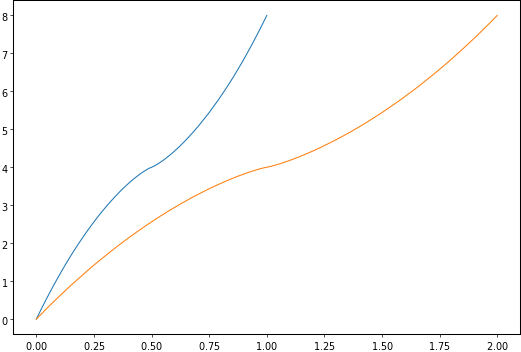

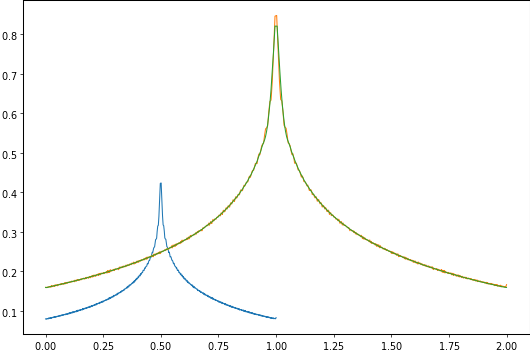

[3.281139624233547, 3.5756875776119763, 3.822119762306166]

In [16]:
# Generate non-interacting density of states to plot alongside things for compressibility

# Define a function to get the Fermi-Hubbard fermi surface in momentum space 

def FHHam():
    numkSpace = 1000
    kxgrid, kygrid = np.meshgrid(np.linspace(-np.pi, np.pi, (2*numkSpace + 1)), np.linspace(-np.pi, np.pi, (2*numkSpace + 1)))
    kspacegrid = np.ones(kxgrid.shape)
    totNum = np.sum(kspacegrid)
    ekNormed = (-2*np.cos(kxgrid)+ -2*np.cos(kygrid)+4)/8
    
    ekTestVals = np.linspace(0,1,1000)
    natekTestVals = np.linspace(0,1,1000)
    
    for ind, ek in enumerate(ekTestVals) :
        fracK = np.sum(np.where(ekNormed < ek,1,0))/totNum
        natekTestVals[ind] = fracK

    return natekTestVals, ekTestVals # Report the normalized Fermi Energy at a given single particle density 

nFH_FS, eFH_FS = FHHam()    # This is for single species, in normalized units
# Convert it to correct t units (bandwidth 8 t in 2D)
eFH_FS = eFH_FS*8
n2speciesFH_FS = 2*nFH_FS
e2speciesFH_FS = eFH_FS

plt.plot(nFH_FS,eFH_FS)
plt.plot(n2speciesFH_FS, e2speciesFH_FS)
plt.show()

# Check some results for single species 
# plt.plot(nFH_FS, eFH_FS)
dnde1speciesFH_FS = np.gradient(nFH_FS)/np.gradient(eFH_FS)
# For two species, density and energy doubles, so dnde is same, but effective density is 2x whatever the old value was 
dnde2speciesFH_FS = np.gradient(n2speciesFH_FS)/np.gradient(e2speciesFH_FS)


from scipy.signal import savgol_filter
belowHalfInds = np.where(n2speciesFH_FS < 1)
dnde2speciesFH_FS_smoothed_half = savgol_filter(dnde2speciesFH_FS[belowHalfInds], 19, 3)
n2speciesFH_FS_half = n2speciesFH_FS[belowHalfInds]
n2speciesFH_FS_smoothed = np.append(n2speciesFH_FS_half,2 - np.flip(n2speciesFH_FS_half))
dnde2speciesFH_FS_smoothed = np.append(dnde2speciesFH_FS_smoothed_half,np.flip(dnde2speciesFH_FS_smoothed_half))

plt.plot(nFH_FS,dnde1speciesFH_FS)
plt.plot(n2speciesFH_FS, dnde2speciesFH_FS)
plt.plot(n2speciesFH_FS_smoothed, dnde2speciesFH_FS_smoothed)
plt.show()

# Get the fermi energy vs n 

from scipy import interpolate

function_EFermiOfnTot = scipy.interpolate.interp1d(n2speciesFH_FS, eFH_FS) # 

[np.abs(function_EFermiOfnTot(0.7)),np.abs(function_EFermiOfnTot(0.8)),np.abs(function_EFermiOfnTot(0.9))]

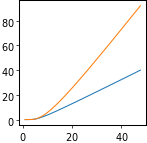

In [17]:
# Bound state energies analytically
def FH_get_UofEb_Analytic(_Ebval) :
    func = 1.0/((2/np.pi)*(1/(8+_Ebval))*scipy.special.ellipk((8/(_Ebval+8))**2 )) # Have to square the input to be consistent with definitions in reference  https://doi.org/10.1103/PhysRev.132.85 
    return func


def FH_get_ApproxEbofU_Analytic(_Uval) :
    # from Wortis 
    return 64.0/(np.exp(8*np.pi/_Uval)-1)

Eb_Analytictab = np.linspace(0.00001, 1,1000)**2*40
UofEb_Analytictab = np.vectorize(FH_get_UofEb_Analytic)(Eb_Analytictab)
ApproxEb_Analytictab = np.vectorize(FH_get_ApproxEbofU_Analytic)(UofEb_Analytictab)

fig, axs = plt.subplots(1, figsize=(1.5, 1.5))
plt.plot(UofEb_Analytictab,Eb_Analytictab)
plt.plot(UofEb_Analytictab,ApproxEb_Analytictab)

plt.show()

In [18]:
# Generate T* and Delta from mean field predictions 
from scipy.optimize import fmin

# Define energy spectrum of single particles and get Fermi energy 
numHalfKSpace = 50 # number of grid points from 0 to pi in momentum space 
kxgrid, kygrid = np.meshgrid(np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)), np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)))
numStates = np.sum(np.ones(kxgrid.shape))
ekgrid = (-2*np.cos(kxgrid)+ -2*np.cos(kygrid)+4)
Ekepsilonadd = 0.00000000000001/numStates # To prevent division by 0
    
# A general function to get mu and delta at fixed temp, n, and U

# First define forward functions 
############################### NOTE THERE IS LARGE NUMERICAL error on Uval and delta at small delta because its taking ratios of small numbers
# Get values of n and U at each mu and Delta and get interpolating function
def FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
    xikgrid = ekgrid - _muMeanFieldNeglected
    Ekgrid = np.sqrt(xikgrid**2 + _Delta**2) +Ekepsilonadd
    _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
    return _den
def FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_muMeanFieldNeglected, _Delta,_Temp):  
    xikgrid = ekgrid - _muMeanFieldNeglected
    Ekgrid = np.sqrt(xikgrid**2 + _Delta**2) +Ekepsilonadd
    _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
    return _Uval

# Now get inverse functions to get muMeanFieldNeglected and Delta at a given n and U. 
def FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(_Udesired, _dendesired, _Tempdesired): 
    # This internal function just defines a quadratic error function to minimize to get close to the desired n and U. It's just (U-Uactual)^2 + (n -nactual)^2 roughly
        # It has a bit of weird format to be able to feed it to fmin function 
    def funcToMinFor_muMeanFieldNeglectedAndDelta(_inputsVals, *_extraVals): # inputs should be [_muMeanFieldNeglected, _Delta] and _extraVals should be [_Udesired, _dendesired]
        _Uerr = ((_extraVals[0] - FH_get_U_vs_muMeanFieldNeglectedAndDeltaAndTemp(_inputsVals[0], _inputsVals[1], _Tempdesired))/8)**2
        _nerr = (_extraVals[1] - FH_get_n_vs_muMeanFieldNeglectedAndDeltaAndTemp(_inputsVals[0], _inputsVals[1], _Tempdesired))**2
        # Also force it to have positive delta 
        return (_Uerr)**(1/2) + 10*(_nerr)**(1/2) + 1000*np.heaviside(-_inputsVals[1],0) # For some reason adding the sqrt here makes things converge much better 
            # Have to make it really care about n because U is already really sensitive
    
    if _Udesired > 4 :
        _DeltaGuess = (_Udesired/2)*np.sqrt(_dendesired*(2-_dendesired))
    else :
        _DeltaGuess = 8*np.sqrt(_dendesired*(2-_dendesired))*np.exp(-8/_Udesired)
    
    guessesMuMeanFieldNeglectedDelta = [3.9*_dendesired,_DeltaGuess] 
    _muMeanFieldNeglectedval, _Deltaval = fmin(funcToMinFor_muMeanFieldNeglectedAndDelta, np.array(guessesMuMeanFieldNeglectedDelta),args = (_Udesired,_dendesired) , disp = False, xtol = 0.00000000001,ftol = 0.00000000001) # function, guess, extra args, 
    
    return _muMeanFieldNeglectedval, _Deltaval

# Get temperature where gap disappears at any U/t and density 
# New Tstar function to fix density and find U, since it's monotonic and easier to do. 

def FH_get_Ustar_vs_denAndTstar(_dendesired, _Tstardesired): 
    # For a given density and T*, there is a monotonic mu function to get desired n, and then that fixes U
    
    # Get values of n and U at each mu with delta=0 and get interpolating function
    def FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2) +Ekepsilonadd # no delta
        _den = 1-(1.0/numStates)*np.sum(xikgrid*np.tanh(Ekgrid/(2*_Temp))/Ekgrid)
        return _den
    def FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_muMeanFieldNeglected,_Temp):  
        xikgrid = ekgrid - _muMeanFieldNeglected
        Ekgrid = np.sqrt(xikgrid**2) +Ekepsilonadd # no delta
        _Uval = 1.0/(  (1.0/numStates)*np.sum(1/(2*Ekgrid)*np.tanh(Ekgrid/(2*_Temp))) ) 
        return _Uval
    
    def funcToMinFor_U(_inputsVal, *_extraVals): # inputs should be mu guess _extraVals should be [_dendesired, _Tstardesired]
        # First get these
        _nStar = FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_inputsVal[0],_extraVals[1])
        _nerr = (_extraVals[0] - _nStar)**2
        return (_nerr)**(1) # For some reason adding the sqrt here makes things converge much better 
            # Have to make it really care about n because U is already really sensitive
        
    _muGuess = 3.9*_dendesired 
    _guessVals = [_muGuess]
    _muval = fmin(funcToMinFor_U, _guessVals,args = (_dendesired, _Tstardesired) , disp = False) # function, guess, extra args, 
    
    _nStar = FH_get_nStar_vs_muMeanFieldNeglectedAndTemp(_muval, _Tstardesired)
    _UStar = FH_get_UStar_vs_muMeanFieldNeglectedAndTemp(_muval, _Tstardesired)
    
    return _Tstardesired, _UStar, _nStar


print(FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(2.0,0.8, 0.0001))
print(FH_get_Ustar_vs_denAndTstar(0.8, 0.35))
                             
# TstartabIn = np.linspace(0.00000001, 1,400)**3*4
# Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(0.8, TstartabIn)
# plt.plot(UStartab,TStartab)

(3.5684981086497167, 0.3244786949607268)
(0.35, 2.666737722002365, 0.7999875101603171)


In [19]:

#Overall dataset parameters 
for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    print(key)
    print("n: ", ntot_vals[ii], " +/- ",  ntot_errs[ii])
    print("U/t: ", U_val[ii])
    print("T/t: ", T_cent_fit_vals[ii], " +/- ", T_cent_fit_errs[ii])
    print("Imbalance: ", imbal_vals[ii], " +/- ", imbal_errs[ii])
    print("T/t fract uncert: ",  T_cent_fit_errs[ii]/T_cent_fit_vals[ii])
    print(" ")

dset0
n:  0.8835170914278062  +/-  0.004858137755216629
U/t:  16.27
T/t:  0.5775543864302359  +/-  0.06581689426570568
Imbalance:  0.0019309859458406613  +/-  0.0033376508271513714
T/t fract uncert:  0.11395791601983764
 
dset1
n:  0.8221738655796396  +/-  0.004993024219613182
U/t:  11.93
T/t:  0.5313622035299649  +/-  0.06524341556997995
Imbalance:  0.0019116417677740684  +/-  0.0025906913614733825
T/t fract uncert:  0.1227852021399951
 
dset2
n:  0.8399766528676575  +/-  0.00751020741910641
U/t:  8.44
T/t:  0.3560213741911099  +/-  0.0542636222582028
Imbalance:  -0.0014079891140332955  +/-  0.0036059522063180897
T/t fract uncert:  0.15241675413868394
 
dset3
n:  0.8237592235912482  +/-  0.007966587739488749
U/t:  5.76
T/t:  0.34557682967682596  +/-  0.050573568831660046
Imbalance:  2.4714218598629128e-05  +/-  0.0036881309750932453
T/t fract uncert:  0.14634536950569016
 
dset4
n:  0.7582263347702052  +/-  0.004862714012455402
U/t:  3.97
T/t:  0.3879696382954618  +/-  0.0551817879178

In [20]:
# th_U_val, th_c_nn_tot_val_low, th_c_nn_tot_val_high = np.load(os.path.join(data_dir, 'Theory_cnn_sum.npy'))

In [21]:
# # Look at magnitude of density fluctuations 

# def get_densityFluct(fname_den):
#     # 2D correlator maps
#     c_nn_vals = []; c_nn_errs = []
#     for ii, key in enumerate(data_sets.keys()):
#         dset = data_sets[key]
#         # C_nn
#         fname = fname_den + '_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
#         c_nn_val, c_nn_err = np.load(os.path.join(data_dir, fname))
#         c_nn_vals.append(c_nn_val)
#         c_nn_errs.append(c_nn_err)
        
#     return c_nn_vals, c_nn_errs

# # [extra_u_u, extra_d_d, extra_u_d, var_local_u_local_u, var_local_d_local_d,  var_local_u_local_d]

# nfluct_corrections_vals, nfluct_corrections_errs =get_densityFluct('density_fluctuation_corrections')
# nfluct_variances_vals, nfluct_variances_errs =get_densityFluct('density_fluctuation_variances')
# nfluct_derivatives_vals, nfluct_derivatives_errs =get_densityFluct('density_fluctuation_derivatives')
# for ii, key in enumerate(data_sets.keys()):
#     print(ii)
#     print(nfluct_corrections_vals[ii])
#     print(np.sqrt(nfluct_variances_vals[ii])[0:3]/500) # Add some random normalization to get a sense of scale
#     print(np.sqrt(nfluct_variances_vals[ii])[3:6]/0.4)
#     print(nfluct_derivatives_vals[ii]*500/0.4)
#     print('')
#     print(nfluct_variances_vals[ii][0:3]) # Add some random normalization to get a sense of scale
#     print(nfluct_variances_vals[ii][3:6])
#     print('----')

# Doublon density vs U/t and density

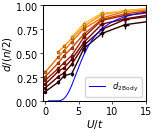

In [22]:
# nr_d_vals, nr_d_errs, nr_n_vals, nr_n_errs have values
# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsPlt = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
dvalsTheoryMin = (np.array(nvalsPlt)/2.0)**2
dvalsTheoryMax = (np.array(nvalsPlt)/2.0)
radIndStartForFit = 2

darrsPlt_vals = []
darrsPlt_errs = []
for nval in nvalsPlt:
    darrThisn_vals = []
    darrThisn_errs = []
    for ii, key in enumerate(data_sets.keys()):
        function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
        function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
        if (nval < np.max(nr_n_vals[ii][radIndStartForFit:]))& (nval > np.min(nr_n_vals[ii][radIndStartForFit:])):
            darrThisn_vals.append(function_dofn(nval))
            darrThisn_errs.append(function_dofn_err(nval))
        else :
            darrThisn_vals.append(np.nan)
            darrThisn_errs.append(np.nan)
    darrsPlt_vals.append(darrThisn_vals)
    darrsPlt_errs.append(darrThisn_errs)

# Plot things
cmapuse =  'afmhot' # 'winter'
markerMain = '.'
markerSizeMain = 6
linewidthMain = 1.0
figRescale =2.01
farRightOffset = 1.5

plt.rcParams['figure.dpi'] = 100
# fig, ax = plt.subplots(1, figsize=(2.95*figRescale, 2.75*figRescale))
fig, ax = plt.subplots(1, figsize=(1.75, 1.6))
# fig, ax = plt.subplots(1, figsize=(1.9, 1.6))
# fig, ax = plt.subplots(1, figsize=(1.5, 1.35))


for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, U_val, np.array(darrsPlt_vals[ii])/(nvalsPlt[ii]/2), xerr = U_err, yerr = np.array(darrsPlt_errs[ii])/(nvalsPlt[ii]/2), 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain/1.5, ls='-',label = "", zorder = 10)
    
# Plot molecular limit
ax.plot(EbOfU_U,dEbdUOfU, ls = '-', color = 'blue', zorder = 1000, label = '$d_{\\rm 2 \\, Body}$')

plt.xlabel("$U/t$", labelpad=1)
plt.ylabel("$d/(n/2)$", labelpad=1)
ax.set_xticks([0,5,10,15])
ax.set_xticklabels([0,5,10,15])
setlims(ax, [ -0.3,15],[0,1])

ax.legend()
# ax.legend(borderpad = 0.3, loc = 'upper left', ncol=3, columnspacing=0.55, markerscale=0.8, handlelength = 0.25, frameon=True, fontsize =6.5)

plt.tight_layout()
plt.show()
    

In [23]:
fig.savefig('Figures/VsDensity/Fig_DoublonDensityOverDensityVsUovt.png', dpi=400, bbox_inches= 'tight')

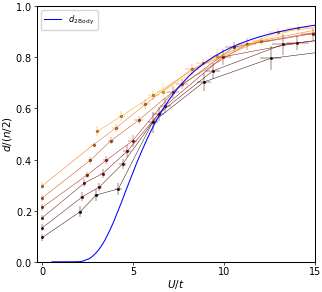

In [24]:
# nr_d_vals, nr_d_errs, nr_n_vals, nr_n_errs have values
# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsPlt = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
dvalsTheoryMin = (np.array(nvalsPlt)/2.0)**2
dvalsTheoryMax = (np.array(nvalsPlt)/2.0)
radIndStartForFit = 2

darrsPlt_vals = []
darrsPlt_errs = []
for nval in nvalsPlt:
    darrThisn_vals = []
    darrThisn_errs = []
    for ii, key in enumerate(data_sets.keys()):
        function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
        function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
        if (nval < np.max(nr_n_vals[ii][radIndStartForFit:]))& (nval > np.min(nr_n_vals[ii][radIndStartForFit:])):
            darrThisn_vals.append(function_dofn(nval))
            darrThisn_errs.append(function_dofn_err(nval))
        else :
            darrThisn_vals.append(np.nan)
            darrThisn_errs.append(np.nan)
    darrsPlt_vals.append(darrThisn_vals)
    darrsPlt_errs.append(darrThisn_errs)

# Plot things
cmapuse =  'afmhot' # 'winter'
markerMain = '.'
markerSizeMain = 6
linewidthMain = 1.0
figRescale =2.01
farRightOffset = 1.5

plt.rcParams['figure.dpi'] = 100
# fig, ax = plt.subplots(1, figsize=(2.95*figRescale, 2.75*figRescale))
fig, ax = plt.subplots(1, figsize=(1.75*2, 1.6*2))
# fig, ax = plt.subplots(1, figsize=(1.9, 1.6))
# fig, ax = plt.subplots(1, figsize=(1.5, 1.35))


for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, np.array(U_val)/(1 - nvalsPlt[ii]/2), np.array(darrsPlt_vals[ii])/(nvalsPlt[ii]/2), xerr = np.array(U_err)/(1 - nvalsPlt[ii]/2), yerr = np.array(darrsPlt_errs[ii])/(nvalsPlt[ii]/2), 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain/3, markersize=markerSizeMain/2, ls='-',label = "", zorder = 10)
    
# Plot molecular limit
ax.plot(EbOfU_U,dEbdUOfU, ls = '-', color = 'blue', zorder = 1000, label = '$d_{\\rm 2 \\, Body}$')

plt.xlabel("$U/t$", labelpad=1)
plt.ylabel("$d/(n/2)$", labelpad=1)
ax.set_xticks([0,5,10,15])
ax.set_xticklabels([0,5,10,15])
setlims(ax, [ -0.3,15],[0,1])

ax.legend()
# ax.legend(borderpad = 0.3, loc = 'upper left', ncol=3, columnspacing=0.55, markerscale=0.8, handlelength = 0.25, frameon=True, fontsize =6.5)

plt.tight_layout()
plt.show()
    

In [25]:
fig.savefig('Figures/VsDensity/Fig_DoublonDensityOverDensityVsUovt_AvailSpaceNormed.png', dpi=400, bbox_inches= 'tight')

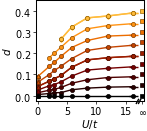

In [20]:
# nr_d_vals, nr_d_errs, nr_n_vals, nr_n_errs have values
# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsPlt = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
dvalsTheoryMin = (np.array(nvalsPlt)/2.0)**2
dvalsTheoryMax = (np.array(nvalsPlt)/2.0)
radIndStartForFit = 2

darrsPlt_vals = []
darrsPlt_errs = []
for nval in nvalsPlt:
    darrThisn_vals = []
    darrThisn_errs = []
    for ii, key in enumerate(data_sets.keys()):
        function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
        function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
        if (nval < np.max(nr_n_vals[ii][radIndStartForFit:]))& (nval > np.min(nr_n_vals[ii][radIndStartForFit:])):
            darrThisn_vals.append(function_dofn(nval))
            darrThisn_errs.append(function_dofn_err(nval))
        else :
            darrThisn_vals.append(np.nan)
            darrThisn_errs.append(np.nan)
    darrsPlt_vals.append(darrThisn_vals)
    darrsPlt_errs.append(darrThisn_errs)

# Plot things
cmapuse =  'afmhot' # 'winter'
markerMain = '.'
markerSizeMain = 6
linewidthMain = 1.0
figRescale =2.01
farRightOffset = 1.5

plt.rcParams['figure.dpi'] = 100
# fig, ax = plt.subplots(1, figsize=(2.95*figRescale, 2.75*figRescale))
fig, ax = plt.subplots(1, figsize=(1.75, 1.6))
# fig, ax = plt.subplots(1, figsize=(1.9, 1.6))
# fig, ax = plt.subplots(1, figsize=(1.5, 1.35))


for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, U_val, darrsPlt_vals[ii], xerr = U_err, yerr = darrsPlt_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-',label = "")
    terrbar(ax, [np.max(U_val)+farRightOffset], [dvalsTheoryMax[ii]],  
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='', markersize=2.5, label = "")
    if (ii == 0) or  (ii == 4) or  (ii == 8)  :
        terrbar(ax, U_val, darrsPlt_vals[ii], xerr = U_err, yerr = darrsPlt_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-',label = "$n$="+str(nvalsPlt[ii]))
    if nvalsPlt[ii] < 0.61:
        terrbar(ax, [np.min(U_val)], [dvalsTheoryMin[ii]],  
                colorfrac=colorfracuse, cmap=cmapuse, marker = '^', ls='',label = "")
terrbar(ax, U_val, [0]*len(U_val), xerr = U_err, 
            colorfrac=0, cmap=cmapuse, marker = markerMain,linewidth = linewidthMain, markersize=markerSizeMain,  ls='-',label = "")

# labOffset = 2
# ax.annotate('$n=0.0$', xy = (np.max(U_val)+labOffset,dvalsTheoryMax[0]), textcoords='data', horizontalalignment = 'left', verticalalignment = 'center')
# ax.annotate('$n=0.2$', xy = (np.max(U_val)+labOffset,dvalsTheoryMax[2]), textcoords='data', horizontalalignment = 'left', verticalalignment = 'center')
# ax.annotate('$n=0.4$', xy = (np.max(U_val)+labOffset,dvalsTheoryMax[4]), textcoords='data', horizontalalignment = 'left', verticalalignment = 'center')
# ax.annotate('$n=0.6$', xy = (np.max(U_val)+labOffset,dvalsTheoryMax[6]), textcoords='data', horizontalalignment = 'left', verticalalignment = 'center')
# ax.annotate('$n=0.8$', xy = (np.max(U_val)+labOffset,dvalsTheoryMax[8]), textcoords='data', horizontalalignment = 'left', verticalalignment = 'center')

plt.xlabel("$U/t$", labelpad=1)
plt.ylabel("$d$", labelpad=1)
ax.set_xticks([0,5,10,15,np.max(U_val)+farRightOffset])
ax.set_xticklabels([0,5,10,15, '$\\infty$'])
setlims(ax, [ -0.3,np.max(U_val)+farRightOffset + 0.3 ],[-0.025,0.45])

# ax.legend(borderpad = 0.3, loc = 'upper left', ncol=3, columnspacing=0.55, markerscale=0.8, handlelength = 0.25, frameon=True, fontsize =6.5)


d = .01 # how big to make the diagonal lines in axes coordinates
yoff = -0.005
xoff = 0.94
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth = 1)
ax.plot((xoff -d,xoff +d), (-2*d + yoff ,+2*d + yoff ), **kwargs)
ax.plot((xoff -d+2*d,xoff +d+2*d), (-2*d + yoff ,+2*d + yoff ), **kwargs)
# ax.plot((xoff -d,xoff +d),(xoff -d,xoff +d), **kwargs)

plt.tight_layout()
plt.show()
    

In [29]:
dataDir= 'Figures/CSVSavedData'
for ii in range(len(nvalsPlt)):
    if ii > 0:
        fnameSave = 'Fig1b_n='+str(nvalsPlt[ii])+'.csv'
        print(fnameSave)
        colorfracuse = nvalsPlt[ii]/1.3
        terrbar(ax, U_val, darrsPlt_vals[ii], xerr = U_err, yerr = darrsPlt_errs[ii], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-',label = "")

        xvals, yvals, xerr, yerr = np.array([U_val, darrsPlt_vals[ii],  U_err, darrsPlt_errs[ii]])
        print(xvals, yvals, xerr, yerr)
    np.savetxt(os.path.join(dataDir,fnameSave), (xvals, yvals, xerr, yerr), delimiter=',', fmt='%1.6f')


Fig1b_n=0.1.csv
[16.27 11.93  8.44  5.76  3.97  2.82  1.97  0.  ] [0.04180673 0.03975646 0.03514598 0.02726984 0.01425243 0.01308039
 0.00978353 0.00477677] [0.72 0.53 0.38 0.26 0.18 0.13 0.09 0.  ] [0.0026275  0.00233294 0.00167306 0.00207393 0.00125883 0.00112643
 0.00107011 0.00069184]
Fig1b_n=0.2.csv
[16.27 11.93  8.44  5.76  3.97  2.82  1.97  0.  ] [0.08870744 0.08502035 0.07460699 0.05788645 0.03824549 0.02924908
 0.02538671 0.01336295] [0.72 0.53 0.38 0.26 0.18 0.13 0.09 0.  ] [0.00463007 0.00405755 0.00322149 0.00280473 0.00178326 0.00166538
 0.00176263 0.00134724]
Fig1b_n=0.3.csv
[16.27 11.93  8.44  5.76  3.97  2.82  1.97  0.  ] [0.13573245 0.12836846 0.12017253 0.09160882 0.06485311 0.05177088
 0.04625782 0.02599056] [0.72 0.53 0.38 0.26 0.18 0.13 0.09 0.  ] [0.00494751 0.00420263 0.00454493 0.00427914 0.00349574 0.00241157
 0.00230795 0.00167814]
Fig1b_n=0.4.csv
[16.27 11.93  8.44  5.76  3.97  2.82  1.97  0.  ] [0.18515664 0.17840758 0.16807153 0.13299074 0.09457049 0.079584

In [27]:
fig.savefig('Figures/VsDensity/Fig_DoublonDensityVsUovt.png', dpi=400, bbox_inches= 'tight')

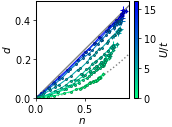

In [28]:
color_nn = 0
color_ss = 6
marker_1 = 'o'
marker_2 = 's'
marker_3 = '^'
ls_plt = 'dotted'

plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1,  figsize=(2.0, 1.6))

cmapuse = 'winter' # 'copper'

# Doublon density vs total density
minRadPlt = 2
maxRadPlt = 30
testDen = np.linspace(0,1,100)
testDenOv2 = testDen/2
testDoubDenNonInt=testDenOv2**2
for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    colorfracuse = float((np.max(U_val)-U_val[ii])/np.ptp(U_val))
    terrbar(ax, nr_n_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_n_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '.', ls='-',label = "$U/t$="+str(U_val[ii]))
jplot(ax, testDen, testDenOv2, ls='-', lw=1., color='0.5')
jplot(ax, testDen, testDoubDenNonInt, ls='dotted', lw=1., color='0.5')

setlabels(ax, ['$n$', '$d$'])
setlims(ax, [0,0.95],[0,0.5])
# ax.legend()


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
norm = mpl.colors.Normalize(vmin=np.min(U_val), vmax=np.max(U_val))

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse+'_r'),
                                norm=norm,
                                orientation='vertical')

cb1.set_label('$U/t$')
# cb1.ax.set_title('$U/t$')

plt.tight_layout()
plt.show()

In [29]:
fig.savefig('Figures/VsDensity/Fig_DoublonDensityVsDensity.png', dpi=400, bbox_inches='tight')

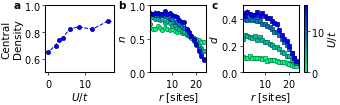

In [21]:
fig, ax = plt.subplots(1,3, figsize=(3.5, 0.8),gridspec_kw={'width_ratios': [0.8,1,1]})

scalelocofax(ax[1],0.65,1,0.1,0)
scalelocofax(ax[2],0.75,1,-0.15,0)


cmapuse = 'winter' # 'copper'

# Doublon density vs total density
minRadPlt = 1
maxRadPlt = 24

iiValsPlt = [7,4,2,0] 

for ii in iiValsPlt:
    colorfracuse = float((np.max(U_val)-U_val[ii])/np.ptp(U_val))
    terrbar(ax[1], nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ls='-',label = "")
setlabels(ax[1], ['$r$ [sites]', '$n$'])
setlims(ax[1], [minRadPlt,maxRadPlt],[0,1])

for ii in iiValsPlt:
    colorfracuse = float((np.max(U_val)-U_val[ii])/np.ptp(U_val))
    terrbar(ax[2], nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='-',label = "")
setlabels(ax[2], ['$r$ [sites]', '$d$'])
setlims(ax[2], [minRadPlt,maxRadPlt],[0,0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
norm = mpl.colors.Normalize(vmin=np.min(U_val), vmax=np.max(U_val))
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse+'_r'),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


terrbar(ax[0], U_val,ntot_vals, xerr = U_err, yerr = ntot_errs, 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ls='dashed',label = "")
setlabels(ax[0], ['$U/t$', 'Central\nDensity'])
setlims(ax[0], None,[0.5,1])


################################
# Add abc labels
labelsAxArr = [ax[0], ax[1], ax[2]]
labelsPlots = ['a', 'b', 'c']
labelsXoffsets = [-0.25,-0.25, -0.25]
labelsYoffsets = [-0.05,-0.05,-0.05]
for labelInd, ax in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')


# plt.tight_layout()
plt.show()

In [22]:
fig.savefig('Figures/VsDensity/Fig_DensityVsRadius.png', dpi=400, bbox_inches='tight')

/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


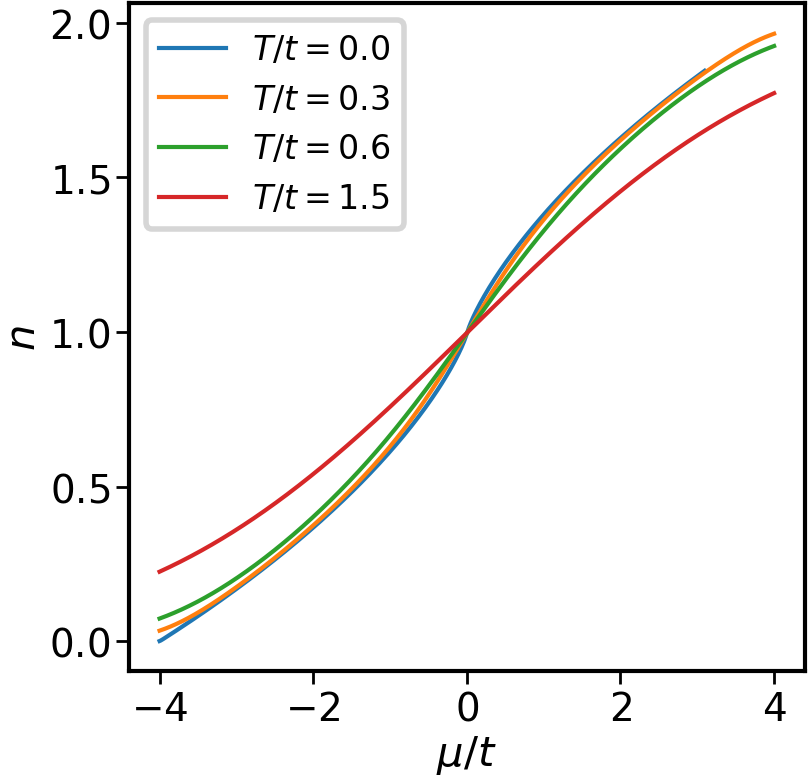

In [83]:
# finite temp eresults
# Define energy spectrum of single particles and get Fermi energy 

numHalfKSpace = 200 # number of grid points from 0 to pi in momentum space 
kxgrid, kygrid = np.meshgrid(np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)), np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)))
numStates = np.sum(np.ones(kxgrid.shape))
ekgrid = (-2*np.cos(kxgrid)+ -2*np.cos(kygrid))
kAmpgrid = np.sqrt(kxgrid**2 + kygrid**2)

def FH_get_n_vsmu_finiteTemp(_Tempdesired):    
    MuTestVals = np.linspace(-4,4,1000)
    natekTestVals = np.linspace(0,1,1000)
    
    natMuTestVals = 2.0*np.array([(1.0/numStates)*np.sum(np.exp(-(ekgrid-MuTestVal)/_Tempdesired)/(1+np.exp(-(ekgrid-MuTestVal)/_Tempdesired))) for MuTestVal in MuTestVals])
    
    return natMuTestVals, MuTestVals # Report the normalized Fermi Energy at a given single particle density 


_ns0, _mus0 = FH_get_n_vsmu_finiteTemp(0.01)
_ns1, _mus1 = FH_get_n_vsmu_finiteTemp(0.3)
_ns2, _mus2 = FH_get_n_vsmu_finiteTemp(0.6)
_ns3, _mus3 = FH_get_n_vsmu_finiteTemp(1.5)

fig, axs = plt.subplots(1, figsize=(2,2))
axs.set_xlabel('$\\mu/t$')
axs.set_ylabel('$n$')

plt.plot(_mus0,_ns0, label = '$T/t=0.0$')
plt.plot(_mus1,_ns1, label = '$T/t=0.3$')
plt.plot(_mus2,_ns2, label = '$T/t=0.6$')
plt.plot(_mus3,_ns3, label = '$T/t=1.5$')
axs.legend()
plt.show()

fig.savefig('Figures/DensitiesVsMu/Fig_NonInt_nvsMu.png', dpi=400, bbox_inches='tight', transparent = False)


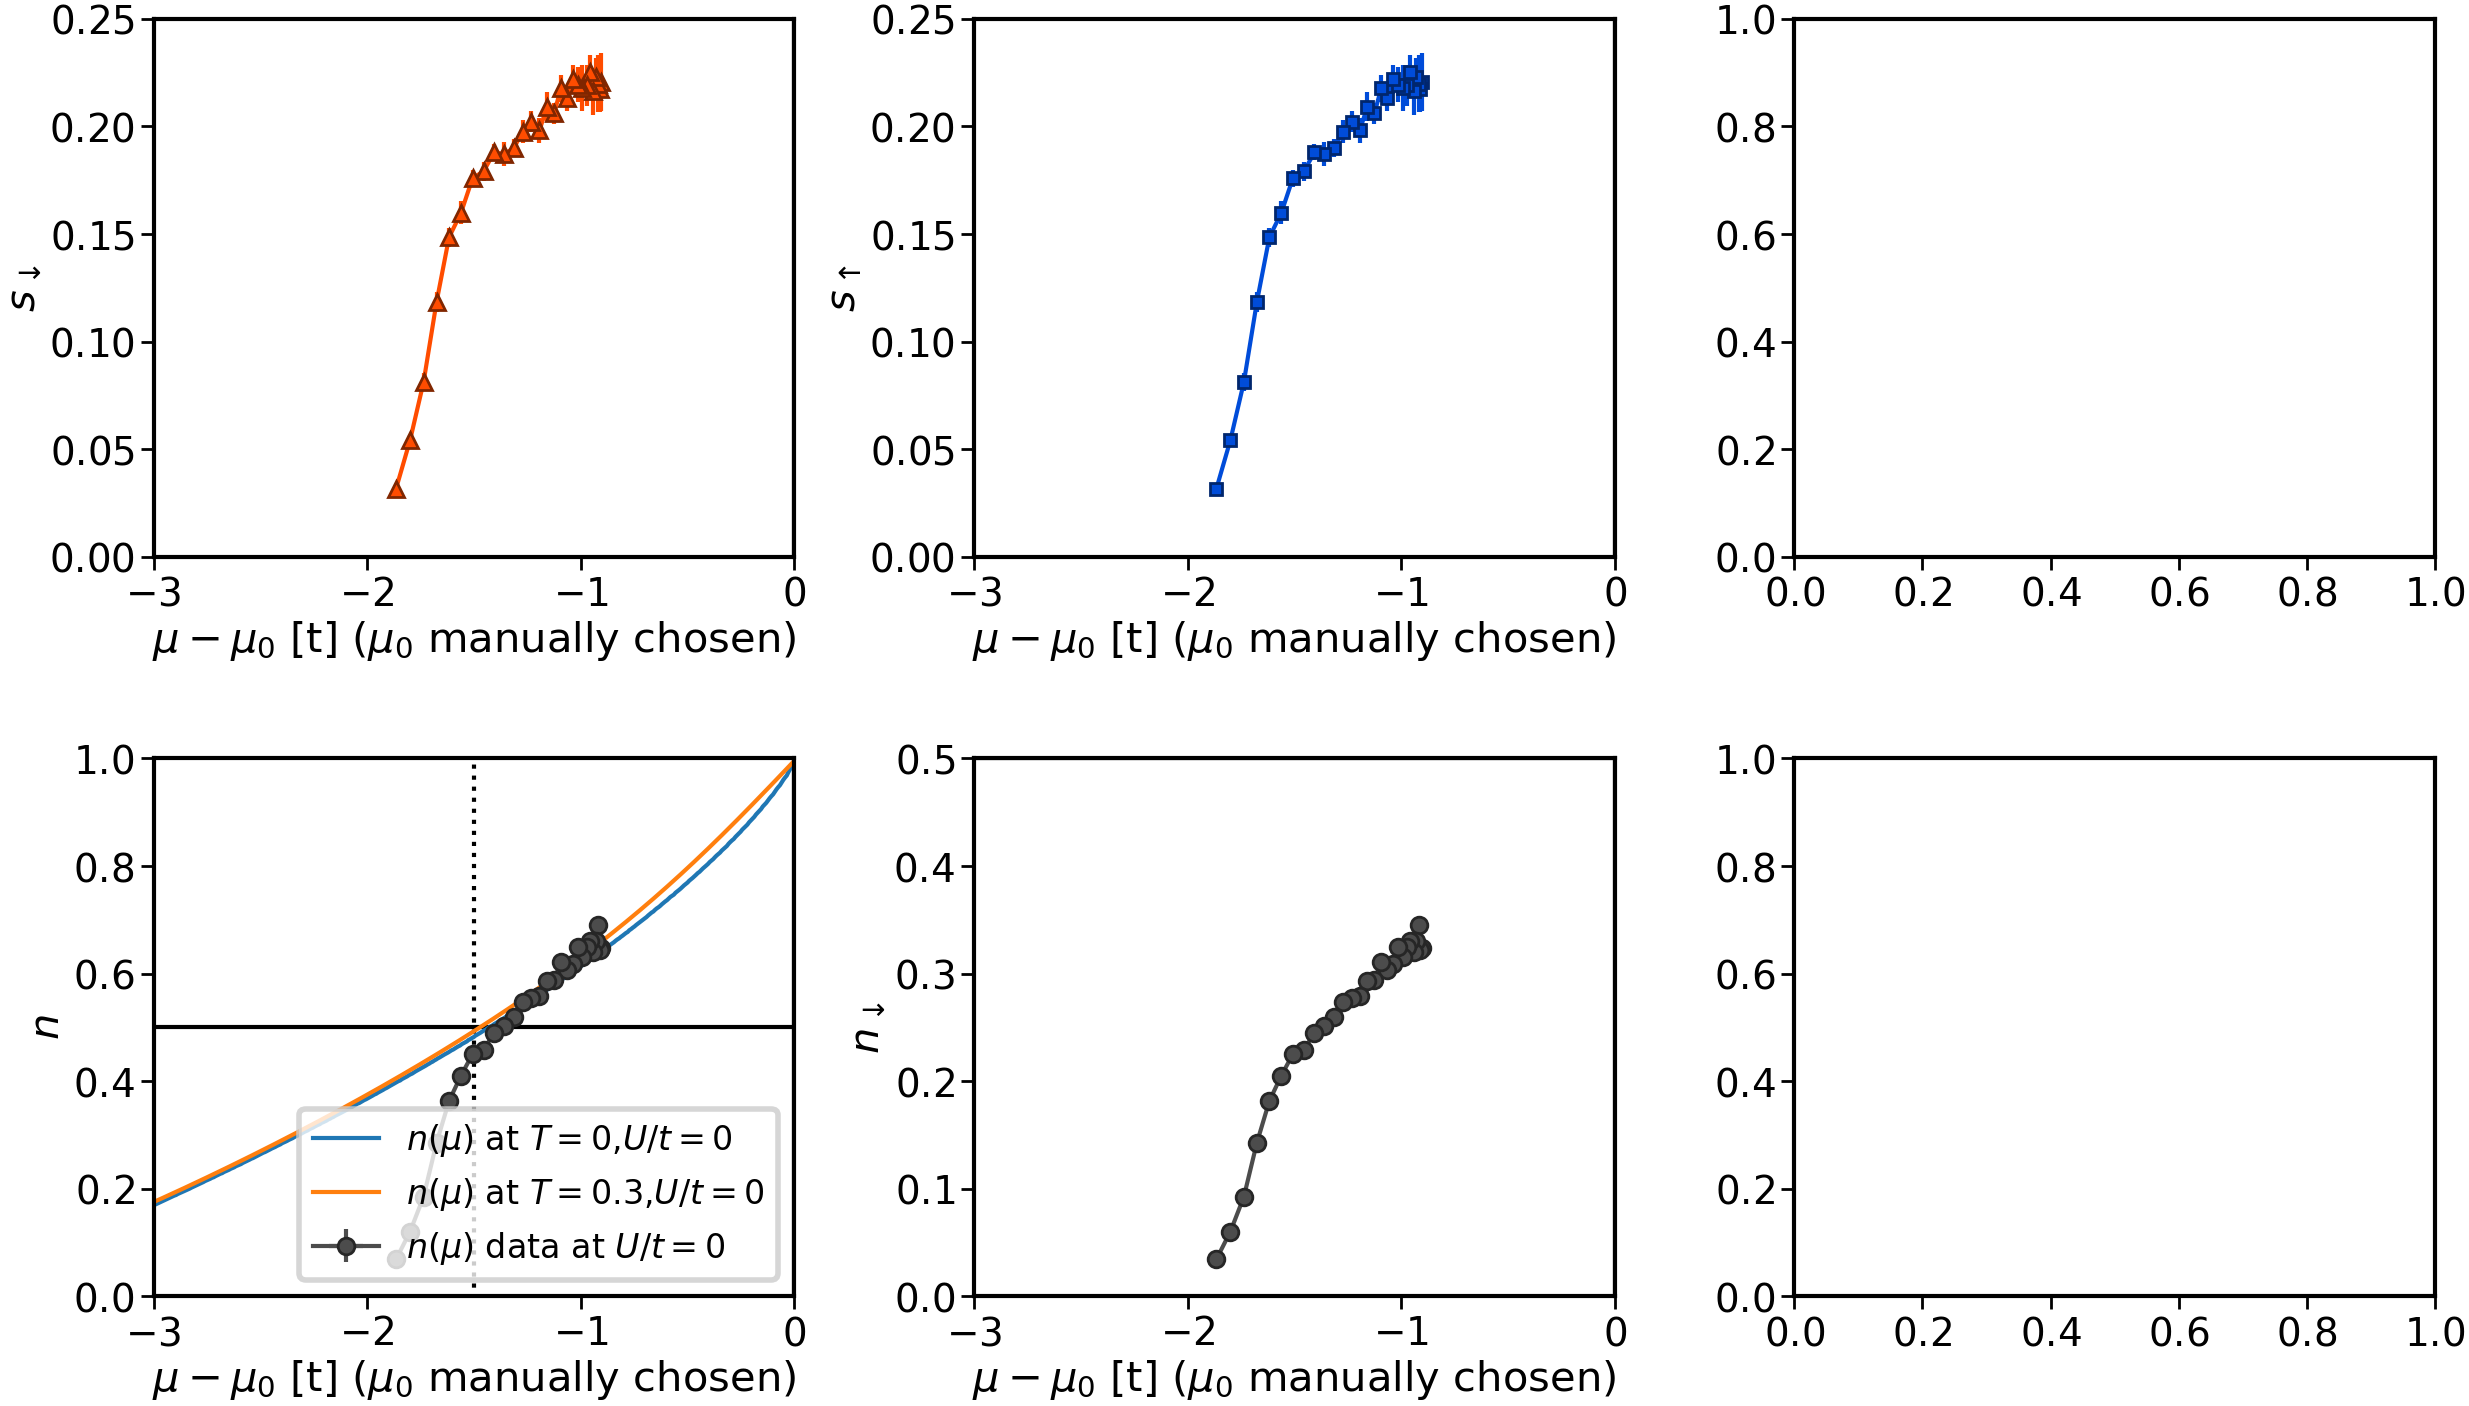

In [81]:
delocfrac_dn_vals = nr_s_dn_vals/nr_dn_vals
delocfrac_dn_errs = np.abs(nr_s_dn_vals/nr_dn_vals)*np.sqrt((nr_s_dn_errs/nr_s_dn_vals)**2 + (nr_dn_errs/nr_dn_vals)**2)


# Plot some radial data
plt.rcParams['figure.dpi'] = 400
ax_size = 2.25
ax_heightRatio = 1
fig, axs = plt.subplots(2, 3, figsize=(ax_size*(3), ax_size*ax_heightRatio*1.7))

uuUse = 1
iiUse1 = 0
iiUse2 = 3

muOffset = -0.9
pltRadMin = 2
pltRadMax = 30
xlab = '$\mu - \mu_0$ [t] ($\\mu_0$ manually chosen)'
titletextsize = 8
pltMuMin=-3

hollowUse = False
for iiUse in [7]:
    pltlims = [0, 0.25]
    ylab = '$s_\\downarrow$'
    axInd = 0
    axInd2 = 0
    terrbar(axs[axInd,axInd2],muOffset-nr_v_vals[iiUse][pltRadMin:pltRadMax],nr_s_dn_vals[iiUse][pltRadMin:pltRadMax],  yerr=nr_s_dn_errs[iiUse][pltRadMin:pltRadMax], 
            ls = '-', marker = '^', cmap = 'autumn', colorfrac = 0.3, label ='$s_\\downarrow$', hollow = hollowUse)
#     axs[axInd,axInd2].legend()
    axs[axInd,axInd2].hlines(0.5,-10,10)
    axs[axInd,axInd2].vlines(0,-10,10)
    axs[axInd,axInd2].set_xlabel(xlab)
    axs[axInd,axInd2].set_ylabel(ylab)
#     axs[axInd,axInd2].set_title(axTitle, size = titletextsize)
    setlims(axs[axInd,axInd2],[pltMuMin,0.0], pltlims)

    pltlims = [0, 0.25]
    ylab = '$s_\\uparrow$'
    axInd = 0
    axInd2 = 1
#     axTitle = 'Central $m=$' + str(round(n_sz_vals[iiUse],2))
    terrbar(axs[axInd,axInd2],muOffset-nr_v_vals[iiUse][pltRadMin:pltRadMax],nr_s_up_vals[iiUse][pltRadMin:pltRadMax],  yerr=nr_s_up_errs[iiUse][pltRadMin:pltRadMax], 
            ls = '-', marker = 's', cmap = 'winter', colorfrac = 0.3, label ='$s_\\uparrow$', ms = 2, zorder = 100, hollow = hollowUse)
#     axs[axInd,axInd2].legend()
    axs[axInd,axInd2].hlines(0.5,-10,10)
    axs[axInd,axInd2].vlines(0,-10,10)
    axs[axInd,axInd2].set_xlabel(xlab)
    axs[axInd,axInd2].set_ylabel(ylab)
#     axs[axInd,axInd2].set_title(axTitle, size = titletextsize)
    setlims(axs[axInd,axInd2],[pltMuMin,0.0], pltlims)

    pltlims = [0, 1]
    ylab = '$n$'
    axInd = 1
    axInd2 = 0
#     axTitle = 'Central $m=$' + str(round(n_sz_vals[iiUse],2))
    terrbar(axs[axInd,axInd2],muOffset-nr_v_vals[iiUse][pltRadMin:pltRadMax],nr_up_vals[iiUse][pltRadMin:pltRadMax]+nr_dn_vals[iiUse][pltRadMin:pltRadMax],  
            yerr=np.sqrt(nr_up_errs[iiUse][pltRadMin:pltRadMax]**2 + nr_dn_errs[iiUse][pltRadMin:pltRadMax]**2), 
            ls = '-', marker = 'o', cmap = 'gray', colorfrac = 0.3, label ='$n(\\mu)$ data at $U/t=0$', hollow = hollowUse)
    axs[axInd,axInd2].plot(e2speciesFH_FS-4,n2speciesFH_FS, label = '$n(\\mu)$ at $T=0$,$U/t=0$') # noninteracting analytic result
    axs[axInd,axInd2].plot(_mus1,_ns1, label = '$n(\\mu)$ at $T=0.3$,$U/t=0$') # noninteracting analytic result
    axs[axInd,axInd2].legend()
    axs[axInd,axInd2].hlines(0.5,-10,10)
    axs[axInd,axInd2].vlines(0,-10,10)
    
    axs[axInd,axInd2].vlines(-1.5,-10,10, ls='dotted')
    axs[axInd,axInd2].set_xlabel(xlab)
    axs[axInd,axInd2].set_ylabel(ylab)
#     axs[axInd,axInd2].set_title(axTitle, size = titletextsize)
    setlims(axs[axInd,axInd2],[pltMuMin,0.0], pltlims)

   
    
    pltlims = [0, 0.5]
    ylab = '$n_\\downarrow$'
    axInd = 1
    axInd2 = 1
#     axTitle = 'Central $m=$' + str(round(n_sz_vals[iiUse],2))
    terrbar(axs[axInd,axInd2],muOffset-nr_v_vals[iiUse][pltRadMin:pltRadMax],nr_dn_vals[iiUse][pltRadMin:pltRadMax],  yerr=nr_dn_errs[iiUse][pltRadMin:pltRadMax], 
            ls = '-', marker = 'o', cmap = 'gray', colorfrac = 0.3, label ='$n_\\downarrow$', hollow = hollowUse)
#     axs[axInd,axInd2].legend()
    axs[axInd,axInd2].hlines(0.5,-10,10)
    axs[axInd,axInd2].vlines(0,-10,10)
    axs[axInd,axInd2].set_xlabel(xlab)
    axs[axInd,axInd2].set_ylabel(ylab)
#     axs[axInd,axInd2].set_title(axTitle, size = titletextsize)
    setlims(axs[axInd,axInd2],[pltMuMin,0.0], pltlims)


plt.subplots_adjust(wspace= 0.28)

plt.show()

# fig.savefig('Figures/DensitiesVsRadius/Fig_DensitiesVsMu_' + 'Uovert='+str(round(uuUVals[0],2)) +'.png', dpi=400, bbox_inches='tight', transparent = True)


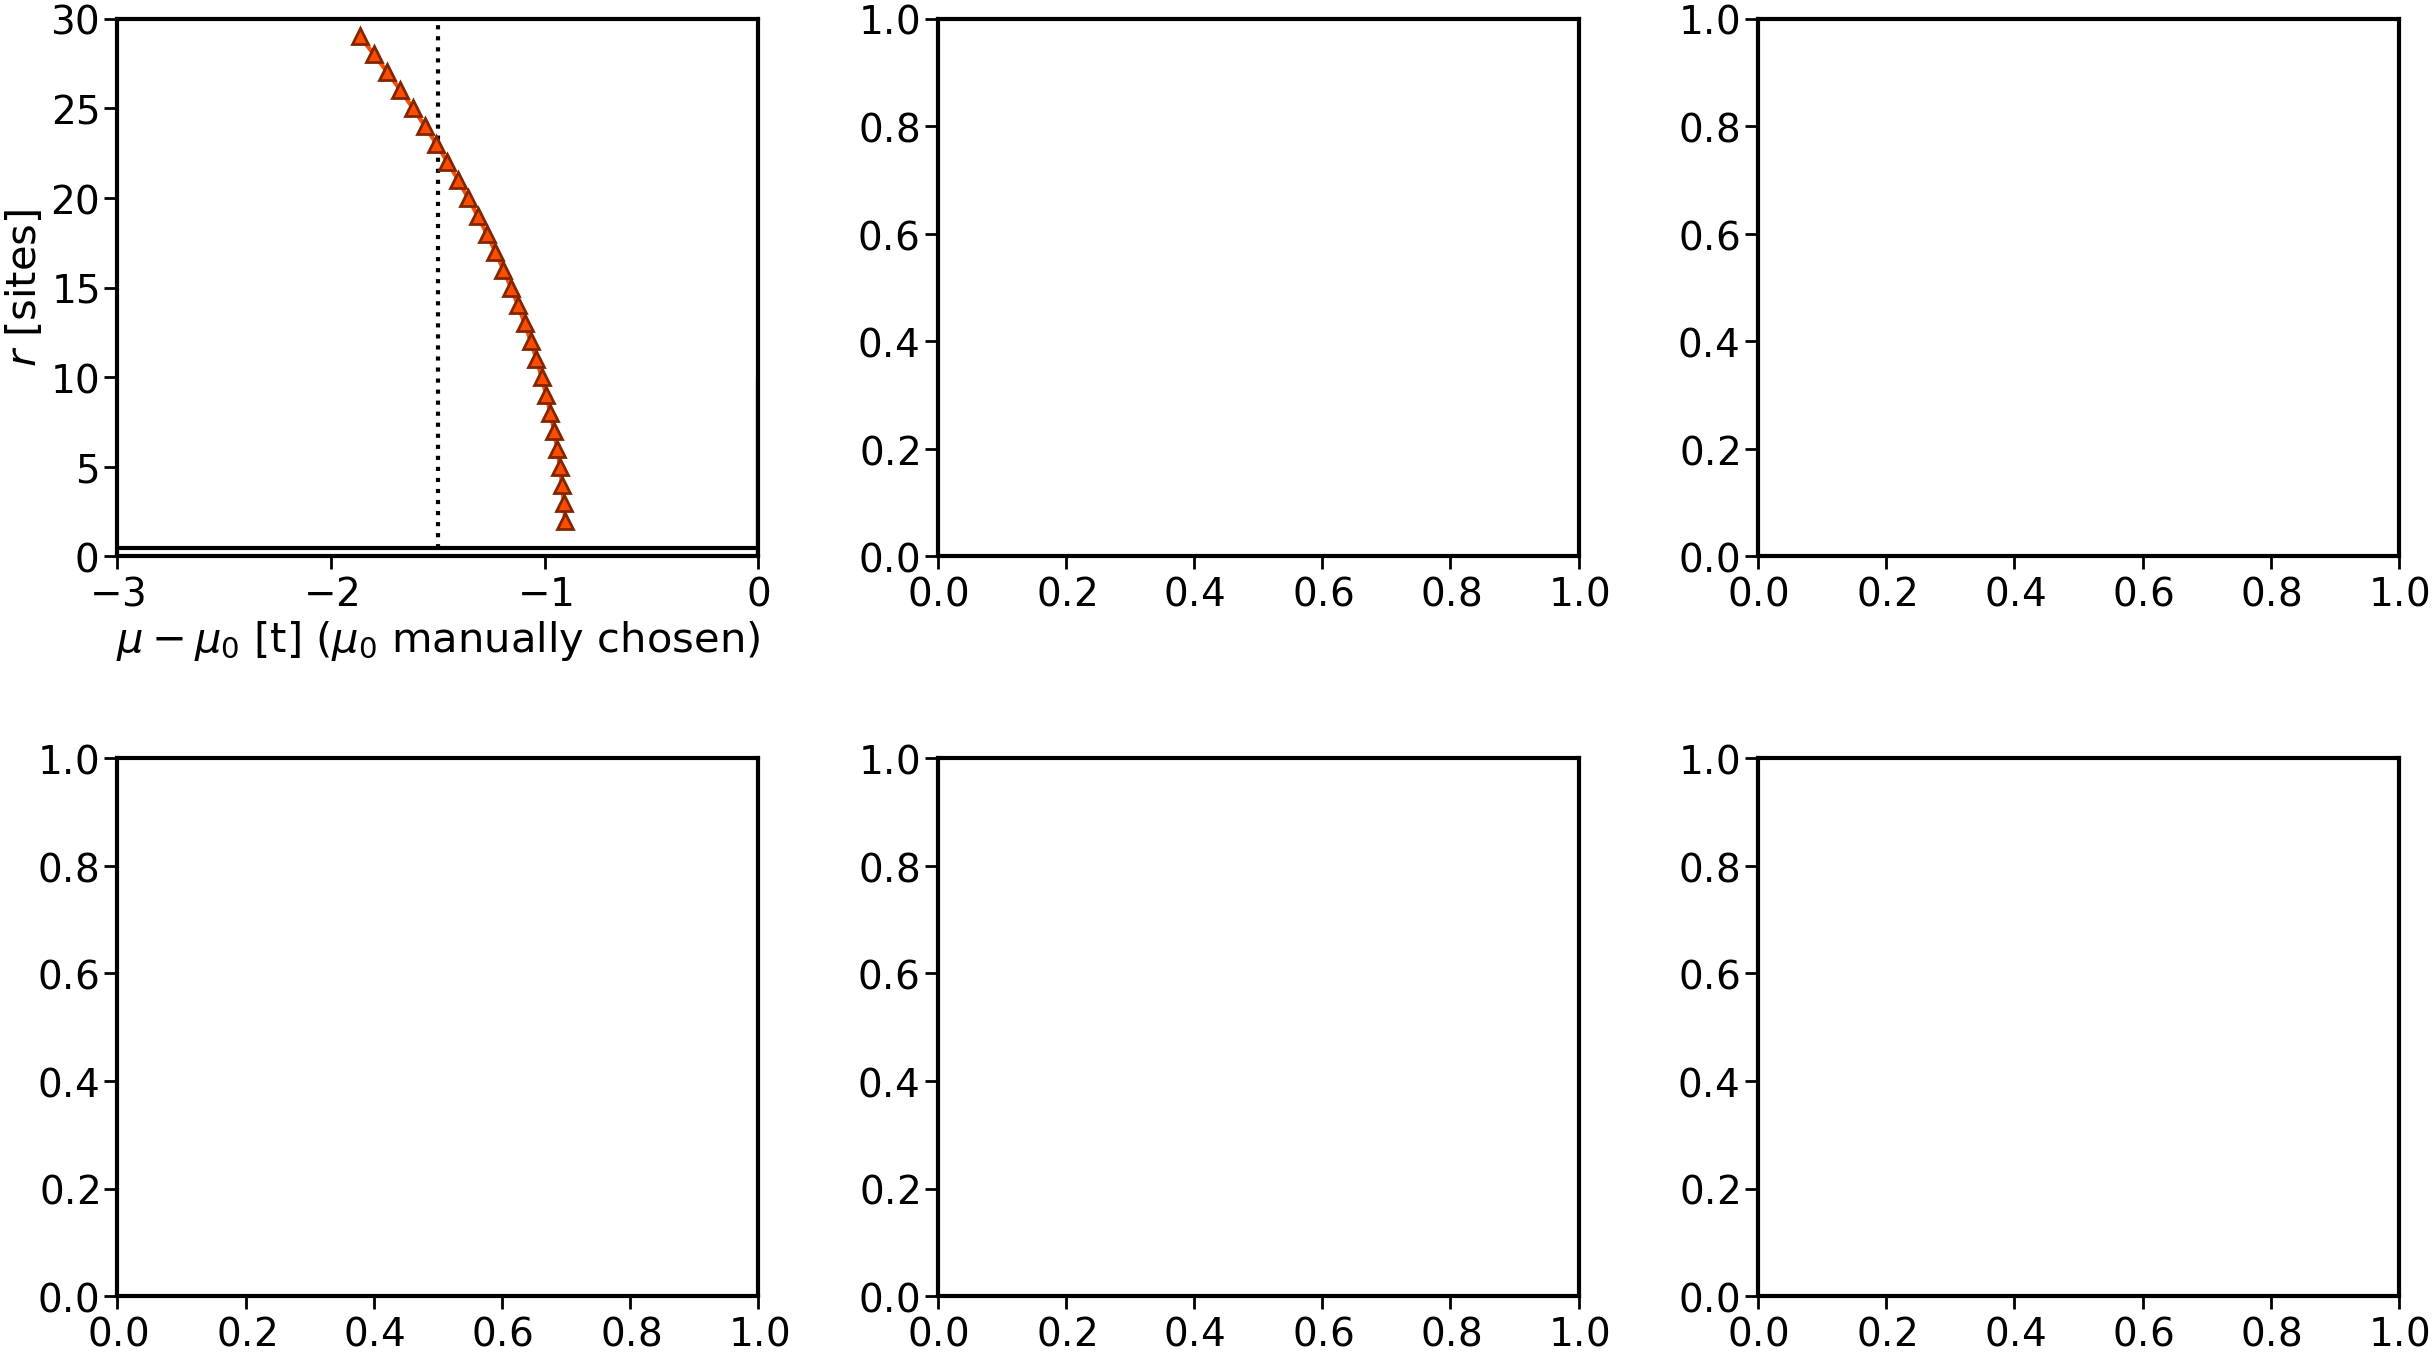

In [68]:
delocfrac_dn_vals = nr_s_dn_vals/nr_dn_vals
delocfrac_dn_errs = np.abs(nr_s_dn_vals/nr_dn_vals)*np.sqrt((nr_s_dn_errs/nr_s_dn_vals)**2 + (nr_dn_errs/nr_dn_vals)**2)


# Plot some radial data
plt.rcParams['figure.dpi'] = 400
ax_size = 2.25
ax_heightRatio = 1
fig, axs = plt.subplots(2, 3, figsize=(ax_size*(3), ax_size*ax_heightRatio*1.7))

uuUse = 1
iiUse1 = 0
iiUse2 = 3

muOffset = -0.9
pltRadMin = 2
pltRadMax = 30
xlab = '$\mu - \mu_0$ [t] ($\\mu_0$ manually chosen)'
titletextsize = 8
pltMuMin=-3

hollowUse = False
for iiUse in [7]:
    pltlims = [0, 30]
    ylab = '$r$ [sites]'
    axInd = 0
    axInd2 = 0
    terrbar(axs[axInd,axInd2],muOffset-nr_v_vals[iiUse][pltRadMin:pltRadMax],nr_r_vals[iiUse][pltRadMin:pltRadMax],  
            ls = '-', marker = '^', cmap = 'autumn', colorfrac = 0.3, label ='$s_\\downarrow$', hollow = hollowUse)
#     axs[axInd,axInd2].legend()
    axs[axInd,axInd2].hlines(0.5,-10,10)
    axs[axInd,axInd2].vlines(0,-10,10)
    axs[axInd,axInd2].vlines(-1.5,-10,50, ls='dotted')
    axs[axInd,axInd2].set_xlabel(xlab)
    axs[axInd,axInd2].set_ylabel(ylab)
#     axs[axInd,axInd2].set_title(axTitle, size = titletextsize)
    setlims(axs[axInd,axInd2],[pltMuMin,0.0], pltlims)

plt.subplots_adjust(wspace= 0.28)

plt.show()

# fig.savefig('Figures/DensitiesVsRadius/Fig_DensitiesVsMu_' + 'Uovert='+str(round(uuUVals[0],2)) +'.png', dpi=400, bbox_inches='tight', transparent = True)


/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


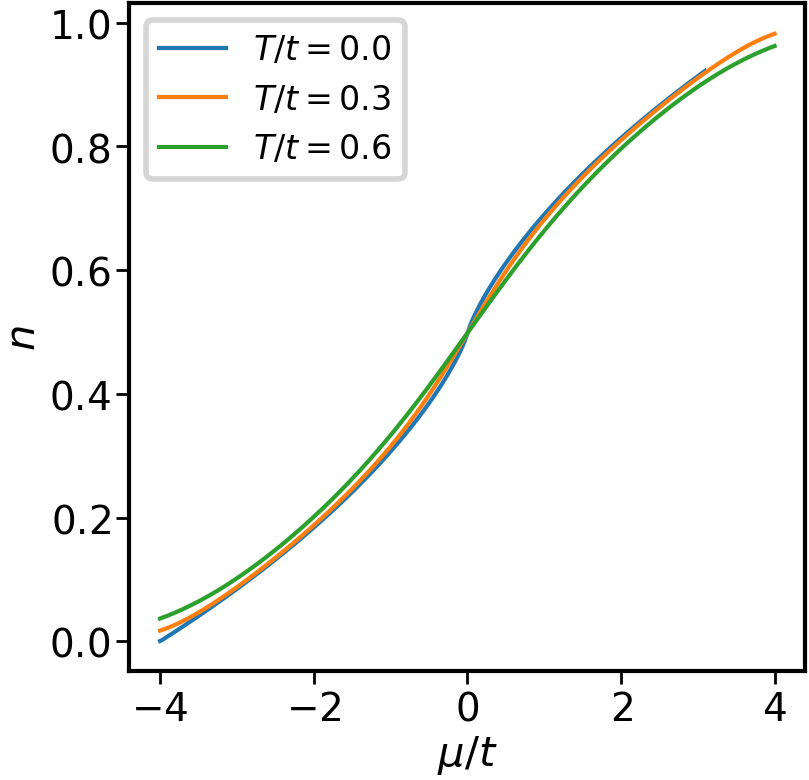

In [77]:
# finite temp eresults
# Define energy spectrum of single particles and get Fermi energy 

numHalfKSpace = 200 # number of grid points from 0 to pi in momentum space 
kxgrid, kygrid = np.meshgrid(np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)), np.linspace(-np.pi, np.pi, (2*numHalfKSpace + 1)))
numStates = np.sum(np.ones(kxgrid.shape))
ekgrid = (-2*np.cos(kxgrid)+ -2*np.cos(kygrid))
kAmpgrid = np.sqrt(kxgrid**2 + kygrid**2)

def FH_get_n_vsmu_finiteTemp(_Tempdesired):    
    MuTestVals = np.linspace(-4,4,1000)
    natekTestVals = np.linspace(0,1,1000)
    
    natMuTestVals = np.array([(1.0/numStates)*np.sum(np.exp(-(ekgrid-MuTestVal)/_Tempdesired)/(1+np.exp(-(ekgrid-MuTestVal)/_Tempdesired))) for MuTestVal in MuTestVals])
    
    return natMuTestVals, MuTestVals # Report the normalized Fermi Energy at a given single particle density 


_ns0, _mus0 = FH_get_n_vsmu_finiteTemp(0.01)
_ns1, _mus1 = FH_get_n_vsmu_finiteTemp(0.3)
_ns2, _mus2 = FH_get_n_vsmu_finiteTemp(0.6)

fig, axs = plt.subplots(1, figsize=(2,2))
axs.set_xlabel('$\\mu/t$')
axs.set_ylabel('$n$')

plt.plot(_mus0,_ns0, label = '$T/t=0.0$')
plt.plot(_mus1,_ns1, label = '$T/t=0.3$')
plt.plot(_mus2,_ns2, label = '$T/t=0.6$')
axs.legend()
plt.show()

fig.savefig('Figures/DensitiesVsMu/Fig_NonInt_nvsMu.png', dpi=400, bbox_inches='tight', transparent = False)


## Decay vs distance

In [ ]:
# Get fit error

# Make start index for fit different - doesn't help 

Fit form: amp*e^(-(x-1)/scaleLength)


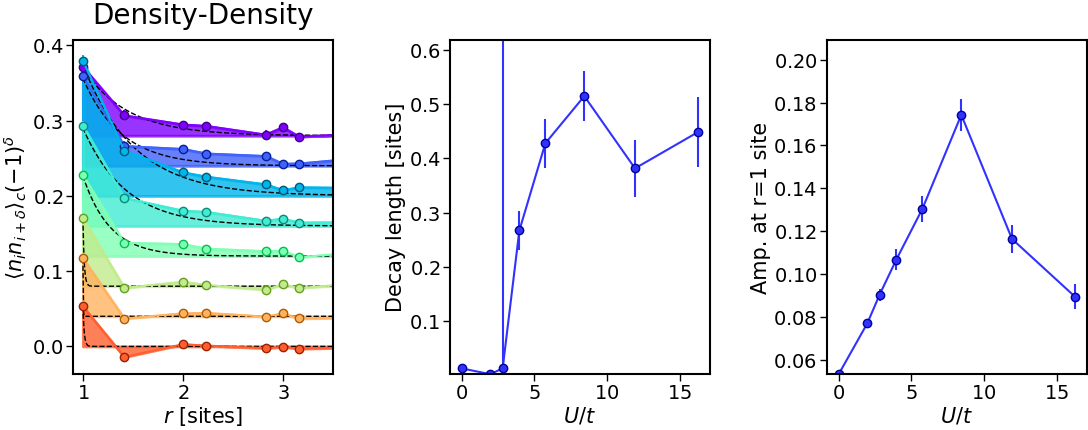

In [47]:
fig, ax = plt.subplots(1,3, figsize=(6, 2))
plt.rcParams['figure.dpi'] = 200

cmapuse =  'rainbow' # 'gnuplot2' # 'copper'
whichFitParamIndex = 0

iiValsPlt = [7,6,5,4,3,2,1,0]
alphaFill = 0.8
rMaxPlt=3.5

def fitform(x, scaleLength, amp):
    return 1.*amp*np.exp(-(x-1)/scaleLength)
globFitGuess= [0.5,0.5]
paramsLabels = ['Decay length [sites]', 'Amp. at r=1 site']

print('Fit form: amp*e^(-(x-1)/scaleLength)')

fitparms0 = []
fitparms1 = []
fitparms0_err = []
fitparms1_err = []
fitparms_Uvals = []

xvals_arr = rr_val
startIndForFit = 1 # 1 starts at nearest neighbor included 

yvals_arr = (c_nn_vsRadWithoutDegen_vals)
yerrs_arr = (c_nn_vsRadWithoutDegen_errs)
rr_rectifier_use = rr_rectifier # np.ones(len(rr_rectifier)) # rr_rectifier
corrYlab = '$\\langle n_i n_{i+\delta} \\rangle_c (-1)^\\delta$'
pltTitle = 'Density-Density'

scaleUpDn = -0.04
scaleLeRi = 0.0
overallUpDnOffset = np.abs(7*scaleUpDn )

axInd1 = 0; 
for ii in reversed(iiValsPlt):
    colorfracuse = float(ii/len(iiValsPlt))
    
    xvals = xvals_arr[startIndForFit:]
    yvals = rr_rectifier_use[startIndForFit:]*yvals_arr[ii][startIndForFit:]
    yerrs = yerrs_arr[ii][startIndForFit:]
    guesses = globFitGuess
    popt, pcov = fit(xvals, yvals, fitform, guesses=guesses)
    
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=200)
    jplot(ax[axInd1], ii*scaleLeRi+xfit, overallUpDnOffset+ii*scaleUpDn+yfit,  ls='--', lw=.5,color='0.0')
    perr = np.sqrt(np.diag(pcov))
    
    fitparms0.append(popt[0])
    fitparms1.append(popt[1])
    fitparms0_err.append(perr[0])
    fitparms1_err.append(perr[1])
    fitparms_Uvals.append(U_val[ii])
    
    terrbar(ax[axInd1], ii*scaleLeRi+xvals_arr[1:], overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:], yerr=yerrs_arr[ii][1:], ls='-', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    ax[axInd1].fill_between(ii*scaleLeRi+xvals_arr[1:], [overallUpDnOffset+ii*scaleUpDn+0]*len(xvals_arr[1:]), overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:],
                            color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = alphaFill)
setlabels(ax[axInd1], ['$r$ [sites]', corrYlab])
ax[axInd1].set_title(pltTitle)
ax[axInd1].set_xticks([1,2,3,4,5])
setlims(ax[axInd1], [1-0.1, rMaxPlt], None)

axInd1 = 1; 
yaxTitle =  paramsLabels[0]
terrbar(ax[axInd1], fitparms_Uvals, fitparms0, yerr=fitparms0_err, marker='o', ls='-', cmap = 'bwr', colorfrac = 0.1)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [np.min( np.abs(fitparms0)),1.2*np.max( np.abs(fitparms0))])

axInd1=2;
yaxTitle =paramsLabels[1]
terrbar(ax[axInd1], fitparms_Uvals, fitparms1, yerr=fitparms1_err, marker='o', ls='-', cmap = 'bwr', colorfrac = 0.1)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [np.min( np.abs(fitparms1)),1.2*np.max( np.abs(fitparms1))])

fig.subplots_adjust(wspace=0.45)
plt.show()

fig.savefig('Figures/CorrelatorsVsRadius/Fig_v2_CorrVsRadius_Exponential_' + pltTitle +'.png', dpi=400, bbox_inches='tight')

Fit form: amp*e^(-(x-1)/scaleLength)


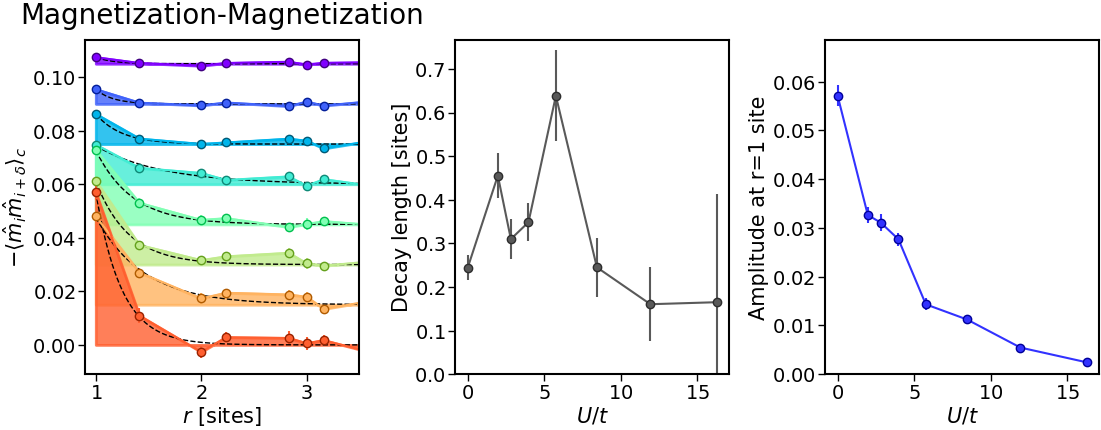

In [31]:
fig, ax = plt.subplots(1,3, figsize=(6, 2))
plt.rcParams['figure.dpi'] = 200

cmapuse =  'rainbow' # 'gnuplot2' # 'copper'
whichFitParamIndex = 0

iiValsPlt = [7,6,5,4,3,2,1,0]
alphaFill = 0.8
rMaxPlt=3.5

def fitform(x, scaleLength, amp):
    return 1.*amp*np.exp(-(x-1)/scaleLength)
globFitGuess= [0.5,0.5]
paramsLabels = ['Decay length [sites]', 'Amplitude at r=1 site']

print('Fit form: amp*e^(-(x-1)/scaleLength)')

fitparms0 = []
fitparms1 = []
fitparms0_err = []
fitparms1_err = []
fitparms_Uvals = []

xvals_arr = rr_val
startIndForFit = 1 # 1 starts at nearest neighbor included 

yvals_arr = (c_ss_vsRadWithoutDegen_vals)
yerrs_arr = (c_ss_vsRadWithoutDegen_errs)
rr_rectifier_use = -np.ones(len(rr_rectifier)) # rr_rectifier
corrYlab = '$-\\langle \\hat{m}_i \\hat{m}_{i+\delta} \\rangle_c $'
pltTitle = 'Magnetization-Magnetization'

scaleUpDn = -0.015
scaleLeRi = 0.0
overallUpDnOffset = np.abs(7*scaleUpDn )

axInd1 = 0; 
for ii in reversed(iiValsPlt):
    colorfracuse = float(ii/len(iiValsPlt))
    
    xvals = xvals_arr[startIndForFit:]
    yvals = rr_rectifier_use[startIndForFit:]*yvals_arr[ii][startIndForFit:]
    yerrs = yerrs_arr[ii][startIndForFit:]
    guesses = globFitGuess
    popt, pcov = fit(xvals, yvals, fitform, guesses=guesses)
    
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=200)
    jplot(ax[axInd1], ii*scaleLeRi+xfit, overallUpDnOffset+ii*scaleUpDn+yfit,  ls='--', lw=.5,color='0.0')
    perr = np.sqrt(np.diag(pcov))
    
    fitparms0.append(popt[0])
    fitparms1.append(popt[1])
    fitparms0_err.append(perr[0])
    fitparms1_err.append(perr[1])
    fitparms_Uvals.append(U_val[ii])
    
    terrbar(ax[axInd1], ii*scaleLeRi+xvals_arr[1:], overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:], yerr=yerrs_arr[ii][1:], ls='-', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    ax[axInd1].fill_between(ii*scaleLeRi+xvals_arr[1:], [overallUpDnOffset+ii*scaleUpDn+0]*len(xvals_arr[1:]), overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:],
                            color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = alphaFill)
setlabels(ax[axInd1], ['$r$ [sites]', corrYlab])
ax[axInd1].set_title(pltTitle)
ax[axInd1].set_xticks([1,2,3,4,5])
setlims(ax[axInd1], [1-0.1, rMaxPlt], None)

axInd1 = 1; 
yaxTitle =  paramsLabels[0]
terrbar(ax[axInd1], fitparms_Uvals, fitparms0, yerr=fitparms0_err, marker='o', ls='-', cmap = 'gray', colorfrac = 0.35)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [0,1.2*np.max( np.abs(fitparms0))])

axInd1=2;
yaxTitle =paramsLabels[1]
terrbar(ax[axInd1], fitparms_Uvals, fitparms1, yerr=fitparms1_err, marker='o', ls='-', cmap = 'bwr', colorfrac = 0.1)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [0,1.2*np.max( np.abs(fitparms1))])

fig.subplots_adjust(wspace=0.35)
plt.show()

fig.savefig('Figures/CorrelatorsVsRadius/Fig_v2_CorrVsRadius_Exponential_' + pltTitle +'.png', dpi=400, bbox_inches='tight')

Fit form: amp*e^(-(x-1)/scaleLength)


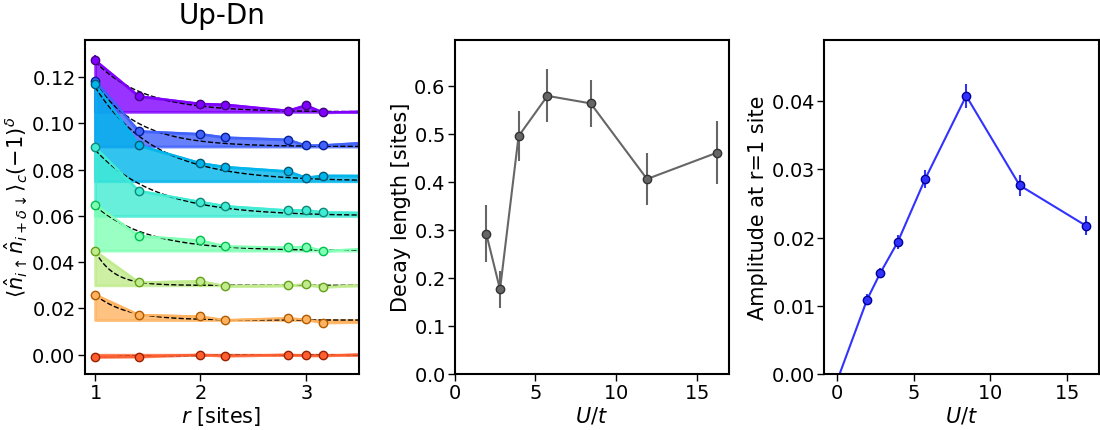

In [32]:
fig, ax = plt.subplots(1,3, figsize=(6, 2))
plt.rcParams['figure.dpi'] = 200

cmapuse =  'rainbow' # 'gnuplot2' # 'copper'
whichFitParamIndex = 0

iiValsPlt = [7,6,5,4,3,2,1,0]
alphaFill = 0.8
rMaxPlt=3.5

def fitform(x, scaleLength, amp):
    return 1.*amp*np.exp(-(x-1)/scaleLength)
globFitGuess= [0.5,0.5]
paramsLabels = ['Decay length [sites]', 'Amplitude at r=1 site']

print('Fit form: amp*e^(-(x-1)/scaleLength)')

fitparms0 = []
fitparms1 = []
fitparms0_err = []
fitparms1_err = []
fitparms_Uvals = []

xvals_arr = rr_val
startIndForFit = 1 # 1 starts at nearest neighbor included 

yvals_arr = (c_updn_vsRadWithoutDegen_vals)
yerrs_arr = (c_updn_vsRadWithoutDegen_errs)
rr_rectifier_use = rr_rectifier # np.ones(len(rr_rectifier)) # rr_rectifier
corrYlab = '$\\langle \\hat{n}_{i \\uparrow} \\hat{n}_{i+\delta \\downarrow} \\rangle_c (-1)^\\delta$'
pltTitle = 'Up-Dn'

scaleUpDn = -0.015
scaleLeRi = 0.0
overallUpDnOffset = np.abs(7*scaleUpDn )

axInd1 = 0; 
for ii in reversed(iiValsPlt):
    colorfracuse = float(ii/len(iiValsPlt))
    
    xvals = xvals_arr[startIndForFit:]
    yvals = rr_rectifier_use[startIndForFit:]*yvals_arr[ii][startIndForFit:]
    yerrs = yerrs_arr[ii][startIndForFit:]
    guesses = globFitGuess
    popt, pcov = fit(xvals, yvals, fitform, guesses=guesses)
    
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=200)
    jplot(ax[axInd1], ii*scaleLeRi+xfit, overallUpDnOffset+ii*scaleUpDn+yfit,  ls='--', lw=.5,color='0.0')
    perr = np.sqrt(np.diag(pcov))
    
    fitparms0.append(popt[0])
    fitparms1.append(popt[1])
    fitparms0_err.append(perr[0])
    fitparms1_err.append(perr[1])
    fitparms_Uvals.append(U_val[ii])
    
    terrbar(ax[axInd1], ii*scaleLeRi+xvals_arr[1:], overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:], yerr=yerrs_arr[ii][1:], ls='-', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    ax[axInd1].fill_between(ii*scaleLeRi+xvals_arr[1:], [overallUpDnOffset+ii*scaleUpDn+0]*len(xvals_arr[1:]), overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:],
                            color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = alphaFill)
setlabels(ax[axInd1], ['$r$ [sites]', corrYlab])
ax[axInd1].set_title(pltTitle)
ax[axInd1].set_xticks([1,2,3,4,5])
setlims(ax[axInd1], [1-0.1, rMaxPlt], None)

axInd1 = 1; 
yaxTitle =  paramsLabels[0]
terrbar(ax[axInd1], fitparms_Uvals[:-1], fitparms0[:-1], yerr=fitparms0_err[:-1], marker='o', ls='-', cmap = 'gray', colorfrac = 0.4)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [0,1.2*np.max( np.abs(fitparms0[:-1]))])
ax[axInd1].set_xticks([0,5,10,15])

axInd1=2;
yaxTitle =paramsLabels[1]
terrbar(ax[axInd1], fitparms_Uvals, fitparms1, yerr=fitparms1_err, marker='o', ls='-', cmap = 'bwr', colorfrac = 0.1)
setlabels(ax[axInd1], ['$U/t$', yaxTitle])
setlims(ax[axInd1], None, [0,1.2*np.max( np.abs(fitparms1))])
ax[axInd1].set_xticks([0,5,10,15])

fig.subplots_adjust(wspace=0.35)
plt.show()

fig.savefig('Figures/CorrelatorsVsRadius/Fig_v2_CorrVsRadius_Exponential_' + pltTitle +'.png', dpi=400, bbox_inches='tight')

Fit form: amp*e^(-(x-1)/scaleLength)


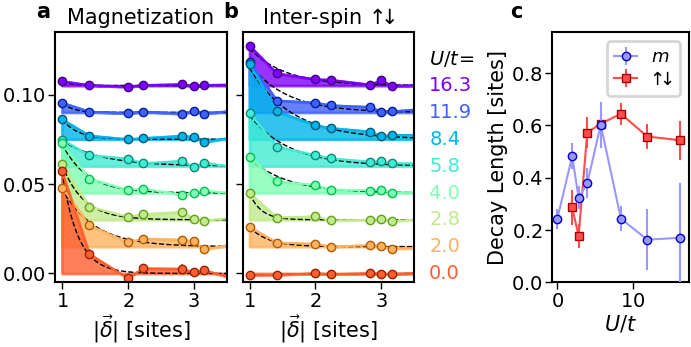

In [130]:
# Compare mag mag and up dn


NormalizePlotYesNo= True 
whichFitParamIndex = 0

alphaFill = 0.8
rMaxPlt=3.5
msizeuse = 2
ypltscaleglob= [-0.005, 0.135]
yticksglob= [0,0.05,0.1]
cmapuse =  'rainbow' # 'gnuplot2' # 'copper'
iiValsPlt = [7,6,5,4,3,2,1,0]
titletextsize = 7.5
pad1dist=3

scaleUpDn = -0.015
scaleLeRi = 0.0
overallUpDnOffset = np.abs(7*scaleUpDn )


def fitform(x, scaleLength, amp):
    return 1.*amp*np.exp(-(x-1)/scaleLength)
globFitGuess= [0.5,0.5]
paramsLabels = ['Decay length [sites]', 'Amp. at r=1 site']

print('Fit form: amp*e^(-(x-1)/scaleLength)')



fig, ax = plt.subplots(1,3, figsize=(3.75, 1.5))
plt.rcParams['figure.dpi'] = 200


fitparms0 = []
fitparms1 = []
fitparms0_err = []
fitparms1_err = []
fitparms_Uvals = []
fitparms_Uerrs = []

xvals_arr = rr_val
startIndForFit = 1 # 1 starts at nearest neighbor included 

yvals_arr = (c_ss_vsRadWithoutDegen_vals)
yerrs_arr = (c_ss_vsRadWithoutDegen_errs)
rr_rectifier_use = -np.ones(len(rr_rectifier)) # rr_rectifier
corrYlab = '$-\\langle \\hat{m}_i \\hat{m}_{i+\delta} \\rangle_c$'
pltTitle = 'Magnetization-Magnetization'

axInd1 = 0; 
for ii in reversed(iiValsPlt):
    colorfracuse = float(ii/len(iiValsPlt))
    
    xvals = xvals_arr[startIndForFit:]
    yvals = rr_rectifier_use[startIndForFit:]*yvals_arr[ii][startIndForFit:]
    yerrs = yerrs_arr[ii][startIndForFit:]
    guesses = globFitGuess
    popt, pcov = fit(xvals, yvals, fitform, ysigma = yerrs, guesses=guesses)
    
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=200)
    jplot(ax[axInd1], ii*scaleLeRi+xfit, overallUpDnOffset+ii*scaleUpDn+yfit,  ls='--', lw=.5,color='0.0')
    perr = np.sqrt(np.diag(pcov))
    
    fitparms0.append(popt[0])
    fitparms1.append(popt[1])
    fitparms0_err.append(perr[0])
    fitparms1_err.append(perr[1])
    fitparms_Uvals.append(U_val[ii])
    fitparms_Uerrs.append(U_err[ii])
    
    terrbar(ax[axInd1], ii*scaleLeRi+xvals_arr[1:], overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:], yerr=yerrs_arr[ii][1:], ls='-', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    ax[axInd1].fill_between(ii*scaleLeRi+xvals_arr[1:], [overallUpDnOffset+ii*scaleUpDn+0]*len(xvals_arr[1:]), overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:],
                            color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = alphaFill)
setlabels(ax[axInd1], ['$|\\vec{\\delta}|$ [sites]', ''])
# ax[axInd1].set_title(corrYlab,size = titletextsize, pad= pad1dist)
ax[axInd1].set_title('Magnetization',size = titletextsize, pad= pad1dist)
corrYlab
# ax[axInd1].set_title(pltTitle)
ax[axInd1].set_xticks([1,2,3,4,5])
ax[axInd1].set_yticks(yticksglob)
setlims(ax[axInd1], [1-0.1, rMaxPlt], ypltscaleglob)

magmagdecaylength_yvals = np.array(fitparms0)
magmagdecaylength_yerrs = np.array(fitparms0_err)
magmag_xvals = np.array(fitparms_Uvals )
magmag_xerrs = np.array(fitparms_Uerrs )

fitparms0 = []
fitparms1 = []
fitparms0_err = []
fitparms1_err = []
fitparms_Uvals = []
fitparms_Uerrs = []

xvals_arr = rr_val
startIndForFit = 1 # 1 starts at nearest neighbor included 

yvals_arr = (c_updn_vsRadWithoutDegen_vals)
yerrs_arr = (c_updn_vsRadWithoutDegen_errs)
rr_rectifier_use = rr_rectifier # np.ones(len(rr_rectifier)) # rr_rectifier
corrYlab = '$\\langle \\hat{n}_{i \\uparrow} \\hat{n}_{i+\delta \\downarrow} \\rangle_c (-1)^\\delta$'
pltTitle = 'Up-Dn'


axInd1 = 1; 
for ii in reversed(iiValsPlt):
    colorfracuse = float(ii/len(iiValsPlt))
    
    xvals = xvals_arr[startIndForFit:]
    yvals = rr_rectifier_use[startIndForFit:]*yvals_arr[ii][startIndForFit:]
    yerrs = yerrs_arr[ii][startIndForFit:]
    guesses = globFitGuess
    popt, pcov = fit(xvals, yvals, fitform, ysigma = yerrs, guesses=guesses)
    
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=200)
    jplot(ax[axInd1], ii*scaleLeRi+xfit, overallUpDnOffset+ii*scaleUpDn+yfit,  ls='--', lw=.5,color='0.0')
    perr = np.sqrt(np.diag(pcov))
    
    fitparms0.append(popt[0])
    fitparms1.append(popt[1])
    fitparms0_err.append(perr[0])
    fitparms1_err.append(perr[1])
    fitparms_Uvals.append(U_val[ii])
    fitparms_Uerrs.append(U_err[ii])
    
    terrbar(ax[axInd1], ii*scaleLeRi+xvals_arr[1:], overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:], yerr=yerrs_arr[ii][1:], ls='-', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    ax[axInd1].fill_between(ii*scaleLeRi+xvals_arr[1:], [overallUpDnOffset+ii*scaleUpDn+0]*len(xvals_arr[1:]), overallUpDnOffset+ii*scaleUpDn+rr_rectifier_use[1:]*yvals_arr[ii][1:],
                            color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = alphaFill)
setlabels(ax[axInd1], ['$|\\vec{\\delta}|$ [sites]', ''])
# ax[axInd1].set_title('$\\langle \\hat{n}_{i \\!   \\uparrow  \\!}\\, \\hat{n}_{ i+\\delta\\!   \\downarrow \\! \\!} \\rangle_c$\n(rectified)',size = titletextsize)
ax[axInd1].set_title('Inter-spin $\\!   \\uparrow  \\! \\! \\! \\!   \\downarrow \\!$',size = titletextsize, pad= pad1dist)
# ax[axInd1].set_title(pltTitle)
ax[axInd1].set_xticks([1,2,3,4,5])
ax[axInd1].set_yticks(yticksglob)
ax[axInd1].set_yticklabels([])
setlims(ax[axInd1], [1-0.1, rMaxPlt], ypltscaleglob)

updndecaylength_yvals = np.array(fitparms0)
updndecaylength_yerrs = np.array(fitparms0_err)

updn_xvals = np.array(fitparms_Uvals )
updn_xerrs = np.array(fitparms_Uerrs )

axInd1 = 2
terrbar(ax[axInd1],  magmag_xvals[:], magmagdecaylength_yvals[:], xerr = magmag_xerrs[:], yerr = magmagdecaylength_yerrs[:], ls='-', marker = 'o', colorfrac=0.3, cmap='bwr', label = '$m$', zorder = 100)
terrbar(ax[axInd1],  updn_xvals[:-1], updndecaylength_yvals[:-1], xerr = updn_xerrs[:-1], yerr = updndecaylength_yerrs[:-1], ls='-', marker = 's', colorfrac=0.85, cmap='bwr', label = '$\\! \\! \\uparrow \\! \\! \\! \\! \\downarrow \\! \\!$')
setlabels(ax[axInd1], ['$U/t$', 'Decay Length [sites]'])
ax[axInd1].legend(labelspacing = 0.25, handlelength = 1.25, fontsize = 6.5)
# ax[axInd1].set_title('Decay Length [sites]',size = titletextsize, pad = 3)

setlims(ax[axInd1], [-0.7,17.5], [0,1.25*np.max( np.abs(updndecaylength_yvals))])

# ratiodecaylength_yvals = magmagdecaylength_yvals/updndecaylength_yvals
# ratiodecaylength_yerrs = np.abs(magmagdecaylength_yvals/updndecaylength_yvals)*np.sqrt(
#     (updndecaylength_yerrs/updndecaylength_yvals)**2 + (magmagdecaylength_yerrs/magmagdecaylength_yvals)**2)


# terrbar(ax[axInd1],  combined_xvals, ratiodecaylength_yvals, xerr = combined_xerrs, yerr = ratiodecaylength_yerrs, ls='-', colorfrac=0.3, cmap='gray')
# setlabels(ax[axInd1], ['$U/t$', 'Ratio of Decay Lengths\n Magnetization/Up-Down'])
# setlims(ax[axInd1], [0,18], [0,1.2*np.max( np.abs(ratiodecaylength_yvals))])



    

scalelocofax(ax[1], 1, 1,-0.255,0)
scalelocofax(ax[2], 0.8, 1,0.2,0)

annotxoffset = 1.125
annotxoffsetData = 3.5
annotxoffsetPixels = 15
ax[1].annotate('$U/t \\!=$', xy=(annotxoffsetData, 0.015*(8)), xycoords='data',
                xytext=(annotxoffsetPixels,0), textcoords='offset pixels', horizontalalignment='left',
                verticalalignment='center', size = 7)
# ax[1].annotate('$=$',xy=(annotxoffsetData, 0.015*(8)), xycoords='data',
#                 xytext=(5,0), textcoords='offset pixels', horizontalalignment='left',
#                 verticalalignment='center', size = 7)

for iiInd in iiValsPlt:
    colorfracuse = float(iiInd/len(iiValsPlt))
    ax[1].annotate(str(np.round(U_val[iiInd],1)), xy=(annotxoffsetData, 0.015*(7-iiInd)), xycoords='data',
                xytext=(annotxoffsetPixels,0), textcoords='offset pixels', horizontalalignment='left',
                verticalalignment='center', size = 7, color = mpl.cm.get_cmap(cmapuse)(colorfracuse))

################################
# Add abc labels
labelsAxArr = [ax[0], ax[1], ax[2]]
labelsPlots = ['a', 'b', 'c']
labelsXoffsets = [-0.025, -0.025, -0.15]
labelsYoffsets = [0.05, 0.05, 0.05]
for labelInd, axtemp in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    axtemp.text(0.0, 1.0, labelsPlots[labelInd], transform=axtemp.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')
    
fig.savefig('Figures/CorrelatorsVsRadius/Fig_Waterfall.png', dpi=400, bbox_inches='tight')

plt.show()



# 2D Correlators

### Charge fluctuations

8.44


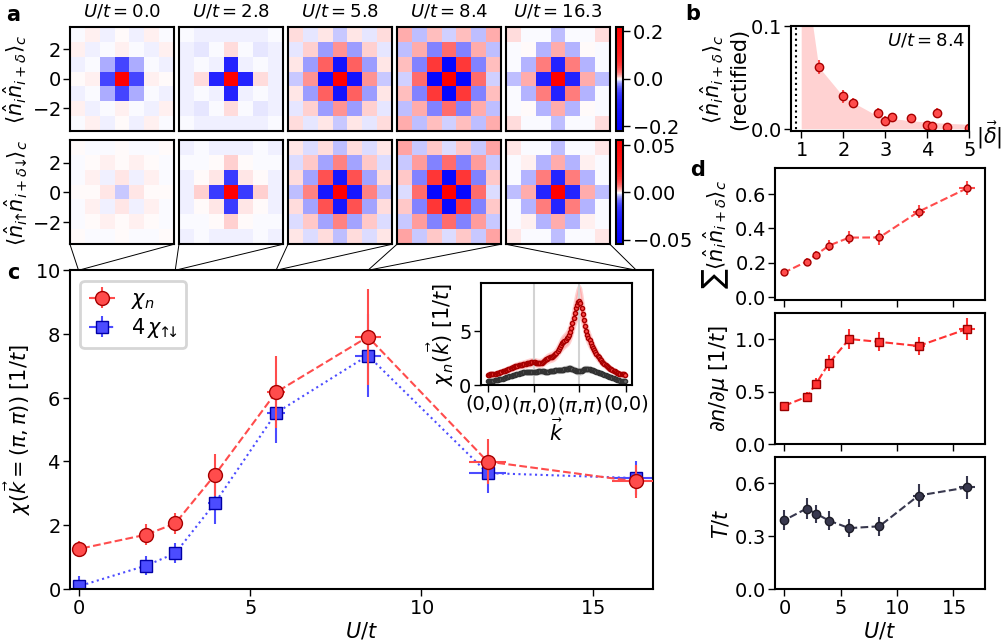

In [21]:
withInsetsTrueFalse = True

plt.rcParams['figure.dpi'] = 200
figSizer = [7.5*2/3,3.25]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt =   [7,5,3,2,0]

legendTextSize = 7.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24
cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 0.22 #0.095
vrange_updn = vrange_n/4
d_max_plt = d_max_plt_glob 
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'

# radial wavefunction plot params
alphaFill = 0.25
maxRadPlt = 5

def fitform(x, scaleLength, powDecay):
    return 1.*np.power(x/scaleLength, powDecay)

################################
# Generate other nn plot locations 
pltsxStart = 0.065
pltsyStart = 0.085
pltsWidthRatios = [1]
pltsGrout = 0.075/2
pltsHeight = 0.49
numPlts = len(pltsWidthRatios)
overallPltsShiftLeft = 0 
overallPltWidthScale = 1


ax_nn_plt_arr_locs = []
ax_nn_plt_arr = []
for pltInd in range(numPlts):
    pltWidth = pltsWidthRatios[pltInd]*(overallPltWidthScale-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(overallPltWidthScale-2*pltsxStart 
                                                                                   - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    ax_nn_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
    ax_nn_plt_arr.append(fig.add_axes(ax_nn_plt_arr_locs[pltInd], label = np.random.rand()))
    
# Shift locations around a bit 
scalelocofax(ax_nn_plt_arr[0], 0.67, 1,0,0)
    
################################
# Generate nn2D location arr 
# Location parameters 
imgxStart = 0.065
imgyStart = 0.79
imgGrout = 0.01/2
overallImgWidthScale = 0.67
numImgs = len(iiValsPlt)
imgWidth = (overallImgWidthScale-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_nn_img_arr_locs = []
ax_nn_img_arr = []
for imgInd in range(numImgs):
    ax_nn_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout), imgyStart, imgWidth, imgHeight])
    ax_nn_img_arr.append(fig.add_axes(ax_nn_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    # C_nn
    if d_max_plt == d_max:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    ax_nn_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_nn_img_arr[iiPltInd],['','$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
        ax_nn_img_arr[iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
    else: 
        ax_nn_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_nn_img_arr[iiPltInd], ['', ''])
        
    # add anotation
    if iiPltInd ==0: 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
    else : 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_nn_img_arr[-1].get_position()
cb_fracwidth = 0.0625
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
cbar = fig.colorbar(imgPlot_n, cax=axNew)
# cbar.set_ticks([-vrange_n,-0.05, 0, 0.05,vrange_n])
# cbar.set_ticklabels(['-',-0.05, 0, 0.05,'+'])


################################
# Generate updn2D location arr 
# Location parameters 
imgxStart = 0.065
imgyStart = 0.615
imgGrout = 0.01/2
overallImgWidthScale = 0.67
numImgs = len(iiValsPlt)
imgWidth = (overallImgWidthScale-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_updn_img_arr_locs = []
ax_updn_img_arr = []
for imgInd in range(numImgs):
    ax_updn_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout), imgyStart, imgWidth, imgHeight])
    ax_updn_img_arr.append(fig.add_axes(ax_updn_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    # C_nn
    if d_max_plt == d_max:
        imgPlot_updn = ax_updn_img_arr[iiPltInd].imshow(c_updn_vals[ii], cmap=cmap_plt, vmin=-vrange_updn, vmax=vrange_updn, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_updn = ax_updn_img_arr[iiPltInd].imshow(c_updn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=-vrange_updn, vmax=vrange_updn, extent=[-xrange, xrange, -xrange, xrange])
    ax_updn_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_updn_img_arr[iiPltInd],['','$\\langle \\hat{n}_{i \\! \\! \\uparrow \\! \\!} \\hat{n}_{i+\delta\\! \\!  \\downarrow \\! \\!} \\rangle_c$'])
        ax_updn_img_arr[iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
    else: 
        ax_updn_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_updn_img_arr[iiPltInd], ['', ''])
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_updn_img_arr[-1].get_position()
cb_fracwidth = 0.0625
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
cbar = fig.colorbar(imgPlot_updn, cax=axNew)
# cbar.set_ticks([-vrange_n,-0.05, 0, 0.05,vrange_n])
# cbar.set_ticklabels(['-',-0.05, 0, 0.05,'+'])


################################
# Plot actual data

# Main data

axInd = 0

terrbar(ax_nn_plt_arr[axInd],U_val, chargeSusc_keqpipi_fit_vals, xerr=U_err, yerr=chargeSusc_keqpipi_fit_errs,  marker='o', ms = 5, ls='dashed',colorfrac=colorfracRed, 
        cmap='bwr',label = '$\\chi_{n}$' , zorder = 100)


terrbar(ax_nn_plt_arr[axInd],U_val, 4*updnSusc_keqpipi_fit_vals, xerr=U_err, yerr=4*updnSusc_keqpipi_fit_errs,  marker='s', ms = 4, ls='dotted',colorfrac=colorfracBlue, 
        cmap='bwr',label = '$4\\, \\chi_{\\!\\!\\uparrow \\!\\!\\! \\! \\downarrow \\!\\!}$' )
# terrbar(ax_nn_plt_arr[axInd],U_val, 4*updnSusc_keq0_fit_vals, xerr=U_err, yerr=4*updnSusc_keq0_fit_errs,  marker='^', ms = 4, ls='dotted',colorfrac=0.7, 
#         cmap='bone',label = '$4\\, \\chi_{\\!\\!\\uparrow \\!\\!\\! \\! \\downarrow \\!\\!}(0,0)$' )
# ax_nn_plt_arr[axInd].hlines(1,-2,25, color = 'gray', linewidth = linewidth0)

ax_nn_plt_arr[axInd].legend(loc = 'upper left', labelspacing =0.25, handlelength = 1.25,  fontsize = legendTextSize)

# ax_nn_plt_arr[axInd].fill_between(U_val, np.array(chargeSusc_keqpipi_fit_vals)-np.array(chargeSusc_keqpipi_fit_errs), np.array(chargeSusc_keqpipi_fit_vals)+np.array(chargeSusc_keqpipi_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(0.9), alpha = 0.3)
# terrbar(ax_nn_plt_arr[axInd], U_val,chargeSusc_keqpipi_varydmax_vals, xerr=U_err, yerr=chargeSusc_keqpipi_varydmax_errs,  marker='o', ms = 4, ls='',colorfrac=colorfracRed, cmap='bwr',label = '$k=(\\pi,\\pi)$')

setlabels(ax_nn_plt_arr[axInd], ['$U/t$', '$\\chi(\\vec{k}=(\\pi,\\pi))$ [$1/t$]'])
ax_nn_plt_arr[axInd].hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
ax_nn_plt_arr[axInd].set_xticks([0,5,10,15])
setlims(ax_nn_plt_arr[axInd], [xUmin,xUmax], [0, 10])

if withInsetsTrueFalse:
    # Add inset for trace through BZ
    # Add other data to plot 
    axs1pos_bbox = ax_nn_plt_arr[0].get_position()
    scaleHeight = 0.32
    scaleWidth = 0.37*0.7
    shiftUp = 0.64
    shiftRight= 1 - 0.35*0.7 - 0.05
    axNew2 = fig.add_axes([axs1pos_bbox.x0+shiftRight*axs1pos_bbox.width,axs1pos_bbox.y0+shiftUp*axs1pos_bbox.height,axs1pos_bbox.width*scaleWidth, axs1pos_bbox.height*(scaleHeight)])
    cmapuseArr = ['bwr','gray']
    legendTextSize=9
    maxYplot = 9.5
    colorsFracsUse = [colorfracRed, 0.4]
    for _pltInd, ii in enumerate([2,7]):
        cmapuse = cmapuseArr[_pltInd]
        axNew2.fill_between(inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii]-chargeSusc_traceBZ_fit_errs[ii], chargeSusc_traceBZ_fit_vals[ii]+chargeSusc_traceBZ_fit_errs[ii],
                            color=mpl.cm.get_cmap(cmapuse)(colorsFracsUse[_pltInd]), alpha = 0.25)
        colorfracuse = float(ii/len(U_val))
        terrbar(axNew2, inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii],ls='-', marker='.', colorfrac=colorsFracsUse[_pltInd], cmap=cmapuse, 
                label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    setlabels(axNew2, ['$\\vec{k}$', '$\\chi_{n} (\\vec{k})$ [$1/t$]'])
    setlims(axNew2, None, [0, maxYplot])
    axNew2.vlines(majorLocs_traceBZ[1], -10, 100, 'lightgray')
    axNew2.vlines(majorLocs_traceBZ[2], -10, 100, 'lightgray')
    axNew2.set_xticks(majorLocs_traceBZ)
    axNew2.set_xticklabels(majorLocsNames_traceBZ)

# Draw lines connecting 2D plots to locations in graph 
uuIndSelectArr = iiValsPlt # [7,5,3,2,0]
dataPointXLocFigFraction = [ax_nn_plt_arr[0].transData.transform([U_val[uuInd],0])[0]/fig.transFigure.transform([1,1])[0] for uuInd in uuIndSelectArr ]
offsetXs = dataPointXLocFigFraction
widthX = 0.02
for axInd in range(len(ax_updn_img_arr_locs)):
    
    l1 = mpl.lines.Line2D([ax_updn_img_arr_locs[axInd][0], offsetXs[axInd]], 
                      [ax_updn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    l2 = mpl.lines.Line2D([ax_updn_img_arr_locs[axInd][0]+ax_updn_img_arr_locs[axInd][2],offsetXs[axInd]], 
                      [ax_updn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    fig.lines.extend([l1, l2])
    
################################
# Generate other nn plot locations 
pltsxStart = 0.18
pltsyStart = 0.085
pltsNumCols = 1
pltsNumRows = 4
pltsGrout = 0.02
pltsHeight = 0.87
pltsWidth = 0.21
numPltsX = pltsNumCols
numPltsY = pltsNumRows
overallPltsShiftRight = 0.59

ax_nn_plt_arr2_locs = []
ax_nn_plt_arr2 = []
for pltIndX in range(numPltsX):
    for pltIndY in range(numPltsY):
        pltWidth = (pltsWidth- (pltsNumCols-1)*pltsGrout)/pltsNumCols
        pltHeight = (pltsHeight- (pltsNumRows-1)*pltsGrout)/pltsNumRows
        pltxStartLoc = overallPltsShiftRight + pltsxStart + pltIndX*pltWidth + pltIndX*pltsGrout
        pltyStartLoc = pltsyStart + pltIndY*pltHeight + pltIndY*pltsGrout
        ax_nn_plt_arr2_locs.append([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight])
        ax_nn_plt_arr2.append(fig.add_axes([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight], label = np.random.rand()))
    
axInd = 0
ax_Temp = ax_nn_plt_arr2[axInd]
# terrbar(ax_Temp, U_val, T_cent_varydmax_vals, xerr=U_err, yerr=T_cent_varydmax_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
terrbar(ax_Temp, U_val, T_cent_fit_vals, xerr=U_err, yerr=T_cent_fit_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
# ax_Temp.fill_between(U_val, np.array(T_cent_fit_vals)-np.array(T_cent_fit_errs), np.array(T_cent_fit_vals)+np.array(T_cent_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bone')(0.25), alpha = 0.5)
# ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_ylabel('$T/t$', labelpad=1)
ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_yticks([0,0.3, 0.6])
ax_Temp.set_xticks([0,5,10,15])
# ax_Temp.set_xticklabels([])
setlims(ax_Temp, None, [0.0,0.75])
    
axInd = 1
ax_ChargeComp = ax_nn_plt_arr2[axInd]
terrbar(ax_ChargeComp, U_val, kappa_vals, xerr=U_err, yerr=kappa_errs, marker='s', ls='dashed', cmap = 'bwr', colorfrac = 0.9)
ax_ChargeComp.set_xlabel('', labelpad=1)
ax_ChargeComp.set_ylabel('$\\partial n/\\partial \\mu $ [$1/t$]', labelpad=1)
ax_ChargeComp.set_xticks([0,5,10,15])
ax_ChargeComp.set_yticks([0, 0.5, 1.0])
ax_ChargeComp.set_xticklabels([])
setlims(ax_ChargeComp, None, [0,1.25])

axInd = 2
# terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_varydmax_val, xerr=U_err, yerr=c_nn_tot_varydmax_err, marker='o', ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_fit_val, xerr=U_err, yerr=c_nn_tot_fit_err, marker='o', ms= 2.5, ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
# ax_nn_plt_arr2[axInd].fill_between(U_val, np.array(c_nn_tot_fit_val)-np.array(c_nn_tot_fit_err), np.array(c_nn_tot_fit_val)+np.array(c_nn_tot_fit_err), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = 0.5)

setlabels(ax_nn_plt_arr2[axInd], ['', '$\\sum \\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
ax_nn_plt_arr2[axInd].set_xticks([0,5,10,15])
ax_nn_plt_arr2[axInd].set_yticks([0,0.2, 0.4,0.6, 0.8, 1])
ax_nn_plt_arr2[axInd].set_xticklabels([])
setlims(ax_nn_plt_arr2[axInd], None, [-0.015,0.75])

ax_nn_vsrad = ax_nn_plt_arr2[3]
# vs radius data
for ii in [2]:
    print(U_val[ii])
    colorfracuse = 0.3

    ax_nn_vsrad.fill_between(rr_val[1:], c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:]*0, c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:], linewidth = 0,
                            color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = alphaFill)
    
    terrbar(ax_nn_vsrad, rr_val, c_nn_rect_vsRadWithoutDegen_vals[ii], yerr=c_nn_rect_vsRadWithoutDegen_errs[ii], ls='', colorfrac=colorfracRed, cmap='bwr', 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

    
    ax_nn_vsrad.annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.0, 0.0),  xycoords='axes fraction',
        xytext=(0.975,0.95), textcoords='axes fraction',
        horizontalalignment='right', verticalalignment='top', size = textSize
        )
    
    # Show interparticle spacing radius. 
    # If density of up particles is ntot/2, then interparticle area is 2/ntot, then radius of circle corresponding to this is sqrt((2/pi)/ntot)
    ax_nn_vsrad.vlines(np.sqrt((2/np.pi)/ntot_vals[ii]),-1,1, color = 'k', ls = 'dotted')
ax_nn_vsrad.set_xticks([1,2,3,4,5])
ax_nn_vsrad.set_yticks([0,0.1,0.2])
ax_nn_vsrad.set_xlabel('$|\\vec{\\delta}|$', x=1,y=1)
ax_nn_vsrad.xaxis.set_label_coords(1.11,0.12)
ax_nn_vsrad.set_ylabel('$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c$\n(rectified)', labelpad= 0.1)
# ax_nn_vsrad.set_ylabel('$Rectified\n\\langle n_i n_{i+\\delta} \\rangle_c (-1)^\\delta$', labelpad= 0.1)
setlims(ax_nn_vsrad, [1-0.25,maxRadPlt], [-0.0025,0.1])    
scalelocofax(ax_nn_vsrad, 0.85, 0.8,0.075,0.18)

################################
# Add abc labels
labelsAxArr = [ax_nn_img_arr[0], ax_nn_vsrad, ax_nn_plt_arr[0],  ax_nn_plt_arr2[2]]
labelsPlots = ['a', 'b', 'c','d']
labelsXoffsets = [-0.25,-0.45, -0.25, -0.35]
labelsYoffsets = [0.01,0.01 , -0.06, -0.06]
for labelInd, ax in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')


8.44


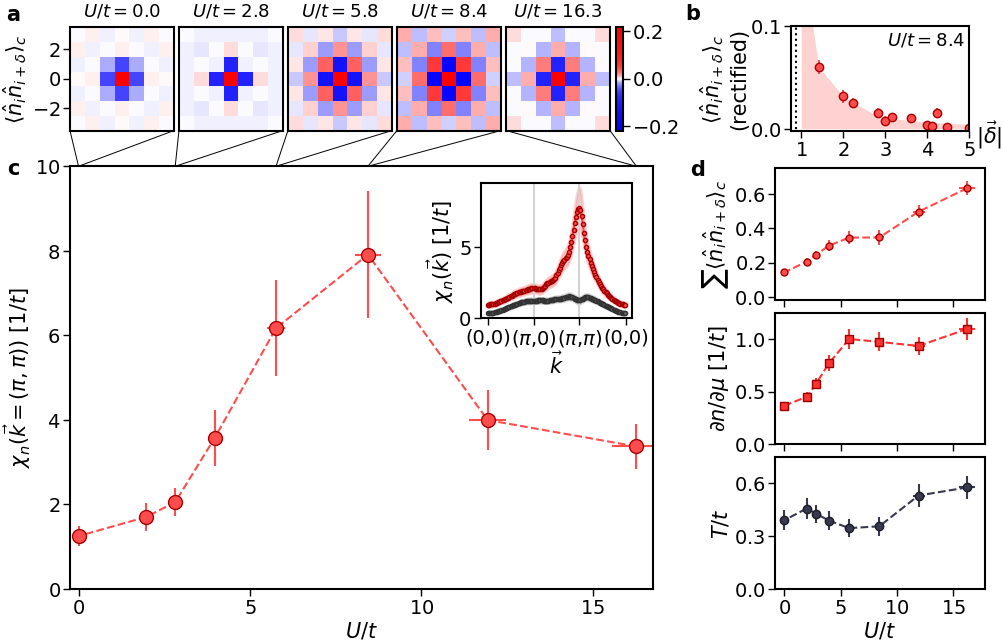

In [23]:
withInsetsTrueFalse = True

plt.rcParams['figure.dpi'] = 200
figSizer = [7.5*2/3,3.25]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt = [7,5,3,2,0]

legendTextSize = 6.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24
cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 0.22 #0.095
vrange_p = vrange_n
d_max_plt = d_max_plt_glob 
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'

# radial wavefunction plot params
alphaFill = 0.25
maxRadPlt = 5

def fitform(x, scaleLength, powDecay):
    return 1.*np.power(x/scaleLength, powDecay)

################################
# Generate other nn plot locations 
pltsxStart = 0.065
pltsyStart = 0.085
pltsWidthRatios = [1]
pltsGrout = 0.075/2
pltsHeight = 0.65
numPlts = len(pltsWidthRatios)
overallPltsShiftLeft = 0 
overallPltWidthScale = 1


ax_nn_plt_arr_locs = []
ax_nn_plt_arr = []
for pltInd in range(numPlts):
    pltWidth = pltsWidthRatios[pltInd]*(overallPltWidthScale-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(overallPltWidthScale-2*pltsxStart 
                                                                                   - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    ax_nn_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
    ax_nn_plt_arr.append(fig.add_axes(ax_nn_plt_arr_locs[pltInd], label = np.random.rand()))
    
# Shift locations around a bit 
scalelocofax(ax_nn_plt_arr[0], 0.67, 1,0,0)
    
################################
# Generate nn2D location arr 
# Location parameters 
imgxStart = 0.065
imgyStart = 0.79
imgGrout = 0.01/2
overallImgWidthScale = 0.67
numImgs = len(iiValsPlt)
imgWidth = (overallImgWidthScale-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_nn_img_arr_locs = []
ax_nn_img_arr = []
for imgInd in range(numImgs):
    ax_nn_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout), imgyStart, imgWidth, imgHeight])
    ax_nn_img_arr.append(fig.add_axes(ax_nn_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    # C_nn
    if d_max_plt == d_max:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    ax_nn_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_nn_img_arr[iiPltInd],['','$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
        ax_nn_img_arr[iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
    else: 
        ax_nn_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_nn_img_arr[iiPltInd], ['', ''])
        
    # add anotation
    if iiPltInd ==0: 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
    else : 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_nn_img_arr[-1].get_position()
cb_fracwidth = 0.0625
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
cbar = fig.colorbar(imgPlot_n, cax=axNew)
# cbar.set_ticks([-vrange_n,-0.05, 0, 0.05,vrange_n])
# cbar.set_ticklabels(['-',-0.05, 0, 0.05,'+'])

################################
# Plot actual data

# Main data

axInd = 0


terrbar(ax_nn_plt_arr[axInd],U_val, chargeSusc_keqpipi_fit_vals, xerr=U_err, yerr=chargeSusc_keqpipi_fit_errs,  marker='o', ms = 5, ls='dashed',colorfrac=colorfracRed, cmap='bwr',label = '$n-n$, $k=(\\pi,\\pi)$' )


# ax_nn_plt_arr[axInd].fill_between(U_val, np.array(chargeSusc_keqpipi_fit_vals)-np.array(chargeSusc_keqpipi_fit_errs), np.array(chargeSusc_keqpipi_fit_vals)+np.array(chargeSusc_keqpipi_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(0.9), alpha = 0.3)
# terrbar(ax_nn_plt_arr[axInd], U_val,chargeSusc_keqpipi_varydmax_vals, xerr=U_err, yerr=chargeSusc_keqpipi_varydmax_errs,  marker='o', ms = 4, ls='',colorfrac=colorfracRed, cmap='bwr',label = '$k=(\\pi,\\pi)$')

setlabels(ax_nn_plt_arr[axInd], ['$U/t$', '$\\chi_{n}(\\vec{k}=(\\pi,\\pi))$ [$1/t$]'])
ax_nn_plt_arr[axInd].hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
ax_nn_plt_arr[axInd].set_xticks([0,5,10,15])
setlims(ax_nn_plt_arr[axInd], [xUmin,xUmax], [0, 10])

if withInsetsTrueFalse:
    # Add inset for trace through BZ
    # Add other data to plot 
    axs1pos_bbox = ax_nn_plt_arr[0].get_position()
    scaleHeight = 0.32
    scaleWidth = 0.37*0.7
    shiftUp = 0.64
    shiftRight= 1 - 0.35*0.7 - 0.05
    axNew2 = fig.add_axes([axs1pos_bbox.x0+shiftRight*axs1pos_bbox.width,axs1pos_bbox.y0+shiftUp*axs1pos_bbox.height,axs1pos_bbox.width*scaleWidth, axs1pos_bbox.height*(scaleHeight)])
    cmapuseArr = ['bwr','gray']
    legendTextSize=9
    maxYplot = 9.5
    colorsFracsUse = [colorfracRed, 0.4]
    for _pltInd, ii in enumerate([2,7]):
        cmapuse = cmapuseArr[_pltInd]
        axNew2.fill_between(inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii]-chargeSusc_traceBZ_fit_errs[ii], chargeSusc_traceBZ_fit_vals[ii]+chargeSusc_traceBZ_fit_errs[ii],
                            color=mpl.cm.get_cmap(cmapuse)(colorsFracsUse[_pltInd]), alpha = 0.25)
        colorfracuse = float(ii/len(U_val))
        terrbar(axNew2, inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii],ls='-', marker='.', colorfrac=colorsFracsUse[_pltInd], cmap=cmapuse, 
                label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    setlabels(axNew2, ['$\\vec{k}$', '$\\chi_{n} (\\vec{k})$ [$1/t$]'])
    setlims(axNew2, None, [0, maxYplot])
    axNew2.vlines(majorLocs_traceBZ[1], -10, 100, 'lightgray')
    axNew2.vlines(majorLocs_traceBZ[2], -10, 100, 'lightgray')
    axNew2.set_xticks(majorLocs_traceBZ)
    axNew2.set_xticklabels(majorLocsNames_traceBZ)

# Draw lines connecting 2D plots to locations in graph 
uuIndSelectArr = iiValsPlt # [7,5,3,2,0]
dataPointXLocFigFraction = [ax_nn_plt_arr[0].transData.transform([U_val[uuInd],0])[0]/fig.transFigure.transform([1,1])[0] for uuInd in uuIndSelectArr ]
offsetXs = dataPointXLocFigFraction
widthX = 0.02
for axInd in range(len(ax_nn_img_arr_locs)):
    
    l1 = mpl.lines.Line2D([ax_nn_img_arr_locs[axInd][0], offsetXs[axInd]], 
                      [ax_nn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    l2 = mpl.lines.Line2D([ax_nn_img_arr_locs[axInd][0]+ax_nn_img_arr_locs[axInd][2],offsetXs[axInd]], 
                      [ax_nn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    fig.lines.extend([l1, l2])
    
################################
# Generate other nn plot locations 
pltsxStart = 0.18
pltsyStart = 0.085
pltsNumCols = 1
pltsNumRows = 4
pltsGrout = 0.02
pltsHeight = 0.87
pltsWidth = 0.21
numPltsX = pltsNumCols
numPltsY = pltsNumRows
overallPltsShiftRight = 0.59

ax_nn_plt_arr2_locs = []
ax_nn_plt_arr2 = []
for pltIndX in range(numPltsX):
    for pltIndY in range(numPltsY):
        pltWidth = (pltsWidth- (pltsNumCols-1)*pltsGrout)/pltsNumCols
        pltHeight = (pltsHeight- (pltsNumRows-1)*pltsGrout)/pltsNumRows
        pltxStartLoc = overallPltsShiftRight + pltsxStart + pltIndX*pltWidth + pltIndX*pltsGrout
        pltyStartLoc = pltsyStart + pltIndY*pltHeight + pltIndY*pltsGrout
        ax_nn_plt_arr2_locs.append([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight])
        ax_nn_plt_arr2.append(fig.add_axes([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight], label = np.random.rand()))
    
axInd = 0
ax_Temp = ax_nn_plt_arr2[axInd]
# terrbar(ax_Temp, U_val, T_cent_varydmax_vals, xerr=U_err, yerr=T_cent_varydmax_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
terrbar(ax_Temp, U_val, T_cent_fit_vals, xerr=U_err, yerr=T_cent_fit_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
# ax_Temp.fill_between(U_val, np.array(T_cent_fit_vals)-np.array(T_cent_fit_errs), np.array(T_cent_fit_vals)+np.array(T_cent_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bone')(0.25), alpha = 0.5)
# ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_ylabel('$T/t$', labelpad=1)
ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_yticks([0,0.3, 0.6])
ax_Temp.set_xticks([0,5,10,15])
# ax_Temp.set_xticklabels([])
setlims(ax_Temp, None, [0.0,0.75])
    
axInd = 1
ax_ChargeComp = ax_nn_plt_arr2[axInd]
terrbar(ax_ChargeComp, U_val, kappa_vals, xerr=U_err, yerr=kappa_errs, marker='s', ls='dashed', cmap = 'bwr', colorfrac = 0.9)
ax_ChargeComp.set_xlabel('', labelpad=1)
ax_ChargeComp.set_ylabel('$\\partial n/\\partial \\mu $ [$1/t$]', labelpad=1)
ax_ChargeComp.set_xticks([0,5,10,15])
ax_ChargeComp.set_yticks([0, 0.5, 1.0])
ax_ChargeComp.set_xticklabels([])
setlims(ax_ChargeComp, None, [0,1.25])

axInd = 2
# terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_varydmax_val, xerr=U_err, yerr=c_nn_tot_varydmax_err, marker='o', ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_fit_val, xerr=U_err, yerr=c_nn_tot_fit_err, marker='o', ms= 2.5, ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
# ax_nn_plt_arr2[axInd].fill_between(U_val, np.array(c_nn_tot_fit_val)-np.array(c_nn_tot_fit_err), np.array(c_nn_tot_fit_val)+np.array(c_nn_tot_fit_err), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = 0.5)

setlabels(ax_nn_plt_arr2[axInd], ['', '$\\sum \\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
ax_nn_plt_arr2[axInd].set_xticks([0,5,10,15])
ax_nn_plt_arr2[axInd].set_yticks([0,0.2, 0.4,0.6, 0.8, 1])
ax_nn_plt_arr2[axInd].set_xticklabels([])
setlims(ax_nn_plt_arr2[axInd], None, [-0.015,0.75])

ax_nn_vsrad = ax_nn_plt_arr2[3]
# vs radius data
for ii in [2]:
    print(U_val[ii])
    colorfracuse = 0.3

    ax_nn_vsrad.fill_between(rr_val[1:], c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:]*0, c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:], linewidth = 0,
                            color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = alphaFill)
    
    terrbar(ax_nn_vsrad, rr_val, c_nn_rect_vsRadWithoutDegen_vals[ii], yerr=c_nn_rect_vsRadWithoutDegen_errs[ii], ls='', colorfrac=colorfracRed, cmap='bwr', 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

    
    ax_nn_vsrad.annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.0, 0.0),  xycoords='axes fraction',
        xytext=(0.975,0.95), textcoords='axes fraction',
        horizontalalignment='right', verticalalignment='top', size = textSize
        )
    
    # Show interparticle spacing radius. 
    # If density of up particles is ntot/2, then interparticle area is 2/ntot, then radius of circle corresponding to this is sqrt((2/pi)/ntot)
    ax_nn_vsrad.vlines(np.sqrt((2/np.pi)/ntot_vals[ii]),-1,1, color = 'k', ls = 'dotted')
ax_nn_vsrad.set_xticks([1,2,3,4,5])
ax_nn_vsrad.set_yticks([0,0.1,0.2])
ax_nn_vsrad.set_xlabel('$|\\vec{\\delta}|$', x=1,y=1)
ax_nn_vsrad.xaxis.set_label_coords(1.11,0.12)
ax_nn_vsrad.set_ylabel('$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c$\n(rectified)', labelpad= 0.1)
# ax_nn_vsrad.set_ylabel('$Rectified\n\\langle n_i n_{i+\\delta} \\rangle_c (-1)^\\delta$', labelpad= 0.1)
setlims(ax_nn_vsrad, [1-0.25,maxRadPlt], [-0.0025,0.1])    
scalelocofax(ax_nn_vsrad, 0.85, 0.8,0.075,0.18)

################################
# Add abc labels
labelsAxArr = [ax_nn_img_arr[0], ax_nn_vsrad, ax_nn_plt_arr[0],  ax_nn_plt_arr2[2]]
labelsPlots = ['a', 'b', 'c','d']
labelsXoffsets = [-0.25,-0.45, -0.25, -0.35]
labelsYoffsets = [0.01,0.01 , -0.06, -0.06]
for labelInd, ax in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')



8.44


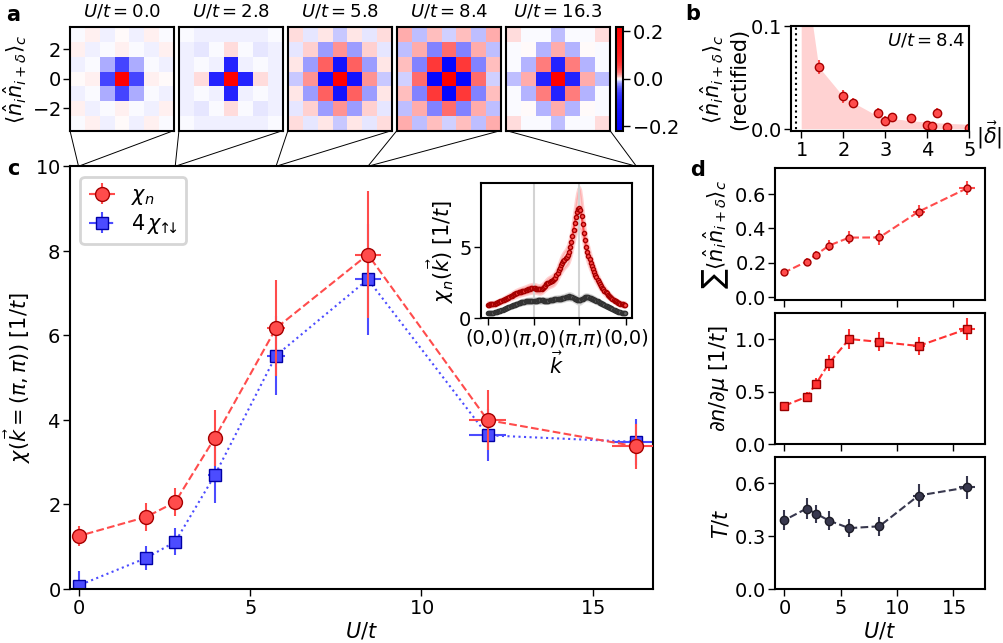

In [24]:
withInsetsTrueFalse = True

plt.rcParams['figure.dpi'] = 200
figSizer = [7.5*2/3,3.25]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt = [7,5,3,2,0]

legendTextSize = 7.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24
cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 0.22 #0.095
vrange_p = vrange_n
d_max_plt = d_max_plt_glob 
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'

# radial wavefunction plot params
alphaFill = 0.25
maxRadPlt = 5

def fitform(x, scaleLength, powDecay):
    return 1.*np.power(x/scaleLength, powDecay)

################################
# Generate other nn plot locations 
pltsxStart = 0.065
pltsyStart = 0.085
pltsWidthRatios = [1]
pltsGrout = 0.075/2
pltsHeight = 0.65
numPlts = len(pltsWidthRatios)
overallPltsShiftLeft = 0 
overallPltWidthScale = 1


ax_nn_plt_arr_locs = []
ax_nn_plt_arr = []
for pltInd in range(numPlts):
    pltWidth = pltsWidthRatios[pltInd]*(overallPltWidthScale-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(overallPltWidthScale-2*pltsxStart 
                                                                                   - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    ax_nn_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
    ax_nn_plt_arr.append(fig.add_axes(ax_nn_plt_arr_locs[pltInd], label = np.random.rand()))
    
# Shift locations around a bit 
scalelocofax(ax_nn_plt_arr[0], 0.67, 1,0,0)
    
################################
# Generate nn2D location arr 
# Location parameters 
imgxStart = 0.065
imgyStart = 0.79
imgGrout = 0.01/2
overallImgWidthScale = 0.67
numImgs = len(iiValsPlt)
imgWidth = (overallImgWidthScale-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_nn_img_arr_locs = []
ax_nn_img_arr = []
for imgInd in range(numImgs):
    ax_nn_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout), imgyStart, imgWidth, imgHeight])
    ax_nn_img_arr.append(fig.add_axes(ax_nn_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    # C_nn
    if d_max_plt == d_max:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_n = ax_nn_img_arr[iiPltInd].imshow(c_nn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    ax_nn_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_nn_img_arr[iiPltInd],['','$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
        ax_nn_img_arr[iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
    else: 
        ax_nn_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_nn_img_arr[iiPltInd], ['', ''])
        
    # add anotation
    if iiPltInd ==0: 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
    else : 
        ax_nn_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_nn_img_arr[-1].get_position()
cb_fracwidth = 0.0625
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
cbar = fig.colorbar(imgPlot_n, cax=axNew)
# cbar.set_ticks([-vrange_n,-0.05, 0, 0.05,vrange_n])
# cbar.set_ticklabels(['-',-0.05, 0, 0.05,'+'])

################################
# Plot actual data

# Main data

axInd = 0

terrbar(ax_nn_plt_arr[axInd],U_val, chargeSusc_keqpipi_fit_vals, xerr=U_err, yerr=chargeSusc_keqpipi_fit_errs,  marker='o', ms = 5, ls='dashed',colorfrac=colorfracRed, 
        cmap='bwr',label = '$\\chi_{n}$' , zorder = 100)


terrbar(ax_nn_plt_arr[axInd],U_val, 4*updnSusc_keqpipi_fit_vals, xerr=U_err, yerr=4*updnSusc_keqpipi_fit_errs,  marker='s', ms = 4, ls='dotted',colorfrac=colorfracBlue, 
        cmap='bwr',label = '$4\\, \\chi_{\\!\\!\\uparrow \\!\\!\\! \\! \\downarrow \\!\\!}$' )
# terrbar(ax_nn_plt_arr[axInd],U_val, 4*updnSusc_keq0_fit_vals, xerr=U_err, yerr=4*updnSusc_keq0_fit_errs,  marker='^', ms = 4, ls='dotted',colorfrac=0.7, 
#         cmap='bone',label = '$4\\, \\chi_{\\!\\!\\uparrow \\!\\!\\! \\! \\downarrow \\!\\!}(0,0)$' )
# ax_nn_plt_arr[axInd].hlines(1,-2,25, color = 'gray', linewidth = linewidth0)

ax_nn_plt_arr[axInd].legend(loc = 'upper left', labelspacing =0.25, handlelength = 1.25,  fontsize = legendTextSize)

# ax_nn_plt_arr[axInd].fill_between(U_val, np.array(chargeSusc_keqpipi_fit_vals)-np.array(chargeSusc_keqpipi_fit_errs), np.array(chargeSusc_keqpipi_fit_vals)+np.array(chargeSusc_keqpipi_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(0.9), alpha = 0.3)
# terrbar(ax_nn_plt_arr[axInd], U_val,chargeSusc_keqpipi_varydmax_vals, xerr=U_err, yerr=chargeSusc_keqpipi_varydmax_errs,  marker='o', ms = 4, ls='',colorfrac=colorfracRed, cmap='bwr',label = '$k=(\\pi,\\pi)$')

setlabels(ax_nn_plt_arr[axInd], ['$U/t$', '$\\chi(\\vec{k}=(\\pi,\\pi))$ [$1/t$]'])
ax_nn_plt_arr[axInd].hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
ax_nn_plt_arr[axInd].set_xticks([0,5,10,15])
setlims(ax_nn_plt_arr[axInd], [xUmin,xUmax], [0, 10])

if withInsetsTrueFalse:
    # Add inset for trace through BZ
    # Add other data to plot 
    axs1pos_bbox = ax_nn_plt_arr[0].get_position()
    scaleHeight = 0.32
    scaleWidth = 0.37*0.7
    shiftUp = 0.64
    shiftRight= 1 - 0.35*0.7 - 0.05
    axNew2 = fig.add_axes([axs1pos_bbox.x0+shiftRight*axs1pos_bbox.width,axs1pos_bbox.y0+shiftUp*axs1pos_bbox.height,axs1pos_bbox.width*scaleWidth, axs1pos_bbox.height*(scaleHeight)])
    cmapuseArr = ['bwr','gray']
    legendTextSize=9
    maxYplot = 9.5
    colorsFracsUse = [colorfracRed, 0.4]
    for _pltInd, ii in enumerate([2,7]):
        cmapuse = cmapuseArr[_pltInd]
        axNew2.fill_between(inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii]-chargeSusc_traceBZ_fit_errs[ii], chargeSusc_traceBZ_fit_vals[ii]+chargeSusc_traceBZ_fit_errs[ii],
                            color=mpl.cm.get_cmap(cmapuse)(colorsFracsUse[_pltInd]), alpha = 0.25)
        colorfracuse = float(ii/len(U_val))
        terrbar(axNew2, inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii],ls='-', marker='.', colorfrac=colorsFracsUse[_pltInd], cmap=cmapuse, 
                label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    setlabels(axNew2, ['$\\vec{k}$', '$\\chi_{n} (\\vec{k})$ [$1/t$]'])
    setlims(axNew2, None, [0, maxYplot])
    axNew2.vlines(majorLocs_traceBZ[1], -10, 100, 'lightgray')
    axNew2.vlines(majorLocs_traceBZ[2], -10, 100, 'lightgray')
    axNew2.set_xticks(majorLocs_traceBZ)
    axNew2.set_xticklabels(majorLocsNames_traceBZ)

# Draw lines connecting 2D plots to locations in graph 
uuIndSelectArr = iiValsPlt # [7,5,3,2,0]
dataPointXLocFigFraction = [ax_nn_plt_arr[0].transData.transform([U_val[uuInd],0])[0]/fig.transFigure.transform([1,1])[0] for uuInd in uuIndSelectArr ]
offsetXs = dataPointXLocFigFraction
widthX = 0.02
for axInd in range(len(ax_nn_img_arr_locs)):
    
    l1 = mpl.lines.Line2D([ax_nn_img_arr_locs[axInd][0], offsetXs[axInd]], 
                      [ax_nn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    l2 = mpl.lines.Line2D([ax_nn_img_arr_locs[axInd][0]+ax_nn_img_arr_locs[axInd][2],offsetXs[axInd]], 
                      [ax_nn_img_arr_locs[axInd][1], ax_nn_plt_arr_locs[0][1]+ax_nn_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    fig.lines.extend([l1, l2])
    
################################
# Generate other nn plot locations 
pltsxStart = 0.18
pltsyStart = 0.085
pltsNumCols = 1
pltsNumRows = 4
pltsGrout = 0.02
pltsHeight = 0.87
pltsWidth = 0.21
numPltsX = pltsNumCols
numPltsY = pltsNumRows
overallPltsShiftRight = 0.59

ax_nn_plt_arr2_locs = []
ax_nn_plt_arr2 = []
for pltIndX in range(numPltsX):
    for pltIndY in range(numPltsY):
        pltWidth = (pltsWidth- (pltsNumCols-1)*pltsGrout)/pltsNumCols
        pltHeight = (pltsHeight- (pltsNumRows-1)*pltsGrout)/pltsNumRows
        pltxStartLoc = overallPltsShiftRight + pltsxStart + pltIndX*pltWidth + pltIndX*pltsGrout
        pltyStartLoc = pltsyStart + pltIndY*pltHeight + pltIndY*pltsGrout
        ax_nn_plt_arr2_locs.append([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight])
        ax_nn_plt_arr2.append(fig.add_axes([pltxStartLoc, pltyStartLoc, pltWidth, pltHeight], label = np.random.rand()))
    
axInd = 0
ax_Temp = ax_nn_plt_arr2[axInd]
# terrbar(ax_Temp, U_val, T_cent_varydmax_vals, xerr=U_err, yerr=T_cent_varydmax_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
terrbar(ax_Temp, U_val, T_cent_fit_vals, xerr=U_err, yerr=T_cent_fit_errs, cmap='bone', colorfrac = 0.25, marker='o', ls='dashed')
# ax_Temp.fill_between(U_val, np.array(T_cent_fit_vals)-np.array(T_cent_fit_errs), np.array(T_cent_fit_vals)+np.array(T_cent_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bone')(0.25), alpha = 0.5)
# ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_ylabel('$T/t$', labelpad=1)
ax_Temp.set_xlabel('$U/t$', labelpad=1)
ax_Temp.set_yticks([0,0.3, 0.6])
ax_Temp.set_xticks([0,5,10,15])
# ax_Temp.set_xticklabels([])
setlims(ax_Temp, None, [0.0,0.75])
    
axInd = 1
ax_ChargeComp = ax_nn_plt_arr2[axInd]
terrbar(ax_ChargeComp, U_val, kappa_vals, xerr=U_err, yerr=kappa_errs, marker='s', ls='dashed', cmap = 'bwr', colorfrac = 0.9)
ax_ChargeComp.set_xlabel('', labelpad=1)
ax_ChargeComp.set_ylabel('$\\partial n/\\partial \\mu $ [$1/t$]', labelpad=1)
ax_ChargeComp.set_xticks([0,5,10,15])
ax_ChargeComp.set_yticks([0, 0.5, 1.0])
ax_ChargeComp.set_xticklabels([])
setlims(ax_ChargeComp, None, [0,1.25])

axInd = 2
# terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_varydmax_val, xerr=U_err, yerr=c_nn_tot_varydmax_err, marker='o', ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
terrbar(ax_nn_plt_arr2[axInd], U_val, c_nn_tot_fit_val, xerr=U_err, yerr=c_nn_tot_fit_err, marker='o', ms= 2.5, ls='dashed', cmap = 'bwr', colorfrac= colorfracRed, label='Total')
# ax_nn_plt_arr2[axInd].fill_between(U_val, np.array(c_nn_tot_fit_val)-np.array(c_nn_tot_fit_err), np.array(c_nn_tot_fit_val)+np.array(c_nn_tot_fit_err), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = 0.5)

setlabels(ax_nn_plt_arr2[axInd], ['', '$\\sum \\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c $'])
ax_nn_plt_arr2[axInd].set_xticks([0,5,10,15])
ax_nn_plt_arr2[axInd].set_yticks([0,0.2, 0.4,0.6, 0.8, 1])
ax_nn_plt_arr2[axInd].set_xticklabels([])
setlims(ax_nn_plt_arr2[axInd], None, [-0.015,0.75])

ax_nn_vsrad = ax_nn_plt_arr2[3]
# vs radius data
for ii in [2]:
    print(U_val[ii])
    colorfracuse = 0.3

    ax_nn_vsrad.fill_between(rr_val[1:], c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:]*0, c_nn_rect_vsRadWithoutDegen_fit_vals[ii][1:], linewidth = 0,
                            color=mpl.cm.get_cmap('bwr')(colorfracRed), alpha = alphaFill)
    
    terrbar(ax_nn_vsrad, rr_val, c_nn_rect_vsRadWithoutDegen_vals[ii], yerr=c_nn_rect_vsRadWithoutDegen_errs[ii], ls='', colorfrac=colorfracRed, cmap='bwr', 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

    
    ax_nn_vsrad.annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.0, 0.0),  xycoords='axes fraction',
        xytext=(0.975,0.95), textcoords='axes fraction',
        horizontalalignment='right', verticalalignment='top', size = textSize
        )
    
    # Show interparticle spacing radius. 
    # If density of up particles is ntot/2, then interparticle area is 2/ntot, then radius of circle corresponding to this is sqrt((2/pi)/ntot)
    ax_nn_vsrad.vlines(np.sqrt((2/np.pi)/ntot_vals[ii]),-1,1, color = 'k', ls = 'dotted')
ax_nn_vsrad.set_xticks([1,2,3,4,5])
ax_nn_vsrad.set_yticks([0,0.1,0.2])
ax_nn_vsrad.set_xlabel('$|\\vec{\\delta}|$', x=1,y=1)
ax_nn_vsrad.xaxis.set_label_coords(1.11,0.12)
ax_nn_vsrad.set_ylabel('$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle_c$\n(rectified)', labelpad= 0.1)
# ax_nn_vsrad.set_ylabel('$Rectified\n\\langle n_i n_{i+\\delta} \\rangle_c (-1)^\\delta$', labelpad= 0.1)
setlims(ax_nn_vsrad, [1-0.25,maxRadPlt], [-0.0025,0.1])    
scalelocofax(ax_nn_vsrad, 0.85, 0.8,0.075,0.18)

################################
# Add abc labels
labelsAxArr = [ax_nn_img_arr[0], ax_nn_vsrad, ax_nn_plt_arr[0],  ax_nn_plt_arr2[2]]
labelsPlots = ['a', 'b', 'c','d']
labelsXoffsets = [-0.25,-0.45, -0.25, -0.35]
labelsYoffsets = [0.01,0.01 , -0.06, -0.06]
for labelInd, ax in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')



In [25]:
fig.savefig('Figures/ChargeFluctuationFigure/Fig_ChargeFluctuationsSummary.png', dpi=400, bbox_inches='tight')

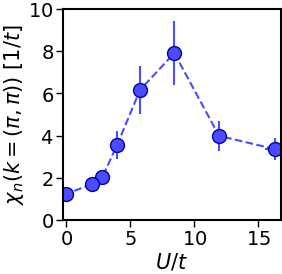

In [31]:
withInsetsTrueFalse = True

plt.rcParams['figure.dpi'] = 200
figSizer = [7.5*2/3,3.25]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt = [7,5,3,2,0]

legendTextSize = 6.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24
cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 0.2
vrange_p = vrange_n
d_max_plt = d_max_plt_glob 
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'

# radial wavefunction plot params
alphaFill = 0.25
maxRadPlt = 5

def fitform(x, scaleLength, powDecay):
    return 1.*np.power(x/scaleLength, powDecay)

################################
# Generate other nn plot locations 
pltsxStart = 0.065
pltsyStart = 0.085
pltsWidthRatios = [1]
pltsGrout = 0.075/2
pltsHeight = 0.65
numPlts = len(pltsWidthRatios)
overallPltsShiftLeft = 0 
overallPltWidthScale = 1


ax_nn_plt_arr_locs = []
ax_nn_plt_arr = []
for pltInd in range(numPlts):
    pltWidth = pltsWidthRatios[pltInd]*(overallPltWidthScale-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(overallPltWidthScale-2*pltsxStart 
                                                                                   - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    ax_nn_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
    ax_nn_plt_arr.append(fig.add_axes(ax_nn_plt_arr_locs[pltInd], label = np.random.rand()))
    
# Shift locations around a bit 
scalelocofax(ax_nn_plt_arr[0], 0.25, 0.5,0,0)
    

################################
# Plot actual data

# Main data

axInd = 0
# terrbar(ax_nn_plt_arr[axInd], U_val,chargeSusc_keqpipi_varydmax_vals, xerr=U_err, yerr=chargeSusc_keqpipi_varydmax_errs,  marker='o', ms = 4, ls='',colorfrac=colorfracRed, cmap='bwr',label = '$k=(\\pi,\\pi)$')

terrbar(ax_nn_plt_arr[axInd],U_val, chargeSusc_keqpipi_fit_vals, xerr=U_err, yerr=chargeSusc_keqpipi_fit_errs,  marker='o', ms = 5, ls='dashed',colorfrac=colorfracBlue, cmap='bwr',label = '$k=(\\pi,\\pi)$' )

# ax_nn_plt_arr[axInd].fill_between(U_val, np.array(chargeSusc_keqpipi_fit_vals)-np.array(chargeSusc_keqpipi_fit_errs), np.array(chargeSusc_keqpipi_fit_vals)+np.array(chargeSusc_keqpipi_fit_errs), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(0.9), alpha = 0.3)

setlabels(ax_nn_plt_arr[axInd], ['$U/t$', '$\\chi_{n}(k=(\\pi,\\pi))$ [$1/t$]'])
ax_nn_plt_arr[axInd].hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
ax_nn_plt_arr[axInd].set_xticks([0,5,10,15])
setlims(ax_nn_plt_arr[axInd], [xUmin,xUmax], [0, 10])

fig.savefig('Figures/ChargeFluctuationFigure/Fig_ChargeFluctuationsSummary_mini.png', dpi=400, bbox_inches='tight')


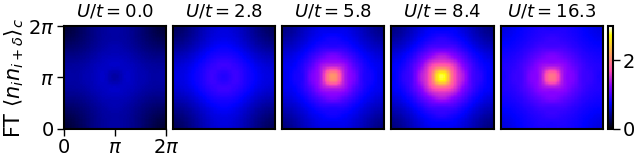

In [32]:
# 2D Fourier Transforms of the density fluctuations

plt.rcParams['figure.dpi'] = 200
figSizer = [3.5,4.5]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt = [7,5,3,2,0]

legendTextSize = 6.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 3
vrange_p = vrange_n
d_max_plt = d_max_plt_glob
xrange = d_max_plt+0.5
cmap_plt = 'gnuplot2'# 'afmhot' # bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'


################################
# Generate ss2D location arr 
# Location parameters 
imgxStart = 0.115
imgyStart = 0.85
imgGrout = 0.01
numImgs = len(iiValsPlt)
imgWidth = (1-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_ss_img_arr_locs = []
ax_ss_img_arr = []
for imgInd in range(numImgs):
    ax_ss_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout)-overallImgShiftLeft, imgyStart, imgWidth, imgHeight])
    ax_ss_img_arr.append(fig.add_axes(ax_ss_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    
    arr2plt = c_nn_k_fit_vals[ii]
    # shift it to center pi pi point
    arr2pltShifted = scipy.ndimage.shift(arr2plt,(int(round(len(arr2plt)/2)),int(round(len(arr2plt)/2))), mode = 'reflect')
    
    # C_nn
    if d_max_plt == d_max:
        imgPlot_n = ax_ss_img_arr[iiPltInd].imshow(arr2pltShifted, cmap=cmap_plt, vmin=0, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_n = ax_ss_img_arr[iiPltInd].imshow(arr2pltShifted[d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=0, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    ax_ss_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_ss_img_arr[iiPltInd],['','FT $\\langle n_i  n_{i+\\delta} \\rangle_c$'])
        ax_ss_img_arr[iiPltInd].set_xticks([-d_max_plt-0.5, 0, d_max_plt+0.5])
        ax_ss_img_arr[iiPltInd].set_yticks([-d_max_plt-0.5, 0, d_max_plt+0.5])
        ax_ss_img_arr[iiPltInd].set_xticklabels(['0','$\\pi$', '$2\\pi$'])
        ax_ss_img_arr[iiPltInd].set_yticklabels(['0','$\\pi$', '$2\\pi$'])
    else: 
        ax_ss_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_ss_img_arr[iiPltInd], ['', ''])
        
    # add anotation
    if iiPltInd ==0: 
        ax_ss_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
    else : 
        ax_ss_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_ss_img_arr[-1].get_position()
cb_fracwidth = 0.05
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
fig.colorbar(imgPlot_n, cax=axNew)

plt.show()

In [33]:
fig.savefig('Figures/ChargeFluctuationFigure/Fig_FourierTransformsDensity.png', dpi=400, bbox_inches='tight')

### Spin fluctuations 

amp          = 0.036 +/- 0.023
decayLength  = 0.820 +/- 0.244



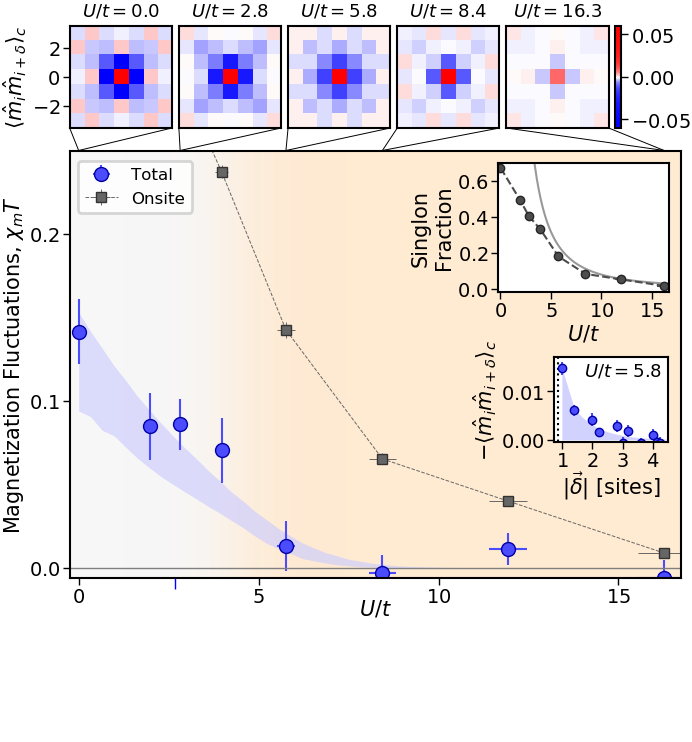

In [155]:
# withInsetsTrueFalse = True
showBackgroundGradientTrueFalse = True
showOnsiteTrueFalse = True
withInsetsTrueFalse = True

plt.rcParams['figure.dpi'] = 200
figSizer = [3.5,4.5]
figRat = figSizer[0]/figSizer[1]
fig = plt.figure(figsize=(figSizer[0],figSizer[1]))
# ShowDisplayCoord(fig)

iiValsPlt = [7,5,3,2,0] #[7,5,3,2,0]

legendTextSize = 6.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5
textSize = 6.5 # for U labels
UlabYoffset = 1.24

markerList = ['D','s','o','^','h', 'd','v']

# 2D Plot parameters 
vrange_n = 0.06
vrange_p = vrange_n
d_max_plt = d_max_plt_glob
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'

# radial wavefunction plot params
alphaFill = 0.25
maxRadPlt = 4.5

def fitform(x, scaleLength, powDecay):
    return 1.*np.power(x/scaleLength, powDecay)

################################
# Generate other ss plot locations 
pltsxStart = 0.115
pltsyStart = 0.35
pltsWidthRatios = [1]
pltsGrout = 0.075
pltsHeight = 0.475
numPlts = len(pltsWidthRatios)
overallPltsShiftLeft = 0 


ax_ss_plt_arr_locs = []
ax_ss_plt_arr = []
for pltInd in range(numPlts):
    pltWidth = pltsWidthRatios[pltInd]*(1-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
    pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(1-2*pltsxStart 
                                                                                   - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios) -overallPltsShiftLeft
    ax_ss_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
    ax_ss_plt_arr.append(fig.add_axes(ax_ss_plt_arr_locs[pltInd], label = np.random.rand()))
    
scalelocofax(ax_ss_plt_arr[0], 1.135, 1,0,0)


################################
# Generate ss2D location arr 
# Location parameters 
imgxStart = 0.115
imgyStart = 0.85
imgGrout = 0.01
numImgs = len(iiValsPlt)
imgWidth = (1-(2*imgxStart) - imgGrout*(numImgs-1))/numImgs
imgHeight = imgWidth*figRat
overallImgShiftLeft = 0

ax_ss_img_arr_locs = []
ax_ss_img_arr = []
for imgInd in range(numImgs):
    ax_ss_img_arr_locs.append([imgxStart+imgInd*(imgWidth+imgGrout)-overallImgShiftLeft, imgyStart, imgWidth, imgHeight])
    ax_ss_img_arr.append(fig.add_axes(ax_ss_img_arr_locs[imgInd], label = np.random.rand()))

for iiPltInd, ii in enumerate(iiValsPlt):
    # C_nn
    if d_max_plt == d_max:
        imgPlot_n = ax_ss_img_arr[iiPltInd].imshow(c_ss_vals[ii], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    else:
        imgPlot_n = ax_ss_img_arr[iiPltInd].imshow(c_ss_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], cmap=cmap_plt, vmin=-vrange_n, vmax=vrange_n, extent=[-xrange, xrange, -xrange, xrange])
    ax_ss_img_arr[iiPltInd].set_xticks([])
    if iiPltInd ==0: 
        setlabels(ax_ss_img_arr[iiPltInd],['','$\\langle \\hat{m}_{i} \\hat{m}_{i+\\delta} \\rangle_c$'])
        ax_ss_img_arr[iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
    else: 
        ax_ss_img_arr[iiPltInd].set_yticks([])
        setlabels(ax_ss_img_arr[iiPltInd], ['', ''])
        
    # add anotation
    if iiPltInd ==0: 
        ax_ss_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
    else : 
        ax_ss_img_arr[iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.5, 0.0),  xycoords='axes fraction',
            xytext=(0.5, UlabYoffset), textcoords='axes fraction',
            horizontalalignment='center', verticalalignment='top', size = textSize
            )
# Add colorbar 
fig.canvas.draw() # have to draw before get position 
pos = ax_ss_img_arr[-1].get_position()
cb_fracwidth = 0.0625
cb_offset = 1
axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
fig.colorbar(imgPlot_n, cax=axNew)

################################
# Plot actual data

# Main data

axInd = 0

# Main data 
terrbar(ax_ss_plt_arr[axInd], U_val, c_ss_tot_varydmax_val, xerr=U_err, yerr=c_ss_tot_varydmax_err, marker='o', ls='', cmap = 'bwr', ms = 5, colorfrac= colorfracBlue, label = 'Total')

if showOnsiteTrueFalse:
    terrbar(ax_ss_plt_arr[axInd], U_val, c_ss_loc_val, xerr=U_err, yerr=c_ss_loc_err, marker='s', ls='dashed', lw= 0.35, ms = 3.5, cmap = 'gray', colorfrac= 0.4,label = 'Onsite')


# Theory plot
# terrbar(ax_ss_plt_arr[axInd], th_SpinFluc_U_val, th_SpinFluc_val_high, marker='', ls='-', cmap = 'bwr', ms = 5, colorfrac= colorfracBlue, label = 'Total')
ax_ss_plt_arr[axInd].fill_between(th_SpinFluc_U_val, th_SpinFluc_val_low, th_SpinFluc_val_high,color=mpl.cm.get_cmap('bwr')(0.4), alpha = 0.65, linewidth=0.0)


# terrbar(ax_ss_plt_arr[axInd], U_val, np.array(c_ss_tot_fit_val), xerr=U_err,  yerr= np.array(c_ss_tot_fit_err), marker='o', ls='', cmap = 'bwr', ms = 4, colorfrac= colorfracBlue, label =  'Total, fit')
# ax_ss_plt_arr[axInd].fill_between(U_val, np.array(c_ss_tot_fit_val)-np.array(c_ss_tot_fit_err), np.array(c_ss_tot_fit_val)+np.array(c_ss_tot_fit_err), linewidth = 0,
#                             color=mpl.cm.get_cmap('bwr')(colorfracBlue), alpha = 0.35)

setlabels(ax_ss_plt_arr[axInd], ['', 'Magnetization Fluctuations, $\\chi_{m} T$'])
ax_ss_plt_arr[axInd].hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
ax_ss_plt_arr[axInd].set_xticks([0,5,10,15])
ax_ss_plt_arr[axInd].set_yticks([0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6])
setlims(ax_ss_plt_arr[axInd], [xUmin,xUmax], [-0.006,0.25]) # 0.55
ax_ss_plt_arr[axInd].set_xlabel('$U/t$', labelpad = -4)

if withInsetsTrueFalse:
    # Add singlon fraction inset
    axs1pos_bbox = ax_ss_plt_arr[0].get_position()
    scaleHeight = 0.3
    scaleWidth = 0.4*0.7
    shiftUp = 0.67
    shiftRight= 1 - 0.4*0.7 - 0.02
    axNew2 = fig.add_axes([axs1pos_bbox.x0+shiftRight*axs1pos_bbox.width,axs1pos_bbox.y0+shiftUp*axs1pos_bbox.height,axs1pos_bbox.width*scaleWidth, axs1pos_bbox.height*(scaleHeight)])

    UvalsLinspace = (np.array(list(range(100))) + 1)/100.0*20.0
    tsqovUsqvals = 1/(UvalsLinspace**2)
    terrbar(axNew2, U_val,nsOvern_vals, xerr=U_err,yerr=nsOvern_errs, marker='o', ls='--', colorfrac=0.3, cmap='gray')
    arbScale =8
    jplot(axNew2, UvalsLinspace, arbScale*tsqovUsqvals,  ls='-', color='0.6', label = str(str(arbScale)+'$t^2/U^2$'))
    setlabels(axNew2, ['$U/t$', 'Singlon\nFraction'])
    axNew2.set_xticks([0,5,10,15])
    axNew2.set_yticks([0,0.2,0.4,0.6])
    setlims(axNew2, [xUmin,xUmax], [-0.015,0.7])


# Draw lines connecting 2D plots to locations in graph 
uuIndSelectArr =iiValsPlt # [7,5,3,2,0]
dataPointXLocFigFraction = [ax_ss_plt_arr[0].transData.transform([U_val[uuInd],0])[0]/fig.transFigure.transform([1,1])[0] for uuInd in uuIndSelectArr ]
offsetXs = dataPointXLocFigFraction
widthX = 0.02
for axInd in range(len(ax_ss_img_arr_locs)):
    
    l1 = mpl.lines.Line2D([ax_ss_img_arr_locs[axInd][0], offsetXs[axInd]], 
                      [ax_ss_img_arr_locs[axInd][1], ax_ss_plt_arr_locs[0][1]+ax_ss_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    l2 = mpl.lines.Line2D([ax_ss_img_arr_locs[axInd][0]+ax_ss_img_arr_locs[axInd][2],offsetXs[axInd]], 
                      [ax_ss_img_arr_locs[axInd][1], ax_ss_plt_arr_locs[0][1]+ax_ss_plt_arr_locs[0][3]], 
                  transform=fig.transFigure, figure=fig, color ='black', linewidth=0.35)
    fig.lines.extend([l1, l2])


    
# Add vs radius inset
if withInsetsTrueFalse:

    ################################
    # Generate other nn plot locations 
    pltsxStart = 0.09
    pltsyStart = 0.17
    pltsWidthRatios = [1,1,1]
    pltsGrout = 0.105
    pltsHeight = 0.135
    numPlts = len(pltsWidthRatios)
    overallPltsShiftLeft = -0.06


    ax_nn_plt_arr_locs = []
    ax_nn_plt_arr = []
    for pltInd in range(numPlts):
        pltWidth = pltsWidthRatios[pltInd]*(1-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios)
        pltxStartLoc = pltsxStart+pltInd*(pltsGrout)+np.sum(pltsWidthRatios[:pltInd])*(1-2*pltsxStart - (numPlts-1)*pltsGrout)/np.sum(pltsWidthRatios) -overallPltsShiftLeft
        ax_nn_plt_arr_locs.append([pltxStartLoc, pltsyStart, pltWidth, pltsHeight])
        ax_nn_plt_arr.append(fig.add_axes(ax_nn_plt_arr_locs[pltInd], label = np.random.rand()))


    ax_nn_plt_arr[0].axis('off')
    ax_nn_plt_arr[1].axis('off')
    ax_ss_vsrad = ax_nn_plt_arr[2]

    ii=3
    colorfracuse = 0.3
    plotMaxvsRad = 0.06

    # Do fit for shaded region
    def fitform(x, amp, decayLength):
        return 1.*amp*np.exp(-x/decayLength)
    startFitInd = 2 # Don't use first datapoint
    xvals = rr_val[startFitInd:]
    yvals = -c_ss_vsRadWithoutDegen_vals[ii][startFitInd:]
    yerrs = c_ss_vsRadWithoutDegen_errs[ii][startFitInd:]
    guesses = [0.02,0.5]
    popt, pcov = fit(xvals, yvals, fitform, guesses=guesses)
    print_parm(fitform, popt, pcov)
    xfit, yfit = make_fit_data(fitform, popt, (np.min(xvals), np.max(xvals)), pts=1000)
    # Insert first datapoint back 
    xfit = np.insert(xfit,0, 1)
    yfit = np.insert(yfit,0, -c_ss_vsRadWithoutDegen_vals[ii][1])

    ax_ss_vsrad.fill_between(xfit, yfit*0, yfit, linewidth=0,
                            color=mpl.cm.get_cmap('bwr')(colorfracBlue), alpha = alphaFill)

    # ax_ss_vsrad.fill_between(rr_val[1:], -c_ss_vsRadWithoutDegen_fit_vals[ii][1:]*0, -c_ss_vsRadWithoutDegen_fit_vals[ii][1:], linewidth = 0,
    #                         color=mpl.cm.get_cmap('bwr')(colorfracBlue), alpha = alphaFill)
    terrbar(ax_ss_vsrad, rr_val, -c_ss_vsRadWithoutDegen_vals[ii], yerr=c_ss_vsRadWithoutDegen_errs[ii], ls='', colorfrac=colorfracBlue, cmap='bwr', 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

    # add anotation for vs rad
    ax_ss_vsrad.annotate('$U/t=$'+str(np.round(U_val[ii],1)), xy=(0.0, 0.0),  xycoords='axes fraction',
            xytext=(0.95,0.95), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top', size = textSize
            )

    # Show interparticle spacing 
    ax_ss_vsrad.vlines(np.sqrt((2/np.pi)/ntot_vals[ii]),-1,1, color = 'k', ls = 'dotted')
    ax_ss_vsrad.set_xticks([1,2,3,4])
    ax_ss_vsrad.set_xlabel('$|\\vec{\\delta}|$ [sites]', labelpad = -0.5)
    ax_ss_vsrad.set_yticks([0,0.01,0.02])
    ax_ss_vsrad.set_ylabel('$-\\langle \\hat{m}_{i} \\hat{m}_{i+\\delta} \\rangle_c$')
    setlims(ax_ss_vsrad, [1-0.25,maxRadPlt],[-0.0015*2/6,0.017])    

    scalelocofax(ax_ss_vsrad, 0.8,0.7,0.2,2.45)

if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = ax_ss_plt_arr[0].get_xlim()
    ylims = ax_ss_plt_arr[0].get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["whitesmoke", "bisque"])
    #. Generate gradient image 
    sizeForTanh = 15 # 5
    shiftLeftTanh= (4.5)/(xlims[1]-xlims[0]) # approx 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    ax_ss_plt_arr[0].imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)

    
# Ebplt = 0.35
# terrbar(ax_ss_plt_arr[0],[UOfEb_function(Ebplt)], [0], marker='s', ls='dashed', lw= 0.35, ms = 3, cmap = 'gray', colorfrac= 0.3,label = '')
# Ebplt = 1
# terrbar(ax_ss_plt_arr[0],[UOfEb_function(Ebplt)], [0], marker='s', ls='dashed', lw= 0.35, ms = 3, cmap = 'gray', colorfrac= 0.3,label = '')
# Ebplt = 4
# terrbar(ax_ss_plt_arr[0],[UOfEb_function(Ebplt)], [0], marker='s', ls='dashed', lw= 0.35, ms = 3, cmap = 'gray', colorfrac= 0.3,label = '')

    
# # Add secondary axis for plotting Eb
# ax2 = ax_ss_plt_arr[0].twiny()
# setlims(ax2, [xUmin,xUmax], None) # Necessary to make things line up 
# def tick_function_forLabel(X): # X will be an array of tick locations corresponding to Eb values
#     V = EbOfU_function(X)
#     lablist = []
#     for val in V:
#         lablist.append("%.3f" % val )
#     return lablist
# # print(np.append(np.linspace(0.1,0.9,9),np.linspace(1,8,8)))
# new_tick_locations_EbVals = np.array([0.001,0.35,2,4,8]) #0.05,0.1,0.2,0.3,0.4,
# new_tick_locations_UVals = UOfEb_function(new_tick_locations_EbVals)
# new_tick_labels = tick_function_forLabel(new_tick_locations_UVals)
# # Move twinned axis ticks and label from top to bottom
# ax2.xaxis.set_ticks_position("bottom")
# ax2.xaxis.set_label_position("bottom")
# # Offset the twin axis below the host
# ax2.spines["bottom"].set_position(("axes", -0.125))
# # Turn on the frame for the twin axis, but then hide all 
# # but the bottom spine
# ax2.set_frame_on(True)
# ax2.patch.set_visible(False)
# ax2.set_xticks(new_tick_locations_UVals)
# ax2.set_xticklabels(new_tick_labels)
# ax2.set_xlabel("$E_{b, {\\rm 2\\, Body}}/t$")
# plt.show()

# vlinemaxmin = 0.003
# ax_ss_plt_arr[0].vlines(UOfEb_function(0.35),-vlinemaxmin,vlinemaxmin, color = 'black', ls = '-', lw = 0.5)
# # ax_ss_plt_arr[0].vlines(UOfEb_function(1),-vlinemaxmin,vlinemaxmin, color = 'black', ls = '-', lw = 0.5)
# ax_ss_plt_arr[0].vlines(UOfEb_function(4),-vlinemaxmin,vlinemaxmin, color = 'black', ls = '-', lw = 0.5)

# ################################
# # Add abc labels
# labelsAxArr = [ax_ss_img_arr[0], ax_ss_plt_arr[0]]
# labelsPlots = ['a', 'b']
# labelsXoffsets = [-0.275,-0.275,-0.275,-0.425]
# labelsYoffsets = [0.01,-0.05, -2.43, -0.08]
# for labelInd, ax in enumerate(labelsAxArr):
#     trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
#     ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
#             weight = 'bold', fontsize=7.5,  
#             horizontalalignment='right', verticalalignment='bottom')


# # add different tick marks at new Eb values 
# meanFieldU  = UOfEb_function(0.35**2/(2*3.5))# for mean field spin gap equals temperature 
# majors = [0,4,8,12,16]
# # majors = [0,3,6,9,12,15]
# ax_ss_plt_arr[0].xaxis.set_major_locator(mpl.ticker.FixedLocator(majors))
# minors = [meanFieldU, UOfEb_function(0.35),UOfEb_function(3.5)]
# ax_ss_plt_arr[0].xaxis.set_minor_locator(mpl.ticker.FixedLocator(minors))
# # ax_ss_plt_arr[0].tick_params('x', length=20, width=1, which='major')
# ax_ss_plt_arr[0].tick_params('x', length=6, width=0.75, which='minor')
# ax_ss_plt_arr[0].set_xlabel('$U/t$', labelpad = 1)

# Get T* = T point
Tstardesired = 0.35
TstardesiredDelta = 0.05
dendeisred = 0.8
Ustar = FH_get_Ustar_vs_denAndTstar(dendeisred, Tstardesired)[1]
UstarHigh = FH_get_Ustar_vs_denAndTstar(dendeisred, Tstardesired+TstardesiredDelta)[1]
UstarLow = FH_get_Ustar_vs_denAndTstar(dendeisred, Tstardesired-TstardesiredDelta)[1]
majors = [0,5,10,15]
ax_ss_plt_arr[0].xaxis.set_major_locator(mpl.ticker.FixedLocator(majors))
minors = [Ustar]
ax_ss_plt_arr[0].xaxis.set_minor_locator(mpl.ticker.FixedLocator(minors))
# ax_ss_plt_arr[0].tick_params('x', length=20, width=1, which='major')
ax_ss_plt_arr[0].tick_params('x', length=4, width=0.5, which='minor', color = 'blue')
ax_ss_plt_arr[0].set_xlabel('$U/t$', labelpad = -3)

ax_ss_plt_arr[0].legend(loc = 'upper left', bbox_to_anchor=(0.000, 1-0.005,0,0))
# ax_ss_plt_arr[0].legend(loc = 'lower left', bbox_to_anchor=(0.008, 0.025,0,0))

plt.show()

# print(c_ss_tot_varydmax_val, c_ss_tot_varydmax_err)

In [33]:
fig.savefig('Figures/SpinFluctuationFigure/Fig_SpinFluctuationsSummary.png', dpi=400, bbox_inches = 'tight')

# Susceptibilities

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


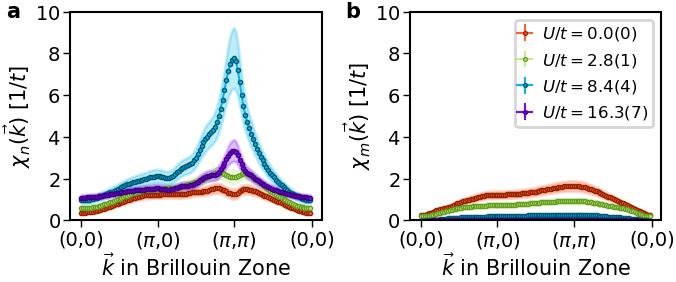

In [34]:
# Do some quick plots to see 
fig, axs = plt.subplots(1,2, figsize=(3.5, 1.25))
# ShowDisplayCoord(fig)

cmapuse = 'rainbow'
legendTextSize=9
iiValsPlt = [7,5,2,0]
# iiValsPlt = [7]
maxYplot = 10

for ii in iiValsPlt:
    colorfracuse = float(ii/len(U_val))
    axs[0].fill_between(inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii]-chargeSusc_traceBZ_fit_errs[ii], chargeSusc_traceBZ_fit_vals[ii]+chargeSusc_traceBZ_fit_errs[ii],
                        color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = 0.25)
for ii in iiValsPlt:
    colorfracuse = float(ii/len(U_val))
    terrbar(axs[0], inds_traceBZ, chargeSusc_traceBZ_fit_vals[ii],ls='-', marker='.', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
for ii in iiValsPlt:
    colorfracuse = float(ii/len(U_val))
    terrbar(axs[1], inds_traceBZ, spinSusc_traceBZ_fit_vals[ii], ls='-', marker='.', colorfrac=colorfracuse, cmap=cmapuse, 
            label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")
    axs[1].fill_between(inds_traceBZ, spinSusc_traceBZ_fit_vals[ii]-spinSusc_traceBZ_fit_errs[ii], spinSusc_traceBZ_fit_vals[ii]+spinSusc_traceBZ_fit_errs[ii], 
                        color=mpl.cm.get_cmap(cmapuse)(colorfracuse), alpha = 0.25)
setlabels(axs[0], ['$\\vec{k}$ in Brillouin Zone', '$\\chi_{n} (\\vec{k})$ [$1/t$]'])
setlims(axs[0], None, [0, maxYplot])
setlabels(axs[1], ['$\\vec{k}$ in Brillouin Zone', '$\\chi_{m} (\\vec{k})$ [$1/t$]'])
setlims(axs[1], None, [0, maxYplot])
axs[1].legend(borderpad = 0.3,  markerscale=0.9, handlelength = 0.5)
axs[0].set_xticks(majorLocs_traceBZ)
axs[0].set_xticklabels(majorLocsNames_traceBZ)
axs[1].set_xticks(majorLocs_traceBZ)
axs[1].set_xticklabels(majorLocsNames_traceBZ)
    
# scalelocofax(axs[0], 0.975,1,-0.025,0)
# scalelocofax(axs[1], 0.975,1,0.025,0)


# Add abc labels
labelsPlots = ['a', 'b']
labelsXoffsets = [-0.25, -0.25]
for labelInd, _ax in enumerate(axs.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')


# plt.tight_layout()
plt.show()

In [35]:
fig.savefig('Figures/SIFigures/Fig_Susceptibilities_vsk.png', dpi=400, bbox_inches='tight')

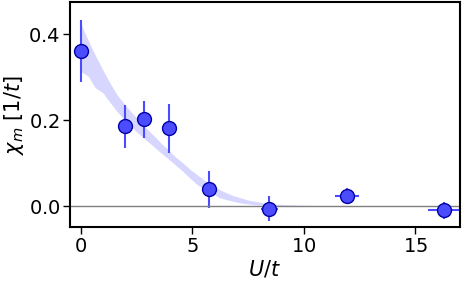

In [38]:
showBackgroundGradientTrueFalse = False
    
fig, axs = plt.subplots(1, figsize=(3.5, 1.5))
legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5

yvals = spinSusc_keq0_halffit_vals
yerrs = spinSusc_keq0_halffit_errs
ymaxPlt = 1.1*(np.max(yvals)+ yerrs[np.argmax(yvals)])
terrbar(axs, U_val, yvals, xerr=U_err, yerr= yerrs, marker='o', ls='', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# terrbar(axs, U_val, np.array(spinSusc_keq0_fit_vals), xerr=U_err,  yerr= np.array(spinSusc_keq0_fit_errs), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 's', hollow = True, label = 'Total, fit')

setlabels(axs, ['$U/t$', '$\\chi_{m}$ [$1/t$]'])
setlims(axs, [xUmin,xUmax], [-0.05,ymaxPlt])
axs.set_xticks([0,5,10,15])
axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)

scalelocofax(axs, 0.66,0.9,0.125,0.1)

if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = axs.get_xlim()
    ylims = axs.get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    #. Generate gradient image 
    sizeForTanh = 5
    shiftLeftTanh= (UOfEb_function(0.35))/(xlims[1]-xlims[0]) # approx 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)


# terrbar(axs, th_chi_U_val, th_chi_val_high, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
axs.fill_between(th_chi_U_val, th_chi_val_low, th_chi_val_high,color=mpl.cm.get_cmap('bwr')(0.4), alpha = 0.8, linewidth=0.0)




plt.show()

In [39]:
fig.savefig('Figures/SIFigures/Fig_SpinSusceptibility.png', dpi=400)

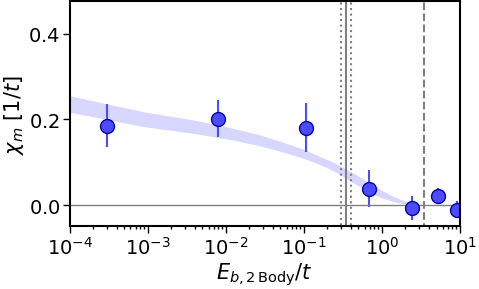

In [40]:
showBackgroundGradientTrueFalse = False
    
fig, axs = plt.subplots(1, figsize=(3.5, 1.5))
legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5

yvals = spinSusc_keq0_halffit_vals
yerrs = spinSusc_keq0_halffit_errs
ymaxPlt = 1.1*(np.max(yvals)+ yerrs[np.argmax(yvals)])

# terrbar(axs, U_val, yvals, xerr=U_err, yerr= yerrs, marker='o', ls='', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')


terrbar(axs, EbOfU_function(U_val[:-1]), yvals[:-1], yerr=yerrs[:-1], marker='o', ls='', cmap = 'bwr', ms = 5, colorfrac= colorfracBlue, label = 'Total')

# terrbar(axs, U_val, np.array(spinSusc_keq0_fit_vals), xerr=U_err,  yerr= np.array(spinSusc_keq0_fit_errs), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 's', hollow = True, label = 'Total, fit')

setlabels(axs, ['$E_{b, {\\rm 2\\, Body}}/t$', '$\\chi_{m}$ [$1/t$]'])
setlims(axs, [0.0001,10], [-0.05,ymaxPlt])
# axs.set_xticks([0,5,10,15])
axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)

scalelocofax(axs, 0.66,0.9,0.125,0.1)

if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = axs.get_xlim()
    ylims = axs.get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    #. Generate gradient image 
    sizeForTanh = 5
    shiftLeftTanh= (UOfEb_function(0.35))/(xlims[1]-xlims[0]) # approx 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)


# terrbar(axs, th_chi_U_val, th_chi_val_high, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')

thStartLoc = 2
axs.fill_between(EbOfU_function(th_chi_U_val[thStartLoc:]), th_chi_val_low[thStartLoc:], th_chi_val_high[thStartLoc:],color=mpl.cm.get_cmap('bwr')(0.4), alpha = 0.8, linewidth=0.0)

# T/t 
axs.vlines(0.35,-10,10,color = 'gray')
axs.vlines(0.4,-10,10,color = 'gray', ls = 'dotted')
axs.vlines(0.3,-10,10,color = 'gray', ls = 'dotted')

# TF/t 
axs.vlines(3.5,-10,10,color = 'gray', ls = 'dashed')

axs.set_xscale('log')

plt.show()


In [41]:
fig.savefig('Figures/SIFigures/Fig_SpinSusceptibilityVsEb.png', dpi=400)

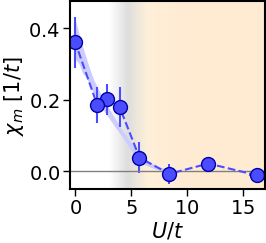

In [42]:
showBackgroundGradientTrueFalse = True
    
fig, axs = plt.subplots(1, figsize=(3.5/2, 1.25))
legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5

yvals = spinSusc_keq0_halffit_vals
yerrs = spinSusc_keq0_halffit_errs
ymaxPlt = 1.1*(np.max(yvals)+ yerrs[np.argmax(yvals)])
terrbar(axs, U_val, yvals, xerr=U_err, yerr= yerrs, marker='o', ls='dashed', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# terrbar(axs, U_val, np.array(spinSusc_keq0_fit_vals), xerr=U_err,  yerr= np.array(spinSusc_keq0_fit_errs), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 's', hollow = True, label = 'Total, fit')

setlabels(axs, ['$U/t$', '$\\chi_{m}$ [$1/t$]'])
setlims(axs, [xUmin,xUmax], [-0.05,ymaxPlt])
axs.set_xticks([0,5,10,15])
axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)

scalelocofax(axs, 0.66,0.9,0.125,0.1)

if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = axs.get_xlim()
    ylims = axs.get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    #. Generate gradient image 
    sizeForTanh = 5
    shiftLeftTanh= (UOfEb_function(0.35))/(xlims[1]-xlims[0]) # approx 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)
    
# terrbar(axs, th_chi_U_val, th_chi_val_high, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
axs.fill_between(th_chi_U_val, th_chi_val_low, th_chi_val_high,color=mpl.cm.get_cmap('bwr')(0.4), alpha = 1, linewidth=0.0)


plt.show()

fig.savefig('Figures/SIFigures/Fig_SpinSusceptibility_mini.png', dpi=400, bbox_inches = 'tight')

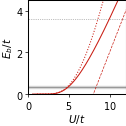

In [28]:
showBackgroundGradientTrueFalse = False
nTestEf = 0.8 
EfTest = np.abs(function_EFermiOfnTot(nTestEf))
    
fig, axs = plt.subplots(1, figsize=(3.5/2, 1.25))
legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5

yvals =  EbOfU_Eb
xvals = EbOfU_U
yvals2 = EbOfU_U-8
ymaxPlt = 4.5
terrbar(axs, xvals, yvals, marker='', ls='-', colorfrac=0.8, cmap='OrRd', ms= 5,label = '$k=(0,0)$')
terrbar(axs, xvals, yvals2, marker='', ls='dashed', colorfrac=0.8, cmap='OrRd', lw=0.5, ms= 5,label = '$k=(0,0)$')
# terrbar(axs, U_val, np.array(spinSusc_keq0_fit_vals), xerr=U_err,  yerr= np.array(spinSusc_keq0_fit_errs), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 's', hollow = True, label = 'Total, fit')


terrbar(axs,  UofEb_Analytictab,ApproxEb_Analytictab, marker='', ls='dotted', colorfrac=0.8, cmap='OrRd', ms= 5,label = '$E_{b, {\\rm 2 body}}/2$ ApproxAnalytic')

axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
axs.hlines(EfTest,-2,25, color = 'gray', linewidth = linewidth0, ls = 'dotted')
axs.hlines(0.35,-2,25, color = 'gray', linewidth = linewidth0)
axs.fill_between([-2,25],[0.3,0.3], [0.4,0.4], color = 'lightgray')

scalelocofax(axs, 0.66,0.9,0.125,0.1)

setlabels(axs, ['$U/t$', '$E_{b}/t$'])
axs.set_xticks([0,5,10,15])
axs.set_yticks([0,2,4,6,8])
setlims(axs, [ 0,12], [0,4.5])
# setlims(axs, [3,7], [0,1])
# axs.set_yscale('log')

# # Add inset
# axs1pos_bbox = axs.get_position()
# scaleHeight = 0.35
# scaleWidth = 0.4
# shiftUp = 0.6
# shiftRight= 0.22
# axNew2 = fig.add_axes([axs1pos_bbox.x0+shiftRight*axs1pos_bbox.width,axs1pos_bbox.y0+shiftUp*axs1pos_bbox.height,axs1pos_bbox.width*scaleWidth, axs1pos_bbox.height*(scaleHeight)])

# terrbar(axNew2, xvals, yvals, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# terrbar(axNew2, xvals, yvals2, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# axNew2.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
# axNew2.hlines(4,-2,25, color = 'gray', linewidth = linewidth0)
# axNew2.hlines(0.35,-2,25, color = 'gray', linewidth = linewidth0)
# axNew2.fill_between([-2,25],[0.3,0.3], [0.4,0.4], color = 'lightgray')
# # setlabels(axNew2, ['$U/t$', 'Singlon\nFraction'])
# axNew2.set_xticks([3,5,7])
# axNew2.set_yticks([0,0.4])
# setlims(axNew2,[3,6.5], [0,0.75])

axs.yaxis.label.set_color('black') 

if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = axs.get_xlim()
    ylims = axs.get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    #. Generate gradient image 
    sizeForTanh = 5
    shiftLeftTanh= (UOfEb_function(0.35))/(xlims[1]-xlims[0]) # approx 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)

plt.show()

fig.savefig('Figures/SIFigures/Fig_2BodyBindingEnergy.png', dpi=400, bbox_inches = 'tight')

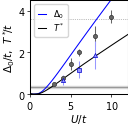

In [29]:
# Generate data 

TempTest = 0.0001
nTest = 0.8
UmaxCalc = 16

# Plot Delta and T* and mean field and Eb and mu stuff, and analytic approximations 
UmaxPlt = 12
EmaxPlt = 4.5

EfTest = np.abs(function_EFermiOfnTot(nTest))

# Tstartab = np.array([FH_get_Tstar_vs_Uandden(Uval, nTest) for Uval in Utab]) # This one is slow
TstartabIn = np.linspace(0.0000000000001, 1,400)**3*EmaxPlt
Tstartab, Ustartab, denstartab = np.vectorize(FH_get_Ustar_vs_denAndTstar)(nTest, TstartabIn)

Utab = np.linspace(0.01,1,40)**2.5*UmaxCalc # np.linspace(0.1,UmaxCalc,10)

muMeanFieldNeglectedAndDeltatab = np.array([FH_get_muMeanFieldNeglectedAndDelta_vs_UanddenAndTemp(Uval, nTest,TempTest) for Uval in Utab])
Deltatab = muMeanFieldNeglectedAndDeltatab[:,1]
muMeanFieldNeglectedtab = muMeanFieldNeglectedAndDeltatab[:,0]
mutab = muMeanFieldNeglectedtab - Utab*nTest/2.0

dataMarkersize = 3
SingerUovt8_Delta = 3.75/2.0 
SingerUovt6_Delta = 2.35/2.0
SingerUovt4_Delta = 1.33/2.0 # about 35% error on each of these 
SingerErrorScaling = 0.35

Fontenele_Uovt_vals = [3,4,5,6,8,10]
Fontenele_Tstar_vals = [0.5,0.77,1.44,2,2.79,3.71]
Fontenele_Tstar_errs = np.array([0.1,0.06,0.57,0.34,0.94,0.59])/2.0 # I extracted full error bar width, divide by 2 so plotted bar is right height

######################## Plot ######################## 
fig, axs =  plt.subplots(1, figsize=(1.75, 1.25))
colorfracRed = 0.85
colorfracBlue = 0.15
linewidth0 = 0.5
msglob = 0

scalelocofax(axs, 0.66,0.9,0.125,0.1)

axs.plot(Utab, Deltatab, marker='', ls='-',color = 'blue',  ms= msglob,label = '$\\Delta_0$')

cfracTstar = 0.01
axs.plot(Ustartab, Tstartab, marker='', ls='-', color='black', ms= msglob,label = '$T^*$')


# Fontenele data
terrbar(axs, Fontenele_Uovt_vals, Fontenele_Tstar_vals, yerr= Fontenele_Tstar_errs, marker='o', ls='', colorfrac=0.4, cmap='gray', ms= dataMarkersize,label = '')#  '$T^*$ Fontenele2022')

# Singer data
terrbar(axs, [6], [SingerUovt6_Delta], yerr= [SingerErrorScaling*SingerUovt6_Delta], marker='s', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize/1.2,label = '')# '$\\Delta_0$ Singer98')
terrbar(axs, [4,8], [SingerUovt4_Delta, SingerUovt8_Delta], yerr= [SingerErrorScaling*SingerUovt4_Delta, SingerErrorScaling*SingerUovt8_Delta], marker='^', ls='', colorfrac=0.3, cmap='bwr', ms= dataMarkersize,label = '')# '$\\Delta_0$ Singer96')


axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
axs.hlines(EfTest,-2,25, color = 'gray', linewidth = linewidth0, ls = 'dotted')
axs.hlines(0.35,-2,25, color = 'gray', linewidth = linewidth0)
axs.fill_between([-2,25],[0.3,0.3], [0.4,0.4], color = 'lightgray')

axs.set_xlabel('$U/t$')
axs.set_ylabel('$\\Delta_0/t$,  ${T^*}\\!\\!/t$')
axs.set_xlim([0,UmaxPlt])
axs.set_ylim( [0,EmaxPlt])
axs.legend(labelspacing=0.1, handlelength = 1)

plt.show()


fig.savefig('Figures/SIFigures/Fig_MeanFieldEnergies.png', dpi=400, bbox_inches = 'tight', transparent=True)

In [44]:
# showBackgroundGradientTrueFalse = True
    
# fig, axs = plt.subplots(1, figsize=(4,2))
# legendTextSize = 9
# colorfracRed = 0.85
# colorfracBlue = 0.15
# xUmin = -0.5
# xUmax = 17
# linewidth0 = 0.5

# TfPlot = 3.8
# TPlot= 0.35
# xvals = EbOfU_U
# yvals =  (np.tanh((EbOfU_Eb-TPlot)/TPlot) +  1)/2
# yvals2 = (np.tanh((EbOfU_Eb-TfPlot)/TPlot) +  1)/2
# yvals3 = EbOfU_Eb
# ymaxPlt = 1.1
# terrbar(axs, xvals, yvals, marker='', ls='-', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# terrbar(axs, xvals, yvals2, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# # terrbar(axs, xvals, yvals3, marker='', ls='dotted', colorfrac=colorfracBlue, cmap='bwr', ms= 5,label = '$k=(0,0)$')
# # terrbar(axs, U_val, np.array(spinSusc_keq0_fit_vals), xerr=U_err,  yerr= np.array(spinSusc_keq0_fit_errs), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 's', hollow = True, label = 'Total, fit')

# axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)

# axs.hlines(4,-2,25, color = 'gray', linewidth = linewidth0, ls = 'dotted')

# axs.hlines(0.35,-2,25, color = 'gray', linewidth = linewidth0)
# axs.fill_between([-2,25],[0.3,0.3], [0.4,0.4], color = 'lightgray')

# scalelocofax(axs, 0.66,0.9,0.125,0.1)

# setlabels(axs, ['$U/t$', '$Tanh((E_{b}-T)/T)$'])
# axs.set_xticks([0,5,10,15])
# axs.set_yticks([0,4,8])
# setlims(axs, [xUmin,xUmax], [-0.05,ymaxPlt])
# # setlims(axs, [3,7], [0,1])
# # axs.set_yscale('log')

# axs.yaxis.label.set_color('blue') 

# if showBackgroundGradientTrueFalse:
#     # Add background gradient for pairing
#     xlims = axs.get_xlim()
#     ylims = axs.get_ylim()
#     plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
#     newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
#     newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
#     #. Generate gradient image 
#     sizeForTanh = 5
#     shiftLeftTanh= (UOfEb_function(0.35))/(xlims[1]-xlims[0]) # approx 0.3
#     testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
#     testArrOnes = np.ones(100)
#     fakeGradientImage = np.outer(testArrOnes,testArr)
#     axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)

# plt.show()

# # fig.savefig('Figures/SIFigures/Fig_2BodyBindingEnergy.png', dpi=400, bbox_inches = 'tight')

## Polaron analysis

In [23]:
def read_polaron_corrs(list3Names, d0to1, d1to2):
    ni_vals = []
    nj_vals = []
    nk_vals = []
    njk_vals = []
    cjk_vals = []
    cijk_vals = []
    nj_condi_vals = []
    nk_condi_vals = []
    njk_condi_vals = []
    cjk_condi_vals = []
    
    ni_errs = []
    nj_errs = []
    nk_errs = []
    njk_errs = []
    cjk_errs = []
    cijk_errs = []
    nj_condi_errs = []
    nk_condi_errs = []
    njk_condi_errs = []
    cjk_condi_errs = []
    
    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]

        postFixLabel = '_disp0to1_'+str(d0to1[0])+str(d0to1[1])+'_disp1to2_'+str(d1to2[0])+str(d1to2[1])
        fname = 'polaron_'+list3Names+postFixLabel+'_U={}({}).npy'.format(dset['U'][0], dset['U'][1])
        [[ni_val,nj_val,nk_val,njk_val,cjk_val,cijk_val,nj_condi_val,nk_condi_val,njk_condi_val,cjk_condi_val], 
         [ni_err,nj_err,nk_err,njk_err,cjk_err,cijk_err,nj_condi_err,nk_condi_err,njk_condi_err,cjk_condi_err]] = np.load(os.path.join(data_dir, fname))
        ni_vals.append(ni_val)
        nj_vals.append(nj_val)
        nk_vals.append(nk_val)
        njk_vals.append(njk_val)
        cjk_vals.append(cjk_val)
        cijk_vals.append(cijk_val)
        nj_condi_vals.append(nj_condi_val)
        nk_condi_vals.append(nk_condi_val)
        njk_condi_vals.append(njk_condi_val)
        cjk_condi_vals.append(cjk_condi_val)
        ni_errs.append(ni_err)
        nj_errs.append(nj_err)
        nk_errs.append(nk_err)
        njk_errs.append(njk_err)
        cjk_errs.append(cjk_err)
        cijk_errs.append(cijk_err)
        nj_condi_errs.append(nj_condi_err)
        nk_condi_errs.append(nk_condi_err)
        njk_condi_errs.append(njk_condi_err)
        cjk_condi_errs.append(cjk_condi_err)
        
    return [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
         [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]

def get_distToCentArr(dispArr):
    distToCentArr = []
    for _dispVals in dispArr:
        d0to1 = _dispVals[0]
        d1to2 = _dispVals[1]

        d0tocent = np.array(d0to1) + np.array(d1to2)/2.0
        distToCentArr.append(np.sqrt(d0tocent[0]**2 + d0tocent[1]**2))
    distToCentArr= np.array(distToCentArr)
    return distToCentArr 

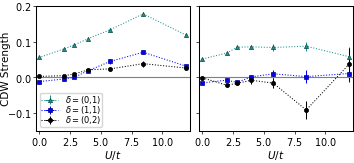

In [24]:
list3Names = 'singlon_p_dh_p_dh'
dispArrMaster = [[[0,1], [1,0]],
                 [[0,1], [1,-1]],
                 [[0,1], [0,-2]]
            ]
dispArrLabels = ['(0,1)', '(1,1)', '(0,2)']
symbolArr = ['^', 's', 'o']

colorFracArr = [0.5, 0.25, 0.0]
cmapArr= ['viridis', 'gnuplot2', 'gnuplot2']

fig, axs = plt.subplots(1, 2, figsize=(3.75, 1.5))
# ShowDisplayCoord(fig)
for _dispInd, disp in enumerate(dispArrMaster):
    d0to1 = disp[0]
    d1to2 = disp[1]
    [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
        [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)


    colorfracUse = _dispInd/len(dispArrMaster)

    # normalize y vals
    xvals = U_val
    rectifier_d1to2 = (-1)**(np.abs(d1to2[0]+d1to2[1]))
    
    y1vals = rectifier_d1to2*np.array(cijk_vals)/np.array(ni_vals)
    y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2 + (np.array(ni_errs)/np.array(ni_vals))**2)
    
    y2vals = rectifier_d1to2*np.array(cjk_vals)
    y2errs = np.array(cjk_errs)
    
    y3vals = y1vals + y2vals 
    y3errs = np.sqrt(y1errs**2 + y2errs**2)
    
    lastIndToDisplay = 1

    axIndNow = 0
    terrbar(axs[axIndNow], xvals[lastIndToDisplay:], y2vals[lastIndToDisplay:], yerr= y2errs[lastIndToDisplay:], ls='dotted', marker=symbolArr[_dispInd], 
            colorfrac=colorFracArr[_dispInd], cmap=cmapArr[_dispInd], label = '$\\delta=$'+dispArrLabels[_dispInd])
    axs[axIndNow].hlines(0,-0.25,12.25, color = 'gray', ls='-')
    setlims(axs[axIndNow], [-0.25,12.25], [-0.15,0.2])
    setlabels(axs[axIndNow], ['$U/t$', '']) # $\\langle (d_j-h_j)(d_k-h_k)\\rangle_c$
    axs[axIndNow].legend( loc = 'lower left', labelspacing=-0.2, borderpad = 0.1)
    axs[axIndNow].set_ylabel('CDW Strength', labelpad = -3)
    
    axIndNow = 1
    terrbar(axs[axIndNow], xvals[lastIndToDisplay:], y3vals[lastIndToDisplay:], yerr= y3errs[lastIndToDisplay:], ls='dotted', marker=symbolArr[_dispInd], 
            colorfrac=colorFracArr[_dispInd], cmap=cmapArr[_dispInd], label = '$\\delta=$'+dispArrLabels[_dispInd])
    axs[axIndNow].hlines(0,-0.25,12.25, color = 'gray', ls='-')
    setlims(axs[axIndNow], [-0.25,12.25], [-0.15,0.2])
    axs[axIndNow].set_yticklabels([])
    setlabels(axs[axIndNow], ['$U/t$', '']) # $\\langle (d_j-h_j)(d_k-h_k)\\rangle_c$
    # axs[axIndNow].legend( loc = 'lower left')



fig.subplots_adjust(wspace=0.06)

plt.show()

fig.savefig('Figures/Polaron/Fig_Polaron_vsUovert.png', dpi=400, bbox_inches='tight')

$U/t$ =  8.44


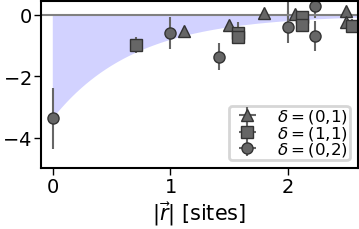

In [47]:
# Plot things vs distance to COM of second correlators 

def extract_val_vsCOMdist(list3Names, whichUovertInd, dispArr, rectifyYesNo = False):
    distToCentArr= get_distToCentArr(dispArr)
    val1Arr = []
    err1Arr = []
    val2Arr = []
    err2Arr = []
    val3Arr = []
    err3Arr = []
    for _dispVals in dispArr:
        d0to1 = _dispVals[0]
        d1to2 = _dispVals[1]

        overallPltyscale = 1.5

        [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
                 [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)

        # Rectify 3 point correlator based on d1to2
        if rectifyYesNo:
            cijk_vals = np.array(cijk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
            cjk_vals = np.array(cjk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
        
        y1vals = (np.array(cijk_vals))/np.array(ni_vals)
        y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2+(np.array(ni_errs)/np.array(ni_vals))**2)

        y2vals = np.array(cjk_vals)
        y2errs = np.array(cjk_errs)
        
        y3vals = y1vals/y2vals
        y3errs = np.abs(y1vals/y2vals)*np.sqrt((y1errs/y1vals)**2 + (y2errs/y2vals)**2)
        
        val1Arr.append(y1vals[whichUovertInd])
        err1Arr.append(y1errs[whichUovertInd])
        val2Arr.append(y2vals[whichUovertInd])
        err2Arr.append(y2errs[whichUovertInd])
        val3Arr.append(y3vals[whichUovertInd])
        err3Arr.append(y3errs[whichUovertInd])
    val1Arr = np.array(val1Arr)
    err1Arr = np.array(err1Arr)
    val2Arr = np.array(val2Arr)
    err2Arr = np.array(err2Arr)
    val3Arr = np.array(val3Arr)
    err3Arr = np.array(err3Arr)
    return distToCentArr, val1Arr, err1Arr, val2Arr, err2Arr, val3Arr, err3Arr


dispArr01 = [[[0,1], [1,0]],
           [[0,2], [1,0]],
           [[1,0], [1,0]],
           [[2,0], [1,0]],
           [[1,1], [1,0]],
           [[1,2], [1,0]]
            ]
dispArr11 = [[[0,1], [1,-1]],
           [[0,2], [1,-1]],
           [[0,1], [1,1]],
           [[0,2], [1,1]],
           [[1,1], [1,1]],
           [[1,2], [1,-1]]
            ]
dispArr02 = [[[0,1], [0,-2]],
           [[1,1], [0,-2]],
           [[1,2], [0,-2]],
           [[2,1], [0,-2]],
           [[1,0], [2,0]],
           [[2,2], [0,-2]],
           [[1,3], [0,-2]],
           [[2,3], [0,-2]]
            ]

dispArrMaster = [dispArr01, dispArr11, dispArr02]
dispArrLabels = ['(0,1)', '(1,1)', '(0,2)']
symbolArr = ['^', 's', 'o']
list3Names = 'singlon_p_dh_p_dh'
whichUovertInd = 2
maxValInPlot = 0

fig, axs = plt.subplots(1, figsize=(3.75/2, 1.0))
# ShowDisplayCoord(fig)

print('$U/t$ = ',U_val[whichUovertInd])
for _dispArrInd, dispArr in enumerate(dispArrMaster) :
    xvals, y1vals, y1errs, y2vals, y2errs, y3vals, y3errs= extract_val_vsCOMdist(list3Names, whichUovertInd, dispArr, rectifyYesNo = True)

    colorfracUse = 0.4
    terrbar(axs, xvals, y3vals, yerr= y3errs, ls='', marker=symbolArr[_dispArrInd], ms = 4.0, colorfrac=colorfracUse, cmap='gray', label = '$\\delta=$'+dispArrLabels[_dispArrInd])

    maxValInPlot = max(maxValInPlot, np.max(np.abs(y3vals)))
    
# Make guide to eye to fill between shaded area. 
decayLength = 0.7
decayAmp = -maxValInPlot
xguide = np.linspace(0,5, 200)
yguide = decayAmp*np.exp(-xguide/decayLength)
axs.fill_between(xguide, yguide, np.array(yguide)*0, linewidth = 0,
                            color=mpl.cm.get_cmap('bwr')(colorfracBlue), alpha = 0.25)
    
axs.hlines(0,-1,3, color = 'gray', ls='-')
setlims(axs, [-0.1,2.6], [-5,0.45])
setlabels(axs, ['$|\\vec{r}|$ [sites]', ''])
axs.set_yticks([-4,-2,0])
axs.legend( loc = 'lower right', labelspacing=-0.1, borderpad = 0.1)
plt.show()
fig.savefig('Figures/Polaron/Fig_Polaron_RelativeChangeVsDistance.png', dpi=400, bbox_inches='tight')

$U/t$ =  8.44


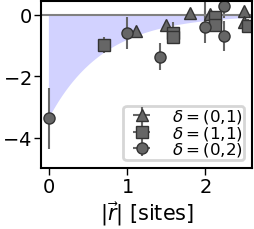

In [48]:
# Plot things vs distance to COM of second correlators 

def extract_val_vsCOMdist(list3Names, whichUovertInd, dispArr, rectifyYesNo = False):
    distToCentArr= get_distToCentArr(dispArr)
    val1Arr = []
    err1Arr = []
    val2Arr = []
    err2Arr = []
    val3Arr = []
    err3Arr = []
    for _dispVals in dispArr:
        d0to1 = _dispVals[0]
        d1to2 = _dispVals[1]

        overallPltyscale = 1.5

        [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
                 [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)

        # Rectify 3 point correlator based on d1to2
        if rectifyYesNo:
            cijk_vals = np.array(cijk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
            cjk_vals = np.array(cjk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
        
        y1vals = (np.array(cijk_vals))/np.array(ni_vals)
        y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2+(np.array(ni_errs)/np.array(ni_vals))**2)

        y2vals = np.array(cjk_vals)
        y2errs = np.array(cjk_errs)
        
        y3vals = y1vals/y2vals
        y3errs = np.abs(y1vals/y2vals)*np.sqrt((y1errs/y1vals)**2 + (y2errs/y2vals)**2)
        
        val1Arr.append(y1vals[whichUovertInd])
        err1Arr.append(y1errs[whichUovertInd])
        val2Arr.append(y2vals[whichUovertInd])
        err2Arr.append(y2errs[whichUovertInd])
        val3Arr.append(y3vals[whichUovertInd])
        err3Arr.append(y3errs[whichUovertInd])
    val1Arr = np.array(val1Arr)
    err1Arr = np.array(err1Arr)
    val2Arr = np.array(val2Arr)
    err2Arr = np.array(err2Arr)
    val3Arr = np.array(val3Arr)
    err3Arr = np.array(err3Arr)
    return distToCentArr, val1Arr, err1Arr, val2Arr, err2Arr, val3Arr, err3Arr


dispArr01 = [[[0,1], [1,0]],
           [[0,2], [1,0]],
           [[1,0], [1,0]],
           [[2,0], [1,0]],
           [[1,1], [1,0]],
           [[1,2], [1,0]]
            ]
dispArr11 = [[[0,1], [1,-1]],
           [[0,2], [1,-1]],
           [[0,1], [1,1]],
           [[0,2], [1,1]],
           [[1,1], [1,1]],
           [[1,2], [1,-1]]
            ]
dispArr02 = [[[0,1], [0,-2]],
           [[1,1], [0,-2]],
           [[1,2], [0,-2]],
           [[2,1], [0,-2]],
           [[1,0], [2,0]],
           [[2,2], [0,-2]],
           [[1,3], [0,-2]],
           [[2,3], [0,-2]]
            ]

dispArrMaster = [dispArr01, dispArr11, dispArr02]
dispArrLabels = ['(0,1)', '(1,1)', '(0,2)']
symbolArr = ['^', 's', 'o']
list3Names = 'singlon_p_dh_p_dh'
whichUovertInd = 2
maxValInPlot = 0

fig, axs = plt.subplots(1, figsize=(3.75/3, 1.0))
# ShowDisplayCoord(fig)

print('$U/t$ = ',U_val[whichUovertInd])
for _dispArrInd, dispArr in enumerate(dispArrMaster) :
    xvals, y1vals, y1errs, y2vals, y2errs, y3vals, y3errs= extract_val_vsCOMdist(list3Names, whichUovertInd, dispArr, rectifyYesNo = True)

    colorfracUse = 0.4
    terrbar(axs, xvals, y3vals, yerr= y3errs, ls='', marker=symbolArr[_dispArrInd], ms = 4.0, colorfrac=colorfracUse, cmap='gray', label = '$\\delta=$'+dispArrLabels[_dispArrInd])

    maxValInPlot = max(maxValInPlot, np.max(np.abs(y3vals)))
    
# Make guide to eye to fill between shaded area. 
decayLength = 0.7
decayAmp = -maxValInPlot
xguide = np.linspace(0,5, 200)
yguide = decayAmp*np.exp(-xguide/decayLength)
axs.fill_between(xguide, yguide, np.array(yguide)*0, linewidth = 0,
                            color=mpl.cm.get_cmap('bwr')(colorfracBlue), alpha = 0.25)
    
axs.hlines(0,-1,3, color = 'gray', ls='-')
setlims(axs, [-0.1,2.6], [-5,0.45])
setlabels(axs, ['$|\\vec{r}|$ [sites]', ''])
axs.set_yticks([-4,-2,0])
axs.legend( loc = 'lower right', labelspacing=-0.1, borderpad = 0.1)
plt.show()
fig.savefig('Figures/Polaron/Fig_Polaron_RelativeChangeVsDistance_mini.png', dpi=400, bbox_inches='tight')

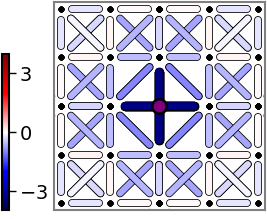

In [49]:
# Plot things vs distance to COM of second correlators 

def extract_val_vs_dispArr(list3Names, whichUovertInd, dispArr, rectifyYesNo = False):
    distToCentArr= get_distToCentArr(dispArr)
    val1Arr = []
    err1Arr = []
    val2Arr = []
    err2Arr = []
    val3Arr = []
    err3Arr = []
    for _dispVals in dispArr:
        d0to1 = _dispVals[0]
        d1to2 = _dispVals[1]

        overallPltyscale = 1.5

        [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
                 [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)

        # Rectify 3 point correlator based on d1to2
        if rectifyYesNo:
            cijk_vals = np.array(cijk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
            cjk_vals = np.array(cjk_vals)*(-1)**(np.abs(d1to2[0]+d1to2[1]))
        
        y1vals = (np.array(cijk_vals))/np.array(ni_vals)
        y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2+(np.array(ni_errs)/np.array(ni_vals))**2)

        y2vals = np.array(cjk_vals)
        y2errs = np.array(cjk_errs)
        
        y3vals = y1vals/y2vals
        y3errs = np.abs(y1vals/y2vals)*np.sqrt((y1errs/y1vals)**2 + (y2errs/y2vals)**2)
        
        val1Arr.append(y1vals[whichUovertInd])
        err1Arr.append(y1errs[whichUovertInd])
        val2Arr.append(y2vals[whichUovertInd])
        err2Arr.append(y2errs[whichUovertInd])
        val3Arr.append(y3vals[whichUovertInd])
        err3Arr.append(y3errs[whichUovertInd])
    val1Arr = np.array(val1Arr)
    err1Arr = np.array(err1Arr)
    val2Arr = np.array(val2Arr)
    err2Arr = np.array(err2Arr)
    val3Arr = np.array(val3Arr)
    err3Arr = np.array(err3Arr)
    return val1Arr, err1Arr, val2Arr, err2Arr, val3Arr, err3Arr


def get_symmetry_permutation(d):
    _d = d
    rx = [[-1, 0], [0, 1]]
    rx = [[1, 0], [0, -1]]
    c4 = [[0, -1], [1, 0]]
    for ii in range(2):
        _d = np.dot(rx, _d)
        for jj in range(4):
            yield list(_d)
            _d  = np.dot(c4, _d)

list3Names = 'singlon_p_dh_p_dh'
whichUovertInd = 2
overallYScale = 4.0
pltxyScale = 2.15;

overallMarkerSize = 1
cmap0to1 = plt.get_cmap('seismic')

dispArr01 = [[[0,1], [1,0]],
           [[0,2], [1,0]],
           [[1,0], [1,0]],
           [[2,0], [1,0]],
           [[1,1], [1,0]],
           [[1,2], [1,0]]
            ]
dispArr11 = [[[0,1], [1,-1]],
           [[0,2], [1,-1]],
           [[0,1], [1,1]],
           [[0,2], [1,1]],
           [[1,1], [1,1]],
           [[1,2], [1,-1]]
            ]
dispArr02 = [[[0,1], [0,-2]],
           [[1,1], [0,-2]],
           [[1,2], [0,-2]],
           [[2,1], [0,-2]],
           [[1,0], [2,0]],
           [[2,2], [0,-2]],
           [[1,3], [0,-2]],
           [[2,3], [0,-2]]
            ]

dispArr02 = [[[0,1], [0,-2]]
            ]

dispArrMaster = [dispArr01, dispArr11, dispArr02]


fig, axs = plt.subplots(1, figsize=(1.25,1.25))
# ShowDisplayCoord(fig)

for _dispArrInd, dispArr in reversed(list(enumerate(dispArrMaster))):
    y1vals, y1errs, y2vals, y2errs, y3vals, y3errs = extract_val_vs_dispArr(list3Names, whichUovertInd, dispArr, rectifyYesNo = True)

    axs.set_xticks([])
    axs.set_yticks([])
    # axs[axIndNow].patch.set_facecolor('white')
    
    for _dispInd, _disp in reversed(list(enumerate(dispArr))):
        d0to1 =_disp[0]
        d1to2 =_disp[1]

        d0to1_permArr = np.array(list(get_symmetry_permutation(_disp[0])))
        d0to2_permArr = np.array(list(get_symmetry_permutation(np.array(_disp[0]) + np.array(_disp[1]))))

        d1to2_permArr = d0to2_permArr - d0to1_permArr
        dispArrSymmetrized = np.array(list(zip(d0to1_permArr,d1to2_permArr)))

        valPlt_0 = y3vals[_dispInd]/overallYScale/2 + 0.5

        for _dispSym in dispArrSymmetrized:
            d0to1 =_dispSym[0]
            d1to2 =_dispSym[1]

            barPltx, barPlty =[d0to1[0],d0to1[0]+d1to2[0]],[d0to1[1], d0to1[1]+d1to2[1]]
            barCenterPltx, barCenterPlty = [(barPltx[0]+barPltx[1])/2.0],[(barPlty[0]+barPlty[1])/2.0]
            
            # Move the x and y points slightly closer to the center points 
            scaleFactorLength = 0.55
            scaleFactorWidthAgain = 1.3
            scaleFactorWidth = 1*scaleFactorWidthAgain
            
            if _dispArrInd == 1:
                scaleFactorLength = 0.6
                scaleFactorWidth = 1*scaleFactorWidthAgain
            if _dispArrInd == 2:
                scaleFactorLength = 0.7
                scaleFactorWidth = 1.2*scaleFactorWidthAgain
            barPltx[0] += (barCenterPltx-barPltx[0])*(1-scaleFactorLength)
            barPltx[1] += (barCenterPltx-barPltx[1])*(1-scaleFactorLength)
            barPlty[0] += (barCenterPlty-barPlty[0])*(1-scaleFactorLength)
            barPlty[1] += (barCenterPlty-barPlty[1])*(1-scaleFactorLength)

            outerBlackScale = 1.25
            axs.plot(barPltx, barPlty, marker = '', linestyle = '-', linewidth=overallMarkerSize*1.75*outerBlackScale*scaleFactorWidth, 
                                 ms=overallMarkerSize*1.75*outerBlackScale*scaleFactorWidth, color = 'black', alpha = 1,solid_capstyle='round')
            axs.plot(barPltx, barPlty, marker = '', linestyle = '-', linewidth=overallMarkerSize*1.75*scaleFactorWidth, 
                                 ms=overallMarkerSize*1.75*scaleFactorWidth,  
                                 color = cmap0to1(valPlt_0), alpha = 1,solid_capstyle='round')
        
        # Add grid points
        for _xloc in range(int(np.floor(pltxyScale)+1)):
            for _yloc in range(int(np.floor(pltxyScale)+1)):
                axs.plot([_xloc,_xloc,-_xloc,-_xloc],[_yloc,-_yloc,_yloc,-_yloc], marker = 'o', ls='', color = 'black',  markersize = overallMarkerSize*1.5)
        # Add origin
        axs.plot([0],[0], marker = '.', color = 'black', markersize = overallMarkerSize*10.5) # Origin 
        axs.plot([0],[0], marker = '.', color = 'purple', markersize = overallMarkerSize*7.5) # Origin 
        
    setlims(axs,[-pltxyScale,pltxyScale],[-pltxyScale,pltxyScale])
    spineCol = 'gray'
    axs.spines['bottom'].set_color(spineCol)
    axs.spines['top'].set_color(spineCol) 
    axs.spines['right'].set_color(spineCol)
    axs.spines['left'].set_color(spineCol)

fig.subplots_adjust(wspace=0.05, hspace=0.05)

# Add colorbar 
fig.canvas.draw() # have to draw before get position 
# pos = axs[0].get_position()
# cb_fracwidth = 0.05
# cb_offset = 1
# axNew = fig.add_axes([pos.x0,pos.y0+pos.height+cb_offset*pos.height*cb_fracwidth,pos.width, pos.height*cb_fracwidth])
# # fig.colorbar(imgPlot_n, cax=axNew)
# cbar = mpl.colorbar.ColorbarBase(axNew, cmap=cmap0to1,
#                        norm=mpl.colors.Normalize(vmin=-overallYScale, vmax=overallYScale),orientation='horizontal')
# axNew.xaxis.set_ticks_position('top')

# pos = axs.get_position()
# cb_fracwidth = 0.035
# cb_offset = -2
# axNew = fig.add_axes([pos.x0,pos.y0+cb_offset*pos.height*cb_fracwidth,pos.width, pos.height*cb_fracwidth])
# # fig.colorbar(imgPlot_n, cax=axNew)
# cbar = mpl.colorbar.ColorbarBase(axNew, cmap=cmap0to1,
#                        norm=mpl.colors.Normalize(vmin=-overallYScale, vmax=overallYScale),orientation='horizontal')
# axNew.xaxis.set_ticks_position('bottom')
# cbar.set_ticks([-3,0,3])

pos = axs.get_position()
cb_fracwidth = 0.035
cb_offset = -7
axNew = fig.add_axes([pos.x0+cb_offset*pos.width*cb_fracwidth,pos.y0,pos.width*cb_fracwidth, pos.height*0.75])
# fig.colorbar(imgPlot_n, cax=axNew)
cbar = mpl.colorbar.ColorbarBase(axNew, cmap=cmap0to1,
                       norm=mpl.colors.Normalize(vmin=-overallYScale, vmax=overallYScale),orientation='vertical')
axNew.yaxis.set_ticks_position('right')
cbar.set_ticks([-3,0,3])

# plt.tight_layout()
plt.show()
fig.savefig('Figures/Polaron/Fig_2DPolaronPlots.png', dpi=400, bbox_inches='tight')

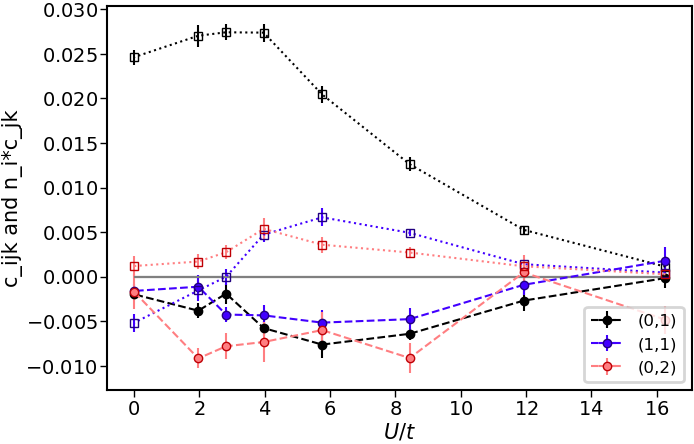

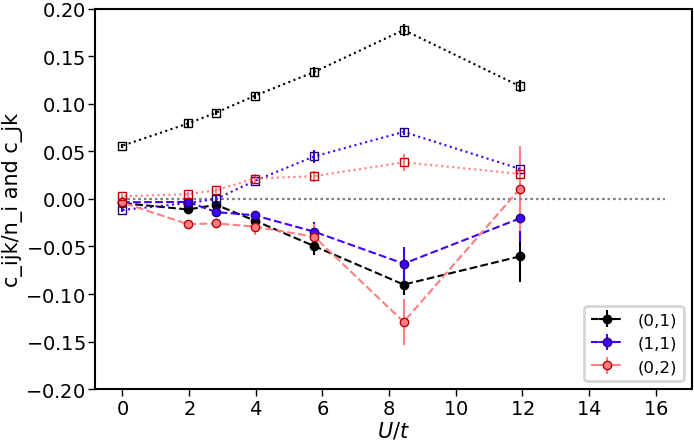

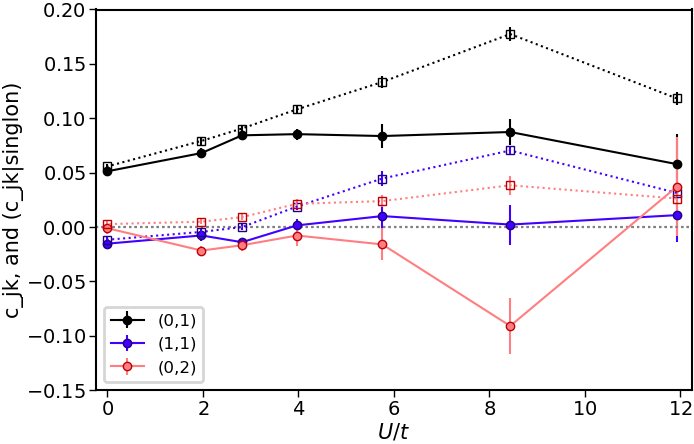

In [50]:
list3Names = 'singlon_p_dh_p_dh'
dispArrMaster = [[[0,1], [1,0]],
                 [[0,1], [1,-1]],
                 [[0,1], [0,-2]]
            ]
dispArrLabels = ['(0,1)', '(1,1)', '(0,2)']

fig, axs = plt.subplots(1, figsize=(3.75, 2.5))
# ShowDisplayCoord(fig)
for _dispInd, disp in enumerate(dispArrMaster):
    d0to1 = disp[0]
    d1to2 = disp[1]
    [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
        [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)


    colorfracUse = _dispInd/len(dispArrMaster)

    # normalize y vals
    xvals = U_val
    rectifier_d1to2 = (-1)**(np.abs(d1to2[0]+d1to2[1]))
    
    y1vals = rectifier_d1to2*np.array(cijk_vals)
    y1errs = np.array(cijk_errs)

    y2vals = rectifier_d1to2*np.array(cjk_vals)*np.array(ni_vals)
    y2errs = np.abs(np.array(cjk_vals)*np.array(ni_vals))*np.sqrt((np.array(cjk_errs)/np.array(cjk_vals))**2 + (np.array(ni_errs)/np.array(ni_vals))**2)

    axIndNow = 0
    terrbar(axs, xvals, y1vals, yerr= y1errs, ls='dashed', marker='o', colorfrac=colorfracUse, cmap='gnuplot2', label = dispArrLabels[_dispInd])
    terrbar(axs, xvals, y2vals, yerr= y2errs, ls='dotted', marker='s', colorfrac=colorfracUse, cmap='gnuplot2', hollow=True) #label = dispArrLabels[_dispInd])

    axs.hlines(0,np.min(xvals),np.max(xvals), color = 'gray', ls='-')
    setlabels(axs, ['$U/t$', 'c_ijk and n_i*c_jk'])
    axs.legend( loc = 'lower right')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, figsize=(3.75, 2.5))
# ShowDisplayCoord(fig)
for _dispInd, disp in enumerate(dispArrMaster):
    d0to1 = disp[0]
    d1to2 = disp[1]
    [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
        [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)


    colorfracUse = _dispInd/len(dispArrMaster)

    # normalize y vals
    xvals = U_val
    rectifier_d1to2 = (-1)**(np.abs(d1to2[0]+d1to2[1]))
    
    y1vals = rectifier_d1to2*np.array(cijk_vals)/np.array(ni_vals)
    y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2 + (np.array(ni_errs)/np.array(ni_vals))**2)
    
    y2vals = rectifier_d1to2*np.array(cjk_vals)
    y2errs = np.array(cjk_errs)
    
    lastIndToDisplay = 1

    axIndNow = 0
    terrbar(axs, xvals[lastIndToDisplay:], y1vals[lastIndToDisplay:], yerr= y1errs[lastIndToDisplay:], ls='dashed', marker='o', colorfrac=colorfracUse, cmap='gnuplot2', label = dispArrLabels[_dispInd])
    terrbar(axs, xvals[lastIndToDisplay:], y2vals[lastIndToDisplay:], yerr= y2errs[lastIndToDisplay:], ls='dotted', marker='s', colorfrac=colorfracUse, cmap='gnuplot2', hollow=True) #label = dispArrLabels[_dispInd])
    setlims(axs, None, [-0.2,0.2])
    axs.hlines(0,np.min(xvals),np.max(xvals), color = 'gray', ls='dotted')
    setlabels(axs, ['$U/t$', 'c_ijk/n_i and c_jk'])
    axs.legend( loc = 'lower right')

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(1, figsize=(3.75, 2.5))
# ShowDisplayCoord(fig)
for _dispInd, disp in enumerate(dispArrMaster):
    d0to1 = disp[0]
    d1to2 = disp[1]
    [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
        [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)


    colorfracUse = _dispInd/len(dispArrMaster)

    # normalize y vals
    xvals = U_val
    rectifier_d1to2 = (-1)**(np.abs(d1to2[0]+d1to2[1]))
    
    y1vals = rectifier_d1to2*np.array(cijk_vals)/np.array(ni_vals)
    y1errs = np.abs(np.array(cijk_vals)/np.array(ni_vals))*np.sqrt((np.array(cijk_errs)/np.array(cijk_vals))**2 + (np.array(ni_errs)/np.array(ni_vals))**2)
    
    y2vals = rectifier_d1to2*np.array(cjk_vals)
    y2errs = np.array(cjk_errs)
    
    y3vals = y1vals + y2vals 
    y3errs = np.sqrt(y1errs**2 + y2errs**2)
    
    lastIndToDisplay = 1

    axIndNow = 0
    terrbar(axs, xvals[lastIndToDisplay:], y3vals[lastIndToDisplay:], yerr= y3errs[lastIndToDisplay:], ls='-', marker='o', colorfrac=colorfracUse, cmap='gnuplot2', label = dispArrLabels[_dispInd])
    terrbar(axs, xvals[lastIndToDisplay:], y2vals[lastIndToDisplay:], yerr= y2errs[lastIndToDisplay:], ls='dotted', marker='s', colorfrac=colorfracUse, cmap='gnuplot2', hollow=True)# , label = dispArrLabels[_dispInd])
    axs.hlines(0,-0.25,12.25, color = 'gray', ls='dotted')
    setlims(axs, [-0.25,12.25], [-0.15,0.2])
    setlabels(axs, ['$U/t$', 'c_jk, and (c_jk|singlon)']) # $\\langle (d_j-h_j)(d_k-h_k)\\rangle_c$
    axs.legend( loc = 'lower left')

plt.tight_layout()
plt.show()


# fig.savefig('Figures/Polaron/Fig_Polaron_3PointCorrelations_NormalizedAll_'+list3Names+'.png', dpi=400, bbox_inches='tight')

up up up correlations 3 point
0 :  [[0, 1], [1, 0]]
Xvals :  [16.27, 11.93, 8.44, 5.76, 3.97, 2.82, 1.97, 0.0]
Vals*1000:  [-0.83876892  0.36843445  1.64607918  1.44624259  3.15143916  3.31427628
  3.8058469   4.02339289]
Errs*1000:  [0.45033712 0.3019425  0.47327508 0.35866997 0.44556713 0.27868751
 0.32656103 0.359303  ]
1 :  [[0, 1], [0, -2]]
Xvals :  [16.27, 11.93, 8.44, 5.76, 3.97, 2.82, 1.97, 0.0]
Vals*1000:  [-0.68334861  0.57278388  0.40144059  1.18552719 -1.02485388 -0.60621646
  0.55219819  0.02884022]
Errs*1000:  [0.7165055  0.41203713 0.83651068 0.85903552 0.59391923 0.68395638
 0.2841572  0.66728792]


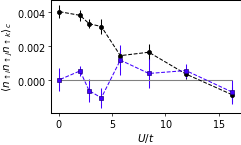

In [28]:
print("up up up correlations 3 point")

list3Names = 'up_up_up'

dispArrMaster = [[[0,1], [1,0]],
                 [[0,1], [0,-2]]
            ]
dispArrLabels = ['(0,0), (0,1), (1,0)','(0,0), (0,1), (0,-1)']
markerArr = ['o', 's']

fig, axs = plt.subplots(1, figsize=(3.75, 1.5))
# ShowDisplayCoord(fig)
for _dispInd, disp in enumerate(dispArrMaster):
    d0to1 = disp[0]
    d1to2 = disp[1]
    [[ni_vals,nj_vals,nk_vals,njk_vals,cjk_vals,cijk_vals,nj_condi_vals,nk_condi_vals,njk_condi_vals,cjk_condi_vals], 
        [ni_errs,nj_errs,nk_errs,njk_errs,cjk_errs,cijk_errs,nj_condi_errs,nk_condi_errs,njk_condi_errs,cjk_condi_errs]]= read_polaron_corrs(list3Names, d0to1, d1to2)


    colorfracUse = _dispInd/(len(dispArrMaster)+1)

    # normalize y vals
    xvals = U_val

    y1vals = np.array(cijk_vals)
    y1errs = np.array(cijk_errs)
    
    print(_dispInd, ': ', dispArrMaster[_dispInd] )
    print('Xvals : ', xvals)
    print('Vals*1000: ', y1vals*1000.0)
    print('Errs*1000: ', y1errs*1000.0)

    y2vals = rectifier_d1to2*np.array(cjk_vals)*np.array(ni_vals)
    y2errs = np.abs(np.array(cjk_vals)*np.array(ni_vals))*np.sqrt((np.array(cjk_errs)/np.array(cjk_vals))**2 + (np.array(ni_errs)/np.array(ni_vals))**2)

    axIndNow = 0
    terrbar(axs, xvals, y1vals, yerr= y1errs, ls='dashed', marker=markerArr[_dispInd], colorfrac=colorfracUse, cmap='gnuplot2', label = dispArrLabels[_dispInd])

    axs.hlines(0,np.min(xvals),np.max(xvals), color = 'gray', ls='-')
    setlabels(axs, ['$U/t$', '$\\langle n_{\\uparrow i}n_{\\uparrow j} n_{\\uparrow k}\\rangle_c$'])
    #axs.legend( loc = 'lower right')

    
    

scalelocofax(axs, 0.6,0.9,0.1,0.1)

plt.show()

# fig.savefig('Figures/Polaron/Fig_Polaron_3PointCorrelations_NormalizedAll_'+list3Names+'.png', dpi=400, bbox_inches='tight')

In [52]:
fig.savefig('Figures/SIFigures/Fig_UpUpUpCorrelations.png', dpi=400)

# Supplemental figures 

### Comparing spin and charge fluctuations

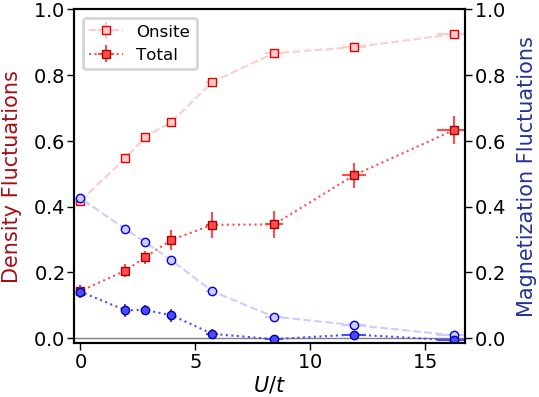

In [26]:
fig, axs = plt.subplots(1, figsize=(3.5, 2.0))

legendTextSize = 6.5
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.25
xUmax = 16.75
linewidth0 = 0.5

axs_twinx = axs.twinx()

terrbar(axs, U_val, c_nn_loc_val, xerr=U_err, yerr=c_nn_loc_err, marker='s', ls='dashed',  cmap = 'bwr', colorfrac= 0.6,label = 'Onsite')
# terrbar(axs, U_val, c_nn_tot_varydmax_val, xerr=U_err, yerr=c_nn_tot_varydmax_err, marker='s',  ls='dotted', cmap = 'bwr', colorfrac= colorfracRed, label = 'Total')
terrbar(axs, U_val, np.array(c_nn_tot_fit_val), xerr=U_err,  yerr= np.array(c_nn_tot_fit_err), cmap = 'bwr', colorfrac = colorfracRed, ls = 'dotted',marker = 's',  label = 'Total')

terrbar(axs_twinx, U_val, c_ss_loc_val, xerr=U_err, yerr=c_ss_loc_err, marker='o', ls='dashed', cmap = 'bwr', colorfrac= 0.4,label = 'Onsite')
terrbar(axs_twinx, U_val, c_ss_tot_varydmax_val, xerr=U_err, yerr=c_ss_tot_varydmax_err, marker='o', ls='dotted', cmap = 'bwr',  colorfrac= colorfracBlue, label = 'Total')
# terrbar(axs_twinx, U_val, np.array(c_ss_tot_fit_val), xerr=U_err,  yerr= np.array(c_ss_tot_fit_err), cmap = 'coolwarm', colorfrac = colorfracBlue, ls = '', ms = 3, marker = 'o', hollow = True, label = 'Total, fit')

axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
setlims(axs, [xUmin,xUmax], [-0.015,1])
setlims(axs_twinx, [xUmin,xUmax], [-0.015,1])
axs.legend(loc = 'best')
axs.set_xticks([0,5,10,15])

setlabels(axs, ['$U/t$', ''])
axs.set_ylabel('Density Fluctuations', labelpad = 4)
setlabels(axs_twinx, ['$U/t$', ''])
axs.yaxis.label.set_color(jcc[jcc_keys[0]][4]) 
axs_twinx.yaxis.label.set_color(jcc[jcc_keys[6]][4]) 
axs_twinx.set_ylabel('Magnetization Fluctuations', labelpad = 4)

scalelocofax(axs, 0.66,1,0.125,0)


In [29]:
fig.savefig('Figures/SIFigures/Fig_CombinedFluctuations.png', dpi=400)

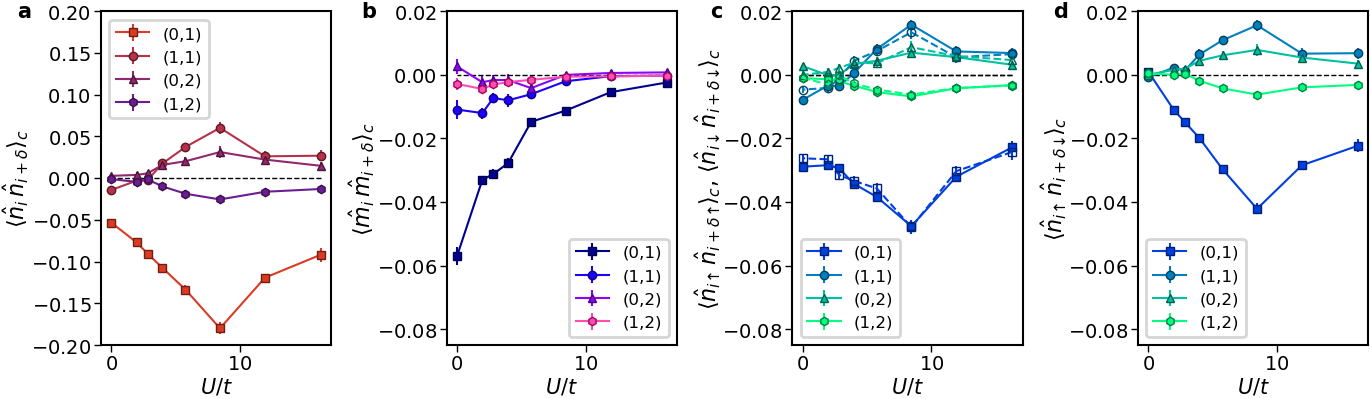

In [36]:
# Generate rectified and negative correlators vs interaction strength, first index is radius, second is U/t 
c_nn_specificRadius_vals = []
c_nn_specificRadius_errs = []
c_ss_specificRadius_vals = []
c_ss_specificRadius_errs = []
c_updn_specificRadius_vals = []
c_updn_specificRadius_errs = []
c_upup_specificRadius_vals = []
c_upup_specificRadius_errs = []
c_dndn_specificRadius_vals = []
c_dndn_specificRadius_errs = []

for radInd in range(len(rr_rectifier)):
    c_ss_specificRadius_vals.append(np.array(c_ss_vsRadWithoutDegen_vals)[:,radInd])
    c_ss_specificRadius_errs.append(np.array(c_ss_vsRadWithoutDegen_errs)[:,radInd])
    c_updn_specificRadius_vals.append(np.array(c_updn_vsRadWithoutDegen_vals)[:,radInd])
    c_updn_specificRadius_errs.append(np.array(c_updn_vsRadWithoutDegen_errs)[:,radInd])
    c_upup_specificRadius_vals.append(np.array(c_upup_vsRadWithoutDegen_vals)[:,radInd])
    c_upup_specificRadius_errs.append(np.array(c_upup_vsRadWithoutDegen_errs)[:,radInd])
    c_dndn_specificRadius_vals.append(np.array(c_dndn_vsRadWithoutDegen_vals)[:,radInd])
    c_dndn_specificRadius_errs.append(np.array(c_dndn_vsRadWithoutDegen_errs)[:,radInd])
    c_nn_specificRadius_vals.append(np.array(c_nn_vsRadWithoutDegen_vals)[:,radInd])
    c_nn_specificRadius_errs.append(np.array(c_nn_vsRadWithoutDegen_errs)[:,radInd])

    
plt.rcParams['figure.dpi'] = 200

# Do some quick plots to see 
fig, axs = plt.subplots(1,4, figsize=(7.5, 2.0))
# ShowDisplayCoord(fig)

cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'
cmapuse_charge = 'winter'
labeltextsize = 8

ylims_nn = [-0.2, 0.2]
ylims_ss = [-0.085, 0.02]
ylims_charge = [-0.085, 0.02]

markerList = ['D','s','o','^','h', 'd','v']

cmapuse = cmapuse_nn
axInd=0
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/7)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_nn_specificRadius_vals[radInd]
    yerrs = c_nn_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_ylabel('$\\langle \\hat{n}_i \\, \\hat{n}_{i+\\delta} \\rangle_c $', labelpad=0,size = labeltextsize)
axs[axInd].legend(loc = 'upper left')
setlims(axs[axInd],None,ylims_nn)

cmapuse = cmapuse_ss
axInd=1
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/7)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_ss_specificRadius_vals[radInd]
    yerrs = c_ss_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_ylabel('$\\langle \\hat{m}_i \\, \\hat{m}_{i+\\delta} \\rangle_c $', labelpad=0,size = labeltextsize)
axs[axInd].legend()
setlims(axs[axInd],None,ylims_ss)

# cmapuse = cmapuse_charge
# axInd=2
# for radInd in [1,2,3,4]:
#     colorfracuse = float(radInd/5)
#     markeruse = markerList[radInd]
#     xvals = U_val
#     yvals = c_updn_specificRadius_vals[radInd]
#     yerrs = c_updn_specificRadius_errs[radInd]
#     terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='dotted', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
#             label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
# jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
# setlabels(axs[axInd], ['$U/t$', '$\\langle n_{\\uparrow i} n_{\\downarrow,i+\\delta} \\rangle_c $'])
# axs[axInd].legend()
# setlims(axs[axInd],None,ylims_charge)

cmapuse = cmapuse_charge
axInd=2
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_upup_specificRadius_vals[radInd]
    yerrs = c_upup_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  

axs[axInd].legend()
setlims(axs[axInd],None,ylims_charge)

cmapuse = cmapuse_charge
axInd=2
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_dndn_specificRadius_vals[radInd]
    yerrs = c_dndn_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='dashed', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='', hollow = True)
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_ylabel('$\\langle \\hat{n}_{i \\!   \\uparrow   \\!}\\, \\hat{n}_{ i+\\delta \\!   \\uparrow \\!  \\!} \\rangle_c$, $\\langle \\hat{n}_{i \\!   \\downarrow  \\! }\\, \\hat{n}_{i+\\delta \\! \\downarrow \\!  \\!} \\rangle_c$', labelpad = 0,size = labeltextsize)
axs[axInd].legend()
setlims(axs[axInd],None,ylims_charge)

cmapuse = cmapuse_charge
axInd=3
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_updn_specificRadius_vals[radInd]
    yerrs = c_updn_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_ylabel('$\\langle \\hat{n}_{i \\!   \\uparrow  \\!}\\, \\hat{n}_{ i+\\delta\\!   \\downarrow \\! \\!} \\rangle_c$', labelpad = 0,size = labeltextsize)
axs[axInd].legend()
setlims(axs[axInd],None,ylims_charge)

fig.subplots_adjust(wspace=0.5)


# Add abc labels
labelsPlots = ['a', 'b', 'c', 'd']
labelsXoffsets = [-0.35, -0.35, -0.35, -0.35]
for labelInd, _ax in enumerate(axs.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')
    
    
# plt.tight_layout()
plt.show()

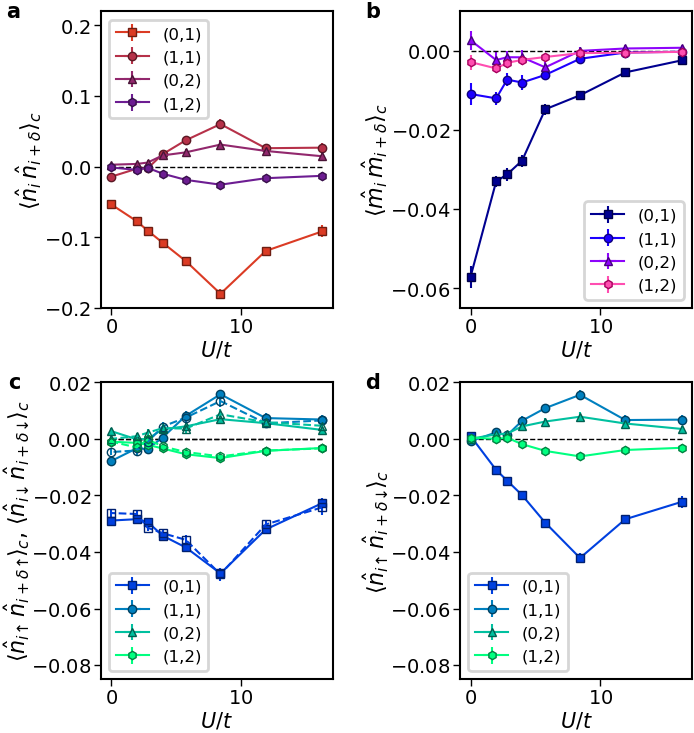

In [55]:
# Generate rectified and negative correlators vs interaction strength, first index is radius, second is U/t 
c_nn_specificRadius_vals = []
c_nn_specificRadius_errs = []
c_ss_specificRadius_vals = []
c_ss_specificRadius_errs = []
c_updn_specificRadius_vals = []
c_updn_specificRadius_errs = []
c_upup_specificRadius_vals = []
c_upup_specificRadius_errs = []
c_dndn_specificRadius_vals = []
c_dndn_specificRadius_errs = []

for radInd in range(len(rr_rectifier)):
    c_ss_specificRadius_vals.append(np.array(c_ss_vsRadWithoutDegen_vals)[:,radInd])
    c_ss_specificRadius_errs.append(np.array(c_ss_vsRadWithoutDegen_errs)[:,radInd])
    c_updn_specificRadius_vals.append(np.array(c_updn_vsRadWithoutDegen_vals)[:,radInd])
    c_updn_specificRadius_errs.append(np.array(c_updn_vsRadWithoutDegen_errs)[:,radInd])
    c_upup_specificRadius_vals.append(np.array(c_upup_vsRadWithoutDegen_vals)[:,radInd])
    c_upup_specificRadius_errs.append(np.array(c_upup_vsRadWithoutDegen_errs)[:,radInd])
    c_dndn_specificRadius_vals.append(np.array(c_dndn_vsRadWithoutDegen_vals)[:,radInd])
    c_dndn_specificRadius_errs.append(np.array(c_dndn_vsRadWithoutDegen_errs)[:,radInd])
    c_nn_specificRadius_vals.append(np.array(c_nn_vsRadWithoutDegen_vals)[:,radInd])
    c_nn_specificRadius_errs.append(np.array(c_nn_vsRadWithoutDegen_errs)[:,radInd])

    
plt.rcParams['figure.dpi'] = 200

# Do some quick plots to see 
fig, axs = plt.subplots(2,2, figsize=(3.5,4))
# ShowDisplayCoord(fig)

cmapuse_nn = mpl.colors.LinearSegmentedColormap.from_list("", ["orangered",'blue']) #'autumn'
cmapuse_ss = 'gnuplot2'
cmapuse_charge = 'winter'
labeltextsize = 8

ylims_nn = [-0.2, 0.22]
ylims_ss = [-0.065, 0.01]
ylims_charge = [-0.085, 0.02]

markerList = ['D','s','o','^','h', 'd','v']

cmapuse = cmapuse_nn
axInd=0
axInd2=0
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/7)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_nn_specificRadius_vals[radInd]
    yerrs = c_nn_specificRadius_errs[radInd]
    terrbar(axs[axInd, axInd2], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd, axInd2], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd, axInd2], ['$U/t$', ''])
axs[axInd, axInd2].set_ylabel('$\\langle \\hat{n}_i \\, \\hat{n}_{i+\\delta} \\rangle_c $', labelpad=0,size = labeltextsize)
axs[axInd, axInd2].legend(loc = 'upper left')
setlims(axs[axInd, axInd2],None,ylims_nn)

cmapuse = cmapuse_ss
axInd=0
axInd2=1
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/7)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_ss_specificRadius_vals[radInd]
    yerrs = c_ss_specificRadius_errs[radInd]
    terrbar(axs[axInd, axInd2], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd, axInd2], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd, axInd2], ['$U/t$', ''])
axs[axInd, axInd2].set_ylabel('$\\langle \\hat{m}_i \\, \\hat{m}_{i+\\delta} \\rangle_c $', labelpad=0,size = labeltextsize)
axs[axInd, axInd2].legend()
setlims(axs[axInd, axInd2],None,ylims_ss)

cmapuse = cmapuse_charge
axInd=1
axInd2=0
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_upup_specificRadius_vals[radInd]
    yerrs = c_upup_specificRadius_errs[radInd]
    terrbar(axs[axInd, axInd2], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd, axInd2], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  

axs[axInd, axInd2].legend()
setlims(axs[axInd, axInd2],None,ylims_charge)

cmapuse = cmapuse_charge
axInd=1
axInd2=0
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_dndn_specificRadius_vals[radInd]
    yerrs = c_dndn_specificRadius_errs[radInd]
    terrbar(axs[axInd, axInd2], xvals, yvals, yerr=yerrs, ls='dashed', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='', hollow = True)
jplot(axs[axInd, axInd2], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd, axInd2], ['$U/t$', ''])
axs[axInd, axInd2].set_ylabel('$\\langle \\hat{n}_{i \\!   \\uparrow   \\!}\\, \\hat{n}_{ i+\\delta \\!   \\uparrow \\!  \\!} \\rangle_c$, $\\langle \\hat{n}_{i \\!   \\downarrow  \\! }\\, \\hat{n}_{i+\\delta \\! \\downarrow \\!  \\!} \\rangle_c$', labelpad = 0,size = labeltextsize)
axs[axInd, axInd2].legend()
setlims(axs[axInd, axInd2],None,ylims_charge)

cmapuse = cmapuse_charge
axInd=1
axInd2=1
for radInd in [1,2,3,4]:
    colorfracuse = float(radInd/4)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_updn_specificRadius_vals[radInd]
    yerrs = c_updn_specificRadius_errs[radInd]
    terrbar(axs[axInd, axInd2], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd, axInd2], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd, axInd2], ['$U/t$', ''])
axs[axInd, axInd2].set_ylabel('$\\langle \\hat{n}_{i \\!   \\uparrow  \\!}\\, \\hat{n}_{ i+\\delta\\!   \\downarrow \\! \\!} \\rangle_c$', labelpad = 0,size = labeltextsize)
axs[axInd, axInd2].legend()
setlims(axs[axInd, axInd2],None,ylims_charge)

fig.subplots_adjust(wspace=0.5)

fig.subplots_adjust(wspace=0.55)
fig.subplots_adjust(hspace=0.25)


# Add abc labels
labelsPlots = ['a', 'b', 'c', 'd']
labelsXoffsets = [-0.4, -0.4, -0.4, -0.4]
for labelInd, _ax in enumerate(axs.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')
    
    
# plt.tight_layout()
plt.show()

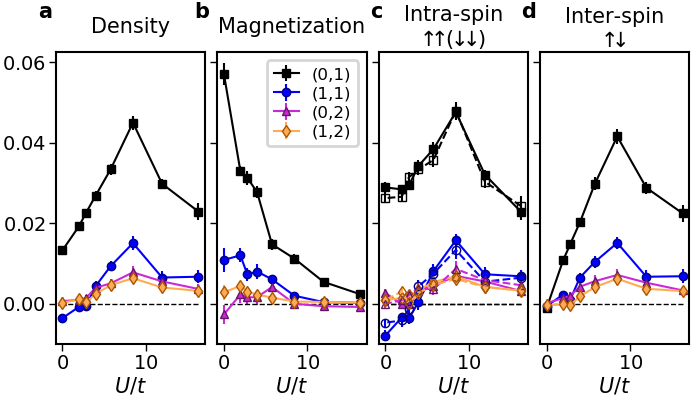

In [27]:
# Generate rectified and negative correlators vs interaction strength, first index is radius, second is U/t 
c_nn_specificRadius_vals = []
c_nn_specificRadius_errs = []
c_nn_rect_specificRadius_vals = []
c_nn_rect_specificRadius_errs = []
c_ss_specificRadius_vals = []
c_ss_specificRadius_errs = []
c_updn_specificRadius_vals = []
c_updn_specificRadius_errs = []
c_upup_specificRadius_vals = []
c_upup_specificRadius_errs = []
c_dndn_specificRadius_vals = []
c_dndn_specificRadius_errs = []
c_updn_rect_specificRadius_vals = []
c_updn_rect_specificRadius_errs = []
c_upup_rect_specificRadius_vals = []
c_upup_rect_specificRadius_errs = []
c_dndn_rect_specificRadius_vals = []
c_dndn_rect_specificRadius_errs = []

for radInd in range(len(rr_rectifier)):
    c_ss_specificRadius_vals.append(np.array(c_ss_vsRadWithoutDegen_vals)[:,radInd])
    c_ss_specificRadius_errs.append(np.array(c_ss_vsRadWithoutDegen_errs)[:,radInd])
    c_updn_specificRadius_vals.append(np.array(c_updn_vsRadWithoutDegen_vals)[:,radInd])
    c_updn_specificRadius_errs.append(np.array(c_updn_vsRadWithoutDegen_errs)[:,radInd])
    c_upup_specificRadius_vals.append(np.array(c_upup_vsRadWithoutDegen_vals)[:,radInd])
    c_upup_specificRadius_errs.append(np.array(c_upup_vsRadWithoutDegen_errs)[:,radInd])
    c_dndn_specificRadius_vals.append(np.array(c_dndn_vsRadWithoutDegen_vals)[:,radInd])
    c_dndn_specificRadius_errs.append(np.array(c_dndn_vsRadWithoutDegen_errs)[:,radInd])
    c_nn_specificRadius_vals.append(np.array(c_nn_vsRadWithoutDegen_vals)[:,radInd])
    c_nn_specificRadius_errs.append(np.array(c_nn_vsRadWithoutDegen_errs)[:,radInd])
    c_nn_rect_specificRadius_vals.append(np.array(c_nn_rect_vsRadWithoutDegen_vals)[:,radInd])
    c_nn_rect_specificRadius_errs.append(np.array(c_nn_rect_vsRadWithoutDegen_errs)[:,radInd])
    c_updn_rect_specificRadius_vals.append(np.array(c_updn_rect_vsRadWithoutDegen_vals)[:,radInd])
    c_updn_rect_specificRadius_errs.append(np.array(c_updn_rect_vsRadWithoutDegen_errs)[:,radInd])
    c_upup_rect_specificRadius_vals.append(np.array(c_upup_vsRadWithoutDegen_vals)[:,radInd]*rr_rectifier[radInd])
    c_upup_rect_specificRadius_errs.append(np.array(c_upup_vsRadWithoutDegen_errs)[:,radInd])
    c_dndn_rect_specificRadius_vals.append(np.array(c_dndn_vsRadWithoutDegen_vals)[:,radInd]*rr_rectifier[radInd])
    c_dndn_rect_specificRadius_errs.append(np.array(c_dndn_vsRadWithoutDegen_errs)[:,radInd])


plt.rcParams['figure.dpi'] = 200

globylims = [-0.01, 0.0625]
yticksglob = [0, 0.02, 0.04,0.06]

# Do some quick plots to see 
fig, axs = plt.subplots(1,4, figsize=(3.75, 1.75))
# ShowDisplayCoord(fig)

cmapuse_nn = 'gnuplot2'
cmapuse_ss = cmapuse_nn
cmapuse_charge = cmapuse_nn
labeltextsize = 8
titletextsize = 7.5
cscaleDivisor = 4
pad1dist = 7
pad2dist = 2

markerList = ['v','s','o','^','d', 'h','D']

cmapuse = cmapuse_nn
axInd=0
for radInd in [1,2,3,4]:
    colorfracuse = float((radInd-1)/cscaleDivisor)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_nn_rect_specificRadius_vals[radInd]/4
    yerrs = c_nn_rect_specificRadius_errs[radInd]/4
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_yticks(yticksglob)
axs[axInd].set_title('Density',size = titletextsize, pad =pad1dist)
# axs[axInd].set_title('$\\langle \\hat{n}_i \\, \\hat{n}_{i+\\delta} \\rangle_c/4$\n(rectified)',size = titletextsize, pad =pad1dist)
# axs[axInd].legend(loc = 'upper left')
setlims(axs[axInd],None,globylims)

cmapuse = cmapuse_ss
axInd=1
for radInd in [1,2,3,4]:
    colorfracuse = float((radInd-1)/cscaleDivisor)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = -c_ss_specificRadius_vals[radInd]
    yerrs = -c_ss_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_title('Magnetization',size = titletextsize, pad = pad1dist)
# axs[axInd].set_title('$-\\langle \\hat{m}_i \\, \\hat{m}_{i+\\delta} \\rangle_c $',size = titletextsize, pad = pad2dist)
axs[axInd].legend(labelspacing = 0.25, handlelength = 1.5)
axs[axInd].set_yticks(yticksglob)
axs[axInd].set_yticklabels([])

setlims(axs[axInd],None,globylims)

cmapuse = cmapuse_charge
axInd=2
for radInd in [1,2,3,4]:
    colorfracuse = float((radInd-1)/cscaleDivisor)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_upup_rect_specificRadius_vals[radInd]
    yerrs = c_upup_rect_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
axs[axInd].set_yticks(yticksglob)
axs[axInd].set_yticklabels([])

# axs[axInd].legend()
setlims(axs[axInd],None,globylims)

cmapuse = cmapuse_charge
axInd=2
for radInd in [1,2,3,4]:
    colorfracuse = float((radInd-1)/cscaleDivisor)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_dndn_rect_specificRadius_vals[radInd]
    yerrs = c_dndn_rect_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='dashed', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='', hollow = True)
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_title('Intra-spin\n$\\! \\! \\uparrow  \\! \\! \\! \\!   \\uparrow \\! \\! ( \\!\\! \\downarrow  \\! \\! \\! \\!   \\downarrow \\!\\!)$', size = titletextsize, pad = pad2dist)
# axs[axInd].set_title('$\\langle \\hat{n}_{i \\!   \\uparrow   \\!}\\, \\hat{n}_{ i+\\delta \\!   \\uparrow \\!  \\!} \\rangle_c$\n$\\langle \\hat{n}_{i \\!   \\downarrow  \\! }\\, \\hat{n}_{i+\\delta \\! \\downarrow \\!  \\!} \\rangle_c$\n(rectified)',
#                      size = titletextsize)
# axs[axInd].legend()
axs[axInd].set_yticks(yticksglob)
axs[axInd].set_yticklabels([])

setlims(axs[axInd],None,globylims)

cmapuse = cmapuse_charge
axInd=3
for radInd in [1,2,3,4]:
    colorfracuse = float((radInd-1)/cscaleDivisor)
    markeruse = markerList[radInd]
    xvals = U_val
    yvals = c_updn_rect_specificRadius_vals[radInd]
    yerrs = c_updn_rect_specificRadius_errs[radInd]
    terrbar(axs[axInd], xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
            label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
jplot(axs[axInd], xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
setlabels(axs[axInd], ['$U/t$', ''])
axs[axInd].set_title('Inter-spin\n$\\! \\!   \\uparrow  \\! \\! \\! \\!   \\downarrow \\!$', size = titletextsize, pad = pad2dist)
# axs[axInd].set_title('$\\langle \\hat{n}_{i \\!   \\uparrow  \\!}\\, \\hat{n}_{ i+\\delta\\!   \\downarrow \\! \\!} \\rangle_c$\n(rectified)',
#                      size = titletextsize, pad = pad1dist)
# axs[axInd].legend()
axs[axInd].set_yticks(yticksglob)
axs[axInd].set_yticklabels([])

setlims(axs[axInd],None,globylims)

fig.subplots_adjust(wspace=0.08)


################################
# Add abc labels
labelsAxArr = [axs[0], axs[1], axs[2], axs[3]]
labelsPlots = ['a', 'b', 'c', 'd']
xoff = -0.02
yoff = 0.15

labelsXoffsets = [xoff]*4
labelsYoffsets = [yoff]*4
labelsXoffsets[1]-=0.02
labelsXoffsets[2]+=0.04

for labelInd, ax in enumerate(labelsAxArr):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
    ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom')

    
    
# plt.tight_layout()
plt.show()

In [127]:
fig.savefig('Figures/SIFigures/Fig_AllCorrelators.png', dpi=400, bbox_inches='tight')

### Excess density 

In [57]:
# fig, axs = plt.subplots(1, figsize=(3.5, 1.75))
# # ShowDisplayCoord(fig)

# excessFillColor = mpl.colors.hsv_to_rgb([242/360.0, 0.4, 1])# 'slateblue'\

# axs.fill_between(U_val, [0]*len(U_val), np.array(ndn_vals), color = 'lightgray')
# axs.fill_between(U_val, np.array(ndn_vals), np.array(ndn_vals)+cond_excess_dn_tot_fit_val, color = excessFillColor)
# axs.fill_between([np.max(U_val),np.max(U_val) + 0.5], [0]*2,  [np.array(ndn_vals)[np.argmax(U_val)]]*2, color = 'lightgray')
# axs.fill_between([np.max(U_val),np.max(U_val) + 0.5], [np.array(ndn_vals)[np.argmax(U_val)]]*2,  
#                                      [np.array(ndn_vals)[np.argmax(U_val)]+np.array(cond_excess_dn_tot_fit_val)[np.argmax(U_val)]]*2, color = excessFillColor)

# terrbar(axs, U_val, np.array(ndn_vals), xerr=U_err, 
#         ls='--', marker = '^', colorfrac=0.9, cmap='gray', label='Background Density: $n_\\downarrow$')
# terrbar(axs, U_val, np.array(ndn_vals)+ cond_excess_dn_loc_fit_val, yerr=cond_excess_dn_loc_fit_err, 
#         ls='--', marker ='s', colorfrac=0.8, cmap='bwr', 
#         label='\nOnsite Conditional $\\downarrow$ Density:\n$\\langle n_{0\\downarrow} n_{0\\uparrow}\\rangle/n_{\\uparrow}$')
# # terrbar(axs, U_val, np.array(ndn_vals)+ cond_excess_dn_tot_fit_val, xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err), 
# #         ls='--', marker = 'o', colorfrac=0.1, cmap='bwr', 
# #         label='\nBackground + Total Excess\nConditional $\\downarrow$ Density:\n$n_\\downarrow +\\sum_{\\delta}\\left(\\langle n_{\\delta\\downarrow} n_{0\\uparrow}\\rangle/n_{\\uparrow} - n_{\\downarrow}\\right)$')
# terrbar(axs, U_val, np.array(ndn_vals)+ cond_excess_dn_tot_fit_val, xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err), 
#         ls='--', marker = 'o', colorfrac=0.1, cmap='bwr', 
#         label='\nOnsite Conditional $\\downarrow$ Density +\nOffsite Excess Conditional $\\downarrow$ Density:\n$\\langle n_{0\\downarrow} n_{0\\uparrow}\\rangle/n_{\\uparrow}+\\sum_{\\delta\\neq 0}\\left(\\langle n_{\\delta\\downarrow} n_{0\\uparrow}\\rangle/n_{\\uparrow} - n_{\\downarrow}\\right)$')

# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
# setlabels(axs, ['$U/t$', '$n_\\downarrow$ Density'])
# setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,1]) 
# axs.set_xticks([0,5,10,15])
# axs.legend(bbox_to_anchor=(1.05, 0.5), loc='center left',framealpha= 0)
# # axs.legend(loc = 'lower right',framealpha= 1)

# scalelocofax(axs, 0.35,0.9,0.0,0.05)
# plt.show()

In [34]:
# fig, axs = plt.subplots(1, figsize=(3.5, 1.35))
# # ShowDisplayCoord(fig)

# terrbar(axs, U_val, np.array(ndn_vals), xerr=U_err, 
#         ls='--', marker = '^', colorfrac=0.9, cmap='gray', label='Background Density: $n_{\\! \\downarrow}$')
# terrbar(axs, U_val, cond_excess_dn_loc_fit_val, yerr=cond_excess_dn_loc_fit_err, 
#         ls='--', marker ='s', colorfrac=0.8, cmap='bwr', 
#         label='\nOnsite Conditional Excess $\\downarrow$ Density:\n$\\langle n_{0 \\! \\! \\downarrow \\!} n_{0 \\! \\! \\uparrow \\!}\\rangle/n_{\\! \\uparrow \\!}-n_{ \\! \\downarrow \\!}$')
# terrbar(axs, U_val, cond_excess_dn_tot_fit_val, xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err), 
#         ls='--', marker = 'o', colorfrac=0.1, cmap='bwr', 
#         label='\nOnsite Conditional Excess $\\downarrow$ Density +\nOffsite Conditional Excess $\\downarrow$ Density:\n$\\sum_{\\delta}\\left(\\langle n_{\\delta \\! \\! \\downarrow \\! } n_{0 \\! \\! \\uparrow \\! \\! }\\rangle/n_{ \\! \\uparrow \\! } - n_{ \\! \\downarrow \\! \\! }\\right)$')

# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
# setlabels(axs, ['$U/t$', '$n_{ \\! \\downarrow \\! }$ Density'])
# setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,0.6]) 
# axs.set_xticks([0,5,10,15])
# axs.legend(bbox_to_anchor=(1.05, 0.35), loc='center left',framealpha= 0)
# # axs.legend(loc = 'lower right',framealpha= 1)

# scalelocofax(axs, 0.35,0.9,0.0,0.05)


# xlims = axs.get_xlim()
# ylims = axs.get_ylim()
# plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
# #. Generate gradient image 
# sizeForTanh = 5
# shiftLeftTanh= 0.3
# testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
# testArrOnes = np.ones(100)
# fakeGradientImage = np.outer(testArrOnes,testArr)
# axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)

    
    
# plt.show()

In [57]:
# fig, axs = plt.subplots(1, figsize=(3.5, 1.35))
# # ShowDisplayCoord(fig)

# terrbar(axs, U_val, np.array(ndn_vals), xerr=U_err, 
#         ls='--', marker = '^', colorfrac=0.9, cmap='gray', label='Background Density: $n_{\\! \\downarrow}$')
# terrbar(axs, U_val, cond_excess_dn_loc_fit_val, yerr=cond_excess_dn_loc_fit_err, 
#         ls='--', marker ='s', colorfrac=0.8, cmap='bwr', 
#         label='\nOnsite Conditional Excess $ \\! \\! \\downarrow \\! \\! $ Density:\n$\\langle \\hat{n}_{i  \\! \\downarrow \\!} \\hat{n}_{i \\!  \\uparrow \\!}\\rangle/n_{\\! \\uparrow \\!}-n_{ \\! \\downarrow \\!}$')
# terrbar(axs, U_val, cond_excess_dn_tot_fit_val, xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err), 
#         ls='--', marker = 'o', colorfrac=0.1, cmap='bwr', 
#         label='\nTotal Conditional Excess $ \\! \\! \\downarrow \\! \\! $ Density:\n$\\sum_{\\delta}\\left(\\langle \\hat{n}_{i+\\delta  \\! \\downarrow \\! } \\hat{n}_{i \\!  \\uparrow \\! \\! }\\rangle/n_{ \\! \\uparrow \\! } - n_{ \\! \\downarrow \\! \\! }\\right)$')

# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
# jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
# setlabels(axs, ['$U/t$', '$n_{ \\! \\downarrow \\! }$ Density'])
# setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,0.6]) 
# axs.set_xticks([0,5,10,15])
# axs.legend(bbox_to_anchor=(1.0, 0.45), loc='center left',framealpha= 0, handlelength = 1.0, labelspacing = 0)
# # axs.legend(loc = 'lower right',framealpha= 1)

# scalelocofax(axs, 0.35,0.85,0.0,0.1)


# xlims = axs.get_xlim()
# ylims = axs.get_ylim()
# plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
# #. Generate gradient image 
# sizeForTanh = 5
# shiftLeftTanh= 0.3
# testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
# testArrOnes = np.ones(100)
# fakeGradientImage = np.outer(testArrOnes,testArr)
# axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)
    
# plt.show()

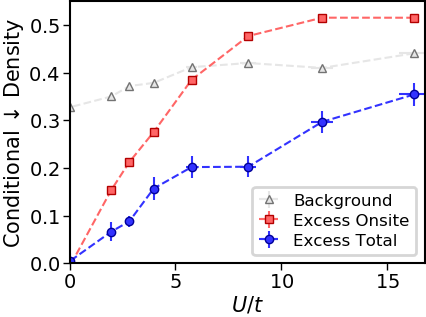

In [28]:
fig, axs = plt.subplots(1, figsize=(3.5, 1.65))
# ShowDisplayCoord(fig)

terrbar(axs, U_val, np.array(ndn_vals), xerr=U_err, 
        ls='--', marker = '^', colorfrac=0.9, cmap='gray', label='Background')
terrbar(axs, U_val, cond_excess_dn_loc_fit_val, yerr=cond_excess_dn_loc_fit_err, 
        ls='--', marker ='s', colorfrac=0.8, cmap='bwr', 
        label='Excess Onsite')
terrbar(axs, U_val, cond_excess_dn_tot_fit_val, xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err), 
        ls='--', marker = 'o', colorfrac=0.1, cmap='bwr', 
        label='Excess Total')

jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
setlabels(axs, ['$U/t$', 'Conditional ${ \\! \\downarrow \\! }$ Density'])
setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,0.55]) 
axs.set_xticks([0,5,10,15])
axs.legend(loc='lower right', handlelength = 1.25, labelspacing = 0.3)
# axs.legend(loc = 'lower right',framealpha= 1)

scalelocofax(axs, 0.6,0.95,0.155,0.05)


# xlims = axs.get_xlim()
# ylims = axs.get_ylim()
# plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
# #. Generate gradient image 
# sizeForTanh = 5
# shiftLeftTanh= 0.3
# testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
# testArrOnes = np.ones(100)
# fakeGradientImage = np.outer(testArrOnes,testArr)
# axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)
    
plt.show()

In [29]:
fig.savefig('Figures/SIFigures/Fig_ExcessDensity.png', dpi=400)

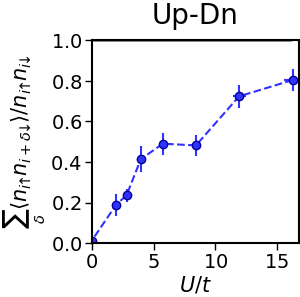

In [30]:
fig, axs = plt.subplots(1, figsize=(3.5, 1.35))
# ShowDisplayCoord(fig)

terrbar(axs, U_val, cond_excess_dn_tot_fit_val/np.array(ndn_vals), xerr=U_err, yerr=np.array(cond_excess_dn_tot_fit_err)/np.array(ndn_vals), 
        ls='--', marker = 'o', colorfrac=0.1, cmap='bwr')

jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
setlabels(axs, ['$U/t$',  '$\\sum_\\delta \\langle n _{i\\! \\!  \\uparrow \\! \\!}n _{i+ \\delta \\! \\!  \\downarrow\\! \\!} \\rangle/ n _{i\\! \\!  \\uparrow \\! \\!}n _{i\\! \\!  \\downarrow \\! \\!}$'])
setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,1]) 
axs.set_xticks([0,5,10,15])
axs.set_title('Up-Dn')
# axs.legend(bbox_to_anchor=(1.05, 0.35), loc='center left',framealpha= 0)
# axs.legend(loc = 'lower right',framealpha= 1)

scalelocofax(axs, 0.35,0.9,0.0,0.05)

plt.show()

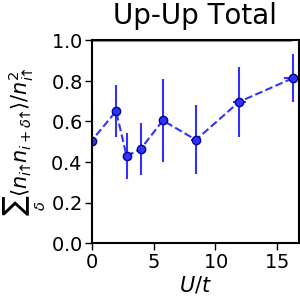

In [31]:
fig, axs = plt.subplots(1, figsize=(3.5, 1.35))
# ShowDisplayCoord(fig)

terrbar(axs, U_val, c_upup_tot_varydmax_val/np.array(nup_vals)/np.array(nup_vals), xerr=U_err, yerr=np.array(c_upup_tot_varydmax_err)/np.array(nup_vals)/np.array(nup_vals), 
        ls='--', marker = 'o', colorfrac=0.1, cmap='bwr')

jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
setlabels(axs, ['$U/t$', '$\\sum_\\delta \\langle n _{i\\! \\!  \\uparrow \\! \\!}n _{i+ \\delta \\! \\!  \\uparrow \\! \\!} \\rangle/ n _{i\\! \\!  \\uparrow \\! \\!}^2$'])
setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [0,1]) 
axs.set_xticks([0,5,10,15])
axs.set_title('Up-Up Total')
# axs.legend(bbox_to_anchor=(1.05, 0.35), loc='center left',framealpha= 0)
# axs.legend(loc = 'lower right',framealpha= 1)

scalelocofax(axs, 0.35,0.9,0.0,0.05)

    
plt.show()

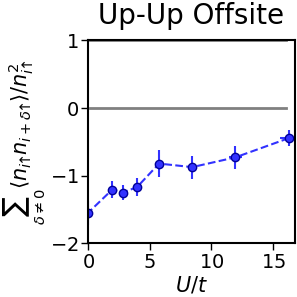

In [32]:
fig, axs = plt.subplots(1, figsize=(3.5, 1.35))
# ShowDisplayCoord(fig)

terrbar(axs, U_val, c_upup_tot_varydmax_val/np.array(nup_vals)/np.array(nup_vals) - (np.array(nup_vals) - np.array(nup_vals)**2)/np.array(nup_vals)/np.array(nup_vals), xerr=U_err, yerr=np.array(c_upup_tot_varydmax_err)/np.array(nup_vals)/np.array(nup_vals), 
        ls='--', marker = 'o', colorfrac=0.1, cmap='bwr')

jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
setlabels(axs, ['$U/t$', '$\\sum_{\\delta\\neq 0} \\langle n _{i\\! \\!  \\uparrow \\! \\!}n _{i+ \\delta \\! \\!  \\uparrow \\! \\!} \\rangle/ n _{i\\! \\!  \\uparrow \\! \\!}^2$'])
setlims(axs,[np.min(U_val), np.max(U_val)+0.5], [-2,1]) 
axs.set_xticks([0,5,10,15])
axs.set_title('Up-Up Offsite')
# axs.legend(bbox_to_anchor=(1.05, 0.35), loc='center left',framealpha= 0)
# axs.legend(loc = 'lower right',framealpha= 1)

scalelocofax(axs, 0.35,0.9,0.0,0.05)

    
plt.show()

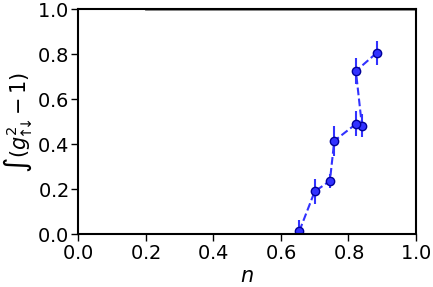

In [33]:
fig, axs = plt.subplots(1, figsize=(2, 1.35))
# ShowDisplayCoord(fig)

terrbar(axs, np.array(ntot_vals), cond_excess_dn_tot_fit_val/np.array(ndn_vals), yerr=np.array(cond_excess_dn_tot_fit_err)/np.array(ndn_vals), 
        ls='--', marker = 'o', colorfrac=0.1, cmap='bwr')

jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [0]*2, ls='-',  lw=1., color = '0.5')
jplot(axs, [U_val[0]-0.2,U_val[-1]+0.2], [1]*2, ls='-',  lw=1., color = '0.5')
setlabels(axs, ['$n$', '$\\int( g^{2}_{ \\! \\!  \\uparrow \\! \\!    \\! \\!  \\downarrow \\! \\!  }-1)$'])
setlims(axs,[0,1], [0,1]) 

    
plt.show()

### Convergence vs distance for sums of correlators

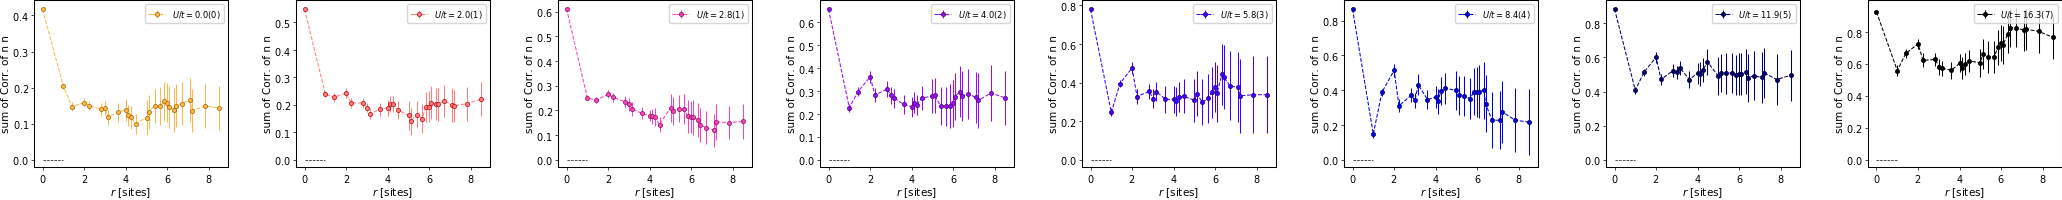

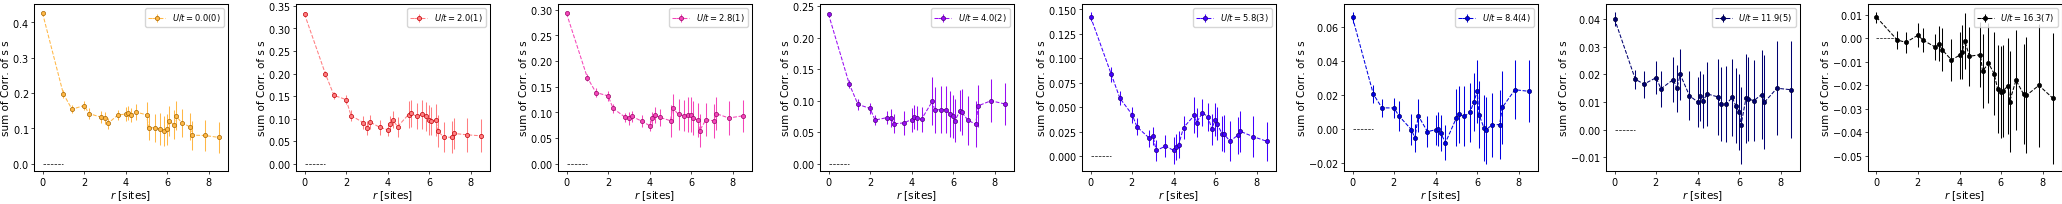

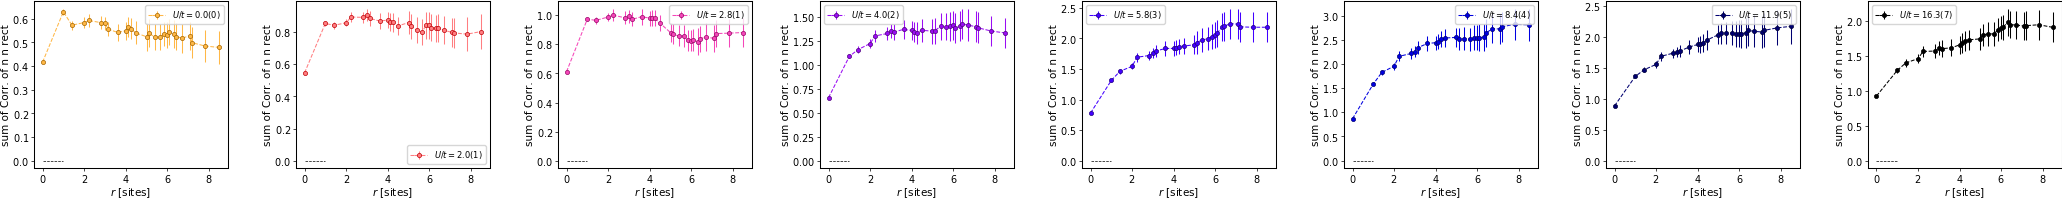

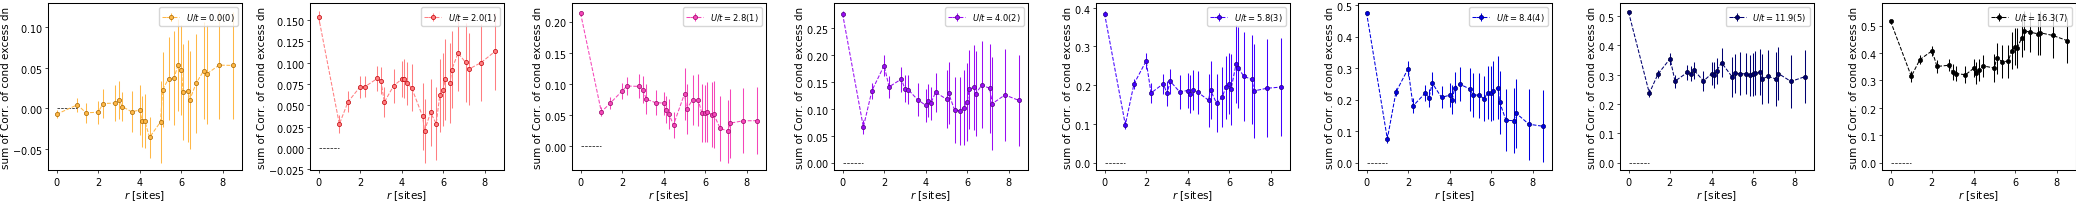

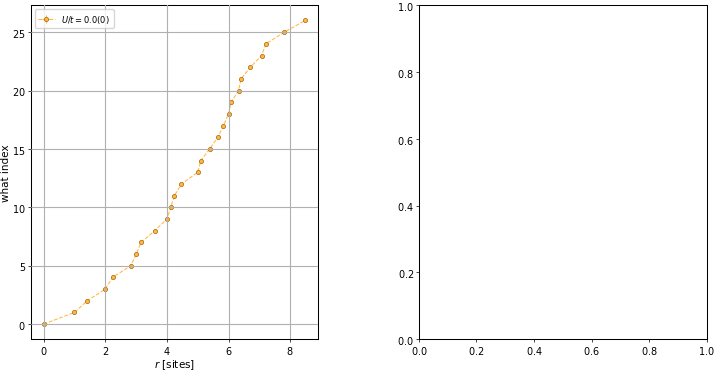

In [60]:
# nn, ss, nn_rect, excess density 
# rr_val
# csum_nn_vals = []; csum_nn_errs = []
# csum_ss_vals = []; csum_ss_errs = []
# csum_updn_vals = []; csum_updn_errs = []
# csum_nn_rect_vals = []; csum_nn_rect_errs = []
# csum_cond_excess_up_vals = []; csum_cond_excess_up_errs = []; 
# csum_cond_excess_dn_vals = []; csum_cond_excess_dn_errs = []; 

plt.rcParams['figure.dpi'] = 100

dataArr_vals = [csum_nn_vals,
               csum_ss_vals,
               csum_nn_rect_vals,
               csum_cond_excess_dn_vals]
dataArr_errs = [csum_nn_errs,
               csum_ss_errs,
               csum_nn_rect_errs,
               csum_cond_excess_dn_errs]
nameArr = ['n n', 's s', 'n n rect', 'cond excess dn']

for _datInd, dat in enumerate(dataArr_vals):
    iiValsPlt = range(8)
    fig, ax = plt.subplots(1,len(iiValsPlt), figsize=(3*len(iiValsPlt),2))
    for _pltInd, ii in enumerate(iiValsPlt): 
        _pltInd = len(iiValsPlt)-_pltInd-1
        colorfracuse = float((ii)/ (len(iiValsPlt)+1))
        xvals = rr_val
        yvals = dataArr_vals[_datInd][ii]
        yerrs = dataArr_errs[_datInd][ii]
        terrbar(ax[_pltInd], xvals,yvals, yerr=yerrs, marker='o', ls='--', 
                        colorfrac= colorfracuse, cmap = 'gnuplot2',
                       label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

        jplot(ax[_pltInd], [0,1],[0,0],  ls='--', lw=.5, color='0.0')  
        ax[_pltInd].legend()
        setlabels(ax[_pltInd], ['$r$ [sites]', 'sum of Corr. of '+nameArr[_datInd]])
    plt.show()
    #fig.savefig('Figures/Convergence_vs_d_max/Fig_Correlator '+ nameArr[_datInd] + '.png', dpi=400, bbox_inches='tight')

fig, ax = plt.subplots(1,2, figsize=(8,4))
for _pltInd in [0]: 
    colorfracuse = float((ii)/ (len(iiValsPlt)+1))
    xvals = rr_val
    yvals = list(range(len(rr_val)))
    terrbar(ax[_pltInd], xvals,yvals, marker='o', ls='--', 
                    colorfrac= colorfracuse, cmap = 'gnuplot2',
                   label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

    jplot(ax[_pltInd], [0,1],[0,0],  ls='--', lw=.5, color='0.0')  
    ax[_pltInd].legend()
    ax[_pltInd].grid()
    setlabels(ax[_pltInd], ['$r$ [sites]', 'what index'])
plt.show()

### Correlations vs density

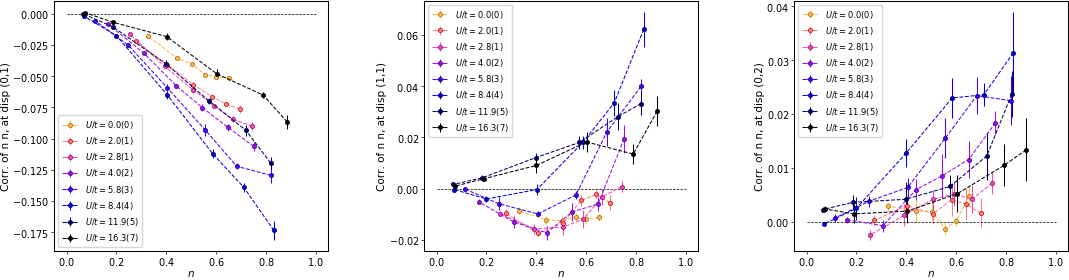

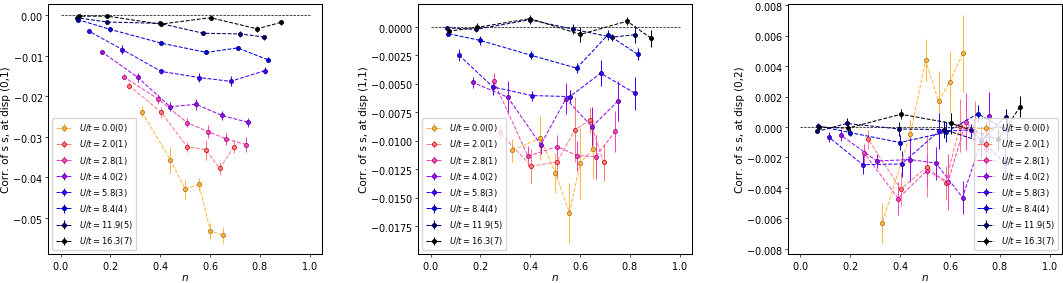

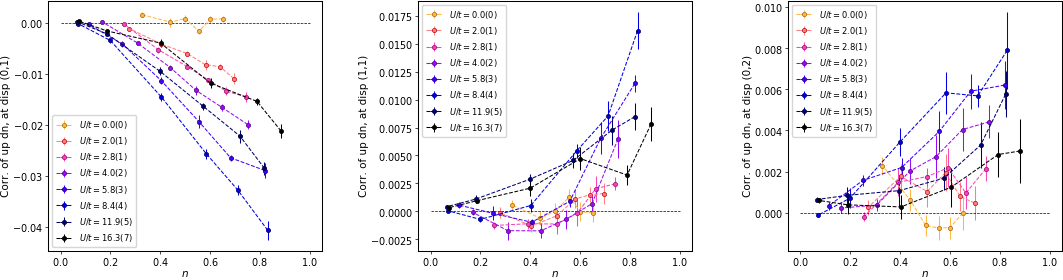

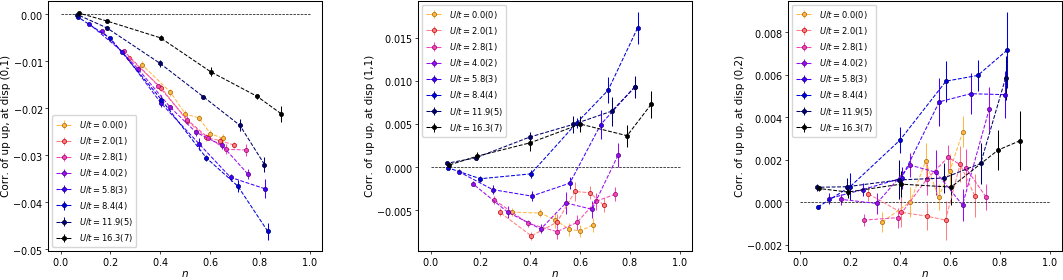

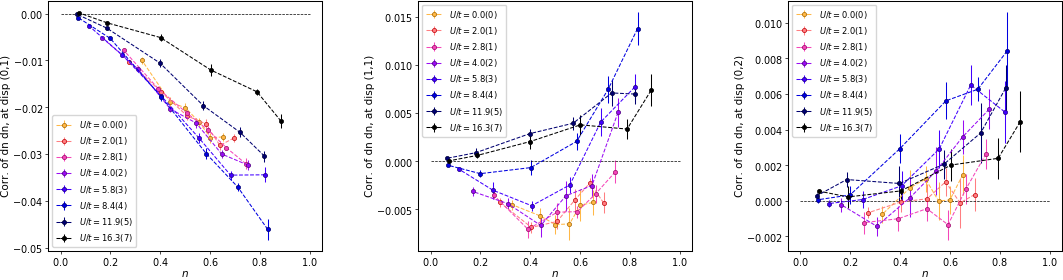

In [61]:
plt.rcParams['figure.dpi'] = 100

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

keyArr = [['n','n'],['s','s'], ['up','dn'], ['up','up'], ['dn','dn']]
dispArr = [[0,1], [1,1], [0,2]]
iiValsPlt = [7,6,5,4,3,2,1,0] 
for key in keyArr:
    fig, ax = plt.subplots(1,len(dispArr), figsize=(4*len(dispArr),3))
    for _dispInd, disp in enumerate(dispArr) :
        [[n_vsn_vals,c_vsn_vals], [n_vsn_errs,c_vsn_errs]] = load_corr_vsn_data_fromdsets(key[0],key[1],disp)

        for iiPltInd, ii in enumerate(iiValsPlt):
            colorfracuse = float((ii)/ (len(iiValsPlt)+1))
            terrbar(ax[_dispInd], n_vsn_vals[ii],c_vsn_vals[ii], xerr=n_vsn_errs[ii],yerr=c_vsn_errs[ii], marker='o', ls='--', 
                    colorfrac= colorfracuse, cmap = 'gnuplot2',
                   label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

        jplot(ax[_dispInd], [0,1],[0,0],  ls='--', lw=.5, color='0.0')  
        ax[_dispInd].legend()
        setlabels(ax[_dispInd], ['$n$', 'Corr. of '+ str(key[0])+' '+ str(key[1])+', at disp ('+str(disp[0])+','+str(disp[1])+')'])
    plt.show()

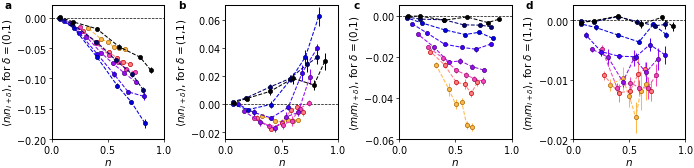

In [62]:
plt.rcParams['figure.dpi'] = 100

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

keyArr = [['n','n'],['s','s']]
dispArr = [[0,1], [1,1]]
iiValsPlt = [7,6,5,4,3,2,1,0] 

labelArr = ['$\\langle n_i n_{i+\\delta} \\rangle$','$\\langle n_i n_{i+\\delta} \\rangle$','$\\langle m_i m_{i+\\delta} \\rangle$', '$\\langle m_i m_{i+\\delta} \\rangle$']

fig, ax = plt.subplots(1,4, figsize=(7.5,1.6))
# ShowDisplayCoord(fig)

for _keyInd, key in enumerate(keyArr):
    for _dispInd, disp in enumerate(dispArr) :
        [[n_vsn_vals,c_vsn_vals], [n_vsn_errs,c_vsn_errs]] = load_corr_vsn_data_fromdsets(key[0],key[1],disp)
        
        axInd= (_keyInd)*2 + _dispInd
        for iiPltInd, ii in enumerate(iiValsPlt):
            colorfracuse = float((ii)/ (len(iiValsPlt)+1))
            terrbar(ax[axInd], n_vsn_vals[ii],c_vsn_vals[ii], xerr=n_vsn_errs[ii],yerr=c_vsn_errs[ii], marker='o', ls='--', 
                    colorfrac= colorfracuse, cmap = 'gnuplot2',
                   label ='$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")")

        jplot(ax[axInd], [0,1],[0,0],  ls='--', lw=.5, color='0.0')  
        setlabels(ax[axInd], ['$n$', labelArr[axInd]+', for $\\delta=$('+str(disp[0])+','+str(disp[1])+')'])        
    
setlims(ax[0],[0,1], [-0.2,0.02]) 
setlims(ax[1],[0,1], [-0.025,0.07]) 
setlims(ax[2],[0,1], [-0.06,0.005]) 
setlims(ax[3],[0,1], [-0.02,0.0025]) 
ax[3].set_yticks([-0.02, -0.01, 0])

# ax[0].legend()

fig.subplots_adjust(wspace=0.55)

# Add abc labels
labelsPlots = ['a', 'b', 'c', 'd']
labelsXoffsets = [-0.4, -0.4, -0.4, -0.4]
for labelInd, _ax in enumerate(ax.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')

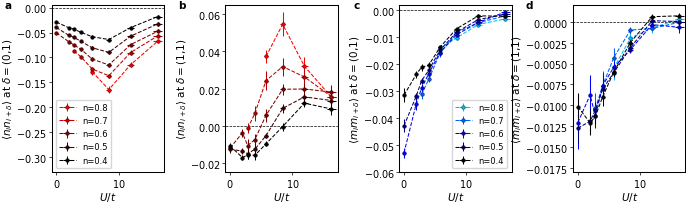

In [63]:
# Get values of correlation at roughly fixed density instead vs U/t, by interpolating the measured data 
UvalPlotMax = np.max(U_val)

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

def extractDataAtFixedn(_desiredn,_n_vsn_vals,_c_vsn_vals, _n_vsn_errs,_c_vsn_errs) : 
    _xaxisAtThisn_vals = []
    _xaxisAtThisn_errs = []
    _valAtThisn_vals = []
    _valAtThisn_errs = []
    for ii in iiValsPlt: # these are different U values. 
        function_valofn = scipy.interpolate.interp1d(_n_vsn_vals[ii], _c_vsn_vals[ii], kind = 'linear') 
        function_errofn_err = scipy.interpolate.interp1d(_n_vsn_vals[ii]**2,_c_vsn_errs[ii]**2, kind = 'linear')
            # to get the appropriate linearly interpolated error, we need (1-eps)^2 sigma_1^2 + eps^2 sigma_2^2 for fractional distance eps from datapoint to 1, 1-eps from datapoint to 2. 
            # To get this, we square the x and y axes, then linearly interpolate to get the appropriate value, but we have to input the square of the x value of the datpoint, and take the sqrt at end to get error 
        # Only append data if this dataset has n extending high enough to make it within the interpolation range, otherwise don't append. 
        if  _desiredn < np.max(_n_vsn_vals[ii]) : 
            _valAtThisn_vals.append(function_valofn(_desiredn))
            _valAtThisn_errs.append(np.sqrt(function_errofn_err(_desiredn**2))) # have to square input, then sqrt output to get appropriate error propagation
            _xaxisAtThisn_vals.append(U_val[ii])
            _xaxisAtThisn_errs.append(U_err[ii])
    return _xaxisAtThisn_vals, _xaxisAtThisn_errs ,_valAtThisn_vals , _valAtThisn_errs


plt.rcParams['figure.dpi'] = 100

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

keyArr = [['n','n'],['s','s']]
dispArr = [[0,1], [1,1]]
iiValsPlt = [7,6,5,4,3,2,1,0] 
labelArr = ['$\\langle n_i n_{i+\\delta} \\rangle$','$\\langle n_i n_{i+\\delta} \\rangle$','$\\langle m_i m_{i+\\delta} \\rangle$', '$\\langle m_i m_{i+\\delta} \\rangle$']
desirednArr = [0.4, 0.5, 0.6, 0.7, 0.8] # [0.35,0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8] 
cmapuseArr =[mpl.colors.LinearSegmentedColormap.from_list("", ["black",'maroon', 'red']) , mpl.colors.LinearSegmentedColormap.from_list("", ["black",'blue', 'deepskyblue']) ]
nNormalizationPower = 0
plotNormalizationAmp = 1.8
symbolUse = 'o'
msUse = 2.5

fig, ax = plt.subplots(1,4, figsize=(7.5,2.0))
# ShowDisplayCoord(fig)

for _keyInd, key in enumerate(keyArr):
    
    for _dispInd, disp in enumerate(dispArr) :
        [[n_vsn_vals,c_vsn_vals], [n_vsn_errs,c_vsn_errs]] = load_corr_vsn_data_fromdsets(key[0],key[1],disp)

        axInd= (_keyInd)*2 + _dispInd
        cmapuse = cmapuseArr[_keyInd]
        
        for desiredn in reversed(desirednArr) :
            xaxisAtThisn_vals, xaxisAtThisn_errs ,valAtThisn_vals , valAtThisn_errs = extractDataAtFixedn(desiredn,n_vsn_vals,c_vsn_vals, n_vsn_errs,c_vsn_errs)
            valAtThisn_vals = np.array(valAtThisn_vals)/(desiredn**nNormalizationPower)
            valAtThisn_errs = np.array(valAtThisn_errs)/(desiredn**nNormalizationPower)
            colorfracuse = (desiredn - np.min(desirednArr))/(np.max(desirednArr)-np.min(desirednArr))
            terrbar(ax[axInd], xaxisAtThisn_vals,valAtThisn_vals, xerr=xaxisAtThisn_errs,yerr=valAtThisn_errs, marker=symbolUse, ls='--', 
                        cmap = cmapuse,  colorfrac= colorfracuse, label = 'n='+str(desiredn), ms =msUse)

        jplot(ax[axInd], [-2,UvalPlotMax+2],[0,0],  ls='--', lw=.5, color='0.0')  
        setlabels(ax[axInd], ['$U/t$', labelArr[axInd]+' at $\\delta=$('+str(disp[0])+','+str(disp[1])+')'])   
            
# setlims(ax[0],[0-0.75,UvalPlotMax+1], [-0.24   * (plotNormalizationAmp**nNormalizationPower),0.005   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[1],[0-0.75,UvalPlotMax+1], [-0.04   * (plotNormalizationAmp**nNormalizationPower),0.04   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[2],[0-0.75,UvalPlotMax+1], [-0.08   * (plotNormalizationAmp**nNormalizationPower),0.002   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[3],[0-0.75,UvalPlotMax+1], [-0.025   * (plotNormalizationAmp**nNormalizationPower),0.002 * (plotNormalizationAmp**nNormalizationPower)]) 

setlims(ax[0],[0-0.75,UvalPlotMax+1], [-0.33   * (plotNormalizationAmp**nNormalizationPower),0.005   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[1],[0-0.75,UvalPlotMax+1], [-0.025   * (plotNormalizationAmp**nNormalizationPower),0.065   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[2],[0-0.75,UvalPlotMax+1], [-0.06   * (plotNormalizationAmp**nNormalizationPower),0.002   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[3],[0-0.75,UvalPlotMax+1], [-0.018   * (plotNormalizationAmp**nNormalizationPower),0.002 * (plotNormalizationAmp**nNormalizationPower)]) 
# ax[3].set_yticks([-0.01, 0])

ax[0].legend()
ax[2].legend()
# ax[0].legend()

fig.subplots_adjust(wspace=0.55)

# Add abc labels
labelsPlots = ['a', 'b', 'c', 'd']
labelsXoffsets = [-0.4, -0.4, -0.4, -0.4]
for labelInd, _ax in enumerate(ax.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')

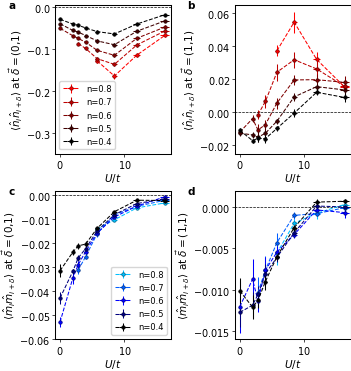

In [40]:
# Get values of correlation at roughly fixed density instead vs U/t, by interpolating the measured data 
UvalPlotMax = np.max(U_val)

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

def extractDataAtFixedn(_desiredn,_n_vsn_vals,_c_vsn_vals, _n_vsn_errs,_c_vsn_errs) : 
    _xaxisAtThisn_vals = []
    _xaxisAtThisn_errs = []
    _valAtThisn_vals = []
    _valAtThisn_errs = []
    for ii in iiValsPlt: # these are different U values. 
        function_valofn = scipy.interpolate.interp1d(_n_vsn_vals[ii], _c_vsn_vals[ii], kind = 'linear') 
        function_errofn_err = scipy.interpolate.interp1d(_n_vsn_vals[ii]**2,_c_vsn_errs[ii]**2, kind = 'linear')
            # to get the appropriate linearly interpolated error, we need (1-eps)^2 sigma_1^2 + eps^2 sigma_2^2 for fractional distance eps from datapoint to 1, 1-eps from datapoint to 2. 
            # To get this, we square the x and y axes, then linearly interpolate to get the appropriate value, but we have to input the square of the x value of the datpoint, and take the sqrt at end to get error 
        # Only append data if this dataset has n extending high enough to make it within the interpolation range, otherwise don't append. 
        if  _desiredn < np.max(_n_vsn_vals[ii]) : 
            _valAtThisn_vals.append(function_valofn(_desiredn))
            _valAtThisn_errs.append(np.sqrt(function_errofn_err(_desiredn**2))) # have to square input, then sqrt output to get appropriate error propagation
            _xaxisAtThisn_vals.append(U_val[ii])
            _xaxisAtThisn_errs.append(U_err[ii])
    return _xaxisAtThisn_vals, _xaxisAtThisn_errs ,_valAtThisn_vals , _valAtThisn_errs

plt.rcParams['figure.dpi'] = 100

# Connected correlators vs density
def load_corr_vsn_data_fromdsets(name1, name2, disp):
    _n_vals = []; _n_errs = []; 
    _c_vals = []; _c_errs = [];   

    for ii, key in enumerate(data_sets.keys()):
        dset = data_sets[key]
        _fname = 'C_{}-{}_disp{}{}_vsn_U={}({}).npy'.format(name1,name2,disp[0],disp[1],dset['U'][0], dset['U'][1])
        [_n_val,_c_val], [_n_err,_c_err] = np.load(os.path.join(data_dir, _fname))
        _c_vals.append(_c_val)
        _c_errs.append(_c_err)
        _n_vals.append(_n_val)
        _n_errs.append(_n_err)
    return [_n_vals,_c_vals], [_n_errs,_c_errs]

keyArr = [['n','n'],['s','s']]
dispArr = [[0,1], [1,1]]
iiValsPlt = [7,6,5,4,3,2,1,0] 
labelArr = ['$\\langle \\hat{n}_i \\hat{n}_{i+\\delta} \\rangle$','$\\langle \\hat{m}_i \\hat{m}_{i+\\delta} \\rangle$']
desirednArr = [0.4, 0.5, 0.6, 0.7, 0.8] # [0.35,0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8] 
cmapuseArr =[mpl.colors.LinearSegmentedColormap.from_list("", ["black",'maroon', 'red']) , mpl.colors.LinearSegmentedColormap.from_list("", ["black",'blue', 'deepskyblue']) ]
nNormalizationPower = 0
plotNormalizationAmp = 1.8
symbolUse = 'o'
msUse = 2.5

fig, ax = plt.subplots(2,2, figsize=(3.5,4))
# ShowDisplayCoord(fig)

for _keyInd, key in enumerate(keyArr):
    
    for _dispInd, disp in enumerate(dispArr) :
        [[n_vsn_vals,c_vsn_vals], [n_vsn_errs,c_vsn_errs]] = load_corr_vsn_data_fromdsets(key[0],key[1],disp)

        axRowInd = _keyInd
        axInd=_dispInd
        cmapuse = cmapuseArr[_keyInd]
        
        for desiredn in reversed(desirednArr) :
            xaxisAtThisn_vals, xaxisAtThisn_errs ,valAtThisn_vals , valAtThisn_errs = extractDataAtFixedn(desiredn,n_vsn_vals,c_vsn_vals, n_vsn_errs,c_vsn_errs)
            valAtThisn_vals = np.array(valAtThisn_vals)/(desiredn**nNormalizationPower)
            valAtThisn_errs = np.array(valAtThisn_errs)/(desiredn**nNormalizationPower)
            colorfracuse = (desiredn - np.min(desirednArr))/(np.max(desirednArr)-np.min(desirednArr))
            terrbar(ax[axRowInd, axInd], xaxisAtThisn_vals,valAtThisn_vals, xerr=xaxisAtThisn_errs,yerr=valAtThisn_errs, marker=symbolUse, ls='--', 
                        cmap = cmapuse,  colorfrac= colorfracuse, label = 'n='+str(desiredn), ms =msUse)

        jplot(ax[axRowInd, axInd], [-2,UvalPlotMax+2],[0,0],  ls='--', lw=.5, color='0.0')  
        setlabels(ax[axRowInd, axInd], ['$U/t$', labelArr[axRowInd]+' at $\\vec{\\delta}=$('+str(disp[0])+','+str(disp[1])+')'])   
            
# setlims(ax[0],[0-0.75,UvalPlotMax+1], [-0.24   * (plotNormalizationAmp**nNormalizationPower),0.005   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[1],[0-0.75,UvalPlotMax+1], [-0.04   * (plotNormalizationAmp**nNormalizationPower),0.04   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[2],[0-0.75,UvalPlotMax+1], [-0.08   * (plotNormalizationAmp**nNormalizationPower),0.002   * (plotNormalizationAmp**nNormalizationPower)]) 
# setlims(ax[3],[0-0.75,UvalPlotMax+1], [-0.025   * (plotNormalizationAmp**nNormalizationPower),0.002 * (plotNormalizationAmp**nNormalizationPower)]) 

setlims(ax[0,0],[0-0.75,UvalPlotMax+1], [-0.35   * (plotNormalizationAmp**nNormalizationPower),0.005   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[0,1],[0-0.75,UvalPlotMax+1], [-0.025   * (plotNormalizationAmp**nNormalizationPower),0.065   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[1,0],[0-0.75,UvalPlotMax+1], [-0.06   * (plotNormalizationAmp**nNormalizationPower),0.002   * (plotNormalizationAmp**nNormalizationPower)]) 
setlims(ax[1,1],[0-0.75,UvalPlotMax+1], [-0.016   * (plotNormalizationAmp**nNormalizationPower),0.002 * (plotNormalizationAmp**nNormalizationPower)]) 
# ax[3].set_yticks([-0.01, 0])

ax[0,0].legend()
ax[1,0].legend()
# ax[0].legend()

fig.subplots_adjust(wspace=0.55)
fig.subplots_adjust(hspace=0.25)

# Add abc labels
labelsPlots = ['a', 'b', 'c', 'd']
labelsXoffsets = [-0.4, -0.4, -0.4, -0.4]
for labelInd, _ax in enumerate(ax.ravel()):
    trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],-0.05, fig.dpi_scale_trans) # horiz and vert
    _ax.text(0.0, 1.0, labelsPlots[labelInd], transform=_ax.transAxes + trans,
            weight = 'bold', fontsize=7.5,  
            horizontalalignment='right', verticalalignment='bottom', fontfamily='sansserif')

In [41]:
fig.savefig('Figures/VsDensity/Fig_CorrelatorsVsDensity.png', dpi=400, bbox_inches='tight')

### Other types of particles (ie singlon singlon etc)

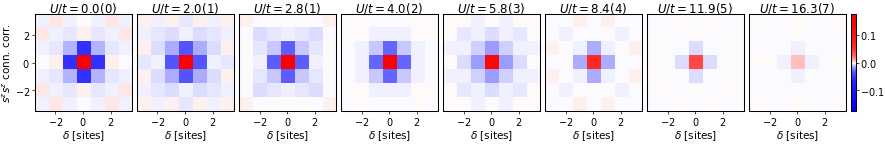

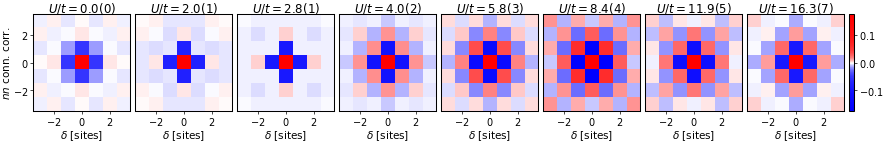

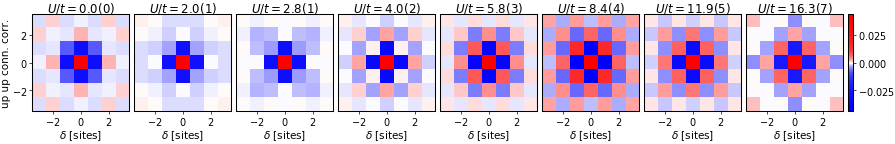

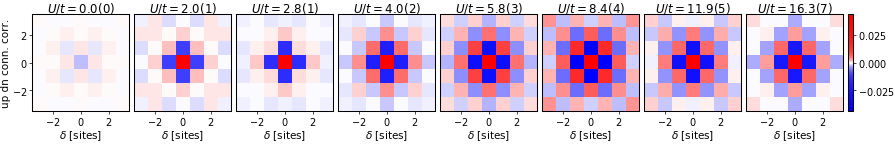

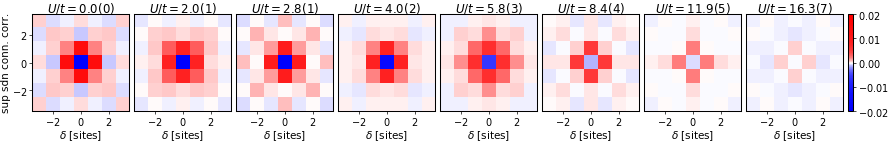

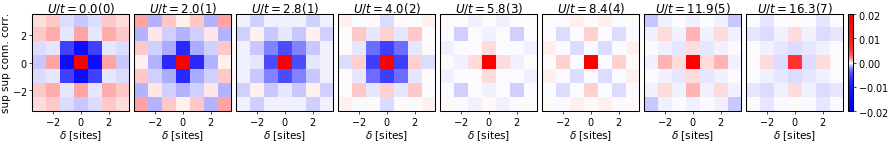

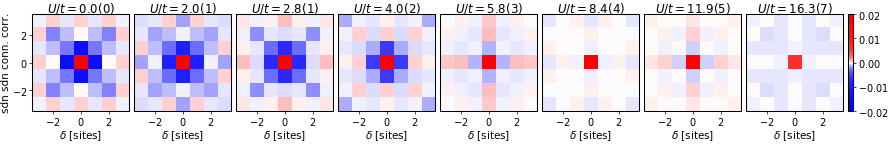

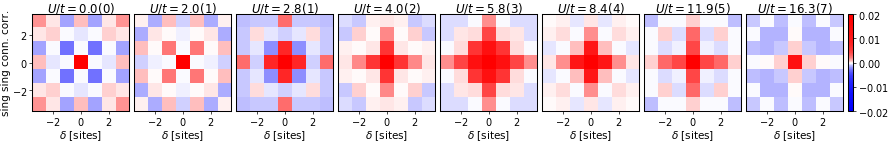

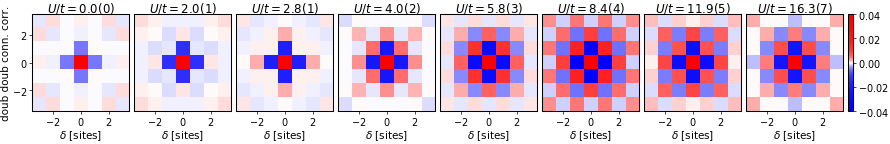

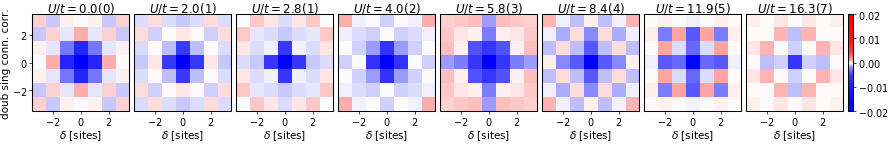

In [66]:
plt.rcParams['figure.dpi'] = 100

vrange = 0.175
d_max_plt = d_max_plt_glob
ax_size = 1.2
xrange = d_max_plt+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'
textSize = 8.5

iiValsPlt = [7,6,5,4,3,2,1,0] 

connCorrArrSet = [c_ss_vals,
                  c_nn_vals,
                  c_upup_vals,
                  c_updn_vals,
                  c_singlonupsinglondn_vals,
                  c_singlonupsinglonup_vals,
                  c_singlondnsinglondn_vals,
                  c_singlonsinglon_vals,
                  c_doublondoublon_vals,
                  c_doublonsinglon_vals
                 ]
connCorrArrSetNames = ['$s^z s^z$',
                       '$n n$', 
                       'up up', 
                       'up dn', 
                       'sup sdn', 
                       'sup sup', 
                       'sdn sdn', 
                       'sing sing', 
                       'doub doub', 
                       'doub sing']
pltScaleArr = [0.175,
              0.175,
              0.175/4.0,
              0.175/4.0,
              0.02,
              0.02,
              0.02,
              0.02,
              0.04,
              0.02]

for _datInd, connCorrArr in enumerate(connCorrArrSet):
   
    vrange = pltScaleArr[_datInd]

    fig, axs = plt.subplots(1, len(iiValsPlt), figsize=(ax_size*(len(iiValsPlt)), ax_size*1.0))
    for iiPltInd, ii in enumerate(iiValsPlt):
        if d_max_plt == d_max:
            imgPlot_plt = axs[ iiPltInd].imshow(connCorrArr[ii], cmap=cmap_plt, vmin=-vrange, vmax=vrange, extent=[-xrange, xrange, -xrange, xrange])
        else:
            imgPlot_plt = axs[ iiPltInd].imshow(connCorrArr[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)], 
                                                cmap=cmap_plt, vmin=-vrange, vmax=vrange, extent=[-xrange, xrange, -xrange, xrange])
        setlabels(axs[iiPltInd], ['$\\delta$ [sites]', ''])
        if iiPltInd == 0: 
            axs[ iiPltInd].set_yticks([-d_max_plt+1, 0, d_max_plt-1])
            axs[ iiPltInd].set_xticks([-d_max_plt+1, 0, d_max_plt-1])
            setlabels(axs[ iiPltInd],['$\\delta$ [sites]',connCorrArrSetNames[_datInd]+' conn. corr.'])
        else: 
            axs[ iiPltInd].set_yticks([])
            axs[ iiPltInd].set_xticks([-d_max_plt+1, 0, d_max_plt-1])

        # add anotation
        axs[ iiPltInd].annotate('$U/t=$'+str(np.round(U_val[ii],1))+"("+str(np.round(U_err[ii]*10).astype(int))+")", xy=(0.5, 0.0),  xycoords='axes fraction',
                xytext=(0.5, 1.14), textcoords='axes fraction',
                horizontalalignment='center', verticalalignment='top', size = textSize)

    fig.subplots_adjust(wspace=0.05, hspace=0.05)

    fig.canvas.draw() # have to draw before get position 
    pos = axs[-1].get_position()
    cb_fracwidth = 0.05
    cb_offset = 1
    axNew = fig.add_axes([pos.x0+pos.width+pos.width*cb_fracwidth*cb_offset,pos.y0,pos.width*cb_fracwidth, pos.height])
    fig.colorbar(imgPlot_plt, cax=axNew)

    plt.show()

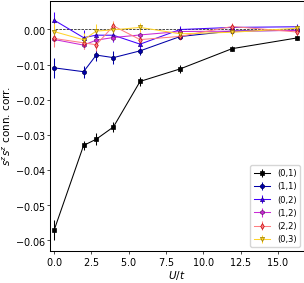

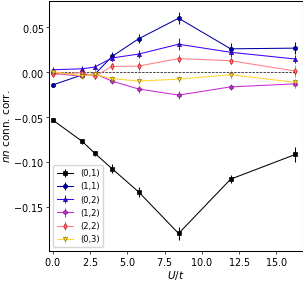

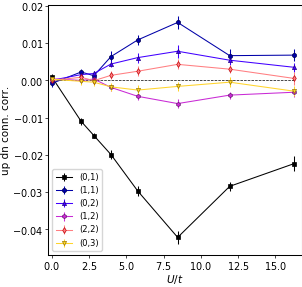

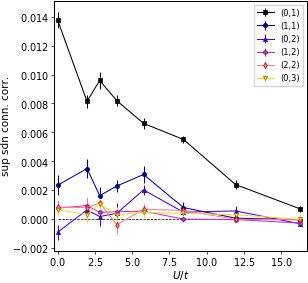

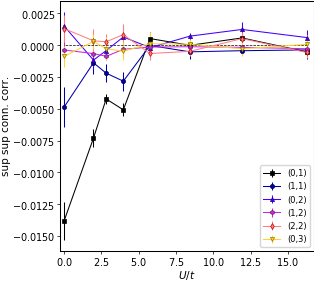

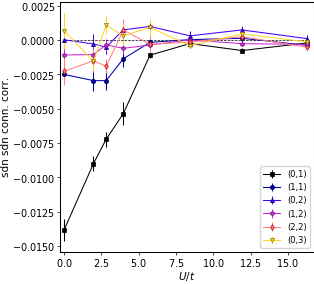

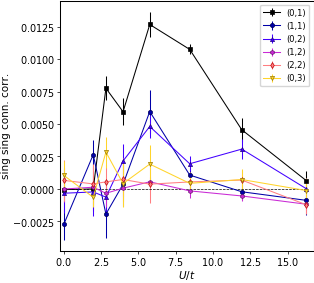

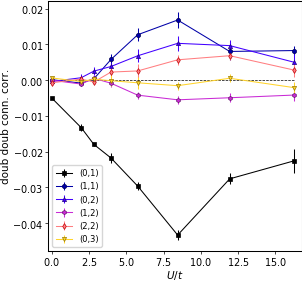

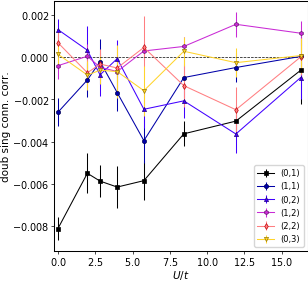

In [67]:
plt.rcParams['figure.dpi'] = 100

vrange = 0.175
d_max_plt = d_max_glob
ax_size = 1.2
xrange = d_max+0.5
cmap_plt =  bwr_nonlinear_cmap # 'bwr' #'PuOr_r' #'RdBu_r'
xUmin = -0.25
xUmax = 16.75

iiValsPlt = [7,6,5,4,3,2,1,0] 
markerList = ['D','s','o','^','h', 'd','v']
cmapuse = 'gnuplot2'

connCorrArrSet_vals = [c_ss_vsRadWithoutDegen_vals,
                  c_nn_vsRadWithoutDegen_vals,
                  c_updn_vsRadWithoutDegen_vals,
                  c_singlonupsinglondn_vsRadWithoutDegen_vals,
                  c_singlonupsinglonup_vsRadWithoutDegen_vals,
                  c_singlondnsinglondn_vsRadWithoutDegen_vals,
                  c_singlonsinglon_vsRadWithoutDegen_vals,
                  c_doublondoublon_vsRadWithoutDegen_vals,
                  c_doublonsinglon_vsRadWithoutDegen_vals
                 ]
connCorrArrSet_errs = [c_ss_vsRadWithoutDegen_errs,
                  c_nn_vsRadWithoutDegen_errs,
                  c_updn_vsRadWithoutDegen_errs,
                  c_singlonupsinglondn_vsRadWithoutDegen_errs,
                  c_singlonupsinglonup_vsRadWithoutDegen_errs,
                  c_singlondnsinglondn_vsRadWithoutDegen_errs,
                  c_singlonsinglon_vsRadWithoutDegen_errs,
                  c_doublondoublon_vsRadWithoutDegen_errs,
                  c_doublonsinglon_vsRadWithoutDegen_errs
                 ]
connCorrArrSetNames = ['$s^z s^z$',
                       '$n n$', 
                       'up dn', 
                       'sup sdn', 
                       'sup sup', 
                       'sdn sdn', 
                       'sing sing', 
                       'doub doub', 
                       'doub sing']

for _datInd, connCorrArr_vals in enumerate(connCorrArrSet_vals):
    fig, axs = plt.subplots(1, figsize=(3,3))
    for radInd in [1,2,3,4,5,6]:
        colorfracuse = float((radInd-1)/6)
        markeruse = markerList[radInd]
        xvals = U_val
        yvals = np.array(connCorrArrSet_vals)[_datInd,:,radInd]
        yerrs = np.array(connCorrArrSet_errs)[_datInd,:,radInd]
        terrbar(axs, xvals, yvals, yerr=yerrs, ls='-', colorfrac=colorfracuse, cmap=cmapuse, marker = markeruse,
                label ='('+str(int(np.abs(xx_val[radInd])))+","+str(int(np.abs(yy_val[radInd])))+")")
    jplot(axs, xvals, yvals*0,  ls='--', lw=.5, color='0.0')  
    setlabels(axs, ['$U/t$', connCorrArrSetNames[_datInd]+' conn. corr.'])
    setlims(axs, [xUmin,xUmax], None)
    axs.legend()
    plt.show()

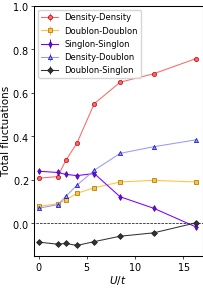

In [68]:
# Get total doublon fluctuations

iiValsPlt = [7,6,5,4,3,2,1,0] 
d_max_plt = d_max_plt_glob                                                

fig, axs = plt.subplots(1, figsize=(2,3))


# Get correlator sums for each dataset 

ddsums = []
nnsums = []
ndsums = []
sssums = []
dssums = []
Uvalsums = []
ntotsums = []
for ii in iiValsPlt:
    ddsums.append(np.sum(c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
#     nnsums.append(np.sum(c_nn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)])) # corrected for total atom number fluctuations
    nnsums.append(np.sum(4*c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+4*c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+c_singlonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    ndsums.append(np.sum(2*c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    sssums.append(np.sum(c_singlonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    dssums.append(np.sum(c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    Uvalsums.append(U_val[ii])
    ntotsums.append(ntot_vals[ii])
ntotsums = np.array(ntotsums)
nnsums = np.array(nnsums)
ndsums = np.array(ndsums)
ddsums = np.array(ddsums)
sssums = np.array(sssums)
dssums = np.array(dssums)
Uvalsums = np.array(Uvalsums)


                
terrbar(axs, Uvalsums, nnsums,  ls='-', colorfrac=0.8, cmap='bwr', marker = 'o', label = 'Density-Density')
terrbar(axs, Uvalsums, ddsums,  ls='-', colorfrac=0.8, cmap='gnuplot2', marker = 's', label = 'Doublon-Doublon')
terrbar(axs, Uvalsums, sssums,  ls='-', colorfrac=0.4, cmap='gnuplot2', marker = 'd', label = 'Singlon-Singlon')
terrbar(axs, Uvalsums, ndsums,  ls='-', colorfrac=0.3, cmap='bwr', marker = '^', label = 'Density-Doublon')
terrbar(axs, Uvalsums, dssums,  ls='-', colorfrac=0.2, cmap='gray', marker = 'D', label = 'Doublon-Singlon')

jplot(axs, [-10,20],  [0,0],  ls='--', lw=.5, color='0.0')  
setlabels(axs, ['$U/t$', 'Total fluctuations'])
setlims(axs, [-0.5,17], [-0.15,1])
axs.legend()
plt.show()

fig.savefig('Figures/SIFigures/TotalDoublonCorrelations/Fig_DoublonCorrelationSums.png', dpi=400, bbox_inches='tight')


[14.1, 10.184999999999999, 7.1, 4.865, 3.395, 2.395, 0.985]
[0.00335955 0.00440502 0.01528515 0.02501431 0.02763953 0.01900103
 0.02342613]


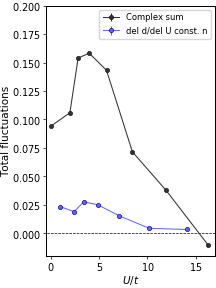

In [69]:
# Get total doublon fluctuations

iiValsPlt = [7,6,5,4,3,2,1,0] 
d_max_plt = d_max_plt_glob                                                

fig, axs = plt.subplots(1, figsize=(2,3))


# Get correlator sums for each dataset 

ddsums = []
nnsums = []
ndsums = []
sssums = []
dssums = []
Uvalsums = []
ntotsums = []
for ii in iiValsPlt:
    ddsums.append(np.sum(c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
#     nnsums.append(np.sum(c_nn_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)])) # corrected for total atom number fluctuations
    nnsums.append(np.sum(4*c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+4*c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+c_singlonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    ndsums.append(np.sum(2*c_doublondoublon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]+c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    sssums.append(np.sum(c_singlonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    dssums.append(np.sum(c_doublonsinglon_vals[ii][d_max-d_max_plt:-(d_max-d_max_plt),d_max-d_max_plt:-(d_max-d_max_plt)]))
    Uvalsums.append(U_val[ii])
    ntotsums.append(ntot_vals[ii])
ntotsums = np.array(ntotsums)
nnsums = np.array(nnsums)
ndsums = np.array(ndsums)
ddsums = np.array(ddsums)
sssums = np.array(sssums)
dssums = np.array(dssums)
Uvalsums = np.array(Uvalsums)

complexsums = (ddsums - (ndsums**2/nnsums))/T_cent_fit_vals

# Get derivative of d with U at constant n for each dataset.

# For every pair of datasets, define del d/ del U at the mean value of n between the dataset values and assign it a U value in the middle too. 


# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsUse = []
for nInd in range(len(ntot_vals)-1):
    nvalsUse.append((ntot_vals[nInd] + ntot_vals[nInd+1])/2)
nvalsUse = np.array(nvalsUse)

radIndStartForFit = 2

dDerivarrsPlt_vals = []
dDerivarrsPlt_errs = []
nPlt_vals = nvalsUse
UPlt_vals = []
for nvalInd, nval in enumerate(nvalsUse):
    iiIndLow = nvalInd
    iiIndHigh = nvalInd+1
    ULow = U_val[iiIndLow]
    UHigh = U_val[iiIndHigh]
    
    # Get low d 
    ii = iiIndLow
    function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
    function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
    darrThisnLow_val = function_dofn(nval)
    darrThisnLow_err = function_dofn_err(nval)
    
    # Get high d 
    ii = iiIndHigh
    function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
    function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
    darrThisnHigh_val = function_dofn(nval)
    darrThisnHigh_err = function_dofn_err(nval)
    
    dDerivarrsPlt_vals.append((darrThisnLow_val-darrThisnHigh_val)/ (ULow-UHigh))
#     dDerivarrsPlt_errs.append(darrThisnLow_err)
    UPlt_vals.append((UHigh+ULow)/2)
    
    
#     print(iiIndHigh, iiIndLow)
#     print(UHigh, ULow)
#     print(nval,  darrThisnHigh_val, darrThisnLow_val)
#     print((darrThisnLow_val-darrThisnHigh_val), (ULow-UHigh))
#     print('=============')

dDerivarrsPlt_vals = np.array(dDerivarrsPlt_vals)
print(UPlt_vals)
print(dDerivarrsPlt_vals)

                
# terrbar(axs, Uvalsums, nnsums,  ls='-', colorfrac=0.8, cmap='bwr', marker = 'o', label = 'Density-Density')
# terrbar(axs, Uvalsums, ddsums,  ls='-', colorfrac=0.8, cmap='gnuplot2', marker = 's', label = 'Doublon-Doublon')
# terrbar(axs, Uvalsums, sssums,  ls='-', colorfrac=0.4, cmap='gnuplot2', marker = 'd', label = 'Singlon-Singlon')
# terrbar(axs, Uvalsums, ndsums,  ls='-', colorfrac=0.3, cmap='bwr', marker = '^', label = 'Density-Doublon')
# terrbar(axs, Uvalsums, dssums,  ls='-', colorfrac=0.2, cmap='gray', marker = 'D', label = 'Doublon-Singlon')
terrbar(axs, Uvalsums, complexsums,  ls='-', colorfrac=0.2, cmap='gray', marker = 'o', label = 'Complex sum')
terrbar(axs, UPlt_vals, dDerivarrsPlt_vals,  ls='-', colorfrac=0.2, cmap='bwr', marker = 'o', label = 'del d/del U const. n')

jplot(axs, [-10,20],  [0,0],  ls='--', lw=.5, color='0.0')  
setlabels(axs, ['$U/t$', 'Total fluctuations'])
setlims(axs, [-0.5,17], [-0.02,0.2])
axs.legend()
plt.show()

fig.savefig('Figures/SIFigures/TotalDoublonCorrelations/Fig_ComplexCorrelationSums.png', dpi=400, bbox_inches='tight')


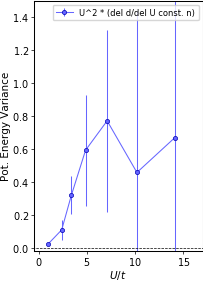

In [70]:
# Get total doublon fluctuations

iiValsPlt = [7,6,5,4,3,2,1,0] 
d_max_plt = d_max_plt_glob                                                

fig, axs = plt.subplots(1, figsize=(2,3))


# Get derivative of d with U at constant n for each dataset.

# For every pair of datasets, define del d/ del U at the mean value of n between the dataset values and assign it a U value in the middle too. 


# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsUse = []
for nInd in range(len(ntot_vals)-1):
    nvalsUse.append((ntot_vals[nInd] + ntot_vals[nInd+1])/2)
nvalsUse = np.array(nvalsUse)

radIndStartForFit = 2

dDerivarrsPlt_vals = []
dDerivarrsPlt_errs = []
nPlt_vals = nvalsUse
UPlt_vals = []
for nvalInd, nval in enumerate(nvalsUse):
    iiIndLow = nvalInd
    iiIndHigh = nvalInd+1
    ULow = U_val[iiIndLow]
    UHigh = U_val[iiIndHigh]
    
    # Get low d 
    ii = iiIndLow
    function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
    function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
    darrThisnLow_val = function_dofn(nval)
    darrThisnLow_err = function_dofn_err(nval)
    
    # Get high d 
    ii = iiIndHigh
    function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
    function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
    darrThisnHigh_val = function_dofn(nval)
    darrThisnHigh_err = function_dofn_err(nval)
    
    dDerivarrsPlt_vals.append((darrThisnLow_val-darrThisnHigh_val)/ (ULow-UHigh))
    dDerivarrsPlt_errs.append(np.sqrt(darrThisnLow_err**2+darrThisnHigh_err**2)/np.sqrt(2)) # Not correct error propagation 
    UPlt_vals.append((UHigh+ULow)/2)
    
    
#     print(iiIndHigh, iiIndLow)
#     print(UHigh, ULow)
#     print(nval,  darrThisnHigh_val, darrThisnLow_val)
#     print((darrThisnLow_val-darrThisnHigh_val), (ULow-UHigh))
#     print('=============')

dDerivarrsPlt_vals = np.array(dDerivarrsPlt_vals)
dDerivarrsPlt_errs = np.array(dDerivarrsPlt_errs)
UPlt_vals = np.array(UPlt_vals)

potEnFluct_vals = np.sqrt(dDerivarrsPlt_vals)*UPlt_vals
potEnFluct_errs = UPlt_vals*dDerivarrsPlt_errs/np.sqrt(dDerivarrsPlt_vals)/2

potEnVariance_vals = dDerivarrsPlt_vals*UPlt_vals**2
potEnVariance_errs = dDerivarrsPlt_errs*UPlt_vals**2

# terrbar(axs, UPlt_vals, potEnFluct_vals, yerr= potEnFluct_errs,  ls='-', colorfrac=0.2, cmap='bwr', marker = 'o', label = 'U*sqrt(del d/del U const. n)')
terrbar(axs, UPlt_vals, potEnVariance_vals, yerr= potEnVariance_errs,  ls='-', colorfrac=0.2, cmap='bwr', marker = 'o', label = 'U^2 * (del d/del U const. n)')

jplot(axs, [-10,20],  [0,0],  ls='--', lw=.5, color='0.0')  
# setlabels(axs, ['$U/t$', 'Pot. Energy Std. Dev.'])
setlabels(axs, ['$U/t$', 'Pot. Energy Variance'])
setlims(axs, [-0.5,17], [-0.02,1.5])
axs.legend()
plt.show()

fig.savefig('Figures/SIFigures/TotalDoublonCorrelations/Fig_PotentialEnergyFluct.png', dpi=400, bbox_inches='tight')


In [71]:
print(U_val)

[16.27, 11.93, 8.44, 5.76, 3.97, 2.82, 1.97, 0.0]


# Compare to Doublon hole paper 

Where does data come from? 

Inside Doubloon hole paper files, go to FINAL_Files, ALLFigures_v10 then python file for saving data: AllFigures_DataSaving.ipynb is how it was saved.

Here's code used to save things:

In [21]:

# output_dir = r'SavedDataForReplotting'

# fig_subdir = r'Fig2'

# for jjj in range(3) : # loop over the 3 datasets in the figure
#     def saveDataAndErr_vsUovt( _dataArr, _keyName):
#         # Save data
#         fname = '{}_dset_{}.npy'.format(_keyName, jjj)
#         np.save(os.path.join(output_dir,fig_subdir, fname), _dataArr)

#     # stuff vs radius  
#     saveDataAndErr_vsUovt([DQMC_r_rvals_Fig2[jjj],DQMC_Dens_rvals_Fig2[jjj],DQMC_dd_rvals_Fig2[jjj]], 'DQMC_radialData') # radius, density, doublon density
#     saveDataAndErr_vsUovt([radialDensitiesArr_Fig2[jjj][0],radialDensitiesArr_Fig2[jjj][1], radialDensitiesArr_Fig2[jjj][2], radialDensitiesArr_Fig2[jjj][4],radialDensitiesArr_Fig2[jjj][5]], 'Real_radialData') # radius, density, doublon density, and density error and doublon error
#     # stuff vs density 
#     saveDataAndErr_vsUovt([ DQMC_Dens_Fig2[jjj],DQMC_dd_Fig2[jjj],DQMC_kappa_Fig2[jjj]], 'DQMC_vsDensityData') # density, doublon density, and kappa 
#     saveDataAndErr_vsUovt([EOSArr_Fig2[jjj][1],EOSArr_Fig2[jjj][4], EOSArr_Fig2[jjj][3], EOSArr_Fig2[jjj][6], EOSArr_Fig2[jjj][9], EOSArr_Fig2[jjj][8]], 'Real_vsDensityData') # density, doublon density, kappa, then all 3 errors 
    
# fig_subdir = r'Fig5'

# def saveDataAndErr( _dataArr, _keyName):
#     fname = '{}.npy'.format(_keyName)
#     np.save(os.path.join(output_dir,fig_subdir, fname), _dataArr)
# saveDataAndErr([tovUSqArr[0],tovUSqArr[1]], 'tovUSq') # tovUsq and error 
# saveDataAndErr([UovertArr[0],UovertArr[1]], 'Uovert') # Uovert and error 
# saveDataAndErr([4*vsRun_dh01_Uovert_Fig5, 4*vsRun_dh01_err_Uovert_Fig5], 'pdhnn') # prob of any hole on nn, and error 
# saveDataAndErr([vsRun_ndArr_Uovert_Fig5, vsRun_ndArr_err_Uovert_Fig5], 'd_half') # Doublon density and error at half filling
# saveDataAndErr([vsRun_nhArr_Uovert_Fig5, vsRun_nhArr_err_Uovert_Fig5], 'h_half') # Doublon density and error at half filling


In [22]:
# Read in the data

dhinput_dir = r'DoublonHolePaper_SavedDataForReplotting'

fig_subdir = r'Fig2'

DH_U_val = [7.1, 11.8, 25.3] # 0 is weakest interaction 
DH_U_err = [0.4, 0.5, 0.6]

def loadDataAndErr_vsUovt(_keyName):
    dataArr = np.array([np.array(np.load(os.path.join(dhinput_dir,fig_subdir, '{}_dset_{}.npy'.format(_keyName, jjj)))) for jjj in range(len(DH_U_val))]) # this is 3 by data number, but i want to return each data number independently, so need to transpose it I think along first axis. 
    return np.transpose(dataArr,(1,0,2)) # now data is which dset, then data, then values vs U/t 

# stuff vs radius  
[DH_DQMC_radial_r,DH_DQMC_radial_n,DH_DQMC_radial_d] = loadDataAndErr_vsUovt('DQMC_radialData') # radius, density, doublon density
[DH_Real_radial_r,DH_Real_radial_n,DH_Real_radial_d,DH_Real_radial_n_err,DH_Real_radial_d_err] = loadDataAndErr_vsUovt('Real_radialData') # radius, density, doublon density, and density error and doublon error
# stuff vs density 
[DH_DQMC_vsn_n,DH_DQMC_vsn_d,DH_DQMC_vsn_kappa] = loadDataAndErr_vsUovt('DQMC_vsDensityData') # density, doublon density, and kappa 
[DH_Real_vsn_n,DH_Real_vsn_d,DH_Real_vsn_kappa, DH_Real_vsn_n_err,DH_Real_vsn_d_err,DH_Real_vsn_kappa_err] = loadDataAndErr_vsUovt('Real_vsDensityData') # density, doublon density, kappa, then all 3 errors 
    
fig_subdir = r'Fig5'

def loadDataAndErr(_keyName):
    fname = '{}.npy'.format(_keyName)
    return np.load(os.path.join(dhinput_dir,fig_subdir, fname))
[DH_tovUSq, DH_tovUSq_err] = loadDataAndErr('tovUSq') # tovUsq and error 
[DH_pdhnn, DH_pdhnn_err]=loadDataAndErr('pdhnn') # prob of any hole on nn, and error 
[DH_d, DH_d_err]=loadDataAndErr('d_half') # doublon density at half filling
[DH_h, DH_h_err]=loadDataAndErr('h_half') # hole density at half filling


In [23]:
# Additional plotting scripts

def terrbar_grayedge(ax, xdat, ydat, xerr=[], yerr=[], label='', marker='o', ls='none',  colorfrac=0, cmap='bwr', hollow=False, **kwargs):
        if len(xerr) == 0:
                xerr = np.zeros(len(xdat))
        if len(yerr) == 0:
                yerr = np.zeros(len(ydat))

        cmapFunc = mpl.cm.get_cmap(cmap)
        if hollow == False :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc=cmapFunc(colorfrac), 
                        mec='gray', ecolor='gray', capsize=None, **kwargs)
        else :
            ax.errorbar(xdat, ydat, label=label, xerr=xerr, yerr=yerr, 
                                ls=ls, color=cmapFunc(colorfrac),
                                marker=marker, mfc='none', 
                        mec=scale_lightness(cmapFunc(colorfrac)[0:3],1), ecolor=cmapFunc(colorfrac), capsize=None, **kwargs)


figHeight_DHComparison = 2; 
maxUPlt = 26; # For color scale

/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/Users/thomashartke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in true_divide


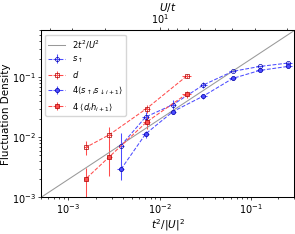

In [24]:
# Plot the quantum fluctuation from DH paper and Non-local pair paper side by side

fig, axs = plt.subplots(1, figsize=(1.5*figHeight_DHComparison,figHeight_DHComparison))
legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5
msUse = 3

# Data processing

# First extract the the singlon up/dn correlation on nearest neighbor vs U/t
radInd = 1
supsdnconncorr_nearestneighbor_vals = np.array(c_singlonupsinglondn_vsRadWithoutDegen_vals)[:,radInd]
supsdnconncorr_nearestneighbor_errs = np.array(c_singlonupsinglondn_vsRadWithoutDegen_errs)[:,radInd]
szszconncorr_nearestneighbor_vals = np.array(c_ss_vsRadWithoutDegen_vals)[:,radInd]
szszconncorr_nearestneighbor_errs = np.array(c_ss_vsRadWithoutDegen_errs)[:,radInd]
# now convert this to an unconnected correlator by adding back the second part
nn_supsupdn_vals = (supsdnconncorr_nearestneighbor_vals  + (nsinglon_vals/2)**2)
nn_supsupdn_errs = np.sqrt(supsdnconncorr_nearestneighbor_errs**2  + (nsinglon_vals*nsinglon_errs/2)**2)
nn_szsz_vals = np.abs(szszconncorr_nearestneighbor_vals) # nothing to add back since we are spin balanced
nn_szsz_errs = szszconncorr_nearestneighbor_errs


# also get data for x axis with correct error bars
tsqovUsqvals_data_vals  = 1/(np.array(U_val)**2)
tsqovUsqvals_data_errs  = np.abs(2/(np.array(U_val)**3))*(np.array(U_err))

# Create guide to eye 
UvalsLinspace = (np.array(list(range(100))) + 1)/20.0*20.0
tsqovUsqvals_disp = 1/(np.array(UvalsLinspace)**2)


# Attractive Density 
terrbar(axs, tsqovUsqvals_data_vals,nsinglon_vals/2, 
        xerr=tsqovUsqvals_data_errs,yerr=nsinglon_errs/2, 
        marker='o', ls='--', 
        colorfrac=colorfracBlue, cmap='bwr', ms=msUse, label = "$s_{\\uparrow}$", hollow=True)
# Repulsive Densities 
terrbar(axs, DH_tovUSq,DH_d, 
        xerr=DH_tovUSq_err,yerr=DH_d_err, 
        marker='s', ls='--', 
        colorfrac=colorfracRed, cmap='bwr', ms=msUse, label = "$d$", hollow=True)

# Attractive Correaltor
terrbar(axs, tsqovUsqvals_data_vals,4*nn_supsupdn_vals, 
        xerr=tsqovUsqvals_data_errs,yerr=4*nn_supsupdn_errs, 
        marker='o', ls='--', 
        colorfrac=colorfracBlue, cmap='bwr', ms=msUse, label = '4$\\langle s_{\\uparrow i} s_{\\downarrow {i+1}}\\rangle$')
# Repulsive Correlator 
terrbar(axs, DH_tovUSq,DH_pdhnn, 
        xerr=DH_tovUSq_err,yerr=DH_pdhnn_err, 
        marker='s', ls='--', 
        colorfrac=colorfracRed, cmap='bwr', ms=msUse, label = "4 $\\langle d_i h_{i+1}\\rangle$")

# Plots
# Guide to eye 
arbScale =2
jplot(axs, tsqovUsqvals_disp, arbScale*tsqovUsqvals_disp,  ls='-', color='0.6', label = str(str(arbScale)+'$t^2/U^2$'))
# arbScale =4
# jplot(axs, tsqovUsqvals_disp, arbScale*tsqovUsqvals_disp,  ls='dashed', color='0.8', label = str(str(arbScale)+'$t^2/U^2$'))


setlims(axs, [0.0005,0.3], [0.001,0.6])
# setlims(axs, [0.0005,0.1], [0.001,0.2])
axs.legend()

setlabels(axs, ['$t^2/|U|^2$', 'Fluctuation Density'])

def valToInvSquare(x):
    return 1/x**2
def valToInvSqrt(x):
    return 1/np.sqrt(x)
secax = axs.secondary_xaxis('top', functions=(valToInvSqrt,valToInvSquare))
secax.set_xlabel('$U/t$')

axs.set_yscale('log')
axs.set_xscale('log')

fig.savefig('Figures/DoublonHoleComparison/Fig_FlucutationsVstovUSq.png', dpi=400, bbox_inches='tight')


# terrbar(axs, tsqovUsqvals_data_vals,2*nn_szsz_vals, 
#         xerr=tsqovUsqvals_data_errs,yerr=2*nn_szsz_vals, 
#         marker='o', ls='--', 
#         colorfrac=colorfracBlue, cmap='bwr', ms=msUse, label = '2$\\langle m_{i} m_{{i+1}}\\rangle$')


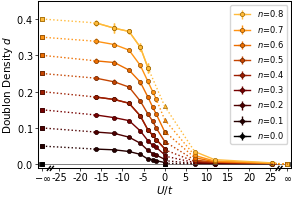

In [25]:
# Plot doublon fraction vs U/t at fixed density 

# nr_d_vals, nr_d_errs, nr_n_vals, nr_n_errs have values
# For a given density to plot, iterate through U/t values of nr_n_vals and find closest value, and use that index to generate value for plot 
from scipy import interpolate

nvalsPlt = [0.0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
dvalsTheoryMin = (np.array(nvalsPlt)/2.0)**2
dvalsTheoryMax = (np.array(nvalsPlt)/2.0)
radIndStartForFit = 2
UValMaxPlot = 29
UValMaxPlotShow = 30

# Get values at fixed density for attractive data 
darrsPlt_vals = []
darrsPlt_errs = []
for nval in nvalsPlt:
    darrThisn_vals = []
    darrThisn_errs = []
    for ii, key in enumerate(data_sets.keys()):
        function_dofn = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_vals[ii][radIndStartForFit:]) # don't include central value which has crazy value and error
        function_dofn_err = scipy.interpolate.interp1d(nr_n_vals[ii][radIndStartForFit:], nr_d_errs[ii][radIndStartForFit:])
        if (nval < np.max(nr_n_vals[ii][radIndStartForFit:]))& (nval > np.min(nr_n_vals[ii][radIndStartForFit:])):
            darrThisn_vals.append(function_dofn(nval))
            darrThisn_errs.append(function_dofn_err(nval))
        else :
            darrThisn_vals.append(np.nan)
            darrThisn_errs.append(np.nan)
    darrsPlt_vals.append(darrThisn_vals)
    darrsPlt_errs.append(darrThisn_errs)
    
# Get values at fixed density for repulsive data 
darrsPlt_repulsive_vals = []
darrsPlt_repulsive_errs = []
for nval in nvalsPlt:
    darrThisn_repulsive_vals = []
    darrThisn_repulsive_errs = []
    for jjj in range(len(DH_U_val)):
        function_dofn = scipy.interpolate.interp1d(DH_Real_radial_n[jjj][radIndStartForFit:], DH_Real_radial_d[jjj][radIndStartForFit:]) # don't include central value which has crazy value and error
        function_dofn_err = scipy.interpolate.interp1d(DH_Real_radial_n[jjj][radIndStartForFit:], DH_Real_radial_d_err[jjj][radIndStartForFit:])
        if (nval < np.max(DH_Real_radial_n[jjj][radIndStartForFit:]))& (nval > np.min(DH_Real_radial_n[jjj][radIndStartForFit:])):
            darrThisn_repulsive_vals.append(function_dofn(nval))
            darrThisn_repulsive_errs.append(function_dofn_err(nval))
        else :
            darrThisn_repulsive_vals.append(np.nan)
            darrThisn_repulsive_errs.append(np.nan)
    darrsPlt_repulsive_vals.append(darrThisn_repulsive_vals)
    darrsPlt_repulsive_errs.append(darrThisn_repulsive_errs)


# Plot things
cmapuse =  'afmhot' # 'winter'
markerMain = '.'
markerSizeMain = 6
linewidthMain = 1.0
figRescale =2.01
farRightOffset = 1.5

plt.rcParams['figure.dpi'] = 100
# fig, ax = plt.subplots(1, figsize=(2.95*figRescale, 2.75*figRescale))
fig, ax = plt.subplots(1, figsize=(1.5*figHeight_DHComparison,figHeight_DHComparison))

# Plot attractive data
for ii in reversed(range(len(nvalsPlt))):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, -np.array(U_val), darrsPlt_vals[ii], xerr = U_err, yerr = darrsPlt_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-',label = "$n$="+str(nvalsPlt[ii]))
    terrbar(ax, [-(UValMaxPlot)], [dvalsTheoryMax[ii]],  
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='', markersize=2.5, label = "")
    if nvalsPlt[ii] < 0.61:
        terrbar(ax, [-np.min(U_val)], [dvalsTheoryMin[ii]],  
                colorfrac=colorfracuse, cmap=cmapuse, marker = '^', ls='',label = "")
    if (ii == 0) or  (ii == 4) or  (ii == 8)  :
        terrbar(ax, -np.array(U_val), darrsPlt_vals[ii], xerr = U_err, yerr = darrsPlt_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-')

# Plot repulsive data
for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, DH_U_val, darrsPlt_repulsive_vals[ii], xerr = DH_U_err, yerr = darrsPlt_repulsive_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = markerMain, linewidth = linewidthMain, markersize=markerSizeMain, ls='-',label = "")
    
# Plot 0 value and limits
terrbar(ax, [-UValMaxPlotShow,UValMaxPlotShow], [0,0], 
            colorfrac=0.3, cmap='gray', marker = markerMain,linewidth = linewidthMain/2, markersize=markerSizeMain,  ls='-',label = "")
for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    terrbar(ax, [-(UValMaxPlot)], [dvalsTheoryMax[ii]],  
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='', markersize=2.5, label = "")
    terrbar(ax, [-np.min(U_val)], [dvalsTheoryMin[ii]],  
                colorfrac=colorfracuse, cmap=cmapuse, marker = '^', ls='',label = "")
    terrbar(ax, [(UValMaxPlot)], [0],  
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='', markersize=2.5, label = "")

# Add specific dashed lines between things to connect values to 0 on bth sides . 
for ii in range(len(nvalsPlt)):
    colorfracuse = nvalsPlt[ii]/1.3
    # connect repulsive to 0 and inf
    terrbar(ax, [0,DH_U_val[0]], [dvalsTheoryMin[ii],darrsPlt_repulsive_vals[ii][0]], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', linewidth = linewidthMain, markersize=markerSizeMain, ls='dotted',label = "")
    terrbar(ax, [UValMaxPlot,DH_U_val[2]], [0,darrsPlt_repulsive_vals[ii][2]], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', linewidth = linewidthMain, markersize=markerSizeMain, ls='dotted',label = "")
    # for attractive data, find minimum value of U that has this n value. 
    # Find minimum U value that is not nan, and 
    if ii > 0:
        cutUvals = np.where(~np.isnan(np.array(darrsPlt_vals[ii])), U_val, 1000000)
        indUseToInterpolate = np.argmin(cutUvals)
        terrbar(ax, [0,-U_val[indUseToInterpolate]], [dvalsTheoryMin[ii],darrsPlt_vals[ii][indUseToInterpolate]], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = '', linewidth = linewidthMain, markersize=markerSizeMain, ls='dotted',label = "")
    terrbar(ax, [-UValMaxPlot,-U_val[0]], [dvalsTheoryMax[ii],darrsPlt_vals[ii][0]], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', linewidth = linewidthMain, markersize=markerSizeMain, ls='dotted',label = "")

plt.xlabel("$U/t$", labelpad=1)
plt.ylabel("Doublon Density $d$", labelpad=1)
ax.set_xticks([-(UValMaxPlot),-25, -20, -15, -10, -5, 0,5,10,15,20, 25,UValMaxPlot])
ax.set_xticklabels([ '$-\\infty$', -25,-20,-15, -10, -5, 0,5,10,15,20, 25, '$\\infty$'])
setlims(ax, [ -(np.max(U_val)+farRightOffset + 0.3),np.max(U_val)+farRightOffset + 0.3 ],[-0.025,0.45])
setlims(ax, [ -UValMaxPlotShow,UValMaxPlotShow],[-0.01,0.45])

# Add wierd break axis 
d = .01*3/5 # how big to make the diagonal lines in axes coordinates
yoff = -0.003
xoff = 0.945
xoff2 = 1- xoff
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth = 1)
ax.plot((xoff -d,xoff +d), (-2*d + yoff ,+2*d + yoff ), **kwargs)
ax.plot((xoff -d+2*d,xoff +d+2*d), (-2*d + yoff ,+2*d + yoff ), **kwargs)

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth = 1)
ax.plot((xoff2 -(+d),xoff2 -(-d)), (-2*d + yoff ,+2*d + yoff ), **kwargs)
ax.plot((xoff2 -(+d+2*d), xoff2 -(-d+2*d)), (-2*d + yoff ,+2*d + yoff ), **kwargs)

ax.legend()
plt.show()


fig.savefig('Figures/DoublonHoleComparison/Fig_DoublonDensityVsUovt.png', dpi=400, bbox_inches='tight')    

In [26]:
# Combine all Radial data into a single array before plotting 
# LONGER ARRAY. Basically just contains more data, for doublon density vs density stuff 
# Cut out the central region since there's something weird about the high density doublon density. Probably excited z states in hindsight 

minRadPlt = 5 # avoid central data with large error bar
maxRadPlt = 30

colorfracuse_LongArr = []
nr_Uovt_LongArr_vals = []
nr_r_LongArr_vals = []
nr_n_LongArr_vals = []
nr_n_LongArr_errs = []
nr_d_LongArr_vals = []
nr_d_LongArr_errs = []

# Attractive data combine
iiValsPlt = [0,1,2,3,4,5,6,7] 
for ii in iiValsPlt:
    # Get radial values and all that
    _r_arr = nr_r_vals[ii]
    _n_arr = nr_n_vals[ii]
    _n_err_arr = nr_n_errs[ii]
    _d_arr = nr_d_vals[ii]
    _d_err_arr = nr_d_errs[ii]
    _nr_r_vals = np.append(np.append(np.flip(np.array(_r_arr[minRadPlt:maxRadPlt])),
                                     np.array([0])),
                           np.array(-_r_arr[minRadPlt:maxRadPlt]))
    _nr_n_vals = np.append(np.append(np.flip(np.array(_n_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_arr[minRadPlt]])), 
                           np.array(_n_arr[minRadPlt:maxRadPlt]))
    _nr_n_errs = np.append(np.append(np.flip(np.array(_n_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_err_arr[minRadPlt]])), 
                           np.array(_n_err_arr[minRadPlt:maxRadPlt]))
    _nr_d_vals = np.append(np.append(np.flip(np.array(_d_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_arr[minRadPlt]])), 
                           np.array(_d_arr[minRadPlt:maxRadPlt]))
    _nr_d_errs = np.append(np.append(np.flip(np.array(_d_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_err_arr[minRadPlt]])), 
                           np.array(_d_err_arr[minRadPlt:maxRadPlt]))
    nr_r_LongArr_vals.append(_nr_r_vals)
    nr_n_LongArr_vals.append(_nr_n_vals)
    nr_n_LongArr_errs.append(_nr_n_errs)
    nr_d_LongArr_vals.append(_nr_d_vals)
    nr_d_LongArr_errs.append(_nr_d_errs)
    colorfracuse_LongArr.append(float(-(U_val[ii])/maxUPlt)/2.0+0.5)
    nr_Uovt_LongArr_vals.append(float(-(U_val[ii])))
    
minRadPlt = 10 # avoid central data with large error bar
maxRadPlt = 30
    
# Repulsive data combine
for jjj in range(len(DH_U_val)):
    # Get radial values and all that
    _r_arr = DH_Real_radial_r[jjj]
    _n_arr = DH_Real_radial_n[jjj]
    _n_err_arr = DH_Real_radial_n_err[jjj]
    _d_arr = DH_Real_radial_d[jjj]
    _d_err_arr = DH_Real_radial_d_err[jjj]
    _nr_r_vals = np.append(np.append(np.flip(np.array(_r_arr[minRadPlt:maxRadPlt])),
                                     np.array([0])),
                           np.array(-_r_arr[minRadPlt:maxRadPlt]))
    _nr_n_vals = np.append(np.append(np.flip(np.array(_n_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_arr[minRadPlt]])), 
                           np.array(_n_arr[minRadPlt:maxRadPlt]))
    _nr_n_errs = np.append(np.append(np.flip(np.array(_n_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_err_arr[minRadPlt]])), 
                           np.array(_n_err_arr[minRadPlt:maxRadPlt]))
    _nr_d_vals = np.append(np.append(np.flip(np.array(_d_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_arr[minRadPlt]])), 
                           np.array(_d_arr[minRadPlt:maxRadPlt]))
    _nr_d_errs = np.append(np.append(np.flip(np.array(_d_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_err_arr[minRadPlt]])), 
                           np.array(_d_err_arr[minRadPlt:maxRadPlt]))
    nr_r_LongArr_vals.append(_nr_r_vals)
    nr_n_LongArr_vals.append(_nr_n_vals)
    nr_n_LongArr_errs.append(_nr_n_errs)
    nr_d_LongArr_vals.append(_nr_d_vals)
    nr_d_LongArr_errs.append(_nr_d_errs)
    colorfracuse_LongArr.append(float((DH_U_val[jjj])/maxUPlt)/2.0+0.5)
    nr_Uovt_LongArr_vals.append(float((DH_U_val[jjj])))

In [27]:
# Combine all Radial data into a single array before plotting 
# SHORTER ARRAY, contains fewer datasets for plotting radial profiles 

minRadPlt = 1
maxRadPlt = 25

colorfracuse_Arr = []
nr_Uovt_Arr_vals = []
nr_r_Arr_vals = []
nr_n_Arr_vals = []
nr_n_Arr_errs = []
nr_d_Arr_vals = []
nr_d_Arr_errs = []

colorfracuse_DQMC_Arr = []
nr_Uovt_DQMC_Arr_vals = []
nr_r_DQMC_Arr_vals = []
nr_n_DQMC_Arr_vals = []
nr_d_DQMC_Arr_vals = []


# Attractive data combine
iiValsPlt = [0,2,4,7] 
for ii in iiValsPlt:
    # Get radial values and all that
    _r_arr = nr_r_vals[ii]
    _n_arr = nr_n_vals[ii]
    _n_err_arr = nr_n_errs[ii]
    _d_arr = nr_d_vals[ii]
    _d_err_arr = nr_d_errs[ii]
    _nr_r_vals = np.append(np.append(np.flip(np.array(_r_arr[minRadPlt:maxRadPlt])),
                                     np.array([0])),
                           np.array(-_r_arr[minRadPlt:maxRadPlt]))
    _nr_n_vals = np.append(np.append(np.flip(np.array(_n_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_arr[minRadPlt]])), 
                           np.array(_n_arr[minRadPlt:maxRadPlt]))
    _nr_n_errs = np.append(np.append(np.flip(np.array(_n_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_err_arr[minRadPlt]])), 
                           np.array(_n_err_arr[minRadPlt:maxRadPlt]))
    _nr_d_vals = np.append(np.append(np.flip(np.array(_d_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_arr[minRadPlt]])), 
                           np.array(_d_arr[minRadPlt:maxRadPlt]))
    _nr_d_errs = np.append(np.append(np.flip(np.array(_d_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_err_arr[minRadPlt]])), 
                           np.array(_d_err_arr[minRadPlt:maxRadPlt]))
    nr_r_Arr_vals.append(_nr_r_vals)
    nr_n_Arr_vals.append(_nr_n_vals)
    nr_n_Arr_errs.append(_nr_n_errs)
    nr_d_Arr_vals.append(_nr_d_vals)
    nr_d_Arr_errs.append(_nr_d_errs)
    colorfracuse_Arr.append(float(-(U_val[ii])/maxUPlt)/2.0+0.5)
    nr_Uovt_Arr_vals.append(float(-(U_val[ii])))
    
minRadPlt = 2
maxRadPlt = 25

# Repulsive data combine
for jjj in range(len(DH_U_val)):
    # Get radial values and all that
    _r_arr = DH_Real_radial_r[jjj]
    _n_arr = DH_Real_radial_n[jjj]
    _n_err_arr = DH_Real_radial_n_err[jjj]
    _d_arr = DH_Real_radial_d[jjj]
    _d_err_arr = DH_Real_radial_d_err[jjj]
#     _nr_r_vals = np.append(np.append(np.flip(np.array(_r_arr[minRadPlt:maxRadPlt])),
#                                      np.array([0])),
#                            np.array(-_r_arr[minRadPlt:maxRadPlt]))
#     _nr_n_vals = np.append(np.append(np.flip(np.array(_n_arr[minRadPlt:maxRadPlt])),
#                                      np.array([_n_arr[minRadPlt]])), 
#                            np.array(_n_arr[minRadPlt:maxRadPlt]))
#     _nr_n_errs = np.append(np.append(np.flip(np.array(_n_err_arr[minRadPlt:maxRadPlt])),
#                                      np.array([_n_err_arr[minRadPlt]])), 
#                            np.array(_n_err_arr[minRadPlt:maxRadPlt]))
#     _nr_d_vals = np.append(np.append(np.flip(np.array(_d_arr[minRadPlt:maxRadPlt])),
#                                      np.array([_d_arr[minRadPlt]])), 
#                            np.array(_d_arr[minRadPlt:maxRadPlt]))
#     _nr_d_errs = np.append(np.append(np.flip(np.array(_d_err_arr[minRadPlt:maxRadPlt])),
#                                      np.array([_d_err_arr[minRadPlt]])), 
#                            np.array(_d_err_arr[minRadPlt:maxRadPlt]))
    _nr_r_vals = np.append(np.append(np.flip(np.array(_r_arr[minRadPlt:maxRadPlt])),
                                     np.array([0])),
                           np.array(-_r_arr[minRadPlt:maxRadPlt]))
    _nr_n_vals = np.append(np.append(np.flip(np.array(_n_arr[minRadPlt:maxRadPlt])),
                                     np.array([np.nan])), 
                           np.array(_n_arr[minRadPlt:maxRadPlt]))
    _nr_n_errs = np.append(np.append(np.flip(np.array(_n_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_n_err_arr[minRadPlt]])), 
                           np.array(_n_err_arr[minRadPlt:maxRadPlt]))
    _nr_d_vals = np.append(np.append(np.flip(np.array(_d_arr[minRadPlt:maxRadPlt])),
                                     np.array([np.nan])), 
                           np.array(_d_arr[minRadPlt:maxRadPlt]))
    _nr_d_errs = np.append(np.append(np.flip(np.array(_d_err_arr[minRadPlt:maxRadPlt])),
                                     np.array([_d_err_arr[minRadPlt]])), 
                           np.array(_d_err_arr[minRadPlt:maxRadPlt]))
    nr_r_Arr_vals.append(_nr_r_vals)
    nr_n_Arr_vals.append(_nr_n_vals)
    nr_n_Arr_errs.append(_nr_n_errs)
    nr_d_Arr_vals.append(_nr_d_vals)
    nr_d_Arr_errs.append(_nr_d_errs)
    colorfracuse_Arr.append(float((DH_U_val[jjj])/maxUPlt)/2.0+0.5)
    nr_Uovt_Arr_vals.append(float((DH_U_val[jjj])))
    
# Get DQMC data to plot with repulsive
for jjj in range(len(DH_U_val)):
    # Get radial values and all that
    _r_arr = DH_DQMC_radial_r[jjj]
    _n_arr = DH_DQMC_radial_n[jjj]
    _d_arr = DH_DQMC_radial_d[jjj]
    _nr_r_vals = np.append(np.flip(np.array(_r_arr)),
                           np.array(-_r_arr))
    _nr_n_vals = np.append(np.flip(np.array(_n_arr)),
                           np.array(_n_arr))
    _nr_d_vals = np.append(np.flip(np.array(_d_arr)),
                           np.array(_d_arr))
    nr_r_DQMC_Arr_vals.append(_nr_r_vals)
    nr_n_DQMC_Arr_vals.append(_nr_n_vals)
    nr_d_DQMC_Arr_vals.append(_nr_d_vals)
    colorfracuse_DQMC_Arr.append(float((DH_U_val[jjj])/maxUPlt)/2.0+0.5)
    nr_Uovt_DQMC_Arr_vals.append(float((DH_U_val[jjj])))

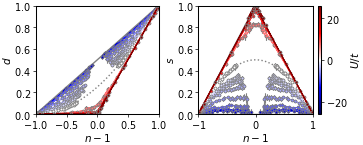

In [28]:
# Doublon density vs density 

rescaleDensityFigSize = 0.65
fig, ax = plt.subplots(1, 2, figsize=(2*1.3*figHeight_DHComparison*rescaleDensityFigSize,
                                                          figHeight_DHComparison*rescaleDensityFigSize))

cmapuse = 'seismic' # 'copper'
msuse = 4

# Doublon density plot

# Plot guides to eye
testDen = np.linspace(0,2,100)
testDenOv2 = testDen/2
testDoubDenNonInt=testDenOv2**2
testDoubDenRepulsive=testDenOv2*0
jplot(ax[0], testDen-1, testDenOv2, ls='-', lw=1., color='0.5')
jplot(ax[0], testDen-1, testDoubDenNonInt, ls='dotted', lw=1., color='0.5')
jplot(ax[1], testDen-1, testDen-2*testDenOv2, ls='-', lw=1., color='0.5')
jplot(ax[1], testDen-1, testDen - 2*testDoubDenNonInt, ls='dotted', lw=1., color='0.5')
jplot(ax[1], testDen-1, testDen - 2*testDoubDenRepulsive, ls='-', lw=1., color='0.5')

for ii in range(len(nr_r_LongArr_vals)): 
    # original data 
    terrbar_grayedge(ax[0], nr_n_LongArr_vals[ii]-1, nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = nr_d_LongArr_errs[ii],
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')
    terrbar_grayedge(ax[0], 2-nr_n_LongArr_vals[ii]-1, nr_d_LongArr_vals[ii]+1-nr_n_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = np.sqrt(nr_d_LongArr_errs[ii]**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')

setlabels(ax[0], ['$n-1$', '$d$'])
setlims(ax[0], [-1,1],[0,1])

for ii in range(len(nr_r_LongArr_vals)): 
    # original data 
    terrbar_grayedge(ax[1], nr_n_LongArr_vals[ii]-1, nr_n_LongArr_vals[ii]-2*nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = np.sqrt((2*nr_d_LongArr_errs[ii])**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')
    # Symmetrized about half filling
    terrbar_grayedge(ax[1], 2-nr_n_LongArr_vals[ii]-1, nr_n_LongArr_vals[ii]-2*nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr =  np.sqrt((2*nr_d_LongArr_errs[ii])**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')

setlabels(ax[1], ['$n-1$', '$s$'])
setlims(ax[1], [-1,1],[0,1])

# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[-1])
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


fig.subplots_adjust(wspace=0.32)

plt.show()

fig.savefig('Figures/DoublonHoleComparison/Fig_DoublonDensityVsDensity.png', dpi=400, bbox_inches='tight')    

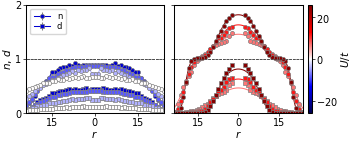

In [34]:
# Radial densities and doublon densities 

rescaleDensityFigSize = 0.65
fig, ax = plt.subplots(1, 2, figsize=(2*1.3*figHeight_DHComparison*rescaleDensityFigSize,
                                                          figHeight_DHComparison*rescaleDensityFigSize))

cmapuse = 'seismic' # 'copper'

msuse = 3.0

# Add DQMC for repulsive
for ii in range(len(colorfracuse_DQMC_Arr)):
    # Density
    terrbar_grayedge(ax[1], nr_r_DQMC_Arr_vals[ii], nr_n_DQMC_Arr_vals[ii], 
            colorfrac=colorfracuse_DQMC_Arr[ii], cmap=cmapuse, marker = '', ms=msuse, ls='-',label = "")
    # Doublon density 
    terrbar_grayedge(ax[1], nr_r_DQMC_Arr_vals[ii], nr_d_DQMC_Arr_vals[ii],
            colorfrac=colorfracuse_DQMC_Arr[ii], cmap=cmapuse, marker = '', ms=msuse, ls='-',label = "")

for ii in range(len(colorfracuse_Arr)):
    if ii < 4 :
        axInd = 0
        lsUse = '-'
    else :
        axInd = 1
        lsUse = ''
    if ii == 0:
        labelText1 = 'n'
        labelText2 = 'd'
    else:
        labelText1 = ''
        labelText2 = ''
    # Density
    terrbar_grayedge(ax[axInd], nr_r_Arr_vals[ii], nr_n_Arr_vals[ii], yerr = nr_n_Arr_errs[ii], 
            colorfrac=colorfracuse_Arr[ii], cmap=cmapuse, marker = 'o', ms=msuse, ls=lsUse,label = labelText1)
    # Doublon density 
    terrbar_grayedge(ax[axInd], nr_r_Arr_vals[ii], nr_d_Arr_vals[ii], yerr = nr_d_Arr_errs[ii], 
            colorfrac=colorfracuse_Arr[ii], cmap=cmapuse, marker = 's', ms=msuse, ls=lsUse,label = labelText2)
    # Plot 0 value and limits
    terrbar(ax[axInd], [-maxRadPlt,maxRadPlt], [1,1],  
            colorfrac=0.3, cmap='gray', marker = '',linewidth = 0.5, markersize=1,  ls='dashed',label = "")

    setlabels(ax[axInd], ['$r$', ''])
    tickVal = 15
    ax[axInd].set_xticks([-tickVal,0,tickVal])
    ax[axInd].set_xticklabels([tickVal,0,tickVal])
    ax[axInd].set_yticks([0,1,2])
    ax[axInd].set_yticklabels([])
    setlims(ax[axInd], [-(maxRadPlt-1),maxRadPlt-1],[0,2])
    
ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels([0,1,2])
setlabels(ax[0], ['$r$', '$n$, $d$'])
ax[0].legend(labelspacing = 0.1, loc = 'upper left')

# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[-1])
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


fig.subplots_adjust(wspace=0.075)

plt.show()

fig.savefig('Figures/DoublonHoleComparison/Fig_DensityVsRadius.png', dpi=400, bbox_inches='tight')    

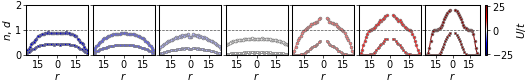

In [27]:
# Radial densities and doublon densities 

rescaleDensityFigSize = 0.3
fig, ax = plt.subplots(1, len(colorfracuse_Arr), figsize=(len(colorfracuse_Arr)*1.3*figHeight_DHComparison*rescaleDensityFigSize,
                                                          figHeight_DHComparison*rescaleDensityFigSize))

cmapuse = 'seismic' # 'copper'

msuse = 2.0

for ii in range(len(colorfracuse_Arr)):
    # Density
    terrbar_grayedge(ax[ii], nr_r_Arr_vals[ii], nr_n_Arr_vals[ii], yerr = nr_n_Arr_errs[ii], 
            colorfrac=colorfracuse_Arr[ii], cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    # Doublon density 
    terrbar_grayedge(ax[ii], nr_r_Arr_vals[ii], nr_d_Arr_vals[ii], yerr = nr_d_Arr_errs[ii], 
            colorfrac=colorfracuse_Arr[ii], cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    # Plot 0 value and limits
    terrbar(ax[ii], [-maxRadPlt,maxRadPlt], [1,1],  
            colorfrac=0.3, cmap='gray', marker = '',linewidth = linewidthMain/2, markersize=markerSizeMain,  ls='dashed',label = "")

    setlabels(ax[ii], ['$r$', ''])
    tickVal = 15
    ax[ii].set_xticks([-tickVal,0,tickVal])
    ax[ii].set_xticklabels([tickVal,0,tickVal])
    ax[ii].set_yticks([0,1,2])
    ax[ii].set_yticklabels([])
    setlims(ax[ii], [-(maxRadPlt-1),maxRadPlt-1],[0,2])

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels([0,1,2])
setlabels(ax[0], ['$r$', '$n$, $d$'])

# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[-1])
cax = divider.append_axes('right', size='5%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


fig.subplots_adjust(wspace=0.075)

plt.show()

# fig.savefig('Figures/DoublonHoleComparison/Fig_DensityVsRadius.png', dpi=400, bbox_inches='tight')    

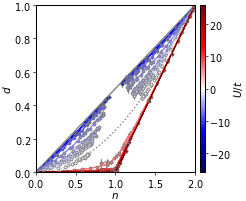

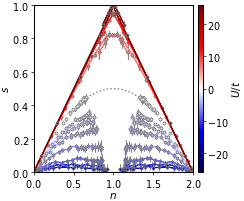

In [28]:
# Plot doublon fraction vs density at various U/t side by side 
    # Symmetrized about half filling
        # Doublon density at 2-n is equal to hole density at n, which is 1 - s - d = 1 - (n-2d) - d = d + (1-n)

plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1,  figsize=(figHeight_DHComparison,figHeight_DHComparison))

cmapuse = 'seismic' # 'copper'
msuse = 4

# Plot guides to eye
testDen = np.linspace(0,2,100)
testDenOv2 = testDen/2
testDoubDenNonInt=testDenOv2**2
jplot(ax, testDen, testDenOv2, ls='-', lw=1., color='0.5')
jplot(ax, testDen, testDoubDenNonInt, ls='dotted', lw=1., color='0.5')


for ii in range(len(nr_r_LongArr_vals)): 
    # original data 
    terrbar_grayedge(ax, nr_n_LongArr_vals[ii], nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = nr_d_LongArr_errs[ii],
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')
    # Symmetrized about half filling
    terrbar_grayedge(ax, 2-nr_n_LongArr_vals[ii], nr_d_LongArr_vals[ii]+1-nr_n_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = np.sqrt(nr_d_LongArr_errs[ii]**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')

setlabels(ax, ['$n$', '$d$'])
setlims(ax, [0,2],[0,1])


# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')

plt.show()

# fig.savefig('Figures/DoublonHoleComparison/Fig_DoublonDensityVsDensity.png', dpi=400, bbox_inches='tight')



# Plot singlon fraction vs density at various U/t side by side 
    # Symmetrized about half filling
        # Doublon density at 2-n is equal to hole density at n, which is 1 - s - d = 1 - (n-2d) - d = d + (1-n)
    # singlon density is n-2d. So we can convert between datasets easily 
    # Singlon density at density 2-n is equal to n-2d = 2-n - 2(d + (1-n)) = n-2d = same value 
    
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1,  figsize=(figHeight_DHComparison,figHeight_DHComparison))

cmapuse = 'seismic' # 'copper'
msuse = 4

# Plot guides to eye
testDen = np.linspace(0,2,100)
testDenOv2 = testDen/2
testDoubDenNonInt=testDenOv2**2
testDoubDenRepulsive=testDenOv2*0
jplot(ax, testDen, testDen-2*testDenOv2, ls='-', lw=1., color='0.5')
jplot(ax, testDen, testDen - 2*testDoubDenNonInt, ls='dotted', lw=1., color='0.5')
jplot(ax, testDen, testDen - 2*testDoubDenRepulsive, ls='-', lw=1., color='0.5')


for ii in range(len(nr_r_LongArr_vals)): 
    # original data 
    terrbar_grayedge(ax, nr_n_LongArr_vals[ii], nr_n_LongArr_vals[ii]-2*nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr = np.sqrt((2*nr_d_LongArr_errs[ii])**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')
    # Symmetrized about half filling
    terrbar_grayedge(ax, 2-nr_n_LongArr_vals[ii], nr_n_LongArr_vals[ii]-2*nr_d_LongArr_vals[ii], 
                     xerr = nr_n_LongArr_errs[ii], yerr =  np.sqrt((2*nr_d_LongArr_errs[ii])**2 +nr_n_LongArr_errs[ii]**2),
            colorfrac=colorfracuse_LongArr[ii], cmap=cmapuse, marker = '.', ms= msuse, ls='-')

setlabels(ax, ['$n$', '$s$'])
setlims(ax, [0,2],[0,1])


# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')

plt.show()

# fig.savefig('Figures/DoublonHoleComparison/Fig_SinglonDensityVsDensity.png', dpi=400, bbox_inches='tight')

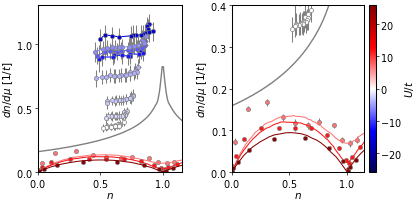

In [65]:
# Plot compressibility vs density for non-interactin and attractive and repulsive data side by side 

# Plot doublon fraction vs density at various U/t side by side 

plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1,2,  figsize=(2*figHeight_DHComparison,figHeight_DHComparison))

cmapuse = 'seismic' # 'copper'

# Doublon density vs total density
msuse = 6

# Plot guides to eye
testDen = np.linspace(0,2,100)
testDenOv2 = testDen/2
testDoubDenNonInt=testDenOv2**2
testDoubDenRepulsive=testDenOv2*0
jplot(ax[0], n2speciesFH_FS_smoothed, dnde2speciesFH_FS_smoothed, ls='-', lw=1., color='0.5')
jplot(ax[1], n2speciesFH_FS_smoothed, dnde2speciesFH_FS_smoothed, ls='-', lw=1., color='0.5')


# Left plot
# Plot attractive paper 
for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    colorfracuse = float(-(U_val[ii])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax[0], kappa_vsrad_n_vals[ii], kappa_vsrad_vals[ii], xerr = kappa_vsrad_n_errs[ii], yerr = kappa_vsrad_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '.', ms= msuse, ls='-')
# Now add data from repulsive side 
for jjj in range(len(DH_U_val)):
    colorfracuse = float((DH_U_val[jjj])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax[0], DH_Real_vsn_n[jjj], DH_Real_vsn_kappa[jjj], xerr = DH_Real_vsn_n_err[jjj], yerr = DH_Real_vsn_kappa_err[jjj], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '.', ms= msuse, ls='')
    terrbar_grayedge(ax[0], DH_DQMC_vsn_n[jjj], DH_DQMC_vsn_kappa[jjj],
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', ms= msuse, ls='-')
setlabels(ax[0], ['$n$', '$dn/d\\mu$ $[1/t]$'])
setlims(ax[0], [0,1.15],[0,1.3])
ax[0].set_yticks([0,0.5, 1])

# Right plot 
# Plot attractive paper 
for ii, key in enumerate(data_sets.keys()):
    dset = data_sets[key]
    colorfracuse = float(-(U_val[ii])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax[1], kappa_vsrad_n_vals[ii], kappa_vsrad_vals[ii], xerr = kappa_vsrad_n_errs[ii], yerr = kappa_vsrad_errs[ii], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '.', ms= msuse, ls='-')
# Now add data from repulsive side 
for jjj in range(len(DH_U_val)):
    colorfracuse = float((DH_U_val[jjj])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax[1], DH_Real_vsn_n[jjj], DH_Real_vsn_kappa[jjj], xerr = DH_Real_vsn_n_err[jjj], yerr = DH_Real_vsn_kappa_err[jjj], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '.', ms= msuse, ls='')
    terrbar_grayedge(ax[1], DH_DQMC_vsn_n[jjj], DH_DQMC_vsn_kappa[jjj],
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', ms= msuse, ls='-')
setlabels(ax[1], ['$n$', '$dn/d\\mu$ $[1/t]$'])
setlims(ax[1], [0,1.15],[0,0.4])
ax[1].set_yticks([0,0.1,0.2,0.3, 0.4])



# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[-1])
cax = divider.append_axes('right', size='5%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')

# ax.set_facecolor('lightgray')

plt.show()

fig.savefig('Figures/DoublonHoleComparison/Fig_CompressibilityVsDensity.png', dpi=400, bbox_inches='tight')

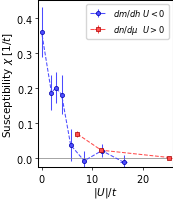

In [42]:
# Plot compressibility at half filling vs U/t repulsive, and magnetic susc vs U/t from non-local paper. 

showBackgroundGradientTrueFalse = False
    
fig, axs = plt.subplots(1,  figsize=(0.8*figHeight_DHComparison,figHeight_DHComparison))

legendTextSize = 9
colorfracRed = 0.85
colorfracBlue = 0.15
xUmin = -0.5
xUmax = 17
linewidth0 = 0.5
msUse = 3
ymaxPlt = 1.25

# Attractive data  - spin
yvals = spinSusc_keq0_halffit_vals
yerrs = spinSusc_keq0_halffit_errs
terrbar(axs, U_val, yvals, xerr=U_err, yerr= yerrs, marker='o', ls='dashed', ms=msUse, colorfrac=colorfracBlue, cmap='bwr', label = '$dm/dh$ $U<0$')

# Get repulsive data from center of n=1 data. 
kappaInterpPlt_vals = []
kappaInterpPlt_errs = []
for jjj in range(len(DH_U_val)): 
    indDQMC = np.argmin(np.abs(DH_DQMC_vsn_n[jjj]-1))
    valDQMC = DH_DQMC_vsn_kappa[jjj][indDQMC]
    # Interpolate experimental value and error bar
    function_kappaofn = scipy.interpolate.interp1d(DH_Real_vsn_n[jjj], DH_Real_vsn_kappa[jjj])
    function_kappaofn_err = scipy.interpolate.interp1d(DH_Real_vsn_n[jjj], DH_Real_vsn_kappa_err[jjj])
    kappaInterpPlt_vals.append(valDQMC)
    kappaInterpPlt_errs.append(function_kappaofn_err(1.0))
yvals = kappaInterpPlt_vals
yerrs = kappaInterpPlt_errs
terrbar(axs, DH_U_val, yvals, xerr=DH_U_err, yerr= yerrs, marker='s', ls='dashed', ms=msUse, colorfrac=colorfracRed, cmap='bwr', label = '$dn/d\\mu$  $U>0$')

# # Attractive data, density
# yvals = kappa_vals
# yerrs = kappa_errs
# terrbar(axs, U_val, yvals, xerr=U_err, yerr= yerrs, marker='s', ls='dashed', ms=msUse, colorfrac=colorfracRed, cmap='bwr',  label = '$dn/d\\mu$  $U<0$')



setlabels(axs, ['$|U|/t$', 'Susceptibility $\\chi$ [$1/t$]'])
setlims(axs, [-0.75,26], [-0.025,0.45])
# axs.set_xticks([0,5,10,15])
axs.hlines(0,-2,25, color = 'gray', linewidth = linewidth0)
axs.legend()


if showBackgroundGradientTrueFalse:
    # Add background gradient for pairing
    xlims = axs.get_xlim()
    ylims = axs.get_ylim()
    plotlim = [xlims[0],xlims[1],ylims[0],ylims[1]]
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'lightgray', "bisque"])
    newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["white", 'white','lightgray', "blanchedalmond", 'bisque'])
    #. Generate gradient image 
    sizeForTanh = 5
    shiftLeftTanh= 0.3
    testArr = (np.tanh(np.linspace(-sizeForTanh*shiftLeftTanh,sizeForTanh*(1-shiftLeftTanh),100)) + 1 )/2
    testArrOnes = np.ones(100)
    fakeGradientImage = np.outer(testArrOnes,testArr)
    axs.imshow(fakeGradientImage, cmap=newcmp, interpolation='bicubic', extent= plotlim, aspect='auto', alpha = 0.75)

plt.show()

fig.savefig('Figures/DoublonHoleComparison/Fig_CompressibilityVsUovt.png', dpi=400, bbox_inches='tight')

In [33]:
# Old plot attempts 

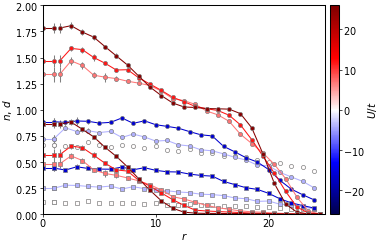

In [88]:
# Radial densities and doublon densities 

fig, ax = plt.subplots(1, figsize=(3.5, 2.5))

cmapuse = 'seismic' # 'copper'

minRadPlt = 1
maxRadPlt = 25
maxUPlt = 26
msuse = 3


# Attractive data 
iiValsPlt = [7,4,0] 
for ii in iiValsPlt:
    colorfracuse = float(-(U_val[ii])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    # and reversed
    terrbar_grayedge(ax, -nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    terrbar_grayedge(ax, -nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    # and fill in gap at center 
    terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_n_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_n_errs[ii][minRadPlt]]*3, 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ls='-',label = "")
    terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_d_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_d_errs[ii][minRadPlt]]*3, 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='-',label = "")
    
# Repulsive data 
for jjj in range(3):
    colorfracuse = float((DH_U_val[jjj])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax, DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_n[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_n_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    terrbar_grayedge(ax, DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_d[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_d_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    # and reversed
    terrbar_grayedge(ax, -DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_n[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_n_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    terrbar_grayedge(ax, -DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_d[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_d_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    # and fill in center 
    terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [DH_Real_radial_n[jjj][minRadPlt]]*3, yerr = [DH_Real_radial_n_err[jjj][minRadPlt]]*3, 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
    terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [DH_Real_radial_d[jjj][minRadPlt]]*3, yerr = [DH_Real_radial_d_err[jjj][minRadPlt]]*3, 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
    
setlabels(ax, ['$r$', '$n$, $d$'])
ax.set_xticks([-20,-10,0,10,20])
ax.set_xticklabels([20,10,0,10,20])
setlims(ax, [0,maxRadPlt],[0,2])

# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


# ################################
# # Add abc labels
# labelsAxArr = [ax[0], ax[1]]
# labelsPlots = ['a', 'b',]
# labelsXoffsets = [-0.3,-0.3]
# labelsYoffsets = [-0.05,-0.05 ]
# for labelInd, ax in enumerate(labelsAxArr):
#     trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
#     ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
#             weight = 'bold', fontsize=7.5,  
#             horizontalalignment='right', verticalalignment='bottom')


# plt.tight_layout()
plt.show()

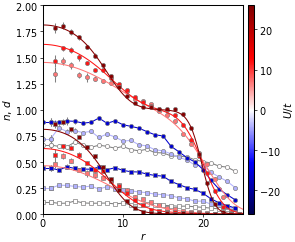

In [89]:
# Radial densities and doublon densities 

fig, ax = plt.subplots(1, figsize=(2.5, 2.5))

cmapuse = 'seismic' # 'copper'

minRadPlt = 1
maxRadPlt = 25
maxUPlt = 26
msuse = 3


# Attractive data 
iiValsPlt = [7,4,0] 
for ii in iiValsPlt:
    colorfracuse = float(-(U_val[ii])/maxUPlt)/2.0+0.5

    if ii == 7 : # draw a gray line for 0 interacting data sinc e its hard to see otherwise 
        cfracGray = 0.5
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
            colorfrac=cfracGray, cmap='gray', marker = '', ms=msuse, ls='-',label = "")
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
                colorfrac=cfracGray, cmap='gray', marker = '', ms=msuse, ls='-',label = "")
        # and fill in gap at center line 
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_n_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_n_errs[ii][minRadPlt]]*3, 
                colorfrac=cfracGray, cmap='gray', marker = '', ls='-',label = "")
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_d_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_d_errs[ii][minRadPlt]]*3, 
                colorfrac=cfracGray, cmap='gray', marker = '', ls='-',label = "")
        
        # then draw true datapoints over it without a line 
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='',label = "")
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='',label = "")
        # and fill in gap at center 
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_n_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_n_errs[ii][minRadPlt]]*3, 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ls='',label = "")
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_d_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_d_errs[ii][minRadPlt]]*3, 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='',label = "")
    else :
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_n_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_n_errs[ii][minRadPlt:maxRadPlt], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='-',label = "")
        terrbar_grayedge(ax, nr_r_vals[ii][minRadPlt:maxRadPlt], nr_d_vals[ii][minRadPlt:maxRadPlt], xerr = nr_r_errs[ii][minRadPlt:maxRadPlt], yerr = nr_d_errs[ii][minRadPlt:maxRadPlt], 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='-',label = "")
        # and fill in gap at center 
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_n_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_n_errs[ii][minRadPlt]]*3, 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ls='-',label = "")
        terrbar_grayedge(ax, [-minRadPlt,0,minRadPlt], [nr_d_vals[ii][minRadPlt]]*3, xerr = [nr_r_errs[ii][minRadPlt]]*3, yerr = [nr_d_errs[ii][minRadPlt]]*3, 
                colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ls='-',label = "")
    
# Repulsive data 
for jjj in range(3):
    colorfracuse = float((DH_U_val[jjj])/maxUPlt)/2.0+0.5
    terrbar_grayedge(ax, DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_n[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_n_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 'o', ms=msuse, ls='',label = "")
    terrbar_grayedge(ax, DH_Real_radial_r[jjj][minRadPlt:maxRadPlt], DH_Real_radial_d[jjj][minRadPlt:maxRadPlt], yerr = DH_Real_radial_d_err[jjj][minRadPlt:maxRadPlt], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = 's', ms=msuse, ls='',label = "")
    # Add DQMC
    terrbar(ax, DH_DQMC_radial_r[jjj], DH_DQMC_radial_n[jjj], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', ms=msuse, ls='-',label = "")
    terrbar(ax, DH_DQMC_radial_r[jjj], DH_DQMC_radial_d[jjj], 
            colorfrac=colorfracuse, cmap=cmapuse, marker = '', ms=msuse, ls='-',label = "")
    
setlabels(ax, ['$r$', '$n$, $d$'])
ax.set_xticks([-20,-10,0,10,20])
ax.set_xticklabels([20,10,0,10,20])
setlims(ax, [0,maxRadPlt],[0,2])

# Add colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)
norm = mpl.colors.Normalize(vmin=-maxUPlt, vmax=maxUPlt)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.get_cmap(cmapuse),
                                norm=norm,
                                orientation='vertical')
cb1.set_label('$U/t$')


# ################################
# # Add abc labels
# labelsAxArr = [ax[0], ax[1]]
# labelsPlots = ['a', 'b',]
# labelsXoffsets = [-0.3,-0.3]
# labelsYoffsets = [-0.05,-0.05 ]
# for labelInd, ax in enumerate(labelsAxArr):
#     trans = mpl.transforms.ScaledTranslation(labelsXoffsets[labelInd],labelsYoffsets[labelInd], fig.dpi_scale_trans) # horiz and vert
#     ax.text(0.0, 1.0, labelsPlots[labelInd], transform=ax.transAxes + trans,
#             weight = 'bold', fontsize=7.5,  
#             horizontalalignment='right', verticalalignment='bottom')


# plt.tight_layout()
plt.show()